
## **Introducción** 📌 

Ha surgido una nueva innovación en la industria financiera: los _Neo-Bancos_, bancos digitales de nueva generación que operan completamente en línea y sin sucursales físicas.

Danny pensó que debía existir algún punto de encuentro entre estos bancos modernos, las criptomonedas y el mundo de los datos… así que decidió lanzar una nueva iniciativa: **¡Data Bank!**

Data Bank funciona como cualquier otro banco digital, pero no se limita solo a actividades bancarias: ¡también ofrece la plataforma de almacenamiento de datos distribuidos más segura del mundo!

A los clientes se les asigna un límite de almacenamiento en la nube que está directamente relacionado con la cantidad de dinero que tienen en sus cuentas. Este modelo de negocio trae consigo algunos aspectos interesantes, y aquí es donde el equipo de Data Bank necesita tu ayuda.

La dirección de Data Bank quiere aumentar su base total de clientes, pero también necesita apoyo para seguir y predecir cuánta capacidad de almacenamiento necesitarán sus usuarios.

Este estudio de caso se centra en el cálculo de métricas, análisis de crecimiento y ayuda al negocio para entender sus datos de forma inteligente y así planificar mejor su futuro desarrollo.

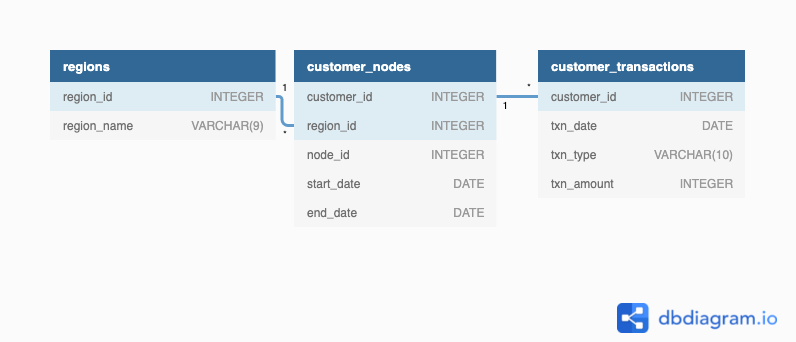

### Tabla 1: Regiones

Al igual que las plataformas populares de criptomonedas, **Data Bank** también funciona mediante una red de nodos, donde tanto el dinero como los datos se almacenan a nivel global. En un sentido bancario tradicional, estos nodos pueden entenderse como sucursales o oficinas que existen en distintas partes del mundo.

Esta tabla contiene los valores `region_id` junto con sus respectivos `region_name`.

### Table 2: Customer Nodes

Customers are randomly distributed across the nodes according to their region - this also specifies exactly which node contains both their cash and data.

This random distribution changes frequently to reduce the risk of hackers getting into Data Bank’s system and stealing customer’s money and data!

Below is a sample of the top 10 rows of the `data_bank.customer_nodes`

### Tabla 3: Transacciones de Clientes

Esta tabla almacena todos los depósitos, retiros y compras realizadas por los clientes utilizando su tarjeta de débito de Data Bank.

---

In [3]:
import sqlite3
import pandas as pd
import numpy as np

# **1. GENERANDO LA DB**

## 1.1. Creando la conexión a la BBDD

In [4]:

connection = sqlite3.connect('data_bank.db')

## 1.2. Generando el cursor

In [5]:
cursor = connection.cursor()

# **2. Creación de tablas**

## **2.1 Regions**

### 2.1.1 Creación tabla

In [6]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS regions (
        region_id INTEGER,
        region_name VARCHAR(9)           
    )
''')

connection.commit()

### 2.1.2 Poblando la tabla

In [7]:
data_regions = [
    ('1', 'Australia'),
    ('2', 'America'),
    ('3', 'Africa'),
    ('4', 'Asia'),
    ('5', 'Europe')
]

cursor.executemany('INSERT INTO regions VALUES (?, ?)', data_regions)

connection.commit()

## **2.2 customer_nodes**

### 2.2.1 Creación tabla

In [8]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS customer_nodes  (
        customer_id INTEGER,
        region_id INTEGER,
        node_id INTEGER,
        start_date DATE,
        end_date DATE         
                        )
''')

connection.commit()

### 2.2.2 Poblando la tabla

In [ ]:

data_customer_nodes = [
    ('1', '3', '4', '2020-01-02', '2020-01-03'),
    ('2', '3', '5', '2020-01-03', '2020-01-17'),
    ('3', '5', '4', '2020-01-27', '2020-02-18'),
    ('4', '5', '4', '2020-01-07', '2020-01-19'),
    ('5', '3', '3', '2020-01-15', '2020-01-23'),
    ('6', '1', '1', '2020-01-11', '2020-02-06'),
    ('7', '2', '5', '2020-01-20', '2020-02-04'),
    ('8', '1', '2', '2020-01-15', '2020-01-28'),
    ('9', '4', '5', '2020-01-21', '2020-01-25'),
    ('10', '3', '4', '2020-01-13', '2020-01-14'),
    ('11', '2', '5', '2020-01-19', '2020-01-25'),
    ('12', '1', '2', '2020-01-13', '2020-01-14'),
    ('13', '2', '3', '2020-01-02', '2020-01-14'),
    ('14', '1', '2', '2020-01-25', '2020-01-25'),
    ('15', '1', '3', '2020-01-25', '2020-02-08'),
    ('16', '4', '4', '2020-01-13', '2020-01-18'),
    ('17', '2', '3', '2020-01-19', '2020-01-27'),
    ('18', '1', '3', '2020-01-17', '2020-02-15'),
    ('19', '2', '2', '2020-01-17', '2020-02-06'),
    ('20', '2', '4', '2020-01-18', '2020-02-09'),
    ('21', '3', '2', '2020-01-12', '2020-01-25'),
    ('22', '4', '3', '2020-01-19', '2020-02-18'),
    ('23', '1', '5', '2020-01-21', '2020-02-15'),
    ('24', '2', '5', '2020-01-26', '2020-02-14'),
    ('25', '5', '1', '2020-01-28', '2020-02-10'),
    ('26', '3', '3', '2020-01-17', '2020-01-25'),
    ('27', '4', '3', '2020-01-01', '2020-01-22'),
    ('28', '4', '2', '2020-01-20', '2020-02-13'),
    ('29', '2', '3', '2020-01-19', '2020-01-31'),
    ('30', '2', '1', '2020-01-26', '2020-02-06'),
    ('31', '3', '2', '2020-01-06', '2020-01-13'),
    ('32', '4', '4', '2020-01-12', '2020-01-14'),
    ('33', '3', '4', '2020-01-24', '2020-02-17'),
    ('34', '2', '3', '2020-01-30', '2020-02-18'),
    ('35', '4', '5', '2020-01-17', '2020-02-15'),
    ('36', '2', '3', '2020-01-30', '2020-02-19'),
    ('37', '1', '3', '2020-01-29', '2020-02-04'),
    ('38', '5', '1', '2020-01-21', '2020-02-14'),
    ('39', '5', '2', '2020-01-22', '2020-01-23'),
    ('40', '2', '1', '2020-01-21', '2020-02-17'),
    ('41', '5', '1', '2020-01-30', '2020-02-26'),
    ('42', '4', '3', '2020-01-11', '2020-01-16'),
    ('43', '2', '2', '2020-01-28', '2020-02-25'),
    ('44', '3', '1', '2020-01-19', '2020-02-09'),
    ('45', '2', '1', '2020-01-14', '2020-02-08'),
    ('46', '1', '4', '2020-01-23', '2020-01-26'),
    ('47', '5', '4', '2020-01-22', '2020-01-26'),
    ('48', '5', '2', '2020-01-01', '2020-01-18'),
    ('49', '2', '5', '2020-01-04', '2020-01-09'),
    ('50', '2', '5', '2020-01-29', '2020-02-06'),
    ('51', '1', '3', '2020-01-20', '2020-02-02'),
    ('52', '5', '2', '2020-01-12', '2020-01-26'),
    ('53', '4', '1', '2020-01-24', '2020-01-29'),
    ('54', '4', '1', '2020-01-09', '2020-01-29'),
    ('55', '5', '5', '2020-01-25', '2020-02-07'),
    ('56', '4', '4', '2020-01-18', '2020-01-20'),
    ('57', '5', '5', '2020-01-06', '2020-01-28'),
    ('58', '3', '2', '2020-01-11', '2020-01-31'),
    ('59', '3', '1', '2020-01-20', '2020-02-03'),
    ('60', '5', '5', '2020-01-19', '2020-01-20'),
    ('61', '4', '5', '2020-01-21', '2020-01-26'),
    ('62', '2', '1', '2020-01-16', '2020-02-11'),
    ('63', '1', '3', '2020-01-06', '2020-02-01'),
    ('64', '2', '3', '2020-01-08', '2020-01-24'),
    ('65', '1', '3', '2020-01-26', '2020-02-17'),
    ('66', '1', '2', '2020-01-16', '2020-02-06'),
    ('67', '3', '3', '2020-01-22', '2020-02-14'),
    ('68', '3', '3', '2020-01-20', '2020-02-18'),
    ('69', '1', '1', '2020-01-10', '2020-02-09'),
    ('70', '3', '3', '2020-01-08', '2020-01-22'),
    ('71', '1', '3', '2020-01-14', '2020-01-31'),
    ('72', '3', '2', '2020-01-20', '2020-02-16'),
    ('73', '1', '1', '2020-01-06', '2020-01-24'),
    ('74', '5', '1', '2020-01-13', '2020-02-06'),
    ('75', '4', '5', '2020-01-22', '2020-01-30'),
    ('76', '2', '1', '2020-01-04', '2020-02-03'),
    ('77', '5', '4', '2020-01-08', '2020-01-16'),
    ('78', '5', '3', '2020-01-28', '2020-01-29'),
    ('79', '1', '5', '2020-01-29', '2020-02-05'),
    ('80', '4', '3', '2020-01-25', '2020-02-16'),
    ('81', '1', '5', '2020-01-25', '2020-02-04'),
    ('82', '2', '5', '2020-01-09', '2020-02-01'),
    ('83', '2', '1', '2020-01-09', '2020-02-01'),
    ('84', '1', '4', '2020-01-23', '2020-02-06'),
    ('85', '5', '5', '2020-01-11', '2020-01-26'),
    ('86', '4', '3', '2020-01-03', '2020-01-25'),
    ('87', '2', '5', '2020-01-13', '2020-02-03'),
    ('88', '3', '2', '2020-01-12', '2020-02-03'),
    ('89', '5', '2', '2020-01-25', '2020-02-02'),
    ('90', '4', '1', '2020-01-19', '2020-02-08'),
    ('91', '4', '3', '2020-01-11', '2020-01-21'),
    ('92', '3', '3', '2020-01-05', '2020-01-29'),
    ('93', '4', '1', '2020-01-11', '2020-01-21'),
    ('94', '5', '2', '2020-01-01', '2020-01-25'),
    ('95', '1', '2', '2020-01-03', '2020-01-21'),
    ('96', '3', '1', '2020-01-03', '2020-01-20'),
    ('97', '3', '4', '2020-01-04', '2020-01-30'),
    ('98', '1', '5', '2020-01-15', '2020-01-28'),
    ('99', '2', '4', '2020-01-08', '2020-01-30'),
    ('100', '1', '3', '2020-01-06', '2020-01-15'),
    ('101', '2', '3', '2020-01-12', '2020-01-19'),
    ('102', '1', '4', '2020-01-26', '2020-01-28'),
    ('103', '4', '1', '2020-01-07', '2020-01-20'),
    ('104', '4', '4', '2020-01-25', '2020-02-12'),
    ('105', '1', '4', '2020-01-07', '2020-01-19'),
    ('106', '2', '5', '2020-01-24', '2020-02-21'),
    ('107', '2', '4', '2020-01-13', '2020-02-07'),
    ('108', '1', '1', '2020-01-30', '2020-02-06'),
    ('109', '4', '5', '2020-01-01', '2020-01-31'),
    ('110', '2', '1', '2020-01-01', '2020-01-07'),
    ('111', '4', '1', '2020-01-28', '2020-02-20'),
    ('112', '1', '1', '2020-01-08', '2020-01-28'),
    ('113', '1', '4', '2020-01-21', '2020-01-31'),
    ('114', '1', '3', '2020-01-19', '2020-01-23'),
    ('115', '5', '2', '2020-01-29', '2020-02-26'),
    ('116', '1', '2', '2020-01-28', '2020-01-29'),
    ('117', '5', '1', '2020-01-15', '2020-01-24'),
    ('118', '3', '2', '2020-01-03', '2020-02-01'),
    ('119', '2', '4', '2020-01-17', '2020-02-06'),
    ('120', '1', '5', '2020-01-23', '2020-02-15'),
    ('121', '3', '3', '2020-01-01', '2020-01-23'),
    ('122', '2', '3', '2020-01-29', '2020-02-01'),
    ('123', '4', '2', '2020-01-16', '2020-01-20'),
    ('124', '3', '3', '2020-01-01', '2020-01-04'),
    ('125', '2', '5', '2020-01-04', '2020-01-26'),
    ('126', '4', '1', '2020-01-21', '2020-02-02'),
    ('127', '5', '3', '2020-01-17', '2020-02-15'),
    ('128', '4', '1', '2020-01-26', '2020-02-25'),
    ('129', '3', '1', '2020-01-12', '2020-02-10'),
    ('130', '3', '4', '2020-01-02', '2020-01-21'),
    ('131', '3', '4', '2020-01-10', '2020-01-28'),
    ('132', '4', '2', '2020-01-10', '2020-01-28'),
    ('133', '2', '1', '2020-01-10', '2020-01-17'),
    ('134', '1', '2', '2020-01-08', '2020-01-28'),
    ('135', '5', '4', '2020-01-09', '2020-01-28'),
    ('136', '3', '2', '2020-01-11', '2020-01-16'),
    ('137', '1', '3', '2020-01-06', '2020-01-13'),
    ('138', '4', '4', '2020-01-11', '2020-01-28'),
    ('139', '4', '4', '2020-01-10', '2020-01-28'),
    ('140', '1', '5', '2020-01-26', '2020-02-10'),
    ('141', '3', '3', '2020-01-15', '2020-01-29'),
    ('142', '1', '5', '2020-01-16', '2020-01-24'),
    ('143', '5', '5', '2020-01-29', '2020-02-05'),
    ('144', '3', '4', '2020-01-14', '2020-02-13'),
    ('145', '5', '1', '2020-01-02', '2020-01-25'),
    ('146', '1', '5', '2020-01-05', '2020-01-24'),
    ('147', '1', '1', '2020-01-15', '2020-02-12'),
    ('148', '4', '1', '2020-01-12', '2020-01-14'),
    ('149', '1', '1', '2020-01-13', '2020-01-25'),
    ('150', '2', '5', '2020-01-04', '2020-01-18'),
    ('151', '1', '2', '2020-01-10', '2020-01-26'),
    ('152', '4', '1', '2020-01-01', '2020-01-15'),
    ('153', '3', '5', '2020-01-18', '2020-02-13'),
    ('154', '2', '5', '2020-01-15', '2020-01-22'),
    ('155', '4', '1', '2020-01-10', '2020-02-07'),
    ('156', '5', '5', '2020-01-24', '2020-02-13'),
    ('157', '2', '3', '2020-01-06', '2020-01-24'),
    ('158', '5', '1', '2020-01-18', '2020-01-28'),
    ('159', '5', '3', '2020-01-04', '2020-01-26'),
    ('160', '4', '4', '2020-01-17', '2020-01-23'),
    ('161', '1', '2', '2020-01-08', '2020-01-08'),
    ('162', '2', '1', '2020-01-10', '2020-01-17'),
    ('163', '4', '2', '2020-01-14', '2020-01-31'),
    ('164', '3', '5', '2020-01-10', '2020-01-21'),
    ('165', '4', '5', '2020-01-23', '2020-02-02'),
    ('166', '2', '1', '2020-01-22', '2020-01-24'),
    ('167', '4', '5', '2020-01-30', '2020-02-03'),
    ('168', '5', '1', '2020-01-13', '2020-02-12'),
    ('169', '1', '1', '2020-01-10', '2020-01-19'),
    ('170', '5', '1', '2020-01-14', '2020-01-22'),
    ('171', '1', '4', '2020-01-17', '2020-01-30'),
    ('172', '2', '3', '2020-01-12', '2020-01-31'),
    ('173', '5', '2', '2020-01-14', '2020-02-10'),
    ('174', '4', '5', '2020-01-11', '2020-02-02'),
    ('175', '1', '5', '2020-01-14', '2020-02-11'),
    ('176', '2', '1', '2020-01-26', '2020-02-23'),
    ('177', '3', '5', '2020-01-20', '2020-02-05'),
    ('178', '1', '4', '2020-01-23', '2020-02-22'),
    ('179', '4', '3', '2020-01-05', '2020-02-03'),
    ('180', '1', '2', '2020-01-09', '2020-01-19'),
    ('181', '4', '4', '2020-01-13', '2020-02-04'),
    ('182', '3', '1', '2020-01-08', '2020-01-22'),
    ('183', '2', '4', '2020-01-22', '2020-02-04'),
    ('184', '2', '4', '2020-01-27', '2020-02-03'),
    ('185', '5', '1', '2020-01-29', '2020-02-27'),
    ('186', '2', '4', '2020-01-17', '2020-01-25'),
    ('187', '1', '5', '2020-01-26', '2020-01-31'),
    ('188', '1', '3', '2020-01-13', '2020-02-07'),
    ('189', '4', '2', '2020-01-11', '2020-01-15'),
    ('190', '5', '5', '2020-01-26', '2020-02-18'),
    ('191', '5', '4', '2020-01-16', '2020-01-21'),
    ('192', '5', '5', '2020-01-20', '2020-01-26'),
    ('193', '5', '5', '2020-01-12', '2020-01-25'),
    ('194', '4', '5', '2020-01-28', '2020-02-25'),
    ('195', '4', '3', '2020-01-19', '2020-02-07'),
    ('196', '5', '4', '2020-01-13', '2020-02-09'),
    ('197', '2', '2', '2020-01-22', '2020-02-02'),
    ('198', '3', '1', '2020-01-17', '2020-02-08'),
    ('199', '2', '4', '2020-01-20', '2020-01-30'),
    ('200', '1', '4', '2020-01-29', '2020-02-09'),
    ('201', '4', '1', '2020-01-02', '2020-01-18'),
    ('202', '2', '2', '2020-01-06', '2020-01-17'),
    ('203', '5', '5', '2020-01-06', '2020-01-17'),
    ('204', '1', '5', '2020-01-28', '2020-01-30'),
    ('205', '2', '1', '2020-01-02', '2020-01-19'),
    ('206', '2', '4', '2020-01-09', '2020-01-12'),
    ('207', '4', '3', '2020-01-26', '2020-02-09'),
    ('208', '2', '3', '2020-01-19', '2020-01-24'),
    ('209', '4', '3', '2020-01-23', '2020-01-30'),
    ('210', '5', '2', '2020-01-19', '2020-01-27'),
    ('211', '1', '1', '2020-01-19', '2020-02-12'),
    ('212', '2', '2', '2020-01-02', '2020-02-01'),
    ('213', '3', '2', '2020-01-17', '2020-01-22'),
    ('214', '2', '3', '2020-01-14', '2020-01-24'),
    ('215', '2', '2', '2020-01-27', '2020-02-11'),
    ('216', '3', '3', '2020-01-04', '2020-01-12'),
    ('217', '1', '3', '2020-01-08', '2020-01-14'),
    ('218', '5', '4', '2020-01-29', '2020-02-22'),
    ('219', '2', '2', '2020-01-06', '2020-01-15'),
    ('220', '2', '3', '2020-01-21', '2020-02-08'),
    ('221', '4', '1', '2020-01-06', '2020-01-31'),
    ('222', '1', '5', '2020-01-11', '2020-01-16'),
    ('223', '4', '4', '2020-01-11', '2020-01-28'),
    ('224', '2', '5', '2020-01-21', '2020-02-03'),
    ('225', '3', '2', '2020-01-10', '2020-02-01'),
    ('226', '2', '5', '2020-01-11', '2020-01-26'),
    ('227', '1', '2', '2020-01-07', '2020-01-11'),
    ('228', '4', '3', '2020-01-10', '2020-02-08'),
    ('229', '5', '3', '2020-01-23', '2020-01-24'),
    ('230', '3', '3', '2020-01-21', '2020-02-10'),
    ('231', '3', '5', '2020-01-20', '2020-02-03'),
    ('232', '4', '3', '2020-01-02', '2020-01-17'),
    ('233', '2', '1', '2020-01-03', '2020-01-28'),
    ('234', '2', '1', '2020-01-03', '2020-01-24'),
    ('235', '1', '3', '2020-01-07', '2020-01-08'),
    ('236', '4', '5', '2020-01-27', '2020-02-18'),
    ('237', '1', '3', '2020-01-16', '2020-01-23'),
    ('238', '4', '4', '2020-01-18', '2020-02-06'),
    ('239', '4', '5', '2020-01-18', '2020-01-22'),
    ('240', '2', '3', '2020-01-10', '2020-02-03'),
    ('241', '4', '3', '2020-01-01', '2020-01-24'),
    ('242', '3', '1', '2020-01-20', '2020-02-16'),
    ('243', '1', '4', '2020-01-01', '2020-01-03'),
    ('244', '1', '4', '2020-01-27', '2020-02-22'),
    ('245', '3', '4', '2020-01-30', '2020-02-13'),
    ('246', '1', '3', '2020-01-29', '2020-02-13'),
    ('247', '3', '5', '2020-01-01', '2020-01-11'),
    ('248', '4', '3', '2020-01-24', '2020-02-17'),
    ('249', '5', '3', '2020-01-14', '2020-02-09'),
    ('250', '3', '4', '2020-01-25', '2020-01-31'),
    ('251', '2', '4', '2020-01-09', '2020-01-10'),
    ('252', '4', '3', '2020-01-26', '2020-02-06'),
    ('253', '4', '4', '2020-01-29', '2020-02-23'),
    ('254', '1', '5', '2020-01-05', '2020-01-14'),
    ('255', '4', '1', '2020-01-14', '2020-01-29'),
    ('256', '3', '5', '2020-01-26', '2020-02-10'),
    ('257', '5', '1', '2020-01-20', '2020-02-10'),
    ('258', '1', '1', '2020-01-25', '2020-01-31'),
    ('259', '2', '4', '2020-01-04', '2020-01-05'),
    ('260', '4', '2', '2020-01-26', '2020-02-17'),
    ('261', '2', '4', '2020-01-25', '2020-02-07'),
    ('262', '3', '3', '2020-01-04', '2020-01-13'),
    ('263', '2', '3', '2020-01-16', '2020-01-16'),
    ('264', '4', '1', '2020-01-16', '2020-01-31'),
    ('265', '1', '2', '2020-01-08', '2020-01-28'),
    ('266', '3', '3', '2020-01-17', '2020-02-04'),
    ('267', '3', '4', '2020-01-19', '2020-01-24'),
    ('268', '4', '4', '2020-01-11', '2020-01-12'),
    ('269', '5', '3', '2020-01-14', '2020-01-30'),
    ('270', '4', '1', '2020-01-16', '2020-01-24'),
    ('271', '3', '4', '2020-01-08', '2020-01-16'),
    ('272', '2', '2', '2020-01-11', '2020-01-16'),
    ('273', '2', '5', '2020-01-19', '2020-02-05'),
    ('274', '1', '1', '2020-01-02', '2020-01-14'),
    ('275', '2', '4', '2020-01-28', '2020-01-28'),
    ('276', '1', '4', '2020-01-07', '2020-01-10'),
    ('277', '1', '4', '2020-01-27', '2020-02-23'),
    ('278', '1', '3', '2020-01-26', '2020-02-03'),
    ('279', '4', '1', '2020-01-13', '2020-01-30'),
    ('280', '2', '2', '2020-01-03', '2020-01-24'),
    ('281', '2', '5', '2020-01-06', '2020-01-07'),
    ('282', '1', '5', '2020-01-24', '2020-02-21'),
    ('283', '1', '2', '2020-01-05', '2020-01-31'),
    ('284', '1', '1', '2020-01-30', '2020-02-29'),
    ('285', '3', '4', '2020-01-22', '2020-02-04'),
    ('286', '4', '3', '2020-01-02', '2020-01-03'),
    ('287', '1', '2', '2020-01-22', '2020-02-05'),
    ('288', '4', '2', '2020-01-13', '2020-01-27'),
    ('289', '3', '3', '2020-01-28', '2020-02-27'),
    ('290', '4', '2', '2020-01-15', '2020-01-17'),
    ('291', '5', '5', '2020-01-20', '2020-02-01'),
    ('292', '1', '3', '2020-01-10', '2020-02-02'),
    ('293', '5', '5', '2020-01-15', '2020-01-22'),
    ('294', '2', '3', '2020-01-12', '2020-02-02'),
    ('295', '2', '5', '2020-01-26', '2020-01-27'),
    ('296', '5', '3', '2020-01-13', '2020-01-17'),
    ('297', '1', '4', '2020-01-25', '2020-02-02'),
    ('298', '4', '1', '2020-01-16', '2020-02-07'),
    ('299', '3', '5', '2020-01-13', '2020-02-08'),
    ('300', '2', '5', '2020-01-21', '2020-02-11'),
    ('301', '3', '4', '2020-01-20', '2020-02-02'),
    ('302', '1', '5', '2020-01-27', '2020-02-12'),
    ('303', '1', '4', '2020-01-18', '2020-02-09'),
    ('304', '5', '2', '2020-01-16', '2020-02-10'),
    ('305', '1', '4', '2020-01-09', '2020-02-08'),
    ('306', '4', '1', '2020-01-27', '2020-02-10'),
    ('307', '5', '3', '2020-01-14', '2020-01-27'),
    ('308', '3', '5', '2020-01-14', '2020-01-17'),
    ('309', '5', '2', '2020-01-13', '2020-02-06'),
    ('310', '5', '3', '2020-01-20', '2020-02-13'),
    ('311', '3', '1', '2020-01-17', '2020-01-21'),
    ('312', '5', '3', '2020-01-20', '2020-02-07'),
    ('313', '3', '1', '2020-01-29', '2020-02-24'),
    ('314', '1', '5', '2020-01-26', '2020-01-30'),
    ('315', '3', '2', '2020-01-22', '2020-02-05'),
    ('316', '4', '1', '2020-01-23', '2020-02-07'),
    ('317', '2', '1', '2020-01-11', '2020-01-22'),
    ('318', '4', '4', '2020-01-06', '2020-01-16'),
    ('319', '1', '5', '2020-01-06', '2020-01-07'),
    ('320', '3', '1', '2020-01-10', '2020-01-23'),
    ('321', '3', '3', '2020-01-24', '2020-02-04'),
    ('322', '5', '5', '2020-01-05', '2020-01-24'),
    ('323', '1', '3', '2020-01-21', '2020-02-17'),
    ('324', '1', '5', '2020-01-04', '2020-02-02'),
    ('325', '2', '2', '2020-01-27', '2020-02-04'),
    ('326', '4', '3', '2020-01-12', '2020-02-06'),
    ('327', '5', '4', '2020-01-14', '2020-02-03'),
    ('328', '3', '1', '2020-01-22', '2020-02-12'),
    ('329', '5', '5', '2020-01-07', '2020-01-16'),
    ('330', '5', '5', '2020-01-26', '2020-01-27'),
    ('331', '5', '2', '2020-01-17', '2020-01-20'),
    ('332', '5', '5', '2020-01-27', '2020-02-15'),
    ('333', '5', '5', '2020-01-08', '2020-01-29'),
    ('334', '2', '5', '2020-01-15', '2020-01-29'),
    ('335', '2', '1', '2020-01-14', '2020-01-22'),
    ('336', '2', '1', '2020-01-16', '2020-01-30'),
    ('337', '3', '4', '2020-01-12', '2020-02-06'),
    ('338', '3', '5', '2020-01-17', '2020-02-09'),
    ('339', '2', '5', '2020-01-10', '2020-01-23'),
    ('340', '4', '3', '2020-01-06', '2020-01-25'),
    ('341', '5', '4', '2020-01-26', '2020-02-15'),
    ('342', '1', '3', '2020-01-25', '2020-01-26'),
    ('343', '2', '5', '2020-01-01', '2020-01-22'),
    ('344', '1', '5', '2020-01-07', '2020-01-26'),
    ('345', '4', '4', '2020-01-01', '2020-01-02'),
    ('346', '4', '2', '2020-01-21', '2020-02-12'),
    ('347', '1', '2', '2020-01-04', '2020-02-02'),
    ('348', '3', '3', '2020-01-22', '2020-01-29'),
    ('349', '3', '4', '2020-01-17', '2020-01-28'),
    ('350', '2', '4', '2020-01-13', '2020-01-17'),
    ('351', '3', '2', '2020-01-03', '2020-01-16'),
    ('352', '5', '4', '2020-01-21', '2020-02-07'),
    ('353', '3', '2', '2020-01-01', '2020-01-06'),
    ('354', '5', '4', '2020-01-23', '2020-02-19'),
    ('355', '3', '4', '2020-01-21', '2020-02-16'),
    ('356', '5', '2', '2020-01-11', '2020-01-21'),
    ('357', '4', '4', '2020-01-20', '2020-02-17'),
    ('358', '3', '3', '2020-01-15', '2020-01-22'),
    ('359', '2', '5', '2020-01-09', '2020-01-23'),
    ('360', '5', '1', '2020-01-16', '2020-01-23'),
    ('361', '5', '4', '2020-01-12', '2020-02-10'),
    ('362', '5', '2', '2020-01-28', '2020-02-17'),
    ('363', '5', '1', '2020-01-06', '2020-01-09'),
    ('364', '4', '2', '2020-01-10', '2020-02-07'),
    ('365', '2', '5', '2020-01-25', '2020-01-26'),
    ('366', '2', '4', '2020-01-21', '2020-02-10'),
    ('367', '3', '5', '2020-01-29', '2020-02-25'),
    ('368', '1', '5', '2020-01-17', '2020-02-07'),
    ('369', '4', '4', '2020-01-25', '2020-02-13'),
    ('370', '5', '3', '2020-01-13', '2020-02-07'),
    ('371', '5', '4', '2020-01-21', '2020-02-11'),
    ('372', '2', '1', '2020-01-02', '2020-01-15'),
    ('373', '5', '2', '2020-01-18', '2020-02-10'),
    ('374', '2', '2', '2020-01-08', '2020-01-23'),
    ('375', '1', '1', '2020-01-19', '2020-01-22'),
    ('376', '5', '5', '2020-01-03', '2020-01-17'),
    ('377', '4', '1', '2020-01-18', '2020-02-17'),
    ('378', '2', '5', '2020-01-07', '2020-01-18'),
    ('379', '5', '2', '2020-01-12', '2020-01-28'),
    ('380', '1', '5', '2020-01-03', '2020-01-18'),
    ('381', '1', '4', '2020-01-28', '2020-02-08'),
    ('382', '4', '2', '2020-01-03', '2020-01-07'),
    ('383', '2', '1', '2020-01-26', '2020-02-22'),
    ('384', '3', '5', '2020-01-12', '2020-01-12'),
    ('385', '2', '5', '2020-01-15', '2020-02-07'),
    ('386', '1', '2', '2020-01-26', '2020-02-02'),
    ('387', '1', '4', '2020-01-22', '2020-01-25'),
    ('388', '3', '4', '2020-01-09', '2020-02-03'),
    ('389', '4', '2', '2020-01-04', '2020-01-19'),
    ('390', '2', '1', '2020-01-15', '2020-01-22'),
    ('391', '3', '1', '2020-01-15', '2020-02-12'),
    ('392', '2', '1', '2020-01-29', '2020-01-29'),
    ('393', '2', '5', '2020-01-17', '2020-02-05'),
    ('394', '4', '1', '2020-01-04', '2020-01-30'),
    ('395', '1', '1', '2020-01-14', '2020-02-05'),
    ('396', '3', '3', '2020-01-01', '2020-01-24'),
    ('397', '4', '3', '2020-01-06', '2020-01-30'),
    ('398', '3', '4', '2020-01-01', '2020-01-27'),
    ('399', '3', '1', '2020-01-13', '2020-01-23'),
    ('400', '4', '2', '2020-01-24', '2020-01-28'),
    ('401', '1', '3', '2020-01-03', '2020-01-11'),
    ('402', '2', '5', '2020-01-05', '2020-01-09'),
    ('403', '3', '4', '2020-01-13', '2020-02-11'),
    ('404', '5', '2', '2020-01-02', '2020-01-12'),
    ('405', '4', '4', '2020-01-04', '2020-01-19'),
    ('406', '5', '1', '2020-01-26', '2020-02-02'),
    ('407', '3', '5', '2020-01-14', '2020-02-06'),
    ('408', '5', '1', '2020-01-21', '2020-01-25'),
    ('409', '5', '5', '2020-01-22', '2020-02-09'),
    ('410', '2', '5', '2020-01-07', '2020-01-10'),
    ('411', '2', '2', '2020-01-27', '2020-02-12'),
    ('412', '4', '3', '2020-01-01', '2020-01-23'),
    ('413', '3', '5', '2020-01-26', '2020-02-01'),
    ('414', '1', '2', '2020-01-08', '2020-01-09'),
    ('415', '5', '2', '2020-01-07', '2020-02-05'),
    ('416', '1', '3', '2020-01-16', '2020-02-07'),
    ('417', '1', '4', '2020-01-04', '2020-01-05'),
    ('418', '1', '1', '2020-01-07', '2020-01-17'),
    ('419', '1', '3', '2020-01-11', '2020-01-16'),
    ('420', '2', '5', '2020-01-24', '2020-02-12'),
    ('421', '3', '4', '2020-01-09', '2020-01-26'),
    ('422', '1', '4', '2020-01-25', '2020-02-05'),
    ('423', '4', '1', '2020-01-18', '2020-02-07'),
    ('424', '1', '4', '2020-01-12', '2020-02-05'),
    ('425', '3', '4', '2020-01-09', '2020-01-18'),
    ('426', '1', '3', '2020-01-15', '2020-02-08'),
    ('427', '4', '4', '2020-01-22', '2020-02-19'),
    ('428', '2', '4', '2020-01-15', '2020-01-20'),
    ('429', '5', '1', '2020-01-21', '2020-01-28'),
    ('430', '2', '1', '2020-01-20', '2020-01-23'),
    ('431', '3', '4', '2020-01-11', '2020-01-26'),
    ('432', '1', '5', '2020-01-26', '2020-01-31'),
    ('433', '4', '5', '2020-01-15', '2020-02-14'),
    ('434', '5', '2', '2020-01-14', '2020-02-04'),
    ('435', '3', '1', '2020-01-01', '2020-01-09'),
    ('436', '3', '4', '2020-01-05', '2020-01-09'),
    ('437', '1', '3', '2020-01-05', '2020-01-28'),
    ('438', '4', '5', '2020-01-01', '2020-01-28'),
    ('439', '3', '3', '2020-01-26', '2020-02-24'),
    ('440', '5', '2', '2020-01-03', '2020-02-02'),
    ('441', '4', '3', '2020-01-12', '2020-01-23'),
    ('442', '1', '1', '2020-01-26', '2020-02-09'),
    ('443', '2', '3', '2020-01-28', '2020-02-06'),
    ('444', '3', '5', '2020-01-10', '2020-01-15'),
    ('445', '2', '3', '2020-01-25', '2020-02-14'),
    ('446', '3', '3', '2020-01-15', '2020-02-13'),
    ('447', '5', '5', '2020-01-03', '2020-01-08'),
    ('448', '3', '1', '2020-01-30', '2020-02-14'),
    ('449', '3', '2', '2020-01-06', '2020-01-20'),
    ('450', '3', '1', '2020-01-11', '2020-02-08'),
    ('451', '1', '2', '2020-01-30', '2020-02-14'),
    ('452', '2', '2', '2020-01-01', '2020-01-20'),
    ('453', '1', '3', '2020-01-25', '2020-02-08'),
    ('454', '2', '3', '2020-01-08', '2020-02-06'),
    ('455', '1', '2', '2020-01-07', '2020-01-10'),
    ('456', '2', '1', '2020-01-07', '2020-01-22'),
    ('457', '1', '3', '2020-01-23', '2020-02-11'),
    ('458', '4', '2', '2020-01-04', '2020-01-23'),
    ('459', '3', '5', '2020-01-13', '2020-01-16'),
    ('460', '3', '4', '2020-01-29', '2020-02-03'),
    ('461', '1', '2', '2020-01-01', '2020-01-30'),
    ('462', '1', '5', '2020-01-26', '2020-02-13'),
    ('463', '4', '1', '2020-01-21', '2020-02-11'),
    ('464', '1', '2', '2020-01-17', '2020-02-13'),
    ('465', '4', '1', '2020-01-28', '2020-02-05'),
    ('466', '1', '5', '2020-01-17', '2020-01-26'),
    ('467', '3', '1', '2020-01-19', '2020-02-06'),
    ('468', '4', '1', '2020-01-25', '2020-02-06'),
    ('469', '2', '5', '2020-01-17', '2020-01-31'),
    ('470', '3', '2', '2020-01-08', '2020-01-19'),
    ('471', '2', '1', '2020-01-13', '2020-01-26'),
    ('472', '4', '2', '2020-01-18', '2020-02-04'),
    ('473', '5', '3', '2020-01-17', '2020-02-15'),
    ('474', '3', '2', '2020-01-02', '2020-01-14'),
    ('475', '2', '5', '2020-01-03', '2020-01-10'),
    ('476', '3', '1', '2020-01-27', '2020-02-26'),
    ('477', '3', '3', '2020-01-04', '2020-01-09'),
    ('478', '3', '4', '2020-01-08', '2020-02-03'),
    ('479', '3', '4', '2020-01-23', '2020-01-26'),
    ('480', '2', '2', '2020-01-29', '2020-02-23'),
    ('481', '1', '3', '2020-01-02', '2020-01-29'),
    ('482', '3', '5', '2020-01-01', '2020-01-29'),
    ('483', '5', '4', '2020-01-18', '2020-01-28'),
    ('484', '3', '5', '2020-01-28', '2020-02-13'),
    ('485', '2', '3', '2020-01-03', '2020-01-23'),
    ('486', '3', '2', '2020-01-11', '2020-01-19'),
    ('487', '3', '3', '2020-01-15', '2020-02-03'),
    ('488', '5', '2', '2020-01-08', '2020-01-15'),
    ('489', '4', '5', '2020-01-15', '2020-02-08'),
    ('490', '5', '1', '2020-01-23', '2020-01-31'),
    ('491', '3', '3', '2020-01-08', '2020-01-23'),
    ('492', '1', '2', '2020-01-05', '2020-01-18'),
    ('493', '4', '4', '2020-01-15', '2020-01-22'),
    ('494', '5', '3', '2020-01-20', '2020-02-07'),
    ('495', '5', '1', '2020-01-17', '2020-01-25'),
    ('496', '3', '3', '2020-01-06', '2020-01-09'),
    ('497', '5', '1', '2020-01-30', '2020-02-27'),
    ('498', '1', '4', '2020-01-19', '2020-01-24'),
    ('499', '5', '5', '2020-01-02', '2020-01-04'),
    ('500', '2', '2', '2020-01-16', '2020-01-31'),
    ('1', '3', '4', '2020-01-04', '2020-01-14'),
    ('2', '3', '3', '2020-01-18', '2020-02-09'),
    ('3', '5', '5', '2020-02-19', '2020-03-06'),
    ('4', '5', '4', '2020-01-20', '2020-02-13'),
    ('5', '3', '1', '2020-01-24', '2020-01-30'),
    ('6', '1', '1', '2020-02-07', '2020-02-29'),
    ('7', '2', '4', '2020-02-05', '2020-02-20'),
    ('8', '1', '1', '2020-01-29', '2020-02-12'),
    ('9', '4', '4', '2020-01-26', '2020-02-03'),
    ('10', '3', '1', '2020-01-15', '2020-01-30'),
    ('11', '2', '3', '2020-01-26', '2020-01-30'),
    ('12', '1', '2', '2020-01-15', '2020-01-17'),
    ('13', '2', '4', '2020-01-15', '2020-01-24'),
    ('14', '1', '1', '2020-01-26', '2020-02-04'),
    ('15', '1', '1', '2020-02-09', '2020-02-23'),
    ('16', '4', '2', '2020-01-19', '2020-02-16'),
    ('17', '2', '2', '2020-01-28', '2020-02-23'),
    ('18', '1', '1', '2020-02-16', '2020-02-19'),
    ('19', '2', '4', '2020-02-07', '2020-02-15'),
    ('20', '2', '3', '2020-02-10', '2020-03-10'),
    ('21', '3', '1', '2020-01-26', '2020-02-22'),
    ('22', '4', '5', '2020-02-19', '2020-02-21'),
    ('23', '1', '4', '2020-02-16', '2020-03-12'),
    ('24', '2', '3', '2020-02-15', '2020-03-06'),
    ('25', '5', '1', '2020-02-11', '2020-02-16'),
    ('26', '3', '3', '2020-01-26', '2020-02-17'),
    ('27', '4', '3', '2020-01-23', '2020-01-25'),
    ('28', '4', '4', '2020-02-14', '2020-02-20'),
    ('29', '2', '1', '2020-02-01', '2020-02-17'),
    ('30', '2', '5', '2020-02-07', '2020-02-26'),
    ('31', '3', '4', '2020-01-14', '2020-02-12'),
    ('32', '4', '4', '2020-01-15', '2020-02-07'),
    ('33', '3', '4', '2020-02-18', '2020-03-05'),
    ('34', '2', '2', '2020-02-19', '2020-02-25'),
    ('35', '4', '4', '2020-02-16', '2020-03-08'),
    ('36', '2', '1', '2020-02-20', '2020-02-25'),
    ('37', '1', '3', '2020-02-05', '2020-02-24'),
    ('38', '5', '4', '2020-02-15', '2020-02-21'),
    ('39', '5', '1', '2020-01-24', '2020-01-26'),
    ('40', '2', '2', '2020-02-18', '2020-02-21'),
    ('41', '5', '2', '2020-02-27', '2020-03-23'),
    ('42', '4', '3', '2020-01-17', '2020-02-03'),
    ('43', '2', '4', '2020-02-26', '2020-03-02'),
    ('44', '3', '2', '2020-02-10', '2020-02-20'),
    ('45', '2', '1', '2020-02-09', '2020-02-29'),
    ('46', '1', '1', '2020-01-27', '2020-02-16'),
    ('47', '5', '1', '2020-01-27', '2020-01-28'),
    ('48', '5', '4', '2020-01-19', '2020-02-01'),
    ('49', '2', '4', '2020-01-10', '2020-02-01'),
    ('50', '2', '4', '2020-02-07', '2020-02-25'),
    ('51', '1', '5', '2020-02-03', '2020-02-16'),
    ('52', '5', '2', '2020-01-27', '2020-02-02'),
    ('53', '4', '3', '2020-01-30', '2020-02-01'),
    ('54', '4', '3', '2020-01-30', '2020-02-21'),
    ('55', '5', '5', '2020-02-08', '2020-02-18'),
    ('56', '4', '1', '2020-01-21', '2020-01-23'),
    ('57', '5', '5', '2020-01-29', '2020-02-27'),
    ('58', '3', '1', '2020-02-01', '2020-02-17'),
    ('59', '3', '5', '2020-02-04', '2020-03-03'),
    ('60', '5', '3', '2020-01-21', '2020-01-22'),
    ('61', '4', '3', '2020-01-27', '2020-02-03'),
    ('62', '2', '5', '2020-02-12', '2020-02-26'),
    ('63', '1', '3', '2020-02-02', '2020-02-17'),
    ('64', '2', '2', '2020-01-25', '2020-02-05'),
    ('65', '1', '5', '2020-02-18', '2020-02-27'),
    ('66', '1', '2', '2020-02-07', '2020-02-25'),
    ('67', '3', '4', '2020-02-15', '2020-02-22'),
    ('68', '3', '2', '2020-02-19', '2020-03-09'),
    ('69', '1', '1', '2020-02-10', '2020-03-02'),
    ('70', '3', '2', '2020-01-23', '2020-02-06'),
    ('71', '1', '5', '2020-02-01', '2020-02-09'),
    ('72', '3', '5', '2020-02-17', '2020-03-01'),
    ('73', '1', '2', '2020-01-25', '2020-02-22'),
    ('74', '5', '1', '2020-02-07', '2020-02-12'),
    ('75', '4', '4', '2020-01-31', '2020-02-01'),
    ('76', '2', '4', '2020-02-04', '2020-02-27'),
    ('77', '5', '1', '2020-01-17', '2020-02-03'),
    ('78', '5', '2', '2020-01-30', '2020-02-14'),
    ('79', '1', '5', '2020-02-06', '2020-02-23'),
    ('80', '4', '2', '2020-02-17', '2020-03-04'),
    ('81', '1', '3', '2020-02-05', '2020-03-05'),
    ('82', '2', '1', '2020-02-02', '2020-02-07'),
    ('83', '2', '5', '2020-02-02', '2020-02-25'),
    ('84', '1', '2', '2020-02-07', '2020-02-11'),
    ('85', '5', '5', '2020-01-27', '2020-02-23'),
    ('86', '4', '2', '2020-01-26', '2020-02-07'),
    ('87', '2', '2', '2020-02-04', '2020-02-17'),
    ('88', '3', '1', '2020-02-04', '2020-02-23'),
    ('89', '5', '2', '2020-02-03', '2020-02-14'),
    ('90', '4', '1', '2020-02-09', '2020-02-22'),
    ('91', '4', '2', '2020-01-22', '2020-02-17'),
    ('92', '3', '2', '2020-01-30', '2020-02-16'),
    ('93', '4', '2', '2020-01-22', '2020-01-28'),
    ('94', '5', '2', '2020-01-26', '2020-02-20'),
    ('95', '1', '1', '2020-01-22', '2020-02-15'),
    ('96', '3', '2', '2020-01-21', '2020-02-03'),
    ('97', '3', '5', '2020-01-31', '2020-02-07'),
    ('98', '1', '1', '2020-01-29', '2020-01-31'),
    ('99', '2', '2', '2020-01-31', '2020-02-15'),
    ('100', '1', '1', '2020-01-16', '2020-01-22'),
    ('101', '2', '3', '2020-01-20', '2020-01-27'),
    ('102', '1', '4', '2020-01-29', '2020-02-15'),
    ('103', '4', '3', '2020-01-21', '2020-02-16'),
    ('104', '4', '3', '2020-02-13', '2020-02-24'),
    ('105', '1', '1', '2020-01-20', '2020-01-24'),
    ('106', '2', '3', '2020-02-22', '2020-03-22'),
    ('107', '2', '1', '2020-02-08', '2020-02-22'),
    ('108', '1', '2', '2020-02-07', '2020-02-10'),
    ('109', '4', '1', '2020-02-01', '2020-02-22'),
    ('110', '2', '1', '2020-01-08', '2020-02-04'),
    ('111', '4', '4', '2020-02-21', '2020-03-10'),
    ('112', '1', '3', '2020-01-29', '2020-02-01'),
    ('113', '1', '1', '2020-02-01', '2020-02-19'),
    ('114', '1', '1', '2020-01-24', '2020-01-27'),
    ('115', '5', '5', '2020-02-27', '2020-03-19'),
    ('116', '1', '5', '2020-01-30', '2020-02-15'),
    ('117', '5', '4', '2020-01-25', '2020-02-01'),
    ('118', '3', '3', '2020-02-02', '2020-02-21'),
    ('119', '2', '4', '2020-02-07', '2020-03-06'),
    ('120', '1', '3', '2020-02-16', '2020-03-03'),
    ('121', '3', '5', '2020-01-24', '2020-01-24'),
    ('122', '2', '4', '2020-02-02', '2020-02-02'),
    ('123', '4', '3', '2020-01-21', '2020-02-19'),
    ('124', '3', '4', '2020-01-05', '2020-02-03'),
    ('125', '2', '1', '2020-01-27', '2020-02-06'),
    ('126', '4', '3', '2020-02-03', '2020-02-21'),
    ('127', '5', '2', '2020-02-16', '2020-02-23'),
    ('128', '4', '2', '2020-02-26', '2020-03-15'),
    ('129', '3', '2', '2020-02-11', '2020-03-11'),
    ('130', '3', '5', '2020-01-22', '2020-01-26'),
    ('131', '3', '1', '2020-01-29', '2020-02-12'),
    ('132', '4', '1', '2020-01-29', '2020-02-06'),
    ('133', '2', '4', '2020-01-18', '2020-02-09'),
    ('134', '1', '3', '2020-01-29', '2020-02-27'),
    ('135', '5', '5', '2020-01-29', '2020-02-07'),
    ('136', '3', '1', '2020-01-17', '2020-02-15'),
    ('137', '1', '5', '2020-01-14', '2020-02-07'),
    ('138', '4', '3', '2020-01-29', '2020-02-08'),
    ('139', '4', '3', '2020-01-29', '2020-02-04'),
    ('140', '1', '1', '2020-02-11', '2020-03-11'),
    ('141', '3', '4', '2020-01-30', '2020-02-05'),
    ('142', '1', '3', '2020-01-25', '2020-01-30'),
    ('143', '5', '1', '2020-02-06', '2020-02-17'),
    ('144', '3', '3', '2020-02-14', '2020-03-08'),
    ('145', '5', '1', '2020-01-26', '2020-02-08'),
    ('146', '1', '4', '2020-01-25', '2020-02-18'),
    ('147', '1', '5', '2020-02-13', '2020-03-09'),
    ('148', '4', '5', '2020-01-15', '2020-01-25'),
    ('149', '1', '1', '2020-01-26', '2020-02-10'),
    ('150', '2', '3', '2020-01-19', '2020-02-14'),
    ('151', '1', '5', '2020-01-27', '2020-02-06'),
    ('152', '4', '5', '2020-01-16', '2020-02-02'),
    ('153', '3', '4', '2020-02-14', '2020-02-19'),
    ('154', '2', '3', '2020-01-23', '2020-02-19'),
    ('155', '4', '1', '2020-02-08', '2020-03-04'),
    ('156', '5', '4', '2020-02-14', '2020-02-29'),
    ('157', '2', '5', '2020-01-25', '2020-02-04'),
    ('158', '5', '5', '2020-01-29', '2020-01-29'),
    ('159', '5', '5', '2020-01-27', '2020-02-25'),
    ('160', '4', '1', '2020-01-24', '2020-01-26'),
    ('161', '1', '2', '2020-01-09', '2020-01-20'),
    ('162', '2', '3', '2020-01-18', '2020-02-06'),
    ('163', '4', '1', '2020-02-01', '2020-02-12'),
    ('164', '3', '5', '2020-01-22', '2020-02-06'),
    ('165', '4', '3', '2020-02-03', '2020-02-11'),
    ('166', '2', '4', '2020-01-25', '2020-02-19'),
    ('167', '4', '2', '2020-02-04', '2020-02-24'),
    ('168', '5', '3', '2020-02-13', '2020-03-13'),
    ('169', '1', '4', '2020-01-20', '2020-02-16'),
    ('170', '5', '4', '2020-01-23', '2020-02-06'),
    ('171', '1', '3', '2020-01-31', '2020-02-22'),
    ('172', '2', '4', '2020-02-01', '2020-02-11'),
    ('173', '5', '3', '2020-02-11', '2020-02-16'),
    ('174', '4', '4', '2020-02-03', '2020-02-17'),
    ('175', '1', '3', '2020-02-12', '2020-03-09'),
    ('176', '2', '4', '2020-02-24', '2020-03-23'),
    ('177', '3', '2', '2020-02-06', '2020-02-26'),
    ('178', '1', '2', '2020-02-23', '2020-03-14'),
    ('179', '4', '1', '2020-02-04', '2020-02-12'),
    ('180', '1', '4', '2020-01-20', '2020-01-30'),
    ('181', '4', '1', '2020-02-05', '2020-02-17'),
    ('182', '3', '5', '2020-01-23', '2020-02-02'),
    ('183', '2', '1', '2020-02-05', '2020-03-03'),
    ('184', '2', '3', '2020-02-04', '2020-02-21'),
    ('185', '5', '4', '2020-02-28', '2020-03-16'),
    ('186', '2', '2', '2020-01-26', '2020-02-20'),
    ('187', '1', '3', '2020-02-01', '2020-02-25'),
    ('188', '1', '1', '2020-02-08', '2020-02-15'),
    ('189', '4', '5', '2020-01-16', '2020-01-16'),
    ('190', '5', '1', '2020-02-19', '2020-03-13'),
    ('191', '5', '3', '2020-01-22', '2020-02-10'),
    ('192', '5', '2', '2020-01-27', '2020-02-03'),
    ('193', '5', '2', '2020-01-26', '2020-02-13'),
    ('194', '4', '5', '2020-02-26', '2020-02-27'),
    ('195', '4', '4', '2020-02-08', '2020-02-11'),
    ('196', '5', '1', '2020-02-10', '2020-02-15'),
    ('197', '2', '4', '2020-02-03', '2020-02-21'),
    ('198', '3', '1', '2020-02-09', '2020-02-22'),
    ('199', '2', '1', '2020-01-31', '2020-02-17'),
    ('200', '1', '4', '2020-02-10', '2020-02-27'),
    ('201', '4', '1', '2020-01-19', '2020-01-25'),
    ('202', '2', '2', '2020-01-18', '2020-01-23'),
    ('203', '5', '3', '2020-01-18', '2020-01-23'),
    ('204', '1', '3', '2020-01-31', '2020-01-31'),
    ('205', '2', '4', '2020-01-20', '2020-02-11'),
    ('206', '2', '3', '2020-01-13', '2020-01-27'),
    ('207', '4', '3', '2020-02-10', '2020-02-15'),
    ('208', '2', '2', '2020-01-25', '2020-01-25'),
    ('209', '4', '2', '2020-01-31', '2020-02-18'),
    ('210', '5', '2', '2020-01-28', '2020-02-17'),
    ('211', '1', '1', '2020-02-13', '2020-02-22'),
    ('212', '2', '1', '2020-02-02', '2020-02-28'),
    ('213', '3', '2', '2020-01-23', '2020-02-10'),
    ('214', '2', '2', '2020-01-25', '2020-01-25'),
    ('215', '2', '2', '2020-02-12', '2020-02-28'),
    ('216', '3', '5', '2020-01-13', '2020-02-05'),
    ('217', '1', '5', '2020-01-15', '2020-02-09'),
    ('218', '5', '1', '2020-02-23', '2020-03-19'),
    ('219', '2', '2', '2020-01-16', '2020-02-02'),
    ('220', '2', '4', '2020-02-09', '2020-02-19'),
    ('221', '4', '2', '2020-02-01', '2020-02-25'),
    ('222', '1', '1', '2020-01-17', '2020-01-30'),
    ('223', '4', '5', '2020-01-29', '2020-02-09'),
    ('224', '2', '2', '2020-02-04', '2020-02-21'),
    ('225', '3', '3', '2020-02-02', '2020-02-24'),
    ('226', '2', '1', '2020-01-27', '2020-02-25'),
    ('227', '1', '1', '2020-01-12', '2020-01-16'),
    ('228', '4', '3', '2020-02-09', '2020-02-26'),
    ('229', '5', '4', '2020-01-25', '2020-02-13'),
    ('230', '3', '1', '2020-02-11', '2020-03-06'),
    ('231', '3', '5', '2020-02-04', '2020-02-17'),
    ('232', '4', '5', '2020-01-18', '2020-02-08'),
    ('233', '2', '3', '2020-01-29', '2020-02-10'),
    ('234', '2', '3', '2020-01-25', '2020-02-09'),
    ('235', '1', '1', '2020-01-09', '2020-01-20'),
    ('236', '4', '1', '2020-02-19', '2020-02-27'),
    ('237', '1', '3', '2020-01-24', '2020-02-01'),
    ('238', '4', '4', '2020-02-07', '2020-02-15'),
    ('239', '4', '1', '2020-01-23', '2020-02-19'),
    ('240', '2', '4', '2020-02-04', '2020-02-27'),
    ('241', '4', '3', '2020-01-25', '2020-01-26'),
    ('242', '3', '5', '2020-02-17', '2020-03-09'),
    ('243', '1', '2', '2020-01-04', '2020-01-17'),
    ('244', '1', '5', '2020-02-23', '2020-02-25'),
    ('245', '3', '4', '2020-02-14', '2020-03-11'),
    ('246', '1', '2', '2020-02-14', '2020-03-13'),
    ('247', '3', '3', '2020-01-12', '2020-01-23'),
    ('248', '4', '1', '2020-02-18', '2020-03-06'),
    ('249', '5', '5', '2020-02-10', '2020-02-22'),
    ('250', '3', '2', '2020-02-01', '2020-02-19'),
    ('251', '2', '5', '2020-01-11', '2020-02-03'),
    ('252', '4', '1', '2020-02-07', '2020-02-16'),
    ('253', '4', '4', '2020-02-24', '2020-03-21'),
    ('254', '1', '4', '2020-01-15', '2020-01-16'),
    ('255', '4', '3', '2020-01-30', '2020-02-23'),
    ('256', '3', '1', '2020-02-11', '2020-03-01'),
    ('257', '5', '2', '2020-02-11', '2020-02-27'),
    ('258', '1', '5', '2020-02-01', '2020-02-29'),
    ('259', '2', '3', '2020-01-06', '2020-01-23'),
    ('260', '4', '5', '2020-02-18', '2020-03-09'),
    ('261', '2', '2', '2020-02-08', '2020-03-08'),
    ('262', '3', '3', '2020-01-14', '2020-02-01'),
    ('263', '2', '5', '2020-01-17', '2020-02-13'),
    ('264', '4', '1', '2020-02-01', '2020-02-10'),
    ('265', '1', '3', '2020-01-29', '2020-02-23'),
    ('266', '3', '4', '2020-02-05', '2020-03-05'),
    ('267', '3', '5', '2020-01-25', '2020-02-06'),
    ('268', '4', '1', '2020-01-13', '2020-01-16'),
    ('269', '5', '5', '2020-01-31', '2020-02-23'),
    ('270', '4', '2', '2020-01-25', '2020-02-16'),
    ('271', '3', '2', '2020-01-17', '2020-01-22'),
    ('272', '2', '4', '2020-01-17', '2020-01-20'),
    ('273', '2', '4', '2020-02-06', '2020-02-18'),
    ('274', '1', '3', '2020-01-15', '2020-02-12'),
    ('275', '2', '5', '2020-01-29', '2020-02-15'),
    ('276', '1', '4', '2020-01-11', '2020-01-15'),
    ('277', '1', '2', '2020-02-24', '2020-03-02'),
    ('278', '1', '4', '2020-02-04', '2020-02-26'),
    ('279', '4', '4', '2020-01-31', '2020-02-08'),
    ('280', '2', '5', '2020-01-25', '2020-02-13'),
    ('281', '2', '4', '2020-01-08', '2020-02-06'),
    ('282', '1', '5', '2020-02-22', '2020-02-29'),
    ('283', '1', '1', '2020-02-01', '2020-02-08'),
    ('284', '1', '2', '2020-03-01', '2020-03-28'),
    ('285', '3', '3', '2020-02-05', '2020-03-03'),
    ('286', '4', '4', '2020-01-04', '2020-01-31'),
    ('287', '1', '4', '2020-02-06', '2020-02-28'),
    ('288', '4', '4', '2020-01-28', '2020-02-06'),
    ('289', '3', '3', '2020-02-28', '2020-03-11'),
    ('290', '4', '1', '2020-01-18', '2020-01-29'),
    ('291', '5', '5', '2020-02-02', '2020-02-17'),
    ('292', '1', '3', '2020-02-03', '2020-02-10'),
    ('293', '5', '1', '2020-01-23', '2020-02-21'),
    ('294', '2', '1', '2020-02-03', '2020-02-13'),
    ('295', '2', '5', '2020-01-28', '2020-02-20'),
    ('296', '5', '5', '2020-01-18', '2020-01-19'),
    ('297', '1', '5', '2020-02-03', '2020-02-11'),
    ('298', '4', '4', '2020-02-08', '2020-03-04'),
    ('299', '3', '2', '2020-02-09', '2020-02-12'),
    ('300', '2', '3', '2020-02-12', '2020-02-24'),
    ('301', '3', '3', '2020-02-03', '2020-02-27'),
    ('302', '1', '2', '2020-02-13', '2020-03-13'),
    ('303', '1', '2', '2020-02-10', '2020-02-26'),
    ('304', '5', '3', '2020-02-11', '2020-03-06'),
    ('305', '1', '2', '2020-02-09', '2020-02-27'),
    ('306', '4', '1', '2020-02-11', '2020-02-22'),
    ('307', '5', '2', '2020-01-28', '2020-02-12'),
    ('308', '3', '1', '2020-01-18', '2020-02-12'),
    ('309', '5', '1', '2020-02-07', '2020-02-26'),
    ('310', '5', '1', '2020-02-14', '2020-02-27'),
    ('311', '3', '4', '2020-01-22', '2020-02-10'),
    ('312', '5', '2', '2020-02-08', '2020-02-08'),
    ('313', '3', '2', '2020-02-25', '2020-03-14'),
    ('314', '1', '2', '2020-01-31', '2020-02-07'),
    ('315', '3', '5', '2020-02-06', '2020-02-10'),
    ('316', '4', '5', '2020-02-08', '2020-03-01'),
    ('317', '2', '3', '2020-01-23', '2020-02-11'),
    ('318', '4', '4', '2020-01-17', '2020-02-10'),
    ('319', '1', '5', '2020-01-08', '2020-01-24'),
    ('320', '3', '2', '2020-01-24', '2020-02-06'),
    ('321', '3', '2', '2020-02-05', '2020-02-23'),
    ('322', '5', '4', '2020-01-25', '2020-02-19'),
    ('323', '1', '2', '2020-02-18', '2020-03-03'),
    ('324', '1', '3', '2020-02-03', '2020-03-01'),
    ('325', '2', '2', '2020-02-05', '2020-03-03'),
    ('326', '4', '5', '2020-02-07', '2020-03-03'),
    ('327', '5', '2', '2020-02-04', '2020-02-24'),
    ('328', '3', '4', '2020-02-13', '2020-02-14'),
    ('329', '5', '2', '2020-01-17', '2020-02-14'),
    ('330', '5', '1', '2020-01-28', '2020-02-16'),
    ('331', '5', '5', '2020-01-21', '2020-01-23'),
    ('332', '5', '1', '2020-02-16', '2020-02-28'),
    ('333', '5', '5', '2020-01-30', '2020-02-05'),
    ('334', '2', '2', '2020-01-30', '2020-02-28'),
    ('335', '2', '5', '2020-01-23', '2020-01-31'),
    ('336', '2', '1', '2020-01-31', '2020-01-31'),
    ('337', '3', '3', '2020-02-07', '2020-02-28'),
    ('338', '3', '1', '2020-02-10', '2020-03-05'),
    ('339', '2', '3', '2020-01-24', '2020-02-08'),
    ('340', '4', '2', '2020-01-26', '2020-02-11'),
    ('341', '5', '1', '2020-02-16', '2020-03-07'),
    ('342', '1', '5', '2020-01-27', '2020-02-12'),
    ('343', '2', '5', '2020-01-23', '2020-02-12'),
    ('344', '1', '5', '2020-01-27', '2020-02-18'),
    ('345', '4', '1', '2020-01-03', '2020-01-24'),
    ('346', '4', '1', '2020-02-13', '2020-03-04'),
    ('347', '1', '2', '2020-02-03', '2020-02-16'),
    ('348', '3', '1', '2020-01-30', '2020-02-17'),
    ('349', '3', '3', '2020-01-29', '2020-02-10'),
    ('350', '2', '2', '2020-01-18', '2020-01-25'),
    ('351', '3', '4', '2020-01-17', '2020-01-26'),
    ('352', '5', '4', '2020-02-08', '2020-02-29'),
    ('353', '3', '3', '2020-01-07', '2020-02-01'),
    ('354', '5', '5', '2020-02-20', '2020-03-11'),
    ('355', '3', '3', '2020-02-17', '2020-03-06'),
    ('356', '5', '4', '2020-01-22', '2020-02-12'),
    ('357', '4', '2', '2020-02-18', '2020-02-23'),
    ('358', '3', '2', '2020-01-23', '2020-02-17'),
    ('359', '2', '2', '2020-01-24', '2020-02-12'),
    ('360', '5', '5', '2020-01-24', '2020-01-26'),
    ('361', '5', '5', '2020-02-11', '2020-03-06'),
    ('362', '5', '1', '2020-02-18', '2020-02-19'),
    ('363', '5', '1', '2020-01-10', '2020-01-30'),
    ('364', '4', '2', '2020-02-08', '2020-02-25'),
    ('365', '2', '4', '2020-01-27', '2020-02-12'),
    ('366', '2', '4', '2020-02-11', '2020-03-02'),
    ('367', '3', '3', '2020-02-26', '2020-02-26'),
    ('368', '1', '5', '2020-02-08', '2020-02-20'),
    ('369', '4', '3', '2020-02-14', '2020-02-20'),
    ('370', '5', '2', '2020-02-08', '2020-03-07'),
    ('371', '5', '2', '2020-02-12', '2020-02-25'),
    ('372', '2', '2', '2020-01-16', '2020-01-19'),
    ('373', '5', '3', '2020-02-11', '2020-03-01'),
    ('374', '2', '1', '2020-01-24', '2020-01-31'),
    ('375', '1', '1', '2020-01-23', '2020-02-11'),
    ('376', '5', '3', '2020-01-18', '2020-02-01'),
    ('377', '4', '3', '2020-02-18', '2020-03-14'),
    ('378', '2', '5', '2020-01-19', '2020-02-07'),
    ('379', '5', '4', '2020-01-29', '2020-02-23'),
    ('380', '1', '2', '2020-01-19', '2020-02-16'),
    ('381', '1', '4', '2020-02-09', '2020-02-10'),
    ('382', '4', '2', '2020-01-08', '2020-01-10'),
    ('383', '2', '3', '2020-02-23', '2020-03-21'),
    ('384', '3', '3', '2020-01-13', '2020-01-29'),
    ('385', '2', '5', '2020-02-08', '2020-03-08'),
    ('386', '1', '3', '2020-02-03', '2020-02-20'),
    ('387', '1', '2', '2020-01-26', '2020-02-03'),
    ('388', '3', '4', '2020-02-04', '2020-02-27'),
    ('389', '4', '2', '2020-01-20', '2020-01-26'),
    ('390', '2', '5', '2020-01-23', '2020-02-19'),
    ('391', '3', '5', '2020-02-13', '2020-02-23'),
    ('392', '2', '1', '2020-01-30', '2020-01-30'),
    ('393', '2', '1', '2020-02-06', '2020-02-14'),
    ('394', '4', '1', '2020-01-31', '2020-02-28'),
    ('395', '1', '5', '2020-02-06', '2020-02-24'),
    ('396', '3', '4', '2020-01-25', '2020-02-12'),
    ('397', '4', '5', '2020-01-31', '2020-02-10'),
    ('398', '3', '5', '2020-01-28', '2020-02-01'),
    ('399', '3', '1', '2020-01-24', '2020-02-07'),
    ('400', '4', '1', '2020-01-29', '2020-01-29'),
    ('401', '1', '1', '2020-01-12', '2020-01-23'),
    ('402', '2', '1', '2020-01-10', '2020-02-03'),
    ('403', '3', '5', '2020-02-12', '2020-03-10'),
    ('404', '5', '4', '2020-01-13', '2020-01-26'),
    ('405', '4', '3', '2020-01-20', '2020-02-10'),
    ('406', '5', '5', '2020-02-03', '2020-02-03'),
    ('407', '3', '2', '2020-02-07', '2020-02-21'),
    ('408', '5', '2', '2020-01-26', '2020-02-14'),
    ('409', '5', '1', '2020-02-10', '2020-03-07'),
    ('410', '2', '4', '2020-01-11', '2020-02-06'),
    ('411', '2', '3', '2020-02-13', '2020-03-04'),
    ('412', '4', '2', '2020-01-24', '2020-02-02'),
    ('413', '3', '3', '2020-02-02', '2020-02-27'),
    ('414', '1', '3', '2020-01-10', '2020-01-25'),
    ('415', '5', '3', '2020-02-06', '2020-02-20'),
    ('416', '1', '4', '2020-02-08', '2020-02-23'),
    ('417', '1', '1', '2020-01-06', '2020-01-07'),
    ('418', '1', '5', '2020-01-18', '2020-02-09'),
    ('419', '1', '1', '2020-01-17', '2020-02-12'),
    ('420', '2', '2', '2020-02-13', '2020-02-20'),
    ('421', '3', '2', '2020-01-27', '2020-02-03'),
    ('422', '1', '4', '2020-02-06', '2020-02-24'),
    ('423', '4', '1', '2020-02-08', '2020-02-08'),
    ('424', '1', '1', '2020-02-06', '2020-02-16'),
    ('425', '3', '5', '2020-01-19', '2020-02-15'),
    ('426', '1', '4', '2020-02-09', '2020-03-03'),
    ('427', '4', '1', '2020-02-20', '2020-03-02'),
    ('428', '2', '4', '2020-01-21', '2020-02-11'),
    ('429', '5', '3', '2020-01-29', '2020-02-01'),
    ('430', '2', '1', '2020-01-24', '2020-01-26'),
    ('431', '3', '4', '2020-01-27', '2020-02-14'),
    ('432', '1', '1', '2020-02-01', '2020-02-02'),
    ('433', '4', '3', '2020-02-15', '2020-03-10'),
    ('434', '5', '1', '2020-02-05', '2020-02-15'),
    ('435', '3', '4', '2020-01-10', '2020-01-28'),
    ('436', '3', '5', '2020-01-10', '2020-02-04'),
    ('437', '1', '1', '2020-01-29', '2020-02-20'),
    ('438', '4', '4', '2020-01-29', '2020-02-11'),
    ('439', '3', '4', '2020-02-25', '2020-03-19'),
    ('440', '5', '3', '2020-02-03', '2020-02-18'),
    ('441', '4', '2', '2020-01-24', '2020-02-10'),
    ('442', '1', '4', '2020-02-10', '2020-03-07'),
    ('443', '2', '3', '2020-02-07', '2020-02-11'),
    ('444', '3', '1', '2020-01-16', '2020-01-27'),
    ('445', '2', '5', '2020-02-15', '2020-02-19'),
    ('446', '3', '5', '2020-02-14', '2020-03-14'),
    ('447', '5', '4', '2020-01-09', '2020-01-10'),
    ('448', '3', '3', '2020-02-15', '2020-03-11'),
    ('449', '3', '3', '2020-01-21', '2020-02-05'),
    ('450', '3', '5', '2020-02-09', '2020-02-12'),
    ('451', '1', '5', '2020-02-15', '2020-03-14'),
    ('452', '2', '3', '2020-01-21', '2020-02-09'),
    ('453', '1', '1', '2020-02-09', '2020-02-24'),
    ('454', '2', '3', '2020-02-07', '2020-02-08'),
    ('455', '1', '4', '2020-01-11', '2020-01-18'),
    ('456', '2', '5', '2020-01-23', '2020-01-25'),
    ('457', '1', '2', '2020-02-12', '2020-02-26'),
    ('458', '4', '1', '2020-01-24', '2020-01-26'),
    ('459', '3', '3', '2020-01-17', '2020-01-29'),
    ('460', '3', '4', '2020-02-04', '2020-02-06'),
    ('461', '1', '4', '2020-01-31', '2020-02-02'),
    ('462', '1', '2', '2020-02-14', '2020-03-03'),
    ('463', '4', '3', '2020-02-12', '2020-03-07'),
    ('464', '1', '1', '2020-02-14', '2020-02-22'),
    ('465', '4', '4', '2020-02-06', '2020-02-19'),
    ('466', '1', '4', '2020-01-27', '2020-02-05'),
    ('467', '3', '3', '2020-02-07', '2020-02-15'),
    ('468', '4', '1', '2020-02-07', '2020-02-07'),
    ('469', '2', '1', '2020-02-01', '2020-02-22'),
    ('470', '3', '4', '2020-01-20', '2020-01-25'),
    ('471', '2', '1', '2020-01-27', '2020-02-17'),
    ('472', '4', '5', '2020-02-05', '2020-03-02'),
    ('473', '5', '4', '2020-02-16', '2020-02-20'),
    ('474', '3', '4', '2020-01-15', '2020-02-13'),
    ('475', '2', '1', '2020-01-11', '2020-01-11'),
    ('476', '3', '1', '2020-02-27', '2020-02-29'),
    ('477', '3', '5', '2020-01-10', '2020-01-30'),
    ('478', '3', '1', '2020-02-04', '2020-02-24'),
    ('479', '3', '1', '2020-01-27', '2020-02-10'),
    ('480', '2', '3', '2020-02-24', '2020-03-05'),
    ('481', '1', '5', '2020-01-30', '2020-02-22'),
    ('482', '3', '2', '2020-01-30', '2020-02-23'),
    ('483', '5', '5', '2020-01-29', '2020-02-12'),
    ('484', '3', '3', '2020-02-14', '2020-02-20'),
    ('485', '2', '2', '2020-01-24', '2020-02-12'),
    ('486', '3', '2', '2020-01-20', '2020-01-30'),
    ('487', '3', '4', '2020-02-04', '2020-02-19'),
    ('488', '5', '3', '2020-01-16', '2020-02-10'),
    ('489', '4', '3', '2020-02-09', '2020-02-20'),
    ('490', '5', '4', '2020-02-01', '2020-02-10'),
    ('491', '3', '2', '2020-01-24', '2020-02-20'),
    ('492', '1', '5', '2020-01-19', '2020-02-11'),
    ('493', '4', '4', '2020-01-23', '2020-02-05'),
    ('494', '5', '3', '2020-02-08', '2020-02-11'),
    ('495', '5', '1', '2020-01-26', '2020-02-09'),
    ('496', '3', '2', '2020-01-10', '2020-01-17'),
    ('497', '5', '5', '2020-02-28', '2020-03-17'),
    ('498', '1', '4', '2020-01-25', '2020-02-07'),
    ('499', '5', '4', '2020-01-05', '2020-01-15'),
    ('500', '2', '1', '2020-02-01', '2020-02-06'),
    ('1', '3', '2', '2020-01-15', '2020-01-16'),
    ('2', '3', '3', '2020-02-10', '2020-02-21'),
    ('3', '5', '3', '2020-03-07', '2020-03-24'),
    ('4', '5', '3', '2020-02-14', '2020-03-02'),
    ('5', '3', '1', '2020-01-31', '2020-02-05'),
    ('6', '1', '4', '2020-03-01', '2020-03-25'),
    ('7', '2', '4', '2020-02-21', '2020-02-26'),
    ('8', '1', '5', '2020-02-13', '2020-02-16'),
    ('9', '4', '5', '2020-02-04', '2020-02-19'),
    ('10', '3', '2', '2020-01-31', '2020-02-02'),
    ('11', '2', '1', '2020-01-31', '2020-02-20'),
    ('12', '1', '1', '2020-01-18', '2020-01-27'),
    ('13', '2', '5', '2020-01-25', '2020-02-21'),
    ('14', '1', '5', '2020-02-05', '2020-02-05'),
    ('15', '1', '3', '2020-02-24', '2020-03-11'),
    ('16', '4', '4', '2020-02-17', '2020-03-05'),
    ('17', '2', '2', '2020-02-24', '2020-03-05'),
    ('18', '1', '3', '2020-02-20', '2020-03-10'),
    ('19', '2', '2', '2020-02-16', '2020-02-22'),
    ('20', '2', '5', '2020-03-11', '2020-03-21'),
    ('21', '3', '2', '2020-02-23', '2020-02-26'),
    ('22', '4', '3', '2020-02-22', '2020-02-22'),
    ('23', '1', '1', '2020-03-13', '2020-03-28'),
    ('24', '2', '1', '2020-03-07', '2020-03-27'),
    ('25', '5', '3', '2020-02-17', '2020-03-17'),
    ('26', '3', '1', '2020-02-18', '2020-03-08'),
    ('27', '4', '4', '2020-01-26', '2020-02-20'),
    ('28', '4', '5', '2020-02-21', '2020-02-23'),
    ('29', '2', '3', '2020-02-18', '2020-02-28'),
    ('30', '2', '1', '2020-02-27', '2020-03-23'),
    ('31', '3', '3', '2020-02-13', '2020-02-25'),
    ('32', '4', '1', '2020-02-08', '2020-02-15'),
    ('33', '3', '5', '2020-03-06', '2020-03-27'),
    ('34', '2', '3', '2020-02-26', '2020-02-26'),
    ('35', '4', '2', '2020-03-09', '2020-03-16'),
    ('36', '2', '4', '2020-02-26', '2020-03-19'),
    ('37', '1', '4', '2020-02-25', '2020-02-26'),
    ('38', '5', '1', '2020-02-22', '2020-02-22'),
    ('39', '5', '5', '2020-01-27', '2020-02-22'),
    ('40', '2', '2', '2020-02-22', '2020-03-04'),
    ('41', '5', '1', '2020-03-24', '2020-03-31'),
    ('42', '4', '4', '2020-02-04', '2020-02-28'),
    ('43', '2', '2', '2020-03-03', '2020-03-03'),
    ('44', '3', '4', '2020-02-21', '2020-03-18'),
    ('45', '2', '1', '2020-03-01', '2020-03-21'),
    ('46', '1', '2', '2020-02-17', '2020-03-15'),
    ('47', '5', '5', '2020-01-29', '2020-02-01'),
    ('48', '5', '1', '2020-02-02', '2020-02-29'),
    ('49', '2', '4', '2020-02-02', '2020-02-11'),
    ('50', '2', '5', '2020-02-26', '2020-03-07'),
    ('51', '1', '2', '2020-02-17', '2020-02-17'),
    ('52', '5', '3', '2020-02-03', '2020-02-29'),
    ('53', '4', '1', '2020-02-02', '2020-02-04'),
    ('54', '4', '2', '2020-02-22', '2020-03-20'),
    ('55', '5', '2', '2020-02-19', '2020-03-14'),
    ('56', '4', '1', '2020-01-24', '2020-02-15'),
    ('57', '5', '2', '2020-02-28', '2020-03-18'),
    ('58', '3', '1', '2020-02-18', '2020-02-24'),
    ('59', '3', '3', '2020-03-04', '2020-03-04'),
    ('60', '5', '3', '2020-01-23', '2020-02-04'),
    ('61', '4', '5', '2020-02-04', '2020-02-09'),
    ('62', '2', '1', '2020-02-27', '2020-03-14'),
    ('63', '1', '3', '2020-02-18', '2020-03-06'),
    ('64', '2', '4', '2020-02-06', '2020-02-23'),
    ('65', '1', '2', '2020-02-28', '2020-03-27'),
    ('66', '1', '1', '2020-02-26', '2020-03-24'),
    ('67', '3', '4', '2020-02-23', '2020-02-28'),
    ('68', '3', '1', '2020-03-10', '2020-04-05'),
    ('69', '1', '2', '2020-03-03', '2020-03-05'),
    ('70', '3', '5', '2020-02-07', '2020-02-13'),
    ('71', '1', '2', '2020-02-10', '2020-03-04'),
    ('72', '3', '1', '2020-03-02', '2020-03-03'),
    ('73', '1', '3', '2020-02-23', '2020-02-29'),
    ('74', '5', '4', '2020-02-13', '2020-03-08'),
    ('75', '4', '1', '2020-02-02', '2020-02-28'),
    ('76', '2', '3', '2020-02-28', '2020-03-20'),
    ('77', '5', '1', '2020-02-04', '2020-02-27'),
    ('78', '5', '2', '2020-02-15', '2020-03-13'),
    ('79', '1', '1', '2020-02-24', '2020-02-25'),
    ('80', '4', '5', '2020-03-05', '2020-04-03'),
    ('81', '1', '1', '2020-03-06', '2020-03-17'),
    ('82', '2', '2', '2020-02-08', '2020-02-20'),
    ('83', '2', '1', '2020-02-26', '2020-03-02'),
    ('84', '1', '4', '2020-02-12', '2020-02-19'),
    ('85', '5', '4', '2020-02-24', '2020-03-17'),
    ('86', '4', '2', '2020-02-08', '2020-03-04'),
    ('87', '2', '3', '2020-02-18', '2020-02-24'),
    ('88', '3', '4', '2020-02-24', '2020-03-15'),
    ('89', '5', '2', '2020-02-15', '2020-03-04'),
    ('90', '4', '3', '2020-02-23', '2020-03-14'),
    ('91', '4', '4', '2020-02-18', '2020-02-27'),
    ('92', '3', '4', '2020-02-17', '2020-03-03'),
    ('93', '4', '4', '2020-01-29', '2020-02-26'),
    ('94', '5', '1', '2020-02-21', '2020-03-08'),
    ('95', '1', '4', '2020-02-16', '2020-02-20'),
    ('96', '3', '5', '2020-02-04', '2020-02-25'),
    ('97', '3', '5', '2020-02-08', '2020-03-03'),
    ('98', '1', '4', '2020-02-01', '2020-02-21'),
    ('99', '2', '3', '2020-02-16', '2020-02-29'),
    ('100', '1', '2', '2020-01-23', '2020-02-03'),
    ('101', '2', '1', '2020-01-28', '2020-02-09'),
    ('102', '1', '1', '2020-02-16', '2020-02-22'),
    ('103', '4', '3', '2020-02-17', '2020-03-06'),
    ('104', '4', '2', '2020-02-25', '2020-03-16'),
    ('105', '1', '4', '2020-01-25', '2020-01-31'),
    ('106', '2', '4', '2020-03-23', '2020-04-10'),
    ('107', '2', '1', '2020-02-23', '2020-03-20'),
    ('108', '1', '1', '2020-02-11', '2020-03-01'),
    ('109', '4', '2', '2020-02-23', '2020-03-06'),
    ('110', '2', '2', '2020-02-05', '2020-02-12'),
    ('111', '4', '4', '2020-03-11', '2020-03-28'),
    ('112', '1', '1', '2020-02-02', '2020-02-20'),
    ('113', '1', '1', '2020-02-20', '2020-03-19'),
    ('114', '1', '4', '2020-01-28', '2020-01-31'),
    ('115', '5', '2', '2020-03-20', '2020-04-02'),
    ('116', '1', '5', '2020-02-16', '2020-03-14'),
    ('117', '5', '2', '2020-02-02', '2020-03-02'),
    ('118', '3', '4', '2020-02-22', '2020-02-27'),
    ('119', '2', '4', '2020-03-07', '2020-03-13'),
    ('120', '1', '3', '2020-03-04', '2020-03-18'),
    ('121', '3', '4', '2020-01-25', '2020-02-07'),
    ('122', '2', '5', '2020-02-03', '2020-02-23'),
    ('123', '4', '1', '2020-02-20', '2020-03-12'),
    ('124', '3', '3', '2020-02-04', '2020-02-28'),
    ('125', '2', '5', '2020-02-07', '2020-03-02'),
    ('126', '4', '4', '2020-02-22', '2020-03-16'),
    ('127', '5', '2', '2020-02-24', '2020-03-13'),
    ('128', '4', '3', '2020-03-16', '2020-04-01'),
    ('129', '3', '5', '2020-03-12', '2020-03-24'),
    ('130', '3', '4', '2020-01-27', '2020-02-24'),
    ('131', '3', '2', '2020-02-13', '2020-02-18'),
    ('132', '4', '3', '2020-02-07', '2020-02-16'),
    ('133', '2', '4', '2020-02-10', '2020-03-08'),
    ('134', '1', '3', '2020-02-28', '2020-03-12'),
    ('135', '5', '3', '2020-02-08', '2020-03-07'),
    ('136', '3', '3', '2020-02-16', '2020-03-04'),
    ('137', '1', '4', '2020-02-08', '2020-02-13'),
    ('138', '4', '5', '2020-02-09', '2020-03-08'),
    ('139', '4', '2', '2020-02-05', '2020-02-25'),
    ('140', '1', '1', '2020-03-12', '2020-04-03'),
    ('141', '3', '2', '2020-02-06', '2020-03-03'),
    ('142', '1', '2', '2020-01-31', '2020-02-22'),
    ('143', '5', '2', '2020-02-18', '2020-03-13'),
    ('144', '3', '4', '2020-03-09', '2020-03-25'),
    ('145', '5', '2', '2020-02-09', '2020-02-26'),
    ('146', '1', '4', '2020-02-19', '2020-03-18'),
    ('147', '1', '4', '2020-03-10', '2020-04-05'),
    ('148', '4', '2', '2020-01-26', '2020-02-04'),
    ('149', '1', '4', '2020-02-11', '2020-02-22'),
    ('150', '2', '1', '2020-02-15', '2020-02-23'),
    ('151', '1', '4', '2020-02-07', '2020-02-28'),
    ('152', '4', '2', '2020-02-03', '2020-02-23'),
    ('153', '3', '3', '2020-02-20', '2020-03-07'),
    ('154', '2', '5', '2020-02-20', '2020-03-15'),
    ('155', '4', '1', '2020-03-05', '2020-03-29'),
    ('156', '5', '1', '2020-03-01', '2020-03-15'),
    ('157', '2', '3', '2020-02-05', '2020-02-28'),
    ('158', '5', '4', '2020-01-30', '2020-02-17'),
    ('159', '5', '3', '2020-02-26', '2020-03-23'),
    ('160', '4', '3', '2020-01-27', '2020-02-13'),
    ('161', '1', '2', '2020-01-21', '2020-01-22'),
    ('162', '2', '3', '2020-02-07', '2020-02-09'),
    ('163', '4', '5', '2020-02-13', '2020-02-13'),
    ('164', '3', '3', '2020-02-07', '2020-02-21'),
    ('165', '4', '2', '2020-02-12', '2020-02-21'),
    ('166', '2', '3', '2020-02-20', '2020-03-10'),
    ('167', '4', '5', '2020-02-25', '2020-02-29'),
    ('168', '5', '5', '2020-03-14', '2020-03-30'),
    ('169', '1', '5', '2020-02-17', '2020-03-02'),
    ('170', '5', '5', '2020-02-07', '2020-02-27'),
    ('171', '1', '4', '2020-02-23', '2020-03-15'),
    ('172', '2', '1', '2020-02-12', '2020-03-08'),
    ('173', '5', '4', '2020-02-17', '2020-03-12'),
    ('174', '4', '4', '2020-02-18', '2020-03-10'),
    ('175', '1', '1', '2020-03-10', '2020-03-26'),
    ('176', '2', '2', '2020-03-24', '2020-04-01'),
    ('177', '3', '1', '2020-02-27', '2020-02-29'),
    ('178', '1', '1', '2020-03-15', '2020-04-06'),
    ('179', '4', '5', '2020-02-13', '2020-02-21'),
    ('180', '1', '1', '2020-01-31', '2020-02-17'),
    ('181', '4', '3', '2020-02-18', '2020-03-01'),
    ('182', '3', '4', '2020-02-03', '2020-02-18'),
    ('183', '2', '4', '2020-03-04', '2020-03-22'),
    ('184', '2', '1', '2020-02-22', '2020-03-09'),
    ('185', '5', '5', '2020-03-17', '2020-03-17'),
    ('186', '2', '5', '2020-02-21', '2020-02-27'),
    ('187', '1', '4', '2020-02-26', '2020-03-20'),
    ('188', '1', '2', '2020-02-16', '2020-02-29'),
    ('189', '4', '5', '2020-01-17', '2020-01-27'),
    ('190', '5', '2', '2020-03-14', '2020-03-26'),
    ('191', '5', '4', '2020-02-11', '2020-03-02'),
    ('192', '5', '4', '2020-02-04', '2020-02-21'),
    ('193', '5', '2', '2020-02-14', '2020-03-13'),
    ('194', '4', '1', '2020-02-28', '2020-03-22'),
    ('195', '4', '2', '2020-02-12', '2020-02-16'),
    ('196', '5', '3', '2020-02-16', '2020-02-29'),
    ('197', '2', '3', '2020-02-22', '2020-03-13'),
    ('198', '3', '1', '2020-02-23', '2020-03-17'),
    ('199', '2', '5', '2020-02-18', '2020-03-09'),
    ('200', '1', '1', '2020-02-28', '2020-03-19'),
    ('201', '4', '3', '2020-01-26', '2020-01-31'),
    ('202', '2', '3', '2020-01-24', '2020-02-19'),
    ('203', '5', '3', '2020-01-24', '2020-02-13'),
    ('204', '1', '2', '2020-02-01', '2020-02-24'),
    ('205', '2', '3', '2020-02-12', '2020-02-18'),
    ('206', '2', '3', '2020-01-28', '2020-02-06'),
    ('207', '4', '2', '2020-02-16', '2020-02-27'),
    ('208', '2', '1', '2020-01-26', '2020-02-04'),
    ('209', '4', '5', '2020-02-19', '2020-03-01'),
    ('210', '5', '3', '2020-02-18', '2020-02-21'),
    ('211', '1', '2', '2020-02-23', '2020-03-08'),
    ('212', '2', '5', '2020-02-29', '2020-03-08'),
    ('213', '3', '2', '2020-02-11', '2020-02-19'),
    ('214', '2', '4', '2020-01-26', '2020-01-27'),
    ('215', '2', '3', '2020-02-29', '2020-03-24'),
    ('216', '3', '3', '2020-02-06', '2020-02-21'),
    ('217', '1', '3', '2020-02-10', '2020-02-25'),
    ('218', '5', '3', '2020-03-20', '2020-03-26'),
    ('219', '2', '4', '2020-02-03', '2020-02-21'),
    ('220', '2', '4', '2020-02-20', '2020-03-06'),
    ('221', '4', '1', '2020-02-26', '2020-03-04'),
    ('222', '1', '2', '2020-01-31', '2020-02-16'),
    ('223', '4', '4', '2020-02-10', '2020-02-19'),
    ('224', '2', '5', '2020-02-22', '2020-03-06'),
    ('225', '3', '1', '2020-02-25', '2020-03-19'),
    ('226', '2', '5', '2020-02-26', '2020-03-04'),
    ('227', '1', '4', '2020-01-17', '2020-01-28'),
    ('228', '4', '3', '2020-02-27', '2020-03-08'),
    ('229', '5', '4', '2020-02-14', '2020-02-19'),
    ('230', '3', '3', '2020-03-07', '2020-03-16'),
    ('231', '3', '3', '2020-02-18', '2020-03-08'),
    ('232', '4', '2', '2020-02-09', '2020-02-25'),
    ('233', '2', '1', '2020-02-11', '2020-02-27'),
    ('234', '2', '4', '2020-02-10', '2020-02-14'),
    ('235', '1', '2', '2020-01-21', '2020-02-07'),
    ('236', '4', '5', '2020-02-28', '2020-03-11'),
    ('237', '1', '1', '2020-02-02', '2020-02-05'),
    ('238', '4', '4', '2020-02-16', '2020-02-19'),
    ('239', '4', '2', '2020-02-20', '2020-02-22'),
    ('240', '2', '3', '2020-02-28', '2020-03-17'),
    ('241', '4', '3', '2020-01-27', '2020-02-03'),
    ('242', '3', '3', '2020-03-10', '2020-03-15'),
    ('243', '1', '3', '2020-01-18', '2020-01-26'),
    ('244', '1', '2', '2020-02-26', '2020-03-14'),
    ('245', '3', '1', '2020-03-12', '2020-03-20'),
    ('246', '1', '5', '2020-03-14', '2020-03-29'),
    ('247', '3', '1', '2020-01-24', '2020-02-02'),
    ('248', '4', '5', '2020-03-07', '2020-03-13'),
    ('249', '5', '1', '2020-02-23', '2020-03-08'),
    ('250', '3', '3', '2020-02-20', '2020-02-28'),
    ('251', '2', '1', '2020-02-04', '2020-02-27'),
    ('252', '4', '4', '2020-02-17', '2020-03-16'),
    ('253', '4', '4', '2020-03-22', '2020-04-10'),
    ('254', '1', '1', '2020-01-17', '2020-01-29'),
    ('255', '4', '4', '2020-02-24', '2020-03-13'),
    ('256', '3', '1', '2020-03-02', '2020-03-07'),
    ('257', '5', '5', '2020-02-28', '2020-03-26'),
    ('258', '1', '4', '2020-03-01', '2020-03-13'),
    ('259', '2', '4', '2020-01-24', '2020-02-05'),
    ('260', '4', '5', '2020-03-10', '2020-03-19'),
    ('261', '2', '1', '2020-03-09', '2020-04-06'),
    ('262', '3', '2', '2020-02-02', '2020-02-22'),
    ('263', '2', '3', '2020-02-14', '2020-02-29'),
    ('264', '4', '1', '2020-02-11', '2020-03-02'),
    ('265', '1', '5', '2020-02-24', '2020-02-26'),
    ('266', '3', '1', '2020-03-06', '2020-03-11'),
    ('267', '3', '3', '2020-02-07', '2020-03-01'),
    ('268', '4', '3', '2020-01-17', '2020-02-07'),
    ('269', '5', '1', '2020-02-24', '2020-03-02'),
    ('270', '4', '3', '2020-02-17', '2020-03-08'),
    ('271', '3', '1', '2020-01-23', '2020-01-24'),
    ('272', '2', '3', '2020-01-21', '2020-02-01'),
    ('273', '2', '4', '2020-02-19', '2020-03-12'),
    ('274', '1', '5', '2020-02-13', '2020-02-24'),
    ('275', '2', '5', '2020-02-16', '2020-02-24'),
    ('276', '1', '1', '2020-01-16', '2020-02-06'),
    ('277', '1', '3', '2020-03-03', '2020-03-14'),
    ('278', '1', '2', '2020-02-27', '2020-03-04'),
    ('279', '4', '5', '2020-02-09', '2020-02-26'),
    ('280', '2', '5', '2020-02-14', '2020-02-19'),
    ('281', '2', '2', '2020-02-07', '2020-02-27'),
    ('282', '1', '1', '2020-03-01', '2020-03-13'),
    ('283', '1', '4', '2020-02-09', '2020-03-09'),
    ('284', '1', '3', '2020-03-29', '2020-04-24'),
    ('285', '3', '4', '2020-03-04', '2020-03-22'),
    ('286', '4', '2', '2020-02-01', '2020-02-25'),
    ('287', '1', '1', '2020-02-29', '2020-03-03'),
    ('288', '4', '1', '2020-02-07', '2020-02-16'),
    ('289', '3', '4', '2020-03-12', '2020-03-31'),
    ('290', '4', '3', '2020-01-30', '2020-02-17'),
    ('291', '5', '1', '2020-02-18', '2020-03-06'),
    ('292', '1', '1', '2020-02-11', '2020-03-03'),
    ('293', '5', '3', '2020-02-22', '2020-02-28'),
    ('294', '2', '3', '2020-02-14', '2020-03-10'),
    ('295', '2', '5', '2020-02-21', '2020-02-25'),
    ('296', '5', '4', '2020-01-20', '2020-01-21'),
    ('297', '1', '4', '2020-02-12', '2020-02-25'),
    ('298', '4', '1', '2020-03-05', '2020-03-29'),
    ('299', '3', '1', '2020-02-13', '2020-03-02'),
    ('300', '2', '4', '2020-02-25', '2020-03-23'),
    ('301', '3', '3', '2020-02-28', '2020-02-29'),
    ('302', '1', '5', '2020-03-14', '2020-04-06'),
    ('303', '1', '1', '2020-02-27', '2020-03-07'),
    ('304', '5', '3', '2020-03-07', '2020-04-03'),
    ('305', '1', '5', '2020-02-28', '2020-03-05'),
    ('306', '4', '5', '2020-02-23', '2020-03-17'),
    ('307', '5', '2', '2020-02-13', '2020-02-19'),
    ('308', '3', '4', '2020-02-13', '2020-02-27'),
    ('309', '5', '1', '2020-02-27', '2020-02-27'),
    ('310', '5', '4', '2020-02-28', '2020-03-10'),
    ('311', '3', '3', '2020-02-11', '2020-02-17'),
    ('312', '5', '5', '2020-02-09', '2020-02-20'),
    ('313', '3', '2', '2020-03-15', '2020-04-08'),
    ('314', '1', '4', '2020-02-08', '2020-02-22'),
    ('315', '3', '4', '2020-02-11', '2020-02-18'),
    ('316', '4', '4', '2020-03-02', '2020-03-17'),
    ('317', '2', '3', '2020-02-12', '2020-02-29'),
    ('318', '4', '2', '2020-02-11', '2020-03-02'),
    ('319', '1', '3', '2020-01-25', '2020-02-11'),
    ('320', '3', '1', '2020-02-07', '2020-02-24'),
    ('321', '3', '5', '2020-02-24', '2020-03-14'),
    ('322', '5', '4', '2020-02-20', '2020-02-26'),
    ('323', '1', '1', '2020-03-04', '2020-03-22'),
    ('324', '1', '4', '2020-03-02', '2020-03-11'),
    ('325', '2', '3', '2020-03-04', '2020-03-31'),
    ('326', '4', '3', '2020-03-04', '2020-03-15'),
    ('327', '5', '2', '2020-02-25', '2020-03-01'),
    ('328', '3', '2', '2020-02-15', '2020-02-21'),
    ('329', '5', '4', '2020-02-15', '2020-03-14'),
    ('330', '5', '4', '2020-02-17', '2020-03-15'),
    ('331', '5', '5', '2020-01-24', '2020-02-18'),
    ('332', '5', '5', '2020-02-29', '2020-03-03'),
    ('333', '5', '2', '2020-02-06', '2020-03-05'),
    ('334', '2', '1', '2020-02-29', '2020-03-14'),
    ('335', '2', '3', '2020-02-01', '2020-02-17'),
    ('336', '2', '1', '2020-02-01', '2020-02-29'),
    ('337', '3', '1', '2020-02-29', '2020-03-12'),
    ('338', '3', '1', '2020-03-06', '2020-03-15'),
    ('339', '2', '4', '2020-02-09', '2020-02-19'),
    ('340', '4', '4', '2020-02-12', '2020-02-17'),
    ('341', '5', '5', '2020-03-08', '2020-03-15'),
    ('342', '1', '3', '2020-02-13', '2020-03-05'),
    ('343', '2', '1', '2020-02-13', '2020-03-11'),
    ('344', '1', '5', '2020-02-19', '2020-03-08'),
    ('345', '4', '3', '2020-01-25', '2020-02-13'),
    ('346', '4', '5', '2020-03-05', '2020-04-02'),
    ('347', '1', '4', '2020-02-17', '2020-02-21'),
    ('348', '3', '5', '2020-02-18', '2020-02-23'),
    ('349', '3', '2', '2020-02-11', '2020-02-21'),
    ('350', '2', '1', '2020-01-26', '2020-02-24'),
    ('351', '3', '4', '2020-01-27', '2020-02-13'),
    ('352', '5', '4', '2020-03-01', '2020-03-16'),
    ('353', '3', '5', '2020-02-02', '2020-02-29'),
    ('354', '5', '1', '2020-03-12', '2020-04-01'),
    ('355', '3', '3', '2020-03-07', '2020-03-31'),
    ('356', '5', '4', '2020-02-13', '2020-03-05'),
    ('357', '4', '2', '2020-02-24', '2020-03-03'),
    ('358', '3', '1', '2020-02-18', '2020-03-08'),
    ('359', '2', '5', '2020-02-13', '2020-02-24'),
    ('360', '5', '3', '2020-01-27', '2020-02-02'),
    ('361', '5', '2', '2020-03-07', '2020-03-09'),
    ('362', '5', '4', '2020-02-20', '2020-03-15'),
    ('363', '5', '3', '2020-01-31', '2020-02-22'),
    ('364', '4', '4', '2020-02-26', '2020-03-04'),
    ('365', '2', '1', '2020-02-13', '2020-03-11'),
    ('366', '2', '2', '2020-03-03', '2020-03-26'),
    ('367', '3', '5', '2020-02-27', '2020-03-06'),
    ('368', '1', '4', '2020-02-21', '2020-03-21'),
    ('369', '4', '1', '2020-02-21', '2020-02-21'),
    ('370', '5', '4', '2020-03-08', '2020-03-27'),
    ('371', '5', '4', '2020-02-26', '2020-03-07'),
    ('372', '2', '1', '2020-01-20', '2020-02-10'),
    ('373', '5', '3', '2020-03-02', '2020-03-30'),
    ('374', '2', '4', '2020-02-01', '2020-02-09'),
    ('375', '1', '2', '2020-02-12', '2020-02-25'),
    ('376', '5', '4', '2020-02-02', '2020-02-13'),
    ('377', '4', '1', '2020-03-15', '2020-03-18'),
    ('378', '2', '2', '2020-02-08', '2020-03-07'),
    ('379', '5', '3', '2020-02-24', '2020-03-08'),
    ('380', '1', '2', '2020-02-17', '2020-03-12'),
    ('381', '1', '5', '2020-02-11', '2020-02-16'),
    ('382', '4', '2', '2020-01-11', '2020-01-30'),
    ('383', '2', '3', '2020-03-22', '2020-04-09'),
    ('384', '3', '2', '2020-01-30', '2020-02-22'),
    ('385', '2', '3', '2020-03-09', '2020-03-26'),
    ('386', '1', '1', '2020-02-21', '2020-03-21'),
    ('387', '1', '4', '2020-02-04', '2020-02-15'),
    ('388', '3', '2', '2020-02-28', '2020-03-05'),
    ('389', '4', '2', '2020-01-27', '2020-02-17'),
    ('390', '2', '3', '2020-02-20', '2020-02-26'),
    ('391', '3', '3', '2020-02-24', '2020-03-07'),
    ('392', '2', '1', '2020-01-31', '2020-02-05'),
    ('393', '2', '4', '2020-02-15', '2020-02-25'),
    ('394', '4', '1', '2020-02-29', '2020-03-28'),
    ('395', '1', '2', '2020-02-25', '2020-03-03'),
    ('396', '3', '4', '2020-02-13', '2020-03-11'),
    ('397', '4', '3', '2020-02-11', '2020-02-14'),
    ('398', '3', '1', '2020-02-02', '2020-02-13'),
    ('399', '3', '2', '2020-02-08', '2020-02-28'),
    ('400', '4', '3', '2020-01-30', '2020-02-03'),
    ('401', '1', '5', '2020-01-24', '2020-01-25'),
    ('402', '2', '5', '2020-02-04', '2020-03-02'),
    ('403', '3', '2', '2020-03-11', '2020-03-14'),
    ('404', '5', '3', '2020-01-27', '2020-01-27'),
    ('405', '4', '1', '2020-02-11', '2020-02-23'),
    ('406', '5', '2', '2020-02-04', '2020-02-21'),
    ('407', '3', '4', '2020-02-22', '2020-03-01'),
    ('408', '5', '5', '2020-02-15', '2020-03-10'),
    ('409', '5', '2', '2020-03-08', '2020-03-31'),
    ('410', '2', '5', '2020-02-07', '2020-02-20'),
    ('411', '2', '1', '2020-03-05', '2020-03-28'),
    ('412', '4', '3', '2020-02-03', '2020-02-19'),
    ('413', '3', '4', '2020-02-28', '2020-03-03'),
    ('414', '1', '1', '2020-01-26', '2020-02-03'),
    ('415', '5', '2', '2020-02-21', '2020-02-27'),
    ('416', '1', '4', '2020-02-24', '2020-03-07'),
    ('417', '1', '4', '2020-01-08', '2020-01-22'),
    ('418', '1', '4', '2020-02-10', '2020-02-12'),
    ('419', '1', '4', '2020-02-13', '2020-02-15'),
    ('420', '2', '5', '2020-02-21', '2020-03-13'),
    ('421', '3', '4', '2020-02-04', '2020-02-08'),
    ('422', '1', '3', '2020-02-25', '2020-03-12'),
    ('423', '4', '4', '2020-02-09', '2020-02-12'),
    ('424', '1', '5', '2020-02-17', '2020-03-13'),
    ('425', '3', '1', '2020-02-16', '2020-02-26'),
    ('426', '1', '4', '2020-03-04', '2020-03-27'),
    ('427', '4', '3', '2020-03-03', '2020-03-12'),
    ('428', '2', '1', '2020-02-12', '2020-03-07'),
    ('429', '5', '5', '2020-02-02', '2020-03-01'),
    ('430', '2', '2', '2020-01-27', '2020-02-11'),
    ('431', '3', '1', '2020-02-15', '2020-02-24'),
    ('432', '1', '1', '2020-02-03', '2020-02-03'),
    ('433', '4', '4', '2020-03-11', '2020-03-14'),
    ('434', '5', '4', '2020-02-16', '2020-02-17'),
    ('435', '3', '5', '2020-01-29', '2020-02-04'),
    ('436', '3', '3', '2020-02-05', '2020-02-20'),
    ('437', '1', '1', '2020-02-21', '2020-02-29'),
    ('438', '4', '2', '2020-02-12', '2020-03-08'),
    ('439', '3', '1', '2020-03-20', '2020-03-20'),
    ('440', '5', '2', '2020-02-19', '2020-02-19'),
    ('441', '4', '3', '2020-02-11', '2020-03-02'),
    ('442', '1', '3', '2020-03-08', '2020-03-31'),
    ('443', '2', '1', '2020-02-12', '2020-03-10'),
    ('444', '3', '4', '2020-01-28', '2020-02-22'),
    ('445', '2', '5', '2020-02-20', '2020-03-16'),
    ('446', '3', '2', '2020-03-15', '2020-03-30'),
    ('447', '5', '5', '2020-01-11', '2020-01-22'),
    ('448', '3', '2', '2020-03-12', '2020-03-24'),
    ('449', '3', '5', '2020-02-06', '2020-02-18'),
    ('450', '3', '4', '2020-02-13', '2020-03-04'),
    ('451', '1', '1', '2020-03-15', '2020-03-16'),
    ('452', '2', '3', '2020-02-10', '2020-02-10'),
    ('453', '1', '4', '2020-02-25', '2020-03-07'),
    ('454', '2', '5', '2020-02-09', '2020-03-09'),
    ('455', '1', '4', '2020-01-19', '2020-01-30'),
    ('456', '2', '2', '2020-01-26', '2020-02-12'),
    ('457', '1', '3', '2020-02-27', '2020-03-04'),
    ('458', '4', '3', '2020-01-27', '2020-02-15'),
    ('459', '3', '2', '2020-01-30', '2020-02-19'),
    ('460', '3', '5', '2020-02-07', '2020-02-17'),
    ('461', '1', '2', '2020-02-03', '2020-02-13'),
    ('462', '1', '5', '2020-03-04', '2020-03-18'),
    ('463', '4', '2', '2020-03-08', '2020-03-11'),
    ('464', '1', '4', '2020-02-23', '2020-03-23'),
    ('465', '4', '5', '2020-02-20', '2020-02-29'),
    ('466', '1', '1', '2020-02-06', '2020-02-08'),
    ('467', '3', '4', '2020-02-16', '2020-02-20'),
    ('468', '4', '5', '2020-02-08', '2020-02-13'),
    ('469', '2', '3', '2020-02-23', '2020-03-06'),
    ('470', '3', '3', '2020-01-26', '2020-02-12'),
    ('471', '2', '2', '2020-02-18', '2020-03-01'),
    ('472', '4', '2', '2020-03-03', '2020-03-19'),
    ('473', '5', '3', '2020-02-21', '2020-02-27'),
    ('474', '3', '5', '2020-02-14', '2020-02-24'),
    ('475', '2', '2', '2020-01-12', '2020-02-04'),
    ('476', '3', '2', '2020-03-01', '2020-03-13'),
    ('477', '3', '5', '2020-01-31', '2020-02-05'),
    ('478', '3', '2', '2020-02-25', '2020-02-26'),
    ('479', '3', '3', '2020-02-11', '2020-02-23'),
    ('480', '2', '1', '2020-03-06', '2020-03-24'),
    ('481', '1', '1', '2020-02-23', '2020-02-27'),
    ('482', '3', '4', '2020-02-24', '2020-03-04'),
    ('483', '5', '1', '2020-02-13', '2020-03-10'),
    ('484', '3', '2', '2020-02-21', '2020-02-29'),
    ('485', '2', '2', '2020-02-13', '2020-03-06'),
    ('486', '3', '4', '2020-01-31', '2020-01-31'),
    ('487', '3', '5', '2020-02-20', '2020-02-22'),
    ('488', '5', '5', '2020-02-11', '2020-02-22'),
    ('489', '4', '3', '2020-02-21', '2020-02-25'),
    ('490', '5', '2', '2020-02-11', '2020-02-24'),
    ('491', '3', '3', '2020-02-21', '2020-03-13'),
    ('492', '1', '5', '2020-02-12', '2020-02-21'),
    ('493', '4', '4', '2020-02-06', '2020-02-14'),
    ('494', '5', '4', '2020-02-12', '2020-03-10'),
    ('495', '5', '5', '2020-02-10', '2020-03-06'),
    ('496', '3', '4', '2020-01-18', '2020-02-04'),
    ('497', '5', '5', '2020-03-18', '2020-04-09'),
    ('498', '1', '1', '2020-02-08', '2020-03-04'),
    ('499', '5', '2', '2020-01-16', '2020-01-23'),
    ('500', '2', '3', '2020-02-07', '2020-02-26'),
    ('1', '3', '5', '2020-01-17', '2020-01-28'),
    ('2', '3', '5', '2020-02-22', '2020-03-07'),
    ('3', '5', '4', '2020-03-25', '2020-04-08'),
    ('4', '5', '5', '2020-03-03', '2020-03-12'),
    ('5', '3', '4', '2020-02-06', '2020-02-15'),
    ('6', '1', '2', '2020-03-26', '2020-04-11'),
    ('7', '2', '2', '2020-02-27', '2020-03-05'),
    ('8', '1', '5', '2020-02-17', '2020-03-13'),
    ('9', '4', '1', '2020-02-20', '2020-03-07'),
    ('10', '3', '5', '2020-02-03', '2020-02-24'),
    ('11', '2', '3', '2020-02-21', '2020-03-14'),
    ('12', '1', '3', '2020-01-28', '2020-02-18'),
    ('13', '2', '3', '2020-02-22', '2020-03-01'),
    ('14', '1', '1', '2020-02-06', '2020-02-24'),
    ('15', '1', '1', '2020-03-12', '2020-03-17'),
    ('16', '4', '5', '2020-03-06', '2020-03-31'),
    ('17', '2', '2', '2020-03-06', '2020-03-10'),
    ('18', '1', '1', '2020-03-11', '2020-03-25'),
    ('19', '2', '1', '2020-02-23', '2020-03-09'),
    ('20', '2', '1', '2020-03-22', '2020-04-04'),
    ('21', '3', '2', '2020-02-27', '2020-03-07'),
    ('22', '4', '1', '2020-02-23', '2020-03-23'),
    ('23', '1', '2', '2020-03-29', '2020-04-18'),
    ('24', '2', '1', '2020-03-28', '2020-04-26'),
    ('25', '5', '2', '2020-03-18', '2020-03-29'),
    ('26', '3', '3', '2020-03-09', '2020-03-31'),
    ('27', '4', '4', '2020-02-21', '2020-03-14'),
    ('28', '4', '3', '2020-02-24', '2020-03-02'),
    ('29', '2', '4', '2020-02-29', '2020-03-04'),
    ('30', '2', '5', '2020-03-24', '2020-04-20'),
    ('31', '3', '3', '2020-02-26', '2020-03-17'),
    ('32', '4', '3', '2020-02-16', '2020-02-28'),
    ('33', '3', '4', '2020-03-28', '2020-04-26'),
    ('34', '2', '5', '2020-02-27', '2020-03-10'),
    ('35', '4', '3', '2020-03-17', '2020-04-12'),
    ('36', '2', '2', '2020-03-20', '2020-04-01'),
    ('37', '1', '4', '2020-02-27', '2020-02-29'),
    ('38', '5', '1', '2020-02-23', '2020-02-26'),
    ('39', '5', '2', '2020-02-23', '2020-03-17'),
    ('40', '2', '3', '2020-03-05', '2020-03-14'),
    ('41', '5', '2', '2020-04-01', '2020-04-06'),
    ('42', '4', '1', '2020-02-29', '2020-03-29'),
    ('43', '2', '1', '2020-03-04', '2020-03-11'),
    ('44', '3', '3', '2020-03-19', '2020-04-08'),
    ('45', '2', '2', '2020-03-22', '2020-04-11'),
    ('46', '1', '5', '2020-03-16', '2020-04-12'),
    ('47', '5', '2', '2020-02-02', '2020-02-28'),
    ('48', '5', '4', '2020-03-01', '2020-03-03'),
    ('49', '2', '5', '2020-02-12', '2020-02-17'),
    ('50', '2', '1', '2020-03-08', '2020-03-27'),
    ('51', '1', '5', '2020-02-18', '2020-03-05'),
    ('52', '5', '1', '2020-03-01', '2020-03-22'),
    ('53', '4', '3', '2020-02-05', '2020-02-29'),
    ('54', '4', '5', '2020-03-21', '2020-04-18'),
    ('55', '5', '1', '2020-03-15', '2020-03-16'),
    ('56', '4', '2', '2020-02-16', '2020-03-02'),
    ('57', '5', '3', '2020-03-19', '2020-03-24'),
    ('58', '3', '2', '2020-02-25', '2020-02-26'),
    ('59', '3', '3', '2020-03-05', '2020-03-09'),
    ('60', '5', '1', '2020-02-05', '2020-02-15'),
    ('61', '4', '2', '2020-02-10', '2020-03-06'),
    ('62', '2', '1', '2020-03-15', '2020-04-08'),
    ('63', '1', '3', '2020-03-07', '2020-03-22'),
    ('64', '2', '4', '2020-02-24', '2020-03-13'),
    ('65', '1', '3', '2020-03-28', '2020-04-25'),
    ('66', '1', '4', '2020-03-25', '2020-04-19'),
    ('67', '3', '3', '2020-02-29', '2020-03-17'),
    ('68', '3', '3', '2020-04-06', '2020-04-23'),
    ('69', '1', '4', '2020-03-06', '2020-03-15'),
    ('70', '3', '3', '2020-02-14', '2020-02-28'),
    ('71', '1', '4', '2020-03-05', '2020-03-23'),
    ('72', '3', '5', '2020-03-04', '2020-03-14'),
    ('73', '1', '5', '2020-03-01', '2020-03-25'),
    ('74', '5', '4', '2020-03-09', '2020-03-21'),
    ('75', '4', '3', '2020-02-29', '2020-03-16'),
    ('76', '2', '1', '2020-03-21', '2020-03-29'),
    ('77', '5', '3', '2020-02-28', '2020-03-25'),
    ('78', '5', '3', '2020-03-14', '2020-04-12'),
    ('79', '1', '4', '2020-02-26', '2020-03-08'),
    ('80', '4', '1', '2020-04-04', '2020-04-29'),
    ('81', '1', '1', '2020-03-18', '2020-04-05'),
    ('82', '2', '1', '2020-02-21', '2020-03-15'),
    ('83', '2', '1', '2020-03-03', '2020-03-03'),
    ('84', '1', '1', '2020-02-20', '2020-03-14'),
    ('85', '5', '2', '2020-03-18', '2020-03-24'),
    ('86', '4', '3', '2020-03-05', '2020-03-06'),
    ('87', '2', '1', '2020-02-25', '2020-03-06'),
    ('88', '3', '5', '2020-03-16', '2020-03-29'),
    ('89', '5', '3', '2020-03-05', '2020-03-09'),
    ('90', '4', '4', '2020-03-15', '2020-03-27'),
    ('91', '4', '1', '2020-02-28', '2020-03-19'),
    ('92', '3', '4', '2020-03-04', '2020-03-14'),
    ('93', '4', '3', '2020-02-27', '2020-03-23'),
    ('94', '5', '5', '2020-03-09', '2020-03-19'),
    ('95', '1', '2', '2020-02-21', '2020-03-03'),
    ('96', '3', '4', '2020-02-26', '2020-03-21'),
    ('97', '3', '5', '2020-03-04', '2020-03-09'),
    ('98', '1', '5', '2020-02-22', '2020-03-01'),
    ('99', '2', '3', '2020-03-01', '2020-03-22'),
    ('100', '1', '5', '2020-02-04', '2020-02-22'),
    ('101', '2', '2', '2020-02-10', '2020-02-29'),
    ('102', '1', '4', '2020-02-23', '2020-03-13'),
    ('103', '4', '5', '2020-03-07', '2020-04-03'),
    ('104', '4', '3', '2020-03-17', '2020-03-20'),
    ('105', '1', '4', '2020-02-01', '2020-02-19'),
    ('106', '2', '3', '2020-04-11', '2020-05-01'),
    ('107', '2', '3', '2020-03-21', '2020-04-17'),
    ('108', '1', '5', '2020-03-02', '2020-03-03'),
    ('109', '4', '3', '2020-03-07', '2020-03-07'),
    ('110', '2', '5', '2020-02-13', '2020-02-13'),
    ('111', '4', '2', '2020-03-29', '2020-04-12'),
    ('112', '1', '4', '2020-02-21', '2020-03-14'),
    ('113', '1', '3', '2020-03-20', '2020-04-18'),
    ('114', '1', '4', '2020-02-01', '2020-02-19'),
    ('115', '5', '3', '2020-04-03', '2020-05-02'),
    ('116', '1', '2', '2020-03-15', '2020-03-17'),
    ('117', '5', '4', '2020-03-03', '2020-04-01'),
    ('118', '3', '1', '2020-02-28', '2020-03-07'),
    ('119', '2', '1', '2020-03-14', '2020-04-08'),
    ('120', '1', '3', '2020-03-19', '2020-04-01'),
    ('121', '3', '1', '2020-02-08', '2020-02-16'),
    ('122', '2', '5', '2020-02-24', '2020-03-06'),
    ('123', '4', '2', '2020-03-13', '2020-04-03'),
    ('124', '3', '3', '2020-02-29', '2020-03-08'),
    ('125', '2', '4', '2020-03-03', '2020-03-12'),
    ('126', '4', '3', '2020-03-17', '2020-03-24'),
    ('127', '5', '3', '2020-03-14', '2020-03-19'),
    ('128', '4', '5', '2020-04-02', '2020-04-08'),
    ('129', '3', '5', '2020-03-25', '2020-04-23'),
    ('130', '3', '2', '2020-02-25', '2020-03-02'),
    ('131', '3', '5', '2020-02-19', '2020-03-15'),
    ('132', '4', '1', '2020-02-17', '2020-02-23'),
    ('133', '2', '1', '2020-03-09', '2020-03-30'),
    ('134', '1', '3', '2020-03-13', '2020-03-14'),
    ('135', '5', '1', '2020-03-08', '2020-03-22'),
    ('136', '3', '5', '2020-03-05', '2020-03-30'),
    ('137', '1', '4', '2020-02-14', '2020-02-18'),
    ('138', '4', '3', '2020-03-09', '2020-03-30'),
    ('139', '4', '3', '2020-02-26', '2020-02-28'),
    ('140', '1', '4', '2020-04-04', '2020-04-08'),
    ('141', '3', '2', '2020-03-04', '2020-03-24'),
    ('142', '1', '3', '2020-02-23', '2020-02-26'),
    ('143', '5', '5', '2020-03-14', '2020-04-09'),
    ('144', '3', '5', '2020-03-26', '2020-03-29'),
    ('145', '5', '4', '2020-02-27', '2020-03-19'),
    ('146', '1', '5', '2020-03-19', '2020-04-08'),
    ('147', '1', '2', '2020-04-06', '2020-04-27'),
    ('148', '4', '5', '2020-02-05', '2020-02-15'),
    ('149', '1', '2', '2020-02-23', '2020-03-08'),
    ('150', '2', '3', '2020-02-24', '2020-03-11'),
    ('151', '1', '4', '2020-02-29', '2020-02-29'),
    ('152', '4', '5', '2020-02-24', '2020-03-10'),
    ('153', '3', '3', '2020-03-08', '2020-04-03'),
    ('154', '2', '3', '2020-03-16', '2020-03-25'),
    ('155', '4', '2', '2020-03-30', '2020-04-20'),
    ('156', '5', '2', '2020-03-16', '2020-03-27'),
    ('157', '2', '2', '2020-02-29', '2020-03-06'),
    ('158', '5', '1', '2020-02-18', '2020-02-24'),
    ('159', '5', '3', '2020-03-24', '2020-04-22'),
    ('160', '4', '2', '2020-02-14', '2020-03-13'),
    ('161', '1', '4', '2020-01-23', '2020-02-11'),
    ('162', '2', '4', '2020-02-10', '2020-02-13'),
    ('163', '4', '5', '2020-02-14', '2020-02-20'),
    ('164', '3', '1', '2020-02-22', '2020-03-21'),
    ('165', '4', '4', '2020-02-22', '2020-03-08'),
    ('166', '2', '3', '2020-03-11', '2020-04-05'),
    ('167', '4', '4', '2020-03-01', '2020-03-14'),
    ('168', '5', '1', '2020-03-31', '2020-04-15'),
    ('169', '1', '3', '2020-03-03', '2020-03-29'),
    ('170', '5', '1', '2020-02-28', '2020-02-28'),
    ('171', '1', '2', '2020-03-16', '2020-03-31'),
    ('172', '2', '1', '2020-03-09', '2020-04-06'),
    ('173', '5', '4', '2020-03-13', '2020-03-25'),
    ('174', '4', '2', '2020-03-11', '2020-03-30'),
    ('175', '1', '2', '2020-03-27', '2020-04-14'),
    ('176', '2', '4', '2020-04-02', '2020-04-26'),
    ('177', '3', '1', '2020-03-01', '2020-03-06'),
    ('178', '1', '1', '2020-04-07', '2020-05-06'),
    ('179', '4', '5', '2020-02-22', '2020-03-11'),
    ('180', '1', '1', '2020-02-18', '2020-02-21'),
    ('181', '4', '5', '2020-03-02', '2020-03-29'),
    ('182', '3', '5', '2020-02-19', '2020-03-08'),
    ('183', '2', '5', '2020-03-23', '2020-04-11'),
    ('184', '2', '1', '2020-03-10', '2020-03-12'),
    ('185', '5', '2', '2020-03-18', '2020-04-03'),
    ('186', '2', '4', '2020-02-28', '2020-03-07'),
    ('187', '1', '5', '2020-03-21', '2020-03-28'),
    ('188', '1', '1', '2020-03-01', '2020-03-08'),
    ('189', '4', '3', '2020-01-28', '2020-02-03'),
    ('190', '5', '4', '2020-03-27', '2020-03-28'),
    ('191', '5', '3', '2020-03-03', '2020-03-13'),
    ('192', '5', '5', '2020-02-22', '2020-03-14'),
    ('193', '5', '2', '2020-03-14', '2020-03-20'),
    ('194', '4', '1', '2020-03-23', '2020-04-18'),
    ('195', '4', '3', '2020-02-17', '2020-02-29'),
    ('196', '5', '2', '2020-03-01', '2020-03-19'),
    ('197', '2', '3', '2020-03-14', '2020-03-25'),
    ('198', '3', '3', '2020-03-18', '2020-03-27'),
    ('199', '2', '5', '2020-03-10', '2020-03-19'),
    ('200', '1', '1', '2020-03-20', '2020-04-14'),
    ('201', '4', '2', '2020-02-01', '2020-02-26'),
    ('202', '2', '4', '2020-02-20', '2020-02-28'),
    ('203', '5', '1', '2020-02-14', '2020-03-12'),
    ('204', '1', '3', '2020-02-25', '2020-03-10'),
    ('205', '2', '1', '2020-02-19', '2020-02-20'),
    ('206', '2', '2', '2020-02-07', '2020-02-10'),
    ('207', '4', '1', '2020-02-28', '2020-03-03'),
    ('208', '2', '1', '2020-02-05', '2020-02-23'),
    ('209', '4', '2', '2020-03-02', '2020-03-06'),
    ('210', '5', '5', '2020-02-22', '2020-02-25'),
    ('211', '1', '5', '2020-03-09', '2020-03-24'),
    ('212', '2', '5', '2020-03-09', '2020-04-01'),
    ('213', '3', '1', '2020-02-20', '2020-03-17'),
    ('214', '2', '2', '2020-01-28', '2020-01-30'),
    ('215', '2', '4', '2020-03-25', '2020-04-19'),
    ('216', '3', '5', '2020-02-22', '2020-03-17'),
    ('217', '1', '1', '2020-02-26', '2020-03-08'),
    ('218', '5', '2', '2020-03-27', '2020-04-08'),
    ('219', '2', '5', '2020-02-22', '2020-03-21'),
    ('220', '2', '1', '2020-03-07', '2020-04-01'),
    ('221', '4', '1', '2020-03-05', '2020-03-28'),
    ('222', '1', '5', '2020-02-17', '2020-03-17'),
    ('223', '4', '2', '2020-02-20', '2020-03-15'),
    ('224', '2', '3', '2020-03-07', '2020-03-28'),
    ('225', '3', '2', '2020-03-20', '2020-04-07'),
    ('226', '2', '4', '2020-03-05', '2020-03-11'),
    ('227', '1', '5', '2020-01-29', '2020-02-10'),
    ('228', '4', '4', '2020-03-09', '2020-03-30'),
    ('229', '5', '1', '2020-02-20', '2020-03-12'),
    ('230', '3', '2', '2020-03-17', '2020-04-09'),
    ('231', '3', '4', '2020-03-09', '2020-03-20'),
    ('232', '4', '3', '2020-02-26', '2020-03-06'),
    ('233', '2', '5', '2020-02-28', '2020-03-12'),
    ('234', '2', '1', '2020-02-15', '2020-02-28'),
    ('235', '1', '5', '2020-02-08', '2020-03-02'),
    ('236', '4', '2', '2020-03-12', '2020-03-23'),
    ('237', '1', '4', '2020-02-06', '2020-02-24'),
    ('238', '4', '3', '2020-02-20', '2020-02-26'),
    ('239', '4', '3', '2020-02-23', '2020-03-03'),
    ('240', '2', '2', '2020-03-18', '2020-04-06'),
    ('241', '4', '3', '2020-02-04', '2020-02-19'),
    ('242', '3', '4', '2020-03-16', '2020-03-21'),
    ('243', '1', '5', '2020-01-27', '2020-02-02'),
    ('244', '1', '2', '2020-03-15', '2020-04-01'),
    ('245', '3', '2', '2020-03-21', '2020-04-10'),
    ('246', '1', '4', '2020-03-30', '2020-04-24'),
    ('247', '3', '1', '2020-02-03', '2020-02-24'),
    ('248', '4', '2', '2020-03-14', '2020-03-22'),
    ('249', '5', '5', '2020-03-09', '2020-03-26'),
    ('250', '3', '4', '2020-02-29', '2020-03-10'),
    ('251', '2', '3', '2020-02-28', '2020-02-28'),
    ('252', '4', '3', '2020-03-17', '2020-03-20'),
    ('253', '4', '3', '2020-04-11', '2020-05-04'),
    ('254', '1', '1', '2020-01-30', '2020-02-12'),
    ('255', '4', '2', '2020-03-14', '2020-04-01'),
    ('256', '3', '3', '2020-03-08', '2020-03-28'),
    ('257', '5', '2', '2020-03-27', '2020-04-24'),
    ('258', '1', '3', '2020-03-14', '2020-04-01'),
    ('259', '2', '4', '2020-02-06', '2020-02-22'),
    ('260', '4', '3', '2020-03-20', '2020-03-25'),
    ('261', '2', '2', '2020-04-07', '2020-04-16'),
    ('262', '3', '5', '2020-02-23', '2020-03-03'),
    ('263', '2', '1', '2020-03-01', '2020-03-05'),
    ('264', '4', '3', '2020-03-03', '2020-03-26'),
    ('265', '1', '1', '2020-02-27', '2020-03-13'),
    ('266', '3', '4', '2020-03-12', '2020-03-30'),
    ('267', '3', '3', '2020-03-02', '2020-03-16'),
    ('268', '4', '3', '2020-02-08', '2020-03-03'),
    ('269', '5', '3', '2020-03-03', '2020-03-13'),
    ('270', '4', '1', '2020-03-09', '2020-03-10'),
    ('271', '3', '4', '2020-01-25', '2020-02-14'),
    ('272', '2', '4', '2020-02-02', '2020-02-04'),
    ('273', '2', '1', '2020-03-13', '2020-03-21'),
    ('274', '1', '1', '2020-02-25', '2020-03-13'),
    ('275', '2', '1', '2020-02-25', '2020-03-01'),
    ('276', '1', '1', '2020-02-07', '2020-02-14'),
    ('277', '1', '2', '2020-03-15', '2020-03-28'),
    ('278', '1', '1', '2020-03-05', '2020-03-23'),
    ('279', '4', '5', '2020-02-27', '2020-03-15'),
    ('280', '2', '2', '2020-02-20', '2020-03-20'),
    ('281', '2', '2', '2020-02-28', '2020-03-03'),
    ('282', '1', '3', '2020-03-14', '2020-03-16'),
    ('283', '1', '5', '2020-03-10', '2020-03-28'),
    ('284', '1', '3', '2020-04-25', '2020-05-14'),
    ('285', '3', '1', '2020-03-23', '2020-04-18'),
    ('286', '4', '2', '2020-02-26', '2020-03-25'),
    ('287', '1', '2', '2020-03-04', '2020-03-23'),
    ('288', '4', '1', '2020-02-17', '2020-02-25'),
    ('289', '3', '4', '2020-04-01', '2020-04-05'),
    ('290', '4', '3', '2020-02-18', '2020-03-01'),
    ('291', '5', '1', '2020-03-07', '2020-04-04'),
    ('292', '1', '4', '2020-03-04', '2020-03-19'),
    ('293', '5', '1', '2020-02-29', '2020-03-26'),
    ('294', '2', '3', '2020-03-11', '2020-03-19'),
    ('295', '2', '1', '2020-02-26', '2020-03-03'),
    ('296', '5', '5', '2020-01-22', '2020-01-23'),
    ('297', '1', '3', '2020-02-26', '2020-03-24'),
    ('298', '4', '5', '2020-03-30', '2020-04-16'),
    ('299', '3', '1', '2020-03-03', '2020-03-18'),
    ('300', '2', '4', '2020-03-24', '2020-04-21'),
    ('301', '3', '5', '2020-03-01', '2020-03-30'),
    ('302', '1', '1', '2020-04-07', '2020-05-01'),
    ('303', '1', '3', '2020-03-08', '2020-03-17'),
    ('304', '5', '3', '2020-04-04', '2020-04-11'),
    ('305', '1', '5', '2020-03-06', '2020-03-25'),
    ('306', '4', '4', '2020-03-18', '2020-03-29'),
    ('307', '5', '5', '2020-02-20', '2020-03-12'),
    ('308', '3', '2', '2020-02-28', '2020-03-10'),
    ('309', '5', '4', '2020-02-28', '2020-03-02'),
    ('310', '5', '5', '2020-03-11', '2020-04-06'),
    ('311', '3', '2', '2020-02-18', '2020-03-06'),
    ('312', '5', '4', '2020-02-21', '2020-03-15'),
    ('313', '3', '1', '2020-04-09', '2020-05-02'),
    ('314', '1', '4', '2020-02-23', '2020-03-20'),
    ('315', '3', '2', '2020-02-19', '2020-03-12'),
    ('316', '4', '2', '2020-03-18', '2020-04-05'),
    ('317', '2', '1', '2020-03-01', '2020-03-22'),
    ('318', '4', '5', '2020-03-03', '2020-03-11'),
    ('319', '1', '5', '2020-02-12', '2020-03-06'),
    ('320', '3', '3', '2020-02-25', '2020-03-19'),
    ('321', '3', '5', '2020-03-15', '2020-04-01'),
    ('322', '5', '3', '2020-02-27', '2020-02-28'),
    ('323', '1', '5', '2020-03-23', '2020-03-31'),
    ('324', '1', '1', '2020-03-12', '2020-03-13'),
    ('325', '2', '5', '2020-04-01', '2020-04-20'),
    ('326', '4', '2', '2020-03-16', '2020-04-01'),
    ('327', '5', '5', '2020-03-02', '2020-03-10'),
    ('328', '3', '2', '2020-02-22', '2020-03-19'),
    ('329', '5', '5', '2020-03-15', '2020-04-12'),
    ('330', '5', '3', '2020-03-16', '2020-03-28'),
    ('331', '5', '3', '2020-02-19', '2020-03-12'),
    ('332', '5', '5', '2020-03-04', '2020-03-21'),
    ('333', '5', '4', '2020-03-06', '2020-03-12'),
    ('334', '2', '5', '2020-03-15', '2020-03-28'),
    ('335', '2', '4', '2020-02-18', '2020-03-03'),
    ('336', '2', '4', '2020-03-01', '2020-03-26'),
    ('337', '3', '2', '2020-03-13', '2020-03-29'),
    ('338', '3', '4', '2020-03-16', '2020-03-31'),
    ('339', '2', '4', '2020-02-20', '2020-02-20'),
    ('340', '4', '1', '2020-02-18', '2020-03-06'),
    ('341', '5', '5', '2020-03-16', '2020-04-08'),
    ('342', '1', '5', '2020-03-06', '2020-04-01'),
    ('343', '2', '5', '2020-03-12', '2020-03-14'),
    ('344', '1', '5', '2020-03-09', '2020-03-18'),
    ('345', '4', '3', '2020-02-14', '2020-02-26'),
    ('346', '4', '1', '2020-04-03', '2020-04-21'),
    ('347', '1', '3', '2020-02-22', '2020-03-08'),
    ('348', '3', '5', '2020-02-24', '2020-02-25'),
    ('349', '3', '5', '2020-02-22', '2020-03-19'),
    ('350', '2', '2', '2020-02-25', '2020-03-19'),
    ('351', '3', '4', '2020-02-14', '2020-02-21'),
    ('352', '5', '1', '2020-03-17', '2020-04-12'),
    ('353', '3', '5', '2020-03-01', '2020-03-10'),
    ('354', '5', '5', '2020-04-02', '2020-04-21'),
    ('355', '3', '1', '2020-04-01', '2020-04-16'),
    ('356', '5', '3', '2020-03-06', '2020-03-17'),
    ('357', '4', '2', '2020-03-04', '2020-03-16'),
    ('358', '3', '3', '2020-03-09', '2020-03-19'),
    ('359', '2', '4', '2020-02-25', '2020-03-11'),
    ('360', '5', '1', '2020-02-03', '2020-02-05'),
    ('361', '5', '2', '2020-03-10', '2020-03-21'),
    ('362', '5', '2', '2020-03-16', '2020-03-29'),
    ('363', '5', '3', '2020-02-23', '2020-03-06'),
    ('364', '4', '5', '2020-03-05', '2020-03-28'),
    ('365', '2', '3', '2020-03-12', '2020-03-31'),
    ('366', '2', '1', '2020-03-27', '2020-04-19'),
    ('367', '3', '5', '2020-03-07', '2020-04-01'),
    ('368', '1', '4', '2020-03-22', '2020-04-01'),
    ('369', '4', '1', '2020-02-22', '2020-02-28'),
    ('370', '5', '4', '2020-03-28', '2020-04-22'),
    ('371', '5', '5', '2020-03-08', '2020-04-03'),
    ('372', '2', '5', '2020-02-11', '2020-02-24'),
    ('373', '5', '1', '2020-03-31', '2020-04-08'),
    ('374', '2', '4', '2020-02-10', '2020-02-11'),
    ('375', '1', '1', '2020-02-26', '2020-03-22'),
    ('376', '5', '2', '2020-02-14', '2020-03-14'),
    ('377', '4', '2', '2020-03-19', '2020-03-31'),
    ('378', '2', '5', '2020-03-08', '2020-03-14'),
    ('379', '5', '3', '2020-03-09', '2020-03-14'),
    ('380', '1', '2', '2020-03-13', '2020-03-19'),
    ('381', '1', '5', '2020-02-17', '2020-02-27'),
    ('382', '4', '5', '2020-01-31', '2020-02-08'),
    ('383', '2', '5', '2020-04-10', '2020-04-24'),
    ('384', '3', '5', '2020-02-23', '2020-03-19'),
    ('385', '2', '1', '2020-03-27', '2020-04-07'),
    ('386', '1', '4', '2020-03-22', '2020-04-20'),
    ('387', '1', '4', '2020-02-16', '2020-02-20'),
    ('388', '3', '4', '2020-03-06', '2020-03-12'),
    ('389', '4', '1', '2020-02-18', '2020-03-13'),
    ('390', '2', '4', '2020-02-27', '2020-03-04'),
    ('391', '3', '1', '2020-03-08', '2020-04-06'),
    ('392', '2', '4', '2020-02-06', '2020-02-08'),
    ('393', '2', '4', '2020-02-26', '2020-03-10'),
    ('394', '4', '2', '2020-03-29', '2020-04-04'),
    ('395', '1', '2', '2020-03-04', '2020-03-28'),
    ('396', '3', '4', '2020-03-12', '2020-03-20'),
    ('397', '4', '5', '2020-02-15', '2020-03-04'),
    ('398', '3', '5', '2020-02-14', '2020-03-07'),
    ('399', '3', '5', '2020-02-29', '2020-03-24'),
    ('400', '4', '4', '2020-02-04', '2020-03-01'),
    ('401', '1', '5', '2020-01-26', '2020-02-04'),
    ('402', '2', '2', '2020-03-03', '2020-03-24'),
    ('403', '3', '3', '2020-03-15', '2020-03-26'),
    ('404', '5', '1', '2020-01-28', '2020-01-29'),
    ('405', '4', '4', '2020-02-24', '2020-02-25'),
    ('406', '5', '4', '2020-02-22', '2020-03-13'),
    ('407', '3', '1', '2020-03-02', '2020-03-04'),
    ('408', '5', '5', '2020-03-11', '2020-04-05'),
    ('409', '5', '4', '2020-04-01', '2020-04-16'),
    ('410', '2', '3', '2020-02-21', '2020-03-07'),
    ('411', '2', '3', '2020-03-29', '2020-04-25'),
    ('412', '4', '2', '2020-02-20', '2020-03-04'),
    ('413', '3', '5', '2020-03-04', '2020-03-10'),
    ('414', '1', '1', '2020-02-04', '2020-02-27'),
    ('415', '5', '4', '2020-02-28', '2020-02-29'),
    ('416', '1', '3', '2020-03-08', '2020-04-03'),
    ('417', '1', '1', '2020-01-23', '2020-02-01'),
    ('418', '1', '2', '2020-02-13', '2020-02-22'),
    ('419', '1', '4', '2020-02-16', '2020-03-05'),
    ('420', '2', '1', '2020-03-14', '2020-03-25'),
    ('421', '3', '3', '2020-02-09', '2020-02-29'),
    ('422', '1', '4', '2020-03-13', '2020-03-23'),
    ('423', '4', '4', '2020-02-13', '2020-02-29'),
    ('424', '1', '5', '2020-03-14', '2020-03-26'),
    ('425', '3', '4', '2020-02-27', '2020-03-08'),
    ('426', '1', '1', '2020-03-28', '2020-03-28'),
    ('427', '4', '3', '2020-03-13', '2020-04-03'),
    ('428', '2', '2', '2020-03-08', '2020-03-21'),
    ('429', '5', '1', '2020-03-02', '2020-03-23'),
    ('430', '2', '3', '2020-02-12', '2020-03-12'),
    ('431', '3', '1', '2020-02-25', '2020-03-02'),
    ('432', '1', '5', '2020-02-04', '2020-02-06'),
    ('433', '4', '5', '2020-03-15', '2020-03-15'),
    ('434', '5', '1', '2020-02-18', '2020-03-04'),
    ('435', '3', '4', '2020-02-05', '2020-03-02'),
    ('436', '3', '3', '2020-02-21', '2020-03-09'),
    ('437', '1', '1', '2020-03-01', '2020-03-09'),
    ('438', '4', '1', '2020-03-09', '2020-03-28'),
    ('439', '3', '2', '2020-03-21', '2020-04-14'),
    ('440', '5', '1', '2020-02-20', '2020-02-20'),
    ('441', '4', '3', '2020-03-03', '2020-03-26'),
    ('442', '1', '5', '2020-04-01', '2020-04-07'),
    ('443', '2', '5', '2020-03-11', '2020-03-30'),
    ('444', '3', '4', '2020-02-23', '2020-02-23'),
    ('445', '2', '4', '2020-03-17', '2020-04-04'),
    ('446', '3', '4', '2020-03-31', '2020-04-22'),
    ('447', '5', '1', '2020-01-23', '2020-02-17'),
    ('448', '3', '3', '2020-03-25', '2020-04-15'),
    ('449', '3', '5', '2020-02-19', '2020-03-18'),
    ('450', '3', '2', '2020-03-05', '2020-04-01'),
    ('451', '1', '3', '2020-03-17', '2020-04-10'),
    ('452', '2', '1', '2020-02-11', '2020-02-17'),
    ('453', '1', '5', '2020-03-08', '2020-04-01'),
    ('454', '2', '5', '2020-03-10', '2020-04-05'),
    ('455', '1', '3', '2020-01-31', '2020-02-29'),
    ('456', '2', '4', '2020-02-13', '2020-03-10'),
    ('457', '1', '1', '2020-03-05', '2020-03-30'),
    ('458', '4', '2', '2020-02-16', '2020-03-01'),
    ('459', '3', '1', '2020-02-20', '2020-03-11'),
    ('460', '3', '4', '2020-02-18', '2020-02-26'),
    ('461', '1', '3', '2020-02-14', '2020-02-16'),
    ('462', '1', '2', '2020-03-19', '2020-04-05'),
    ('463', '4', '1', '2020-03-12', '2020-04-09'),
    ('464', '1', '4', '2020-03-24', '2020-04-10'),
    ('465', '4', '2', '2020-03-01', '2020-03-11'),
    ('466', '1', '4', '2020-02-09', '2020-03-02'),
    ('467', '3', '5', '2020-02-21', '2020-03-04'),
    ('468', '4', '5', '2020-02-14', '2020-02-22'),
    ('469', '2', '5', '2020-03-07', '2020-03-12'),
    ('470', '3', '2', '2020-02-13', '2020-02-29'),
    ('471', '2', '5', '2020-03-02', '2020-03-24'),
    ('472', '4', '1', '2020-03-20', '2020-03-25'),
    ('473', '5', '1', '2020-02-28', '2020-03-24'),
    ('474', '3', '5', '2020-02-25', '2020-02-27'),
    ('475', '2', '3', '2020-02-05', '2020-02-05'),
    ('476', '3', '1', '2020-03-14', '2020-03-26'),
    ('477', '3', '4', '2020-02-06', '2020-02-29'),
    ('478', '3', '5', '2020-02-27', '2020-03-11'),
    ('479', '3', '1', '2020-02-24', '2020-03-17'),
    ('480', '2', '1', '2020-03-25', '2020-04-09'),
    ('481', '1', '5', '2020-02-28', '2020-03-17'),
    ('482', '3', '1', '2020-03-05', '2020-03-23'),
    ('483', '5', '5', '2020-03-11', '2020-03-17'),
    ('484', '3', '3', '2020-03-01', '2020-03-26'),
    ('485', '2', '5', '2020-03-07', '2020-03-08'),
    ('486', '3', '1', '2020-02-01', '2020-02-22'),
    ('487', '3', '1', '2020-02-23', '2020-02-25'),
    ('488', '5', '1', '2020-02-23', '2020-03-10'),
    ('489', '4', '1', '2020-02-26', '2020-02-28'),
    ('490', '5', '2', '2020-02-25', '2020-03-11'),
    ('491', '3', '3', '2020-03-14', '2020-04-07'),
    ('492', '1', '3', '2020-02-22', '2020-03-18'),
    ('493', '4', '2', '2020-02-15', '2020-02-26'),
    ('494', '5', '2', '2020-03-11', '2020-03-18'),
    ('495', '5', '4', '2020-03-07', '2020-03-18'),
    ('496', '3', '2', '2020-02-05', '2020-02-09'),
    ('497', '5', '5', '2020-04-10', '2020-04-14'),
    ('498', '1', '4', '2020-03-05', '2020-03-10'),
    ('499', '5', '1', '2020-01-24', '2020-01-25'),
    ('500', '2', '2', '2020-02-27', '2020-03-12'),
    ('1', '3', '3', '2020-01-29', '2020-02-18'),
    ('2', '3', '2', '2020-03-08', '2020-03-12'),
    ('3', '5', '1', '2020-04-09', '2020-04-09'),
    ('4', '5', '3', '2020-03-13', '2020-03-27'),
    ('5', '3', '2', '2020-02-16', '2020-02-29'),
    ('6', '1', '2', '2020-04-12', '2020-04-30'),
    ('7', '2', '2', '2020-03-06', '2020-04-01'),
    ('8', '1', '1', '2020-03-14', '2020-04-04'),
    ('9', '4', '1', '2020-03-08', '2020-03-22'),
    ('10', '3', '3', '2020-02-25', '2020-03-17'),
    ('11', '2', '1', '2020-03-15', '2020-03-20'),
    ('12', '1', '1', '2020-02-19', '2020-02-20'),
    ('13', '2', '1', '2020-03-02', '2020-03-08'),
    ('14', '1', '3', '2020-02-25', '2020-03-11'),
    ('15', '1', '2', '2020-03-18', '2020-04-10'),
    ('16', '4', '4', '2020-04-01', '2020-04-07'),
    ('17', '2', '3', '2020-03-11', '2020-03-20'),
    ('18', '1', '2', '2020-03-26', '2020-04-12'),
    ('19', '2', '3', '2020-03-10', '2020-03-21'),
    ('20', '2', '3', '2020-04-05', '2020-04-15'),
    ('21', '3', '4', '2020-03-08', '2020-04-01'),
    ('22', '4', '5', '2020-03-24', '2020-04-01'),
    ('23', '1', '2', '2020-04-19', '2020-05-11'),
    ('24', '2', '1', '2020-04-27', '2020-05-19'),
    ('25', '5', '5', '2020-03-30', '2020-04-22'),
    ('26', '3', '3', '2020-04-01', '2020-04-11'),
    ('27', '4', '1', '2020-03-15', '2020-04-01'),
    ('28', '4', '4', '2020-03-03', '2020-03-25'),
    ('29', '2', '5', '2020-03-05', '2020-03-27'),
    ('30', '2', '5', '2020-04-21', '2020-04-30'),
    ('31', '3', '1', '2020-03-18', '2020-04-10'),
    ('32', '4', '5', '2020-02-29', '2020-03-05'),
    ('33', '3', '3', '2020-04-27', '2020-05-01'),
    ('34', '2', '3', '2020-03-11', '2020-04-06'),
    ('35', '4', '3', '2020-04-13', '2020-04-27'),
    ('36', '2', '4', '2020-04-02', '2020-04-16'),
    ('37', '1', '5', '2020-03-01', '2020-03-06'),
    ('38', '5', '1', '2020-02-27', '2020-03-17'),
    ('39', '5', '5', '2020-03-18', '2020-04-08'),
    ('40', '2', '4', '2020-03-15', '2020-03-29'),
    ('41', '5', '4', '2020-04-07', '2020-04-30'),
    ('42', '4', '5', '2020-03-30', '2020-04-21'),
    ('43', '2', '1', '2020-03-12', '2020-03-16'),
    ('44', '3', '2', '2020-04-09', '2020-05-07'),
    ('45', '2', '4', '2020-04-12', '2020-04-15'),
    ('46', '1', '2', '2020-04-13', '2020-04-16'),
    ('47', '5', '5', '2020-02-29', '2020-03-14'),
    ('48', '5', '2', '2020-03-04', '2020-04-01'),
    ('49', '2', '1', '2020-02-18', '2020-02-24'),
    ('50', '2', '5', '2020-03-28', '2020-03-31'),
    ('51', '1', '5', '2020-03-06', '2020-04-01'),
    ('52', '5', '4', '2020-03-23', '2020-04-08'),
    ('53', '4', '1', '2020-03-01', '2020-03-21'),
    ('54', '4', '2', '2020-04-19', '2020-05-13'),
    ('55', '5', '3', '2020-03-17', '2020-04-12'),
    ('56', '4', '1', '2020-03-03', '2020-03-06'),
    ('57', '5', '4', '2020-03-25', '2020-03-28'),
    ('58', '3', '3', '2020-02-27', '2020-03-20'),
    ('59', '3', '3', '2020-03-10', '2020-04-04'),
    ('60', '5', '3', '2020-02-16', '2020-02-28'),
    ('61', '4', '4', '2020-03-07', '2020-03-15'),
    ('62', '2', '2', '2020-04-09', '2020-04-11'),
    ('63', '1', '5', '2020-03-23', '2020-04-06'),
    ('64', '2', '5', '2020-03-14', '2020-03-30'),
    ('65', '1', '2', '2020-04-26', '2020-05-14'),
    ('66', '1', '2', '2020-04-20', '2020-05-12'),
    ('67', '3', '1', '2020-03-18', '2020-03-19'),
    ('68', '3', '5', '2020-04-24', '2020-05-07'),
    ('69', '1', '5', '2020-03-16', '2020-03-28'),
    ('70', '3', '5', '2020-02-29', '2020-03-13'),
    ('71', '1', '5', '2020-03-24', '2020-04-10'),
    ('72', '3', '3', '2020-03-15', '2020-03-29'),
    ('73', '1', '3', '2020-03-26', '2020-04-20'),
    ('74', '5', '2', '2020-03-22', '2020-04-03'),
    ('75', '4', '1', '2020-03-17', '2020-04-02'),
    ('76', '2', '3', '2020-03-30', '2020-04-11'),
    ('77', '5', '4', '2020-03-26', '2020-04-13'),
    ('78', '5', '5', '2020-04-13', '2020-05-05'),
    ('79', '1', '4', '2020-03-09', '2020-04-05'),
    ('80', '4', '5', '2020-04-30', '2020-05-23'),
    ('81', '1', '5', '2020-04-06', '2020-04-27'),
    ('82', '2', '5', '2020-03-16', '2020-03-31'),
    ('83', '2', '2', '2020-03-04', '2020-03-07'),
    ('84', '1', '3', '2020-03-15', '2020-04-12'),
    ('85', '5', '3', '2020-03-25', '2020-04-21'),
    ('86', '4', '2', '2020-03-07', '2020-03-22'),
    ('87', '2', '3', '2020-03-07', '2020-03-27'),
    ('88', '3', '3', '2020-03-30', '2020-04-15'),
    ('89', '5', '4', '2020-03-10', '2020-03-30'),
    ('90', '4', '5', '2020-03-28', '2020-04-10'),
    ('91', '4', '4', '2020-03-20', '2020-04-10'),
    ('92', '3', '5', '2020-03-15', '2020-03-29'),
    ('93', '4', '2', '2020-03-24', '2020-03-28'),
    ('94', '5', '3', '2020-03-20', '2020-04-11'),
    ('95', '1', '3', '2020-03-04', '2020-03-10'),
    ('96', '3', '2', '2020-03-22', '2020-04-17'),
    ('97', '3', '4', '2020-03-10', '2020-04-08'),
    ('98', '1', '1', '2020-03-02', '2020-03-16'),
    ('99', '2', '5', '2020-03-23', '2020-04-05'),
    ('100', '1', '4', '2020-02-23', '2020-02-27'),
    ('101', '2', '3', '2020-03-01', '2020-03-21'),
    ('102', '1', '4', '2020-03-14', '2020-03-14'),
    ('103', '4', '5', '2020-04-04', '2020-04-09'),
    ('104', '4', '3', '2020-03-21', '2020-03-26'),
    ('105', '1', '4', '2020-02-20', '2020-02-24'),
    ('106', '2', '3', '2020-05-02', '2020-05-19'),
    ('107', '2', '3', '2020-04-18', '2020-05-04'),
    ('108', '1', '5', '2020-03-04', '2020-03-05'),
    ('109', '4', '3', '2020-03-08', '2020-03-18'),
    ('110', '2', '4', '2020-02-14', '2020-02-14'),
    ('111', '4', '5', '2020-04-13', '2020-04-20'),
    ('112', '1', '2', '2020-03-15', '2020-04-12'),
    ('113', '1', '2', '2020-04-19', '2020-04-24'),
    ('114', '1', '3', '2020-02-20', '2020-02-20'),
    ('115', '5', '3', '2020-05-03', '2020-05-16'),
    ('116', '1', '1', '2020-03-18', '2020-04-12'),
    ('117', '5', '4', '2020-04-02', '2020-04-08'),
    ('118', '3', '2', '2020-03-08', '2020-03-08'),
    ('119', '2', '3', '2020-04-09', '2020-04-27'),
    ('120', '1', '2', '2020-04-02', '2020-04-19'),
    ('121', '3', '4', '2020-02-17', '2020-03-10'),
    ('122', '2', '1', '2020-03-07', '2020-03-23'),
    ('123', '4', '3', '2020-04-04', '2020-04-05'),
    ('124', '3', '4', '2020-03-09', '2020-03-13'),
    ('125', '2', '5', '2020-03-13', '2020-04-01'),
    ('126', '4', '5', '2020-03-25', '2020-03-30'),
    ('127', '5', '5', '2020-03-20', '2020-04-10'),
    ('128', '4', '2', '2020-04-09', '2020-05-02'),
    ('129', '3', '3', '2020-04-24', '2020-05-17'),
    ('130', '3', '1', '2020-03-03', '2020-03-25'),
    ('131', '3', '4', '2020-03-16', '2020-03-18'),
    ('132', '4', '2', '2020-02-24', '2020-03-06'),
    ('133', '2', '1', '2020-03-31', '2020-04-02'),
    ('134', '1', '4', '2020-03-15', '2020-03-29'),
    ('135', '5', '4', '2020-03-23', '2020-03-25'),
    ('136', '3', '5', '2020-03-31', '2020-04-26'),
    ('137', '1', '2', '2020-02-19', '2020-03-16'),
    ('138', '4', '2', '2020-03-31', '2020-04-23'),
    ('139', '4', '4', '2020-02-29', '2020-03-14'),
    ('140', '1', '3', '2020-04-09', '2020-04-09'),
    ('141', '3', '5', '2020-03-25', '2020-04-03'),
    ('142', '1', '1', '2020-02-27', '2020-03-16'),
    ('143', '5', '4', '2020-04-10', '2020-04-16'),
    ('144', '3', '2', '2020-03-30', '2020-04-27'),
    ('145', '5', '4', '2020-03-20', '2020-04-03'),
    ('146', '1', '1', '2020-04-09', '2020-04-15'),
    ('147', '1', '4', '2020-04-28', '2020-05-16'),
    ('148', '4', '5', '2020-02-16', '2020-03-03'),
    ('149', '1', '4', '2020-03-09', '2020-04-01'),
    ('150', '2', '1', '2020-03-12', '2020-03-24'),
    ('151', '1', '1', '2020-03-01', '2020-03-27'),
    ('152', '4', '3', '2020-03-11', '2020-03-15'),
    ('153', '3', '5', '2020-04-04', '2020-04-28'),
    ('154', '2', '5', '2020-03-26', '2020-04-18'),
    ('155', '4', '2', '2020-04-21', '2020-04-28'),
    ('156', '5', '2', '2020-03-28', '2020-03-30'),
    ('157', '2', '2', '2020-03-07', '2020-04-04'),
    ('158', '5', '3', '2020-02-25', '2020-03-04'),
    ('159', '5', '2', '2020-04-23', '2020-04-29'),
    ('160', '4', '3', '2020-03-14', '2020-03-30'),
    ('161', '1', '1', '2020-02-12', '2020-03-10'),
    ('162', '2', '5', '2020-02-14', '2020-03-12'),
    ('163', '4', '5', '2020-02-21', '2020-02-27'),
    ('164', '3', '2', '2020-03-22', '2020-03-25'),
    ('165', '4', '4', '2020-03-09', '2020-03-13'),
    ('166', '2', '3', '2020-04-06', '2020-05-04'),
    ('167', '4', '1', '2020-03-15', '2020-03-31'),
    ('168', '5', '2', '2020-04-16', '2020-05-10'),
    ('169', '1', '4', '2020-03-30', '2020-04-16'),
    ('170', '5', '1', '2020-02-29', '2020-03-06'),
    ('171', '1', '1', '2020-04-01', '2020-04-20'),
    ('172', '2', '5', '2020-04-07', '2020-04-19'),
    ('173', '5', '5', '2020-03-26', '2020-04-13'),
    ('174', '4', '5', '2020-03-31', '2020-04-16'),
    ('175', '1', '4', '2020-04-15', '2020-05-08'),
    ('176', '2', '2', '2020-04-27', '2020-05-19'),
    ('177', '3', '1', '2020-03-07', '2020-03-24'),
    ('178', '1', '4', '2020-05-07', '2020-06-04'),
    ('179', '4', '4', '2020-03-12', '2020-03-30'),
    ('180', '1', '3', '2020-02-22', '2020-02-25'),
    ('181', '4', '4', '2020-03-30', '2020-04-25'),
    ('182', '3', '3', '2020-03-09', '2020-03-27'),
    ('183', '2', '5', '2020-04-12', '2020-05-06'),
    ('184', '2', '4', '2020-03-13', '2020-03-31'),
    ('185', '5', '2', '2020-04-04', '2020-04-25'),
    ('186', '2', '5', '2020-03-08', '2020-04-01'),
    ('187', '1', '1', '2020-03-29', '2020-04-01'),
    ('188', '1', '1', '2020-03-09', '2020-03-28'),
    ('189', '4', '3', '2020-02-04', '2020-02-12'),
    ('190', '5', '4', '2020-03-29', '2020-04-18'),
    ('191', '5', '4', '2020-03-14', '2020-03-25'),
    ('192', '5', '5', '2020-03-15', '2020-04-09'),
    ('193', '5', '3', '2020-03-21', '2020-04-14'),
    ('194', '4', '5', '2020-04-19', '2020-05-14'),
    ('195', '4', '4', '2020-03-01', '2020-03-17'),
    ('196', '5', '1', '2020-03-20', '2020-04-15'),
    ('197', '2', '3', '2020-03-26', '2020-04-15'),
    ('198', '3', '2', '2020-03-28', '2020-04-12'),
    ('199', '2', '3', '2020-03-20', '2020-03-21'),
    ('200', '1', '2', '2020-04-15', '2020-05-07'),
    ('201', '4', '2', '2020-02-27', '2020-02-29'),
    ('202', '2', '5', '2020-02-29', '2020-03-24'),
    ('203', '5', '5', '2020-03-13', '2020-04-02'),
    ('204', '1', '5', '2020-03-11', '2020-04-03'),
    ('205', '2', '2', '2020-02-21', '2020-02-27'),
    ('206', '2', '3', '2020-02-11', '2020-02-20'),
    ('207', '4', '3', '2020-03-04', '2020-03-17'),
    ('208', '2', '5', '2020-02-24', '2020-03-22'),
    ('209', '4', '4', '2020-03-07', '2020-03-11'),
    ('210', '5', '5', '2020-02-26', '2020-02-28'),
    ('211', '1', '1', '2020-03-25', '2020-04-11'),
    ('212', '2', '3', '2020-04-02', '2020-04-06'),
    ('213', '3', '3', '2020-03-18', '2020-03-26'),
    ('214', '2', '2', '2020-01-31', '2020-02-28'),
    ('215', '2', '5', '2020-04-20', '2020-04-26'),
    ('216', '3', '4', '2020-03-18', '2020-04-03'),
    ('217', '1', '4', '2020-03-09', '2020-03-18'),
    ('218', '5', '1', '2020-04-09', '2020-04-14'),
    ('219', '2', '1', '2020-03-22', '2020-04-07'),
    ('220', '2', '4', '2020-04-02', '2020-04-29'),
    ('221', '4', '3', '2020-03-29', '2020-04-10'),
    ('222', '1', '4', '2020-03-18', '2020-04-05'),
    ('223', '4', '2', '2020-03-16', '2020-04-05'),
    ('224', '2', '5', '2020-03-29', '2020-04-11'),
    ('225', '3', '5', '2020-04-08', '2020-04-28'),
    ('226', '2', '4', '2020-03-12', '2020-04-10'),
    ('227', '1', '3', '2020-02-11', '2020-02-28'),
    ('228', '4', '4', '2020-03-31', '2020-04-10'),
    ('229', '5', '1', '2020-03-13', '2020-03-17'),
    ('230', '3', '4', '2020-04-10', '2020-04-25'),
    ('231', '3', '4', '2020-03-21', '2020-04-08'),
    ('232', '4', '4', '2020-03-07', '2020-03-20'),
    ('233', '2', '1', '2020-03-13', '2020-04-01'),
    ('234', '2', '3', '2020-02-29', '2020-03-20'),
    ('235', '1', '3', '2020-03-03', '2020-04-01'),
    ('236', '4', '5', '2020-03-24', '2020-03-28'),
    ('237', '1', '1', '2020-02-25', '2020-02-27'),
    ('238', '4', '2', '2020-02-27', '2020-03-13'),
    ('239', '4', '4', '2020-03-04', '2020-03-17'),
    ('240', '2', '1', '2020-04-07', '2020-04-11'),
    ('241', '4', '3', '2020-02-20', '2020-03-11'),
    ('242', '3', '1', '2020-03-22', '2020-03-23'),
    ('243', '1', '4', '2020-02-03', '2020-02-12'),
    ('244', '1', '5', '2020-04-02', '2020-04-08'),
    ('245', '3', '4', '2020-04-11', '2020-04-18'),
    ('246', '1', '5', '2020-04-25', '2020-04-26'),
    ('247', '3', '4', '2020-02-25', '2020-02-28'),
    ('248', '4', '5', '2020-03-23', '2020-04-07'),
    ('249', '5', '1', '2020-03-27', '2020-04-01'),
    ('250', '3', '1', '2020-03-11', '2020-03-20'),
    ('251', '2', '1', '2020-02-29', '2020-03-19'),
    ('252', '4', '3', '2020-03-21', '2020-03-31'),
    ('253', '4', '5', '2020-05-05', '2020-05-12'),
    ('254', '1', '3', '2020-02-13', '2020-02-22'),
    ('255', '4', '1', '2020-04-02', '2020-04-27'),
    ('256', '3', '2', '2020-03-29', '2020-04-19'),
    ('257', '5', '1', '2020-04-25', '2020-05-03'),
    ('258', '1', '4', '2020-04-02', '2020-04-24'),
    ('259', '2', '5', '2020-02-23', '2020-03-20'),
    ('260', '4', '5', '2020-03-26', '2020-04-21'),
    ('261', '2', '1', '2020-04-17', '2020-04-22'),
    ('262', '3', '4', '2020-03-04', '2020-04-02'),
    ('263', '2', '2', '2020-03-06', '2020-03-06'),
    ('264', '4', '3', '2020-03-27', '2020-03-29'),
    ('265', '1', '2', '2020-03-14', '2020-03-27'),
    ('266', '3', '2', '2020-03-31', '2020-04-25'),
    ('267', '3', '3', '2020-03-17', '2020-04-03'),
    ('268', '4', '3', '2020-03-04', '2020-03-05'),
    ('269', '5', '5', '2020-03-14', '2020-03-23'),
    ('270', '4', '2', '2020-03-11', '2020-04-01'),
    ('271', '3', '1', '2020-02-15', '2020-03-08'),
    ('272', '2', '5', '2020-02-05', '2020-02-08'),
    ('273', '2', '4', '2020-03-22', '2020-04-07'),
    ('274', '1', '3', '2020-03-14', '2020-04-08'),
    ('275', '2', '1', '2020-03-02', '2020-03-19'),
    ('276', '1', '4', '2020-02-15', '2020-03-15'),
    ('277', '1', '1', '2020-03-29', '2020-04-17'),
    ('278', '1', '4', '2020-03-24', '2020-03-27'),
    ('279', '4', '2', '2020-03-16', '2020-04-05'),
    ('280', '2', '5', '2020-03-21', '2020-03-25'),
    ('281', '2', '3', '2020-03-04', '2020-03-24'),
    ('282', '1', '4', '2020-03-17', '2020-04-09'),
    ('283', '1', '3', '2020-03-29', '2020-04-03'),
    ('284', '1', '2', '2020-05-15', '2020-05-26'),
    ('285', '3', '4', '2020-04-19', '2020-05-14'),
    ('286', '4', '2', '2020-03-26', '2020-04-01'),
    ('287', '1', '3', '2020-03-24', '2020-04-12'),
    ('288', '4', '5', '2020-02-26', '2020-03-17'),
    ('289', '3', '3', '2020-04-06', '2020-04-22'),
    ('290', '4', '2', '2020-03-02', '2020-03-04'),
    ('291', '5', '4', '2020-04-05', '2020-04-06'),
    ('292', '1', '2', '2020-03-20', '2020-04-18'),
    ('293', '5', '3', '2020-03-27', '2020-04-02'),
    ('294', '2', '1', '2020-03-20', '2020-04-03'),
    ('295', '2', '2', '2020-03-04', '2020-03-16'),
    ('296', '5', '1', '2020-01-24', '2020-02-18'),
    ('297', '1', '5', '2020-03-25', '2020-03-28'),
    ('298', '4', '3', '2020-04-17', '2020-04-19'),
    ('299', '3', '4', '2020-03-19', '2020-04-13'),
    ('300', '2', '1', '2020-04-22', '2020-05-19'),
    ('301', '3', '1', '2020-03-31', '2020-03-31'),
    ('302', '1', '1', '2020-05-02', '2020-05-18'),
    ('303', '1', '3', '2020-03-18', '2020-03-30'),
    ('304', '5', '5', '2020-04-12', '2020-04-26'),
    ('305', '1', '5', '2020-03-26', '2020-04-14'),
    ('306', '4', '4', '2020-03-30', '2020-04-10'),
    ('307', '5', '2', '2020-03-13', '2020-03-16'),
    ('308', '3', '1', '2020-03-11', '2020-03-14'),
    ('309', '5', '5', '2020-03-03', '2020-03-11'),
    ('310', '5', '2', '2020-04-07', '2020-04-10'),
    ('311', '3', '5', '2020-03-07', '2020-03-22'),
    ('312', '5', '3', '2020-03-16', '2020-03-31'),
    ('313', '3', '4', '2020-05-03', '2020-05-08'),
    ('314', '1', '3', '2020-03-21', '2020-04-15'),
    ('315', '3', '2', '2020-03-13', '2020-03-17'),
    ('316', '4', '2', '2020-04-06', '2020-04-23'),
    ('317', '2', '5', '2020-03-23', '2020-04-10'),
    ('318', '4', '4', '2020-03-12', '2020-04-06'),
    ('319', '1', '1', '2020-03-07', '2020-04-03'),
    ('320', '3', '4', '2020-03-20', '2020-04-14'),
    ('321', '3', '5', '2020-04-02', '2020-04-29'),
    ('322', '5', '4', '2020-02-29', '2020-03-12'),
    ('323', '1', '4', '2020-04-01', '2020-04-05'),
    ('324', '1', '3', '2020-03-14', '2020-03-22'),
    ('325', '2', '1', '2020-04-21', '2020-05-09'),
    ('326', '4', '5', '2020-04-02', '2020-04-04'),
    ('327', '5', '2', '2020-03-11', '2020-03-17'),
    ('328', '3', '2', '2020-03-20', '2020-03-20'),
    ('329', '5', '1', '2020-04-13', '2020-05-03'),
    ('330', '5', '3', '2020-03-29', '2020-04-03'),
    ('331', '5', '2', '2020-03-13', '2020-03-14'),
    ('332', '5', '4', '2020-03-22', '2020-04-11'),
    ('333', '5', '4', '2020-03-13', '2020-04-04'),
    ('334', '2', '3', '2020-03-29', '2020-04-24'),
    ('335', '2', '3', '2020-03-04', '2020-03-14'),
    ('336', '2', '4', '2020-03-27', '2020-03-29'),
    ('337', '3', '2', '2020-03-30', '2020-04-27'),
    ('338', '3', '2', '2020-04-01', '2020-04-25'),
    ('339', '2', '4', '2020-02-21', '2020-03-10'),
    ('340', '4', '4', '2020-03-07', '2020-03-13'),
    ('341', '5', '1', '2020-04-09', '2020-04-28'),
    ('342', '1', '3', '2020-04-02', '2020-04-18'),
    ('343', '2', '4', '2020-03-15', '2020-03-15'),
    ('344', '1', '2', '2020-03-19', '2020-04-08'),
    ('345', '4', '2', '2020-02-27', '2020-03-20'),
    ('346', '4', '3', '2020-04-22', '2020-05-01'),
    ('347', '1', '5', '2020-03-09', '2020-03-27'),
    ('348', '3', '3', '2020-02-26', '2020-03-20'),
    ('349', '3', '5', '2020-03-20', '2020-04-10'),
    ('350', '2', '2', '2020-03-20', '2020-04-10'),
    ('351', '3', '2', '2020-02-22', '2020-03-16'),
    ('352', '5', '4', '2020-04-13', '2020-04-17'),
    ('353', '3', '3', '2020-03-11', '2020-03-26'),
    ('354', '5', '5', '2020-04-22', '2020-05-10'),
    ('355', '3', '3', '2020-04-17', '2020-05-02'),
    ('356', '5', '4', '2020-03-18', '2020-03-25'),
    ('357', '4', '3', '2020-03-17', '2020-04-12'),
    ('358', '3', '5', '2020-03-20', '2020-04-10'),
    ('359', '2', '3', '2020-03-12', '2020-03-12'),
    ('360', '5', '3', '2020-02-06', '2020-02-12'),
    ('361', '5', '5', '2020-03-22', '2020-04-17'),
    ('362', '5', '2', '2020-03-30', '2020-04-04'),
    ('363', '5', '5', '2020-03-07', '2020-03-26'),
    ('364', '4', '5', '2020-03-29', '2020-04-19'),
    ('365', '2', '1', '2020-04-01', '2020-04-28'),
    ('366', '2', '4', '2020-04-20', '2020-05-08'),
    ('367', '3', '4', '2020-04-02', '2020-04-06'),
    ('368', '1', '2', '2020-04-02', '2020-04-21'),
    ('369', '4', '1', '2020-02-29', '2020-03-19'),
    ('370', '5', '5', '2020-04-23', '2020-05-03'),
    ('371', '5', '2', '2020-04-04', '2020-05-02'),
    ('372', '2', '2', '2020-02-25', '2020-03-22'),
    ('373', '5', '4', '2020-04-09', '2020-04-28'),
    ('374', '2', '2', '2020-02-12', '2020-02-20'),
    ('375', '1', '5', '2020-03-23', '2020-03-29'),
    ('376', '5', '2', '2020-03-15', '2020-04-01'),
    ('377', '4', '5', '2020-04-01', '2020-04-24'),
    ('378', '2', '2', '2020-03-15', '2020-04-01'),
    ('379', '5', '5', '2020-03-15', '2020-04-10'),
    ('380', '1', '2', '2020-03-20', '2020-04-07'),
    ('381', '1', '3', '2020-02-28', '2020-03-22'),
    ('382', '4', '4', '2020-02-09', '2020-02-23'),
    ('383', '2', '4', '2020-04-25', '2020-05-05'),
    ('384', '3', '2', '2020-03-20', '2020-04-16'),
    ('385', '2', '2', '2020-04-08', '2020-05-02'),
    ('386', '1', '1', '2020-04-21', '2020-05-05'),
    ('387', '1', '1', '2020-02-21', '2020-03-08'),
    ('388', '3', '4', '2020-03-13', '2020-04-11'),
    ('389', '4', '1', '2020-03-14', '2020-03-18'),
    ('390', '2', '2', '2020-03-05', '2020-03-20'),
    ('391', '3', '2', '2020-04-07', '2020-04-10'),
    ('392', '2', '5', '2020-02-09', '2020-03-01'),
    ('393', '2', '3', '2020-03-11', '2020-03-20'),
    ('394', '4', '3', '2020-04-05', '2020-04-13'),
    ('395', '1', '2', '2020-03-29', '2020-03-31'),
    ('396', '3', '2', '2020-03-21', '2020-04-16'),
    ('397', '4', '3', '2020-03-05', '2020-03-31'),
    ('398', '3', '3', '2020-03-08', '2020-03-17'),
    ('399', '3', '1', '2020-03-25', '2020-03-31'),
    ('400', '4', '5', '2020-03-02', '2020-03-11'),
    ('401', '1', '5', '2020-02-05', '2020-02-11'),
    ('402', '2', '1', '2020-03-25', '2020-04-03'),
    ('403', '3', '1', '2020-03-27', '2020-04-23'),
    ('404', '5', '3', '2020-01-30', '2020-02-03'),
    ('405', '4', '3', '2020-02-26', '2020-03-22'),
    ('406', '5', '2', '2020-03-14', '2020-04-05'),
    ('407', '3', '1', '2020-03-05', '2020-03-19'),
    ('408', '5', '3', '2020-04-06', '2020-04-08'),
    ('409', '5', '5', '2020-04-17', '2020-04-19'),
    ('410', '2', '1', '2020-03-08', '2020-03-31'),
    ('411', '2', '4', '2020-04-26', '2020-05-19'),
    ('412', '4', '5', '2020-03-05', '2020-03-12'),
    ('413', '3', '2', '2020-03-11', '2020-04-06'),
    ('414', '1', '1', '2020-02-28', '2020-03-11'),
    ('415', '5', '4', '2020-03-01', '2020-03-08'),
    ('416', '1', '4', '2020-04-04', '2020-04-18'),
    ('417', '1', '3', '2020-02-02', '2020-02-15'),
    ('418', '1', '4', '2020-02-23', '2020-03-04'),
    ('419', '1', '3', '2020-03-06', '2020-03-06'),
    ('420', '2', '4', '2020-03-26', '2020-04-02'),
    ('421', '3', '3', '2020-03-01', '2020-03-29'),
    ('422', '1', '4', '2020-03-24', '2020-04-13'),
    ('423', '4', '2', '2020-03-01', '2020-03-30'),
    ('424', '1', '4', '2020-03-27', '2020-04-04'),
    ('425', '3', '5', '2020-03-09', '2020-03-18'),
    ('426', '1', '5', '2020-03-29', '2020-04-16'),
    ('427', '4', '2', '2020-04-04', '2020-04-27'),
    ('428', '2', '5', '2020-03-22', '2020-04-17'),
    ('429', '5', '2', '2020-03-24', '2020-04-12'),
    ('430', '2', '5', '2020-03-13', '2020-03-25'),
    ('431', '3', '2', '2020-03-03', '2020-03-09'),
    ('432', '1', '3', '2020-02-07', '2020-03-07'),
    ('433', '4', '4', '2020-03-16', '2020-03-17'),
    ('434', '5', '4', '2020-03-05', '2020-03-10'),
    ('435', '3', '3', '2020-03-03', '2020-03-26'),
    ('436', '3', '2', '2020-03-10', '2020-03-19'),
    ('437', '1', '4', '2020-03-10', '2020-04-01'),
    ('438', '4', '3', '2020-03-29', '2020-04-03'),
    ('439', '3', '5', '2020-04-15', '2020-04-17'),
    ('440', '5', '2', '2020-02-21', '2020-03-03'),
    ('441', '4', '2', '2020-03-27', '2020-04-02'),
    ('442', '1', '3', '2020-04-08', '2020-04-24'),
    ('443', '2', '5', '2020-03-31', '2020-04-11'),
    ('444', '3', '5', '2020-02-24', '2020-03-07'),
    ('445', '2', '3', '2020-04-05', '2020-04-22'),
    ('446', '3', '5', '2020-04-23', '2020-04-27'),
    ('447', '5', '4', '2020-02-18', '2020-03-12'),
    ('448', '3', '3', '2020-04-16', '2020-05-08'),
    ('449', '3', '5', '2020-03-19', '2020-03-31'),
    ('450', '3', '4', '2020-04-02', '2020-04-25'),
    ('451', '1', '3', '2020-04-11', '2020-04-20'),
    ('452', '2', '2', '2020-02-18', '2020-03-12'),
    ('453', '1', '2', '2020-04-02', '2020-04-10'),
    ('454', '2', '1', '2020-04-06', '2020-04-23'),
    ('455', '1', '1', '2020-03-01', '2020-03-04'),
    ('456', '2', '4', '2020-03-11', '2020-03-16'),
    ('457', '1', '5', '2020-03-31', '2020-04-23'),
    ('458', '4', '3', '2020-03-02', '2020-03-13'),
    ('459', '3', '2', '2020-03-12', '2020-03-23'),
    ('460', '3', '3', '2020-02-27', '2020-02-27'),
    ('461', '1', '5', '2020-02-17', '2020-03-06'),
    ('462', '1', '4', '2020-04-06', '2020-04-19'),
    ('463', '4', '3', '2020-04-10', '2020-04-30'),
    ('464', '1', '4', '2020-04-11', '2020-04-17'),
    ('465', '4', '4', '2020-03-12', '2020-03-12'),
    ('466', '1', '1', '2020-03-03', '2020-03-10'),
    ('467', '3', '1', '2020-03-05', '2020-03-21'),
    ('468', '4', '5', '2020-02-23', '2020-03-17'),
    ('469', '2', '5', '2020-03-13', '2020-03-28'),
    ('470', '3', '4', '2020-03-01', '2020-03-16'),
    ('471', '2', '5', '2020-03-25', '2020-04-03'),
    ('472', '4', '2', '2020-03-26', '2020-04-09'),
    ('473', '5', '5', '2020-03-25', '2020-04-23'),
    ('474', '3', '5', '2020-02-28', '2020-03-17'),
    ('475', '2', '2', '2020-02-06', '2020-02-28'),
    ('476', '3', '2', '2020-03-27', '2020-04-14'),
    ('477', '3', '3', '2020-03-01', '2020-03-19'),
    ('478', '3', '2', '2020-03-12', '2020-03-28'),
    ('479', '3', '4', '2020-03-18', '2020-03-23'),
    ('480', '2', '3', '2020-04-10', '2020-04-10'),
    ('481', '1', '5', '2020-03-18', '2020-03-27'),
    ('482', '3', '4', '2020-03-24', '2020-04-20'),
    ('483', '5', '5', '2020-03-18', '2020-03-27'),
    ('484', '3', '2', '2020-03-27', '2020-04-23'),
    ('485', '2', '1', '2020-03-09', '2020-03-30'),
    ('486', '3', '4', '2020-02-23', '2020-03-17'),
    ('487', '3', '2', '2020-02-26', '2020-03-01'),
    ('488', '5', '3', '2020-03-11', '2020-03-16'),
    ('489', '4', '4', '2020-02-29', '2020-03-10'),
    ('490', '5', '3', '2020-03-12', '2020-03-24'),
    ('491', '3', '3', '2020-04-08', '2020-04-14'),
    ('492', '1', '3', '2020-03-19', '2020-04-15'),
    ('493', '4', '2', '2020-02-27', '2020-03-16'),
    ('494', '5', '5', '2020-03-19', '2020-04-08'),
    ('495', '5', '1', '2020-03-19', '2020-04-15'),
    ('496', '3', '5', '2020-02-10', '2020-02-15'),
    ('497', '5', '5', '2020-04-15', '2020-04-30'),
    ('498', '1', '2', '2020-03-11', '2020-03-17'),
    ('499', '5', '4', '2020-01-26', '2020-01-29'),
    ('500', '2', '5', '2020-03-13', '2020-03-18'),
    ('1', '3', '2', '2020-02-19', '2020-03-16'),
    ('2', '3', '4', '2020-03-13', '2020-03-13'),
    ('3', '5', '4', '2020-04-10', '2020-04-24'),
    ('4', '5', '3', '2020-03-28', '2020-04-01'),
    ('5', '3', '5', '2020-03-01', '2020-03-05'),
    ('6', '1', '4', '2020-05-01', '2020-05-29'),
    ('7', '2', '4', '2020-04-02', '2020-04-07'),
    ('8', '1', '5', '2020-04-05', '2020-04-25'),
    ('9', '4', '1', '2020-03-23', '2020-04-02'),
    ('10', '3', '1', '2020-03-18', '2020-03-18'),
    ('11', '2', '5', '2020-03-21', '2020-03-23'),
    ('12', '1', '4', '2020-02-21', '2020-02-29'),
    ('13', '2', '1', '2020-03-09', '2020-04-05'),
    ('14', '1', '5', '2020-03-12', '2020-03-29'),
    ('15', '1', '3', '2020-04-11', '2020-04-16'),
    ('16', '4', '5', '2020-04-08', '2020-04-16'),
    ('17', '2', '4', '2020-03-21', '2020-04-19'),
    ('18', '1', '1', '2020-04-13', '2020-05-06'),
    ('19', '2', '4', '2020-03-22', '2020-03-26'),
    ('20', '2', '1', '2020-04-16', '2020-04-24'),
    ('21', '3', '5', '2020-04-02', '2020-04-24'),
    ('22', '4', '1', '2020-04-02', '2020-04-23'),
    ('23', '1', '5', '2020-05-12', '2020-05-13'),
    ('24', '2', '1', '2020-05-20', '2020-06-10'),
    ('25', '5', '4', '2020-04-23', '2020-05-05'),
    ('26', '3', '3', '2020-04-12', '2020-05-11'),
    ('27', '4', '1', '2020-04-02', '2020-04-05'),
    ('28', '4', '5', '2020-03-26', '2020-03-26'),
    ('29', '2', '4', '2020-03-28', '2020-04-20'),
    ('30', '2', '3', '2020-05-01', '2020-05-09'),
    ('31', '3', '5', '2020-04-11', '2020-04-11'),
    ('32', '4', '5', '2020-03-06', '2020-04-03'),
    ('33', '3', '5', '2020-05-02', '2020-05-04'),
    ('34', '2', '5', '2020-04-07', '2020-04-22'),
    ('35', '4', '4', '2020-04-28', '2020-05-15'),
    ('36', '2', '1', '2020-04-17', '2020-04-17'),
    ('37', '1', '4', '2020-03-07', '2020-03-25'),
    ('38', '5', '1', '2020-03-18', '2020-03-21'),
    ('39', '5', '4', '2020-04-09', '2020-04-23'),
    ('40', '2', '1', '2020-03-30', '2020-04-10'),
    ('41', '5', '4', '2020-05-01', '2020-05-28'),
    ('42', '4', '3', '2020-04-22', '2020-05-17'),
    ('43', '2', '3', '2020-03-17', '2020-03-29'),
    ('44', '3', '2', '2020-05-08', '2020-05-23'),
    ('45', '2', '2', '2020-04-16', '2020-04-21'),
    ('46', '1', '4', '2020-04-17', '2020-04-21'),
    ('47', '5', '1', '2020-03-15', '2020-04-02'),
    ('48', '5', '1', '2020-04-02', '2020-04-30'),
    ('49', '2', '3', '2020-02-25', '2020-03-21'),
    ('50', '2', '4', '2020-04-01', '2020-04-21'),
    ('51', '1', '2', '2020-04-02', '2020-04-10'),
    ('52', '5', '5', '2020-04-09', '2020-04-16'),
    ('53', '4', '1', '2020-03-22', '2020-04-08'),
    ('54', '4', '4', '2020-05-14', '2020-05-27'),
    ('55', '5', '3', '2020-04-13', '2020-04-16'),
    ('56', '4', '1', '2020-03-07', '2020-03-21'),
    ('57', '5', '3', '2020-03-29', '2020-04-27'),
    ('58', '3', '5', '2020-03-21', '2020-04-12'),
    ('59', '3', '5', '2020-04-05', '2020-04-30'),
    ('60', '5', '2', '2020-02-29', '2020-03-06'),
    ('61', '4', '5', '2020-03-16', '2020-03-22'),
    ('62', '2', '1', '2020-04-12', '2020-04-22'),
    ('63', '1', '2', '2020-04-07', '2020-05-05'),
    ('64', '2', '4', '2020-03-31', '2020-04-26'),
    ('65', '1', '5', '2020-05-15', '2020-05-29'),
    ('66', '1', '2', '2020-05-13', '2020-06-07'),
    ('67', '3', '4', '2020-03-20', '2020-04-11'),
    ('68', '3', '2', '2020-05-08', '2020-05-29'),
    ('69', '1', '2', '2020-03-29', '2020-04-17'),
    ('70', '3', '5', '2020-03-14', '2020-04-03'),
    ('71', '1', '3', '2020-04-11', '2020-04-27'),
    ('72', '3', '5', '2020-03-30', '2020-04-18'),
    ('73', '1', '2', '2020-04-21', '2020-04-28'),
    ('74', '5', '3', '2020-04-04', '2020-05-02'),
    ('75', '4', '1', '2020-04-03', '2020-04-09'),
    ('76', '2', '1', '2020-04-12', '2020-04-24'),
    ('77', '5', '2', '2020-04-14', '2020-04-19'),
    ('78', '5', '4', '2020-05-06', '2020-05-10'),
    ('79', '1', '1', '2020-04-06', '2020-04-10'),
    ('80', '4', '3', '2020-05-24', '2020-06-14'),
    ('81', '1', '4', '2020-04-28', '2020-05-23'),
    ('82', '2', '5', '2020-04-01', '2020-04-05'),
    ('83', '2', '1', '2020-03-08', '2020-03-22'),
    ('84', '1', '5', '2020-04-13', '2020-05-01'),
    ('85', '5', '5', '2020-04-22', '2020-04-26'),
    ('86', '4', '2', '2020-03-23', '2020-03-23'),
    ('87', '2', '5', '2020-03-28', '2020-04-05'),
    ('88', '3', '5', '2020-04-16', '2020-05-05'),
    ('89', '5', '1', '2020-03-31', '2020-04-16'),
    ('90', '4', '2', '2020-04-11', '2020-04-22'),
    ('91', '4', '2', '2020-04-11', '2020-04-27'),
    ('92', '3', '5', '2020-03-30', '2020-04-17'),
    ('93', '4', '4', '2020-03-29', '2020-04-03'),
    ('94', '5', '1', '2020-04-12', '2020-04-26'),
    ('95', '1', '4', '2020-03-11', '2020-03-11'),
    ('96', '3', '3', '2020-04-18', '2020-04-23'),
    ('97', '3', '3', '2020-04-09', '2020-04-09'),
    ('98', '1', '5', '2020-03-17', '2020-03-30'),
    ('99', '2', '5', '2020-04-06', '2020-04-25'),
    ('100', '1', '1', '2020-02-28', '2020-03-21'),
    ('101', '2', '1', '2020-03-22', '2020-04-02'),
    ('102', '1', '1', '2020-03-15', '2020-03-17'),
    ('103', '4', '1', '2020-04-10', '2020-04-19'),
    ('104', '4', '5', '2020-03-27', '2020-04-13'),
    ('105', '1', '1', '2020-02-25', '2020-03-13'),
    ('106', '2', '1', '2020-05-20', '2020-06-13'),
    ('107', '2', '4', '2020-05-05', '2020-05-10'),
    ('108', '1', '1', '2020-03-06', '2020-03-13'),
    ('109', '4', '1', '2020-03-19', '2020-04-05'),
    ('110', '2', '2', '2020-02-15', '2020-03-03'),
    ('111', '4', '1', '2020-04-21', '2020-04-22'),
    ('112', '1', '2', '2020-04-13', '2020-05-03'),
    ('113', '1', '3', '2020-04-25', '2020-05-20'),
    ('114', '1', '2', '2020-02-21', '2020-03-17'),
    ('115', '5', '1', '2020-05-17', '2020-06-06'),
    ('116', '1', '4', '2020-04-13', '2020-05-12'),
    ('117', '5', '4', '2020-04-09', '2020-04-26'),
    ('118', '3', '1', '2020-03-09', '2020-03-28'),
    ('119', '2', '5', '2020-04-28', '2020-05-15'),
    ('120', '1', '2', '2020-04-20', '2020-04-24'),
    ('121', '3', '1', '2020-03-11', '2020-03-29'),
    ('122', '2', '3', '2020-03-24', '2020-04-17'),
    ('123', '4', '4', '2020-04-06', '2020-04-25'),
    ('124', '3', '2', '2020-03-14', '2020-03-19'),
    ('125', '2', '5', '2020-04-02', '2020-05-01'),
    ('126', '4', '5', '2020-03-31', '2020-04-17'),
    ('127', '5', '3', '2020-04-11', '2020-04-12'),
    ('128', '4', '3', '2020-05-03', '2020-05-18'),
    ('129', '3', '4', '2020-05-18', '2020-05-24'),
    ('130', '3', '5', '2020-03-26', '2020-03-31'),
    ('131', '3', '3', '2020-03-19', '2020-03-21'),
    ('132', '4', '1', '2020-03-07', '2020-03-12'),
    ('133', '2', '5', '2020-04-03', '2020-04-19'),
    ('134', '1', '2', '2020-03-30', '2020-04-17'),
    ('135', '5', '3', '2020-03-26', '2020-04-21'),
    ('136', '3', '5', '2020-04-27', '2020-04-30'),
    ('137', '1', '2', '2020-03-17', '2020-03-24'),
    ('138', '4', '2', '2020-04-24', '2020-05-15'),
    ('139', '4', '5', '2020-03-15', '2020-04-09'),
    ('140', '1', '5', '2020-04-10', '2020-05-09'),
    ('141', '3', '5', '2020-04-04', '2020-04-06'),
    ('142', '1', '2', '2020-03-17', '2020-03-18'),
    ('143', '5', '3', '2020-04-17', '2020-04-18'),
    ('144', '3', '4', '2020-04-28', '2020-04-29'),
    ('145', '5', '1', '2020-04-04', '2020-04-12'),
    ('146', '1', '1', '2020-04-16', '2020-05-06'),
    ('147', '1', '4', '2020-05-17', '2020-05-21'),
    ('148', '4', '2', '2020-03-04', '2020-03-15'),
    ('149', '1', '4', '2020-04-02', '2020-04-12'),
    ('150', '2', '2', '2020-03-25', '2020-04-21'),
    ('151', '1', '3', '2020-03-28', '2020-04-25'),
    ('152', '4', '3', '2020-03-16', '2020-03-27'),
    ('153', '3', '2', '2020-04-29', '2020-05-05'),
    ('154', '2', '4', '2020-04-19', '2020-04-27'),
    ('155', '4', '2', '2020-04-29', '2020-05-12'),
    ('156', '5', '4', '2020-03-31', '2020-04-17'),
    ('157', '2', '4', '2020-04-05', '2020-04-05'),
    ('158', '5', '3', '2020-03-05', '2020-03-19'),
    ('159', '5', '5', '2020-04-30', '2020-04-30'),
    ('160', '4', '4', '2020-03-31', '2020-04-16'),
    ('161', '1', '3', '2020-03-11', '2020-03-16'),
    ('162', '2', '1', '2020-03-13', '2020-03-31'),
    ('163', '4', '4', '2020-02-28', '2020-03-01'),
    ('164', '3', '1', '2020-03-26', '2020-04-15'),
    ('165', '4', '2', '2020-03-14', '2020-04-05'),
    ('166', '2', '2', '2020-05-05', '2020-05-30'),
    ('167', '4', '1', '2020-04-01', '2020-04-24'),
    ('168', '5', '4', '2020-05-11', '2020-05-30'),
    ('169', '1', '5', '2020-04-17', '2020-04-28'),
    ('170', '5', '4', '2020-03-07', '2020-03-12'),
    ('171', '1', '5', '2020-04-21', '2020-05-11'),
    ('172', '2', '5', '2020-04-20', '2020-05-13'),
    ('173', '5', '2', '2020-04-14', '2020-04-27'),
    ('174', '4', '4', '2020-04-17', '2020-05-06'),
    ('175', '1', '3', '2020-05-09', '2020-05-27'),
    ('176', '2', '1', '2020-05-20', '2020-05-22'),
    ('177', '3', '1', '2020-03-25', '2020-03-27'),
    ('178', '1', '5', '2020-06-05', '2020-07-02'),
    ('179', '4', '2', '2020-03-31', '2020-04-27'),
    ('180', '1', '4', '2020-02-26', '2020-02-27'),
    ('181', '4', '5', '2020-04-26', '2020-05-21'),
    ('182', '3', '3', '2020-03-28', '2020-04-17'),
    ('183', '2', '1', '2020-05-07', '2020-05-12'),
    ('184', '2', '2', '2020-04-01', '2020-04-17'),
    ('185', '5', '4', '2020-04-26', '2020-05-12'),
    ('186', '2', '2', '2020-04-02', '2020-04-16'),
    ('187', '1', '3', '2020-04-02', '2020-04-22'),
    ('188', '1', '2', '2020-03-29', '2020-04-07'),
    ('189', '4', '1', '2020-02-13', '2020-02-23'),
    ('190', '5', '3', '2020-04-19', '2020-04-23'),
    ('191', '5', '1', '2020-03-26', '2020-04-22'),
    ('192', '5', '2', '2020-04-10', '2020-04-28'),
    ('193', '5', '4', '2020-04-15', '2020-04-19'),
    ('194', '4', '2', '2020-05-15', '2020-05-22'),
    ('195', '4', '3', '2020-03-18', '2020-04-15'),
    ('196', '5', '2', '2020-04-16', '2020-04-16'),
    ('197', '2', '3', '2020-04-16', '2020-04-28'),
    ('198', '3', '3', '2020-04-13', '2020-04-15'),
    ('199', '2', '5', '2020-03-22', '2020-04-10'),
    ('200', '1', '5', '2020-05-08', '2020-05-13'),
    ('201', '4', '4', '2020-03-01', '2020-03-13'),
    ('202', '2', '5', '2020-03-25', '2020-04-13'),
    ('203', '5', '1', '2020-04-03', '2020-04-30'),
    ('204', '1', '5', '2020-04-04', '2020-04-21'),
    ('205', '2', '2', '2020-02-28', '2020-03-14'),
    ('206', '2', '5', '2020-02-21', '2020-03-10'),
    ('207', '4', '5', '2020-03-18', '2020-03-27'),
    ('208', '2', '4', '2020-03-23', '2020-04-10'),
    ('209', '4', '2', '2020-03-12', '2020-03-28'),
    ('210', '5', '3', '2020-02-29', '2020-03-22'),
    ('211', '1', '4', '2020-04-12', '2020-05-05'),
    ('212', '2', '5', '2020-04-07', '2020-04-17'),
    ('213', '3', '1', '2020-03-27', '2020-04-05'),
    ('214', '2', '4', '2020-02-29', '2020-03-08'),
    ('215', '2', '4', '2020-04-27', '2020-05-05'),
    ('216', '3', '3', '2020-04-04', '2020-04-16'),
    ('217', '1', '1', '2020-03-19', '2020-04-09'),
    ('218', '5', '1', '2020-04-15', '2020-05-09'),
    ('219', '2', '2', '2020-04-08', '2020-04-13'),
    ('220', '2', '3', '2020-04-30', '2020-05-28'),
    ('221', '4', '1', '2020-04-11', '2020-04-24'),
    ('222', '1', '5', '2020-04-06', '2020-04-08'),
    ('223', '4', '3', '2020-04-06', '2020-05-03'),
    ('224', '2', '1', '2020-04-12', '2020-04-30'),
    ('225', '3', '1', '2020-04-29', '2020-05-27'),
    ('226', '2', '1', '2020-04-11', '2020-04-18'),
    ('227', '1', '3', '2020-02-29', '2020-03-29'),
    ('228', '4', '5', '2020-04-11', '2020-04-26'),
    ('229', '5', '3', '2020-03-18', '2020-04-07'),
    ('230', '3', '1', '2020-04-26', '2020-04-27'),
    ('231', '3', '1', '2020-04-09', '2020-04-13'),
    ('232', '4', '5', '2020-03-21', '2020-04-02'),
    ('233', '2', '4', '2020-04-02', '2020-04-08'),
    ('234', '2', '4', '2020-03-21', '2020-04-01'),
    ('235', '1', '5', '2020-04-02', '2020-04-27'),
    ('236', '4', '1', '2020-03-29', '2020-04-27'),
    ('237', '1', '2', '2020-02-28', '2020-03-13'),
    ('238', '4', '1', '2020-03-14', '2020-03-25'),
    ('239', '4', '4', '2020-03-18', '2020-04-04'),
    ('240', '2', '4', '2020-04-12', '2020-04-25'),
    ('241', '4', '2', '2020-03-12', '2020-04-06'),
    ('242', '3', '4', '2020-03-24', '2020-03-25'),
    ('243', '1', '5', '2020-02-13', '2020-02-23'),
    ('244', '1', '3', '2020-04-09', '2020-04-10'),
    ('245', '3', '5', '2020-04-19', '2020-04-21'),
    ('246', '1', '5', '2020-04-27', '2020-04-28'),
    ('247', '3', '4', '2020-02-29', '2020-03-23'),
    ('248', '4', '5', '2020-04-08', '2020-04-09'),
    ('249', '5', '1', '2020-04-02', '2020-04-27'),
    ('250', '3', '2', '2020-03-21', '2020-03-21'),
    ('251', '2', '2', '2020-03-20', '2020-04-07'),
    ('252', '4', '2', '2020-04-01', '2020-04-23'),
    ('253', '4', '5', '2020-05-13', '2020-06-10'),
    ('254', '1', '3', '2020-02-23', '2020-02-28'),
    ('255', '4', '4', '2020-04-28', '2020-05-09'),
    ('256', '3', '2', '2020-04-20', '2020-04-27'),
    ('257', '5', '4', '2020-05-04', '2020-06-01'),
    ('258', '1', '1', '2020-04-25', '2020-05-06'),
    ('259', '2', '1', '2020-03-21', '2020-04-17'),
    ('260', '4', '3', '2020-04-22', '2020-05-19'),
    ('261', '2', '4', '2020-04-23', '2020-05-18'),
    ('262', '3', '4', '2020-04-03', '2020-04-09'),
    ('263', '2', '3', '2020-03-07', '2020-04-04'),
    ('264', '4', '2', '2020-03-30', '2020-04-09'),
    ('265', '1', '1', '2020-03-28', '2020-03-28'),
    ('266', '3', '3', '2020-04-26', '2020-05-20'),
    ('267', '3', '3', '2020-04-04', '2020-04-15'),
    ('268', '4', '2', '2020-03-06', '2020-03-20'),
    ('269', '5', '2', '2020-03-24', '2020-04-11'),
    ('270', '4', '3', '2020-04-02', '2020-04-09'),
    ('271', '3', '1', '2020-03-09', '2020-03-24'),
    ('272', '2', '2', '2020-02-09', '2020-02-16'),
    ('273', '2', '1', '2020-04-08', '2020-04-11'),
    ('274', '1', '3', '2020-04-09', '2020-04-22'),
    ('275', '2', '4', '2020-03-20', '2020-03-28'),
    ('276', '1', '1', '2020-03-16', '2020-04-06'),
    ('277', '1', '3', '2020-04-18', '2020-05-13'),
    ('278', '1', '5', '2020-03-28', '2020-04-20'),
    ('279', '4', '1', '2020-04-06', '2020-04-24'),
    ('280', '2', '3', '2020-03-26', '2020-03-26'),
    ('281', '2', '1', '2020-03-25', '2020-04-09'),
    ('282', '1', '1', '2020-04-10', '2020-05-09'),
    ('283', '1', '2', '2020-04-04', '2020-04-28'),
    ('284', '1', '2', '2020-05-27', '2020-06-04'),
    ('285', '3', '3', '2020-05-15', '2020-05-21'),
    ('286', '4', '4', '2020-04-02', '2020-04-19'),
    ('287', '1', '2', '2020-04-13', '2020-05-04'),
    ('288', '4', '4', '2020-03-18', '2020-03-29'),
    ('289', '3', '1', '2020-04-23', '2020-04-30'),
    ('290', '4', '4', '2020-03-05', '2020-03-05'),
    ('291', '5', '3', '2020-04-07', '2020-05-06'),
    ('292', '1', '2', '2020-04-19', '2020-05-07'),
    ('293', '5', '1', '2020-04-03', '2020-04-22'),
    ('294', '2', '1', '2020-04-04', '2020-04-28'),
    ('295', '2', '3', '2020-03-17', '2020-03-22'),
    ('296', '5', '4', '2020-02-19', '2020-03-18'),
    ('297', '1', '2', '2020-03-29', '2020-04-04'),
    ('298', '4', '4', '2020-04-20', '2020-05-14'),
    ('299', '3', '2', '2020-04-14', '2020-05-09'),
    ('300', '2', '4', '2020-05-20', '2020-06-13'),
    ('301', '3', '2', '2020-04-01', '2020-04-04'),
    ('302', '1', '1', '2020-05-19', '2020-06-05'),
    ('303', '1', '5', '2020-03-31', '2020-04-07'),
    ('304', '5', '5', '2020-04-27', '2020-05-13'),
    ('305', '1', '1', '2020-04-15', '2020-05-05'),
    ('306', '4', '1', '2020-04-11', '2020-04-23'),
    ('307', '5', '4', '2020-03-17', '2020-04-15'),
    ('308', '3', '4', '2020-03-15', '2020-03-29'),
    ('309', '5', '2', '2020-03-12', '2020-03-24'),
    ('310', '5', '5', '2020-04-11', '2020-05-04'),
    ('311', '3', '1', '2020-03-23', '2020-03-23'),
    ('312', '5', '4', '2020-04-01', '2020-04-23'),
    ('313', '3', '5', '2020-05-09', '2020-05-10'),
    ('314', '1', '5', '2020-04-16', '2020-05-11'),
    ('315', '3', '5', '2020-03-18', '2020-03-20'),
    ('316', '4', '2', '2020-04-24', '2020-05-10'),
    ('317', '2', '2', '2020-04-11', '2020-04-24'),
    ('318', '4', '5', '2020-04-07', '2020-05-06'),
    ('319', '1', '3', '2020-04-04', '2020-04-06'),
    ('320', '3', '4', '2020-04-15', '2020-05-09'),
    ('321', '3', '3', '2020-04-30', '2020-05-27'),
    ('322', '5', '2', '2020-03-13', '2020-03-30'),
    ('323', '1', '4', '2020-04-06', '2020-04-11'),
    ('324', '1', '3', '2020-03-23', '2020-04-13'),
    ('325', '2', '4', '2020-05-10', '2020-05-25'),
    ('326', '4', '4', '2020-04-05', '2020-04-20'),
    ('327', '5', '1', '2020-03-18', '2020-03-20'),
    ('328', '3', '1', '2020-03-21', '2020-03-29'),
    ('329', '5', '5', '2020-05-04', '2020-05-23'),
    ('330', '5', '2', '2020-04-04', '2020-04-21'),
    ('331', '5', '1', '2020-03-15', '2020-04-11'),
    ('332', '5', '1', '2020-04-12', '2020-05-01'),
    ('333', '5', '2', '2020-04-05', '2020-04-05'),
    ('334', '2', '5', '2020-04-25', '2020-05-24'),
    ('335', '2', '4', '2020-03-15', '2020-03-18'),
    ('336', '2', '5', '2020-03-30', '2020-04-02'),
    ('337', '3', '2', '2020-04-28', '2020-05-17'),
    ('338', '3', '5', '2020-04-26', '2020-04-28'),
    ('339', '2', '2', '2020-03-11', '2020-03-21'),
    ('340', '4', '4', '2020-03-14', '2020-03-14'),
    ('341', '5', '5', '2020-04-29', '2020-05-16'),
    ('342', '1', '3', '2020-04-19', '2020-04-20'),
    ('343', '2', '2', '2020-03-16', '2020-04-11'),
    ('344', '1', '3', '2020-04-09', '2020-04-13'),
    ('345', '4', '1', '2020-03-21', '2020-04-07'),
    ('346', '4', '4', '2020-05-02', '2020-05-10'),
    ('347', '1', '4', '2020-03-28', '2020-04-20'),
    ('348', '3', '3', '2020-03-21', '2020-03-31'),
    ('349', '3', '3', '2020-04-11', '2020-05-02'),
    ('350', '2', '4', '2020-04-11', '2020-04-14'),
    ('351', '3', '1', '2020-03-17', '2020-03-25'),
    ('352', '5', '4', '2020-04-18', '2020-04-21'),
    ('353', '3', '3', '2020-03-27', '2020-04-20'),
    ('354', '5', '1', '2020-05-11', '2020-05-18'),
    ('355', '3', '4', '2020-05-03', '2020-05-22'),
    ('356', '5', '5', '2020-03-26', '2020-04-22'),
    ('357', '4', '5', '2020-04-13', '2020-05-10'),
    ('358', '3', '1', '2020-04-11', '2020-04-17'),
    ('359', '2', '3', '2020-03-13', '2020-04-03'),
    ('360', '5', '1', '2020-02-13', '2020-02-28'),
    ('361', '5', '1', '2020-04-18', '2020-05-17'),
    ('362', '5', '1', '2020-04-05', '2020-04-16'),
    ('363', '5', '4', '2020-03-27', '2020-04-24'),
    ('364', '4', '1', '2020-04-20', '2020-05-01'),
    ('365', '2', '5', '2020-04-29', '2020-05-23'),
    ('366', '2', '4', '2020-05-09', '2020-05-16'),
    ('367', '3', '2', '2020-04-07', '2020-04-24'),
    ('368', '1', '4', '2020-04-22', '2020-05-04'),
    ('369', '4', '1', '2020-03-20', '2020-04-02'),
    ('370', '5', '5', '2020-05-04', '2020-05-21'),
    ('371', '5', '5', '2020-05-03', '2020-05-30'),
    ('372', '2', '5', '2020-03-23', '2020-04-11'),
    ('373', '5', '4', '2020-04-29', '2020-05-09'),
    ('374', '2', '5', '2020-02-21', '2020-03-11'),
    ('375', '1', '5', '2020-03-30', '2020-04-01'),
    ('376', '5', '1', '2020-04-02', '2020-04-15'),
    ('377', '4', '2', '2020-04-25', '2020-04-25'),
    ('378', '2', '2', '2020-04-02', '2020-04-02'),
    ('379', '5', '1', '2020-04-11', '2020-04-22'),
    ('380', '1', '4', '2020-04-08', '2020-04-25'),
    ('381', '1', '2', '2020-03-23', '2020-04-14'),
    ('382', '4', '3', '2020-02-24', '2020-03-08'),
    ('383', '2', '2', '2020-05-06', '2020-05-15'),
    ('384', '3', '3', '2020-04-17', '2020-05-13'),
    ('385', '2', '4', '2020-05-03', '2020-05-12'),
    ('386', '1', '5', '2020-05-06', '2020-05-29'),
    ('387', '1', '5', '2020-03-09', '2020-03-21'),
    ('388', '3', '2', '2020-04-12', '2020-04-18'),
    ('389', '4', '2', '2020-03-19', '2020-03-31'),
    ('390', '2', '1', '2020-03-21', '2020-03-21'),
    ('391', '3', '2', '2020-04-11', '2020-04-19'),
    ('392', '2', '3', '2020-03-02', '2020-03-23'),
    ('393', '2', '3', '2020-03-21', '2020-04-03'),
    ('394', '4', '1', '2020-04-14', '2020-05-12'),
    ('395', '1', '3', '2020-04-01', '2020-04-14'),
    ('396', '3', '2', '2020-04-17', '2020-05-01'),
    ('397', '4', '3', '2020-04-01', '2020-04-25'),
    ('398', '3', '4', '2020-03-18', '2020-04-10'),
    ('399', '3', '1', '2020-04-01', '2020-04-02'),
    ('400', '4', '5', '2020-03-12', '2020-03-28'),
    ('401', '1', '2', '2020-02-12', '2020-02-18'),
    ('402', '2', '4', '2020-04-04', '2020-04-19'),
    ('403', '3', '2', '2020-04-24', '2020-04-29'),
    ('404', '5', '5', '2020-02-04', '2020-02-04'),
    ('405', '4', '2', '2020-03-23', '2020-03-30'),
    ('406', '5', '2', '2020-04-06', '2020-04-17'),
    ('407', '3', '5', '2020-03-20', '2020-03-31'),
    ('408', '5', '3', '2020-04-09', '2020-04-20'),
    ('409', '5', '5', '2020-04-20', '2020-04-30'),
    ('410', '2', '2', '2020-04-01', '2020-04-25'),
    ('411', '2', '1', '2020-05-20', '2020-06-01'),
    ('412', '4', '5', '2020-03-13', '2020-03-20'),
    ('413', '3', '1', '2020-04-07', '2020-04-13'),
    ('414', '1', '2', '2020-03-12', '2020-03-17'),
    ('415', '5', '1', '2020-03-09', '2020-04-01'),
    ('416', '1', '3', '2020-04-19', '2020-04-26'),
    ('417', '1', '1', '2020-02-16', '2020-02-28'),
    ('418', '1', '3', '2020-03-05', '2020-03-22'),
    ('419', '1', '4', '2020-03-07', '2020-03-14'),
    ('420', '2', '2', '2020-04-03', '2020-04-30'),
    ('421', '3', '2', '2020-03-30', '2020-04-14'),
    ('422', '1', '5', '2020-04-14', '2020-05-03'),
    ('423', '4', '5', '2020-03-31', '2020-04-09'),
    ('424', '1', '2', '2020-04-05', '2020-04-17'),
    ('425', '3', '5', '2020-03-19', '2020-04-10'),
    ('426', '1', '4', '2020-04-17', '2020-05-11'),
    ('427', '4', '5', '2020-04-28', '2020-05-25'),
    ('428', '2', '4', '2020-04-18', '2020-05-08'),
    ('429', '5', '1', '2020-04-13', '2020-04-17'),
    ('430', '2', '3', '2020-03-26', '2020-03-31'),
    ('431', '3', '1', '2020-03-10', '2020-04-08'),
    ('432', '1', '1', '2020-03-08', '2020-03-14'),
    ('433', '4', '1', '2020-03-18', '2020-04-02'),
    ('434', '5', '1', '2020-03-11', '2020-04-03'),
    ('435', '3', '2', '2020-03-27', '2020-03-31'),
    ('436', '3', '1', '2020-03-20', '2020-04-06'),
    ('437', '1', '2', '2020-04-02', '2020-04-05'),
    ('438', '4', '2', '2020-04-04', '2020-04-24'),
    ('439', '3', '3', '2020-04-18', '2020-04-26'),
    ('440', '5', '1', '2020-03-04', '2020-03-17'),
    ('441', '4', '3', '2020-04-03', '2020-04-12'),
    ('442', '1', '3', '2020-04-25', '2020-05-08'),
    ('443', '2', '4', '2020-04-12', '2020-04-14'),
    ('444', '3', '5', '2020-03-08', '2020-03-18'),
    ('445', '2', '1', '2020-04-23', '2020-04-29'),
    ('446', '3', '5', '2020-04-28', '2020-05-13'),
    ('447', '5', '1', '2020-03-13', '2020-04-01'),
    ('448', '3', '5', '2020-05-09', '2020-05-19'),
    ('449', '3', '3', '2020-04-01', '2020-04-10'),
    ('450', '3', '5', '2020-04-26', '2020-05-04'),
    ('451', '1', '4', '2020-04-21', '2020-04-25'),
    ('452', '2', '1', '2020-03-13', '2020-03-18'),
    ('453', '1', '2', '2020-04-11', '2020-04-11'),
    ('454', '2', '5', '2020-04-24', '2020-05-21'),
    ('455', '1', '2', '2020-03-05', '2020-03-16'),
    ('456', '2', '2', '2020-03-17', '2020-04-02'),
    ('457', '1', '4', '2020-04-24', '2020-05-01'),
    ('458', '4', '5', '2020-03-14', '2020-03-14'),
    ('459', '3', '2', '2020-03-24', '2020-04-18'),
    ('460', '3', '1', '2020-02-28', '2020-03-24'),
    ('461', '1', '1', '2020-03-07', '2020-04-01'),
    ('462', '1', '4', '2020-04-20', '2020-04-21'),
    ('463', '4', '1', '2020-05-01', '2020-05-13'),
    ('464', '1', '5', '2020-04-18', '2020-04-20'),
    ('465', '4', '3', '2020-03-13', '2020-03-26'),
    ('466', '1', '2', '2020-03-11', '2020-03-28'),
    ('467', '3', '1', '2020-03-22', '2020-03-27'),
    ('468', '4', '4', '2020-03-18', '2020-04-08'),
    ('469', '2', '1', '2020-03-29', '2020-04-23'),
    ('470', '3', '3', '2020-03-17', '2020-04-11'),
    ('471', '2', '2', '2020-04-04', '2020-04-16'),
    ('472', '4', '4', '2020-04-10', '2020-05-01'),
    ('473', '5', '2', '2020-04-24', '2020-04-25'),
    ('474', '3', '4', '2020-03-18', '2020-04-16'),
    ('475', '2', '1', '2020-02-29', '2020-03-21'),
    ('476', '3', '2', '2020-04-15', '2020-04-22'),
    ('477', '3', '5', '2020-03-20', '2020-04-18'),
    ('478', '3', '4', '2020-03-29', '2020-03-30'),
    ('479', '3', '1', '2020-03-24', '2020-04-07'),
    ('480', '2', '5', '2020-04-11', '2020-04-23'),
    ('481', '1', '2', '2020-03-28', '2020-04-22'),
    ('482', '3', '1', '2020-04-21', '2020-04-25'),
    ('483', '5', '2', '2020-03-28', '2020-04-09'),
    ('484', '3', '1', '2020-04-24', '2020-05-06'),
    ('485', '2', '2', '2020-03-31', '2020-04-16'),
    ('486', '3', '3', '2020-03-18', '2020-03-30'),
    ('487', '3', '2', '2020-03-02', '2020-03-31'),
    ('488', '5', '3', '2020-03-17', '2020-04-12'),
    ('489', '4', '1', '2020-03-11', '2020-03-24'),
    ('490', '5', '5', '2020-03-25', '2020-03-27'),
    ('491', '3', '1', '2020-04-15', '2020-05-12'),
    ('492', '1', '5', '2020-04-16', '2020-05-05'),
    ('493', '4', '3', '2020-03-17', '2020-03-18'),
    ('494', '5', '1', '2020-04-09', '2020-04-13'),
    ('495', '5', '1', '2020-04-16', '2020-05-06'),
    ('496', '3', '4', '2020-02-16', '2020-02-24'),
    ('497', '5', '2', '2020-05-01', '2020-05-26'),
    ('498', '1', '2', '2020-03-18', '2020-04-04'),
    ('499', '5', '5', '2020-01-30', '2020-02-02'),
    ('500', '2', '2', '2020-03-19', '2020-04-14'),
    ('1', '3', '2', '2020-03-17', '9999-12-31'),
    ('2', '3', '4', '2020-03-14', '9999-12-31'),
    ('3', '5', '2', '2020-04-25', '9999-12-31'),
    ('4', '5', '3', '2020-04-02', '9999-12-31'),
    ('5', '3', '5', '2020-03-06', '9999-12-31'),
    ('6', '1', '5', '2020-05-30', '9999-12-31'),
    ('7', '2', '5', '2020-04-08', '9999-12-31'),
    ('8', '1', '3', '2020-04-26', '9999-12-31'),
    ('9', '4', '3', '2020-04-03', '9999-12-31'),
    ('10', '3', '2', '2020-03-19', '9999-12-31'),
    ('11', '2', '5', '2020-03-24', '9999-12-31'),
    ('12', '1', '3', '2020-03-01', '9999-12-31'),
    ('13', '2', '4', '2020-04-06', '9999-12-31'),
    ('14', '1', '4', '2020-03-30', '9999-12-31'),
    ('15', '1', '3', '2020-04-17', '9999-12-31'),
    ('16', '4', '1', '2020-04-17', '9999-12-31'),
    ('17', '2', '1', '2020-04-20', '9999-12-31'),
    ('18', '1', '5', '2020-05-07', '9999-12-31'),
    ('19', '2', '3', '2020-03-27', '9999-12-31'),
    ('20', '2', '3', '2020-04-25', '9999-12-31'),
    ('21', '3', '4', '2020-04-25', '9999-12-31'),
    ('22', '4', '3', '2020-04-24', '9999-12-31'),
    ('23', '1', '2', '2020-05-14', '9999-12-31'),
    ('24', '2', '5', '2020-06-11', '9999-12-31'),
    ('25', '5', '1', '2020-05-06', '9999-12-31'),
    ('26', '3', '3', '2020-05-12', '9999-12-31'),
    ('27', '4', '5', '2020-04-06', '9999-12-31'),
    ('28', '4', '1', '2020-03-27', '9999-12-31'),
    ('29', '2', '3', '2020-04-21', '9999-12-31'),
    ('30', '2', '4', '2020-05-10', '9999-12-31'),
    ('31', '3', '3', '2020-04-12', '9999-12-31'),
    ('32', '4', '2', '2020-04-04', '9999-12-31'),
    ('33', '3', '4', '2020-05-05', '9999-12-31'),
    ('34', '2', '2', '2020-04-23', '9999-12-31'),
    ('35', '4', '5', '2020-05-16', '9999-12-31'),
    ('36', '2', '4', '2020-04-18', '9999-12-31'),
    ('37', '1', '4', '2020-03-26', '9999-12-31'),
    ('38', '5', '3', '2020-03-22', '9999-12-31'),
    ('39', '5', '4', '2020-04-24', '9999-12-31'),
    ('40', '2', '3', '2020-04-11', '9999-12-31'),
    ('41', '5', '5', '2020-05-29', '9999-12-31'),
    ('42', '4', '4', '2020-05-18', '9999-12-31'),
    ('43', '2', '2', '2020-03-30', '9999-12-31'),
    ('44', '3', '2', '2020-05-24', '9999-12-31'),
    ('45', '2', '1', '2020-04-22', '9999-12-31'),
    ('46', '1', '4', '2020-04-22', '9999-12-31'),
    ('47', '5', '4', '2020-04-03', '9999-12-31'),
    ('48', '5', '5', '2020-05-01', '9999-12-31'),
    ('49', '2', '3', '2020-03-22', '9999-12-31'),
    ('50', '2', '4', '2020-04-22', '9999-12-31'),
    ('51', '1', '1', '2020-04-11', '9999-12-31'),
    ('52', '5', '4', '2020-04-17', '9999-12-31'),
    ('53', '4', '2', '2020-04-09', '9999-12-31'),
    ('54', '4', '1', '2020-05-28', '9999-12-31'),
    ('55', '5', '5', '2020-04-17', '9999-12-31'),
    ('56', '4', '2', '2020-03-22', '9999-12-31'),
    ('57', '5', '3', '2020-04-28', '9999-12-31'),
    ('58', '3', '4', '2020-04-13', '9999-12-31'),
    ('59', '3', '5', '2020-05-01', '9999-12-31'),
    ('60', '5', '3', '2020-03-07', '9999-12-31'),
    ('61', '4', '3', '2020-03-23', '9999-12-31'),
    ('62', '2', '3', '2020-04-23', '9999-12-31'),
    ('63', '1', '1', '2020-05-06', '9999-12-31'),
    ('64', '2', '1', '2020-04-27', '9999-12-31'),
    ('65', '1', '4', '2020-05-30', '9999-12-31'),
    ('66', '1', '4', '2020-06-08', '9999-12-31'),
    ('67', '3', '5', '2020-04-12', '9999-12-31'),
    ('68', '3', '5', '2020-05-30', '9999-12-31'),
    ('69', '1', '4', '2020-04-18', '9999-12-31'),
    ('70', '3', '5', '2020-04-04', '9999-12-31'),
    ('71', '1', '1', '2020-04-28', '9999-12-31'),
    ('72', '3', '4', '2020-04-19', '9999-12-31'),
    ('73', '1', '5', '2020-04-29', '9999-12-31'),
    ('74', '5', '4', '2020-05-03', '9999-12-31'),
    ('75', '4', '3', '2020-04-10', '9999-12-31'),
    ('76', '2', '4', '2020-04-25', '9999-12-31'),
    ('77', '5', '3', '2020-04-20', '9999-12-31'),
    ('78', '5', '5', '2020-05-11', '9999-12-31'),
    ('79', '1', '5', '2020-04-11', '9999-12-31'),
    ('80', '4', '3', '2020-06-15', '9999-12-31'),
    ('81', '1', '5', '2020-05-24', '9999-12-31'),
    ('82', '2', '3', '2020-04-06', '9999-12-31'),
    ('83', '2', '5', '2020-03-23', '9999-12-31'),
    ('84', '1', '5', '2020-05-02', '9999-12-31'),
    ('85', '5', '4', '2020-04-27', '9999-12-31'),
    ('86', '4', '3', '2020-03-24', '9999-12-31'),
    ('87', '2', '2', '2020-04-06', '9999-12-31'),
    ('88', '3', '2', '2020-05-06', '9999-12-31'),
    ('89', '5', '4', '2020-04-17', '9999-12-31'),
    ('90', '4', '1', '2020-04-23', '9999-12-31'),
    ('91', '4', '5', '2020-04-28', '9999-12-31'),
    ('92', '3', '1', '2020-04-18', '9999-12-31'),
    ('93', '4', '5', '2020-04-04', '9999-12-31'),
    ('94', '5', '4', '2020-04-27', '9999-12-31'),
    ('95', '1', '2', '2020-03-12', '9999-12-31'),
    ('96', '3', '3', '2020-04-24', '9999-12-31'),
    ('97', '3', '1', '2020-04-10', '9999-12-31'),
    ('98', '1', '2', '2020-03-31', '9999-12-31'),
    ('99', '2', '4', '2020-04-26', '9999-12-31'),
    ('100', '1', '5', '2020-03-22', '9999-12-31'),
    ('101', '2', '4', '2020-04-03', '9999-12-31'),
    ('102', '1', '4', '2020-03-18', '9999-12-31'),
    ('103', '4', '5', '2020-04-20', '9999-12-31'),
    ('104', '4', '1', '2020-04-14', '9999-12-31'),
    ('105', '1', '2', '2020-03-14', '9999-12-31'),
    ('106', '2', '5', '2020-06-14', '9999-12-31'),
    ('107', '2', '2', '2020-05-11', '9999-12-31'),
    ('108', '1', '5', '2020-03-14', '9999-12-31'),
    ('109', '4', '4', '2020-04-06', '9999-12-31'),
    ('110', '2', '1', '2020-03-04', '9999-12-31'),
    ('111', '4', '3', '2020-04-23', '9999-12-31'),
    ('112', '1', '5', '2020-05-04', '9999-12-31'),
    ('113', '1', '5', '2020-05-21', '9999-12-31'),
    ('114', '1', '4', '2020-03-18', '9999-12-31'),
    ('115', '5', '4', '2020-06-07', '9999-12-31'),
    ('116', '1', '3', '2020-05-13', '9999-12-31'),
    ('117', '5', '5', '2020-04-27', '9999-12-31'),
    ('118', '3', '4', '2020-03-29', '9999-12-31'),
    ('119', '2', '3', '2020-05-16', '9999-12-31'),
    ('120', '1', '5', '2020-04-25', '9999-12-31'),
    ('121', '3', '5', '2020-03-30', '9999-12-31'),
    ('122', '2', '2', '2020-04-18', '9999-12-31'),
    ('123', '4', '5', '2020-04-26', '9999-12-31'),
    ('124', '3', '1', '2020-03-20', '9999-12-31'),
    ('125', '2', '3', '2020-05-02', '9999-12-31'),
    ('126', '4', '3', '2020-04-18', '9999-12-31'),
    ('127', '5', '5', '2020-04-13', '9999-12-31'),
    ('128', '4', '4', '2020-05-19', '9999-12-31'),
    ('129', '3', '2', '2020-05-25', '9999-12-31'),
    ('130', '3', '1', '2020-04-01', '9999-12-31'),
    ('131', '3', '4', '2020-03-22', '9999-12-31'),
    ('132', '4', '4', '2020-03-13', '9999-12-31'),
    ('133', '2', '5', '2020-04-20', '9999-12-31'),
    ('134', '1', '2', '2020-04-18', '9999-12-31'),
    ('135', '5', '4', '2020-04-22', '9999-12-31'),
    ('136', '3', '4', '2020-05-01', '9999-12-31'),
    ('137', '1', '3', '2020-03-25', '9999-12-31'),
    ('138', '4', '2', '2020-05-16', '9999-12-31'),
    ('139', '4', '5', '2020-04-10', '9999-12-31'),
    ('140', '1', '1', '2020-05-10', '9999-12-31'),
    ('141', '3', '3', '2020-04-07', '9999-12-31'),
    ('142', '1', '4', '2020-03-19', '9999-12-31'),
    ('143', '5', '3', '2020-04-19', '9999-12-31'),
    ('144', '3', '2', '2020-04-30', '9999-12-31'),
    ('145', '5', '2', '2020-04-13', '9999-12-31'),
    ('146', '1', '2', '2020-05-07', '9999-12-31'),
    ('147', '1', '5', '2020-05-22', '9999-12-31'),
    ('148', '4', '4', '2020-03-16', '9999-12-31'),
    ('149', '1', '1', '2020-04-13', '9999-12-31'),
    ('150', '2', '5', '2020-04-22', '9999-12-31'),
    ('151', '1', '1', '2020-04-26', '9999-12-31'),
    ('152', '4', '4', '2020-03-28', '9999-12-31'),
    ('153', '3', '2', '2020-05-06', '9999-12-31'),
    ('154', '2', '2', '2020-04-28', '9999-12-31'),
    ('155', '4', '3', '2020-05-13', '9999-12-31'),
    ('156', '5', '5', '2020-04-18', '9999-12-31'),
    ('157', '2', '1', '2020-04-06', '9999-12-31'),
    ('158', '5', '3', '2020-03-20', '9999-12-31'),
    ('159', '5', '1', '2020-05-01', '9999-12-31'),
    ('160', '4', '4', '2020-04-17', '9999-12-31'),
    ('161', '1', '3', '2020-03-17', '9999-12-31'),
    ('162', '2', '1', '2020-04-01', '9999-12-31'),
    ('163', '4', '1', '2020-03-02', '9999-12-31'),
    ('164', '3', '1', '2020-04-16', '9999-12-31'),
    ('165', '4', '1', '2020-04-06', '9999-12-31'),
    ('166', '2', '3', '2020-05-31', '9999-12-31'),
    ('167', '4', '3', '2020-04-25', '9999-12-31'),
    ('168', '5', '5', '2020-05-31', '9999-12-31'),
    ('169', '1', '3', '2020-04-29', '9999-12-31'),
    ('170', '5', '2', '2020-03-13', '9999-12-31'),
    ('171', '1', '3', '2020-05-12', '9999-12-31'),
    ('172', '2', '1', '2020-05-14', '9999-12-31'),
    ('173', '5', '1', '2020-04-28', '9999-12-31'),
    ('174', '4', '4', '2020-05-07', '9999-12-31'),
    ('175', '1', '5', '2020-05-28', '9999-12-31'),
    ('176', '2', '1', '2020-05-23', '9999-12-31'),
    ('177', '3', '1', '2020-03-28', '9999-12-31'),
    ('178', '1', '3', '2020-07-03', '9999-12-31'),
    ('179', '4', '4', '2020-04-28', '9999-12-31'),
    ('180', '1', '2', '2020-02-28', '9999-12-31'),
    ('181', '4', '5', '2020-05-22', '9999-12-31'),
    ('182', '3', '4', '2020-04-18', '9999-12-31'),
    ('183', '2', '1', '2020-05-13', '9999-12-31'),
    ('184', '2', '3', '2020-04-18', '9999-12-31'),
    ('185', '5', '1', '2020-05-13', '9999-12-31'),
    ('186', '2', '2', '2020-04-17', '9999-12-31'),
    ('187', '1', '5', '2020-04-23', '9999-12-31'),
    ('188', '1', '3', '2020-04-08', '9999-12-31'),
    ('189', '4', '3', '2020-02-24', '9999-12-31'),
    ('190', '5', '1', '2020-04-24', '9999-12-31'),
    ('191', '5', '5', '2020-04-23', '9999-12-31'),
    ('192', '5', '2', '2020-04-29', '9999-12-31'),
    ('193', '5', '3', '2020-04-20', '9999-12-31'),
    ('194', '4', '5', '2020-05-23', '9999-12-31'),
    ('195', '4', '3', '2020-04-16', '9999-12-31'),
    ('196', '5', '5', '2020-04-17', '9999-12-31'),
    ('197', '2', '1', '2020-04-29', '9999-12-31'),
    ('198', '3', '1', '2020-04-16', '9999-12-31'),
    ('199', '2', '3', '2020-04-11', '9999-12-31'),
    ('200', '1', '5', '2020-05-14', '9999-12-31'),
    ('201', '4', '3', '2020-03-14', '9999-12-31'),
    ('202', '2', '2', '2020-04-14', '9999-12-31'),
    ('203', '5', '5', '2020-05-01', '9999-12-31'),
    ('204', '1', '4', '2020-04-22', '9999-12-31'),
    ('205', '2', '3', '2020-03-15', '9999-12-31'),
    ('206', '2', '3', '2020-03-11', '9999-12-31'),
    ('207', '4', '3', '2020-03-28', '9999-12-31'),
    ('208', '2', '3', '2020-04-11', '9999-12-31'),
    ('209', '4', '4', '2020-03-29', '9999-12-31'),
    ('210', '5', '2', '2020-03-23', '9999-12-31'),
    ('211', '1', '4', '2020-05-06', '9999-12-31'),
    ('212', '2', '5', '2020-04-18', '9999-12-31'),
    ('213', '3', '5', '2020-04-06', '9999-12-31'),
    ('214', '2', '1', '2020-03-09', '9999-12-31'),
    ('215', '2', '2', '2020-05-06', '9999-12-31'),
    ('216', '3', '1', '2020-04-17', '9999-12-31'),
    ('217', '1', '2', '2020-04-10', '9999-12-31'),
    ('218', '5', '5', '2020-05-10', '9999-12-31'),
    ('219', '2', '3', '2020-04-14', '9999-12-31'),
    ('220', '2', '1', '2020-05-29', '9999-12-31'),
    ('221', '4', '5', '2020-04-25', '9999-12-31'),
    ('222', '1', '2', '2020-04-09', '9999-12-31'),
    ('223', '4', '1', '2020-05-04', '9999-12-31'),
    ('224', '2', '4', '2020-05-01', '9999-12-31'),
    ('225', '3', '4', '2020-05-28', '9999-12-31'),
    ('226', '2', '2', '2020-04-19', '9999-12-31'),
    ('227', '1', '4', '2020-03-30', '9999-12-31'),
    ('228', '4', '5', '2020-04-27', '9999-12-31'),
    ('229', '5', '1', '2020-04-08', '9999-12-31'),
    ('230', '3', '3', '2020-04-28', '9999-12-31'),
    ('231', '3', '1', '2020-04-14', '9999-12-31'),
    ('232', '4', '1', '2020-04-03', '9999-12-31'),
    ('233', '2', '3', '2020-04-09', '9999-12-31'),
    ('234', '2', '1', '2020-04-02', '9999-12-31'),
    ('235', '1', '1', '2020-04-28', '9999-12-31'),
    ('236', '4', '5', '2020-04-28', '9999-12-31'),
    ('237', '1', '4', '2020-03-14', '9999-12-31'),
    ('238', '4', '5', '2020-03-26', '9999-12-31'),
    ('239', '4', '5', '2020-04-05', '9999-12-31'),
    ('240', '2', '1', '2020-04-26', '9999-12-31'),
    ('241', '4', '1', '2020-04-07', '9999-12-31'),
    ('242', '3', '2', '2020-03-26', '9999-12-31'),
    ('243', '1', '1', '2020-02-24', '9999-12-31'),
    ('244', '1', '1', '2020-04-11', '9999-12-31'),
    ('245', '3', '3', '2020-04-22', '9999-12-31'),
    ('246', '1', '2', ''2020-04-28', '9999-12-31'),
    ('250', '3', '3', '2020-03-22', '9999-12-31'),
    ('251', '2', '1', '2020-04-08', '9999-12-31'),
    ('252', '4', '2', '2020-04-24', '9999-12-31'),
    ('253', '4', '1', '2020-06-11', '9999-12-31'),
    ('254', '1', '4', '2020-02-29', '9999-12-31'),
    ('255', '4', '2', '2020-05-10', '9999-12-31'),
    ('256', '3', '4', '2020-04-28', '9999-12-31'),
    ('257', '5', '3', '2020-06-02', '9999-12-31'),
    ('258', '1', '4', '2020-05-07', '9999-12-31'),
    ('259', '2', '5', '2020-04-18', '9999-12-31'),
    ('260', '4', '2', '2020-05-20', '9999-12-31'),
    ('261', '2', '2', '2020-05-19', '9999-12-31'),
    ('262', '3', '4', '2020-04-10', '9999-12-31'),
    ('263', '2', '5', '2020-04-05', '9999-12-31'),
    ('264', '4', '3', '2020-04-10', '9999-12-31'),
    ('265', '1', '4', '2020-03-29', '9999-12-31'),
    ('266', '3', '4', '2020-05-21', '9999-12-31'),
    ('267', '3', '5', '2020-04-16', '9999-12-31'),
    ('268', '4', '4', '2020-03-21', '9999-12-31'),
    ('269', '5', '3', '2020-04-12', '9999-12-31'),
    ('270', '4', '1', '2020-04-10', '9999-12-31'),
    ('271', '3', '3', '2020-03-25', '9999-12-31'),
    ('272', '2', '1', '2020-02-17', '9999-12-31'),
    ('273', '2', '1', '2020-04-12', '9999-12-31'),
    ('274', '1', '1', '2020-04-23', '9999-12-31'),
    ('275', '2', '2', '2020-03-29', '9999-12-31'),
    ('276', '1', '2', '2020-04-07', '9999-12-31'),
    ('277', '1', '2', '2020-05-14', '9999-12-31'),
    ('278', '1', '1', '2020-04-21', '9999-12-31'),
    ('279', '4', '2', '2020-04-25', '9999-12-31'),
    ('280', '2', '1', '2020-03-27', '9999-12-31'),
    ('281', '2', '1', '2020-04-10', '9999-12-31'),
    ('282', '1', '2', '2020-05-10', '9999-12-31'),
    ('283', '1', '3', '2020-04-29', '9999-12-31'),
    ('284', '1', '1', '2020-06-05', '9999-12-31'),
    ('285', '3', '1', '2020-05-22', '9999-12-31'),
    ('286', '4', '3', '2020-04-20', '9999-12-31'),
    ('287', '1', '1', '2020-05-05', '9999-12-31'),
    ('288', '4', '4', '2020-03-30', '9999-12-31'),
    ('289', '3', '4', '2020-05-01', '9999-12-31'),
    ('290', '4', '1', '2020-03-06', '9999-12-31'),
    ('291', '5', '4', '2020-05-07', '9999-12-31'),
    ('292', '1', '4', '2020-05-08', '9999-12-31'),
    ('293', '5', '4', '2020-04-23', '9999-12-31'),
    ('294', '2', '1', '2020-04-29', '9999-12-31'),
    ('295', '2', '4', '2020-03-23', '9999-12-31'),
    ('296', '5', '3', '2020-03-19', '9999-12-31'),
    ('297', '1', '5', '2020-04-05', '9999-12-31'),
    ('298', '4', '5', '2020-05-15', '9999-12-31'),
    ('299', '3', '2', '2020-05-10', '9999-12-31'),
    ('300', '2', '2', '2020-06-14', '9999-12-31'),
    ('301', '3', '2', '2020-04-05', '9999-12-31'),
    ('302', '1', '4', '2020-06-06', '9999-12-31'),
    ('303', '1', '5', '2020-04-08', '9999-12-31'),
    ('304', '5', '1', '2020-05-14', '9999-12-31'),
    ('305', '1', '1', '2020-05-06', '9999-12-31'),
    ('306', '4', '4', '2020-04-24', '9999-12-31'),
    ('307', '5', '5', '2020-04-16', '9999-12-31'),
    ('308', '3', '4', '2020-03-30', '9999-12-31'),
    ('309', '5', '2', '2020-03-25', '9999-12-31'),
    ('310', '5', '4', '2020-05-05', '9999-12-31'),
    ('311', '3', '5', '2020-03-24', '9999-12-31'),
    ('312', '5', '2', '2020-04-24', '9999-12-31'),
    ('313', '3', '2', '2020-05-11', '9999-12-31'),
    ('314', '1', '3', '2020-05-12', '9999-12-31'),
    ('315', '3', '2', '2020-03-21', '9999-12-31'),
    ('316', '4', '3', '2020-05-11', '9999-12-31'),
    ('317', '2', '3', '2020-04-25', '9999-12-31'),
    ('318', '4', '3', '2020-05-07', '9999-12-31'),
    ('319', '1', '4', '2020-04-07', '9999-12-31'),
    ('320', '3', '5', '2020-05-10', '9999-12-31'),
    ('321', '3', '4', '2020-05-28', '9999-12-31'),
    ('322', '5', '4', '2020-03-31', '9999-12-31'),
    ('323', '1', '4', '2020-04-12', '9999-12-31'),
    ('324', '1', '5', '2020-04-14', '9999-12-31'),
    ('325', '2', '1', '2020-05-26', '9999-12-31'),
    ('326', '4', '3', '2020-04-21', '9999-12-31'),
    ('327', '5', '5', '2020-03-21', '9999-12-31'),
    ('328', '3', '3', '2020-03-30', '9999-12-31'),
    ('329', '5', '2', '2020-05-24', '9999-12-31'),
    ('330', '5', '2', '2020-04-22', '9999-12-31'),
    ('331', '5', '2', '2020-04-12', '9999-12-31'),
    ('332', '5', '2', '2020-05-02', '9999-12-31'),
    ('333', '5', '1', '2020-04-06', '9999-12-31'),
    ('334', '2', '5', '2020-05-25', '9999-12-31'),
    ('335', '2', '5', '2020-03-19', '9999-12-31'),
    ('336', '2', '2', '2020-04-03', '9999-12-31'),
    ('337', '3', '1', '2020-05-18', '9999-12-31'),
    ('338', '3', '4', '2020-04-29', '9999-12-31'),
    ('339', '2', '1', '2020-03-22', '9999-12-31'),
    ('340', '4', '3', '2020-03-15', '9999-12-31'),
    ('341', '5', '2', '2020-05-17', '9999-12-31'),
    ('342', '1', '5', '2020-04-21', '9999-12-31'),
    ('343', '2', '5', '2020-04-12', '9999-12-31'),
    ('344', '1', '4', '2020-04-14', '9999-12-31'),
    ('345', '4', '5', '2020-04-08', '9999-12-31'),
    ('346', '4', '1', '2020-05-11', '9999-12-31'),
    ('347', '1', '3', '2020-04-21', '9999-12-31'),
    ('348', '3', '2', '2020-04-01', '9999-12-31'),
    ('349', '3', '1', '2020-05-03', '9999-12-31'),
    ('350', '2', '5', '2020-04-15', '9999-12-31'),
    ('351', '3', '4', '2020-03-26', '9999-12-31'),
    ('352', '5', '1', '2020-04-22', '9999-12-31'),
    ('353', '3', '5', '2020-04-21', '9999-12-31'),
    ('354', '5', '4', '2020-05-19', '9999-12-31'),
    ('355', '3', '2', '2020-05-23', '9999-12-31'),
    ('356', '5', '3', '2020-04-23', '9999-12-31'),
    ('357', '4', '2', '2020-05-11', '9999-12-31'),
    ('358', '3', '1', '2020-04-18', '9999-12-31'),
    ('359', '2', '3', '2020-04-04', '9999-12-31'),
    ('360', '5', '3', '2020-02-29', '9999-12-31'),
    ('361', '5', '5', '2020-05-18', '9999-12-31'),
    ('362', '5', '1', '2020-04-17', '9999-12-31'),
    ('363', '5', '1', '2020-04-25', '9999-12-31'),
    ('364', '4', '3', '2020-05-02', '9999-12-31'),
    ('365', '2', '5', '2020-05-24', '9999-12-31'),
    ('366', '2', '3', '2020-05-17', '9999-12-31'),
    ('367', '3', '4', '2020-04-25', '9999-12-31'),
    ('368', '1', '5', '2020-05-05', '9999-12-31'),
    ('369', '4', '5', '2020-04-03', '9999-12-31'),
    ('370', '5', '2', '2020-05-22', '9999-12-31'),
    ('371', '5', '4', '2020-05-31', '9999-12-31'),
    ('372', '2', '4', '2020-04-12', '9999-12-31'),
    ('373', '5', '2', '2020-05-10', '9999-12-31'),
    ('374', '2', '4', '2020-03-12', '9999-12-31'),
    ('375', '1', '1', '2020-04-02', '9999-12-31'),
    ('376', '5', '1', '2020-04-16', '9999-12-31'),
    ('377', '4', '5', '2020-04-26', '9999-12-31'),
    ('378', '2', '2', '2020-04-03', '9999-12-31'),
    ('379', '5', '3', '2020-04-23', '9999-12-31'),
    ('380', '1', '4', '2020-04-26', '9999-12-31'),
    ('381', '1', '3', '2020-04-15', '9999-12-31'),
    ('382', '4', '4', '2020-03-09', '9999-12-31'),
    ('383', '2', '5', '2020-05-16', '9999-12-31'),
    ('384', '3', '4', '2020-05-14', '9999-12-31'),
    ('385', '2', '5', '2020-05-13', '9999-12-31'),
    ('386', '1', '3', '2020-05-30', '9999-12-31'),
    ('387', '1', '5', '2020-03-22', '9999-12-31'),
    ('388', '3', '3', '2020-04-19', '9999-12-31'),
    ('389', '4', '2', '2020-04-01', '9999-12-31'),
    ('390', '2', '1', '2020-03-22', '9999-12-31'),
    ('391', '3', '2', '2020-04-20', '9999-12-31'),
    ('392', '2', '3', '2020-03-24', '9999-12-31'),
    ('393', '2', '4', '2020-04-04', '9999-12-31'),
    ('394', '4', '5', '2020-05-13', '9999-12-31'),
    ('395', '1', '2', '2020-04-15', '9999-12-31'),
    ('396', '3', '1', '2020-05-02', '9999-12-31'),
    ('397', '4', '3', '2020-04-26', '9999-12-31'),
    ('398', '3', '3', '2020-04-11', '9999-12-31'),
    ('399', '3', '1', '2020-04-03', '9999-12-31'),
    ('400', '4', '1', '2020-03-29', '9999-12-31'),
    ('401', '1', '1', '2020-02-19', '9999-12-31'),
    ('402', '2', '5', '2020-04-20', '9999-12-31'),
    ('403', '3', '5', '2020-04-30', '9999-12-31'),
    ('404', '5', '4', '2020-02-05', '9999-12-31'),
    ('405', '4', '3', '2020-03-31', '9999-12-31'),
    ('406', '5', '2', '2020-04-18', '9999-12-31'),
    ('407', '3', '4', '2020-04-01', '9999-12-31'),
    ('408', '5', '4', '2020-04-21', '9999-12-31'),
    ('409', '5', '3', '2020-05-01', '9999-12-31'),
    ('410', '2', '2', '2020-04-26', '9999-12-31'),
    ('411', '2', '2', '2020-06-02', '9999-12-31'),
    ('412', '4', '5', '2020-03-21', '9999-12-31'),
    ('413', '3', '5', '2020-04-14', '9999-12-31'),
    ('414', '1', '3', '2020-03-18', '9999-12-31'),
    ('415', '5', '2', '2020-04-02', '9999-12-31'),
    ('416', '1', '5', '2020-04-27', '9999-12-31'),
    ('417', '1', '2', '2020-02-29', '9999-12-31'),
    ('418', '1', '1', '2020-03-23', '9999-12-31'),
    ('419', '1', '4', '2020-03-15', '9999-12-31'),
    ('420', '2', '1', '2020-05-01', '9999-12-31'),
    ('421', '3', '3', '2020-04-15', '9999-12-31'),
    ('422', '1', '4', '2020-05-04', '9999-12-31'),
    ('423', '4', '4', '2020-04-10', '9999-12-31'),
    ('424', '1', '5', '2020-04-18', '9999-12-31'),
    ('425', '3', '3', '2020-04-11', '9999-12-31'),
    ('426', '1', '3', '2020-05-12', '9999-12-31'),
    ('427', '4', '3', '2020-05-26', '9999-12-31'),
    ('428', '2', '1', '2020-05-09', '9999-12-31'),
    ('429', '5', '3', '2020-04-18', '9999-12-31'),
    ('430', '2', '5', '2020-04-01', '9999-12-31'),
    ('431', '3', '5', '2020-04-09', '9999-12-31'),
    ('432', '1', '3', '2020-03-15', '9999-12-31'),
    ('433', '4', '1', '2020-04-03', '9999-12-31'),
    ('434', '5', '4', '2020-04-04', '9999-12-31'),
    ('435', '3', '2', '2020-04-01', '9999-12-31'),
    ('436', '3', '2', '2020-04-07', '9999-12-31'),
    ('437', '1', '3', '2020-04-06', '9999-12-31'),
    ('438', '4', '2', '2020-04-25', '9999-12-31'),
    ('439', '3', '2', '2020-04-27', '9999-12-31'),
    ('440', '5', '4', '2020-03-18', '9999-12-31'),
    ('441', '4', '3', '2020-04-13', '9999-12-31'),
    ('442', '1', '5', '2020-05-09', '9999-12-31'),
    ('443', '2', '4', '2020-04-15', '9999-12-31'),
    ('444', '3', '4', '2020-03-19', '9999-12-31'),
    ('445', '2', '3', '2020-04-30', '9999-12-31'),
    ('446', '3', '3', '2020-05-14', '9999-12-31'),
    ('447', '5', '1', '2020-04-02', '9999-12-31'),
    ('448', '3', '5', '2020-05-20', '9999-12-31'),2020-04-29', '9999-12-31'),
    ('247', '3', '2', '2020-03-24', '9999-12-31'),
    ('248', '4', '1', '2020-04-10', '9999-12-31'),
    ('249', '5', '3', 
    ('449', '3', '5', '2020-04-11', '9999-12-31'),
    ('450', '3', '5', '2020-05-05', '9999-12-31'),
    ('451', '1', '3', '2020-04-26', '9999-12-31'),
    ('452', '2', '1', '2020-03-19', '9999-12-31'),
    ('453', '1', '5', '2020-04-12', '9999-12-31'),
    ('454', '2', '3', '2020-05-22', '9999-12-31'),
    ('455', '1', '2', '2020-03-17', '9999-12-31'),
    ('456', '2', '3', '2020-04-03', '9999-12-31'),
    ('457', '1', '3', '2020-05-02', '9999-12-31'),
    ('458', '4', '1', '2020-03-15', '9999-12-31'),
    ('459', '3', '2', '2020-04-19', '9999-12-31'),
    ('460', '3', '4', '2020-03-25', '9999-12-31'),
    ('461', '1', '2', '2020-04-02', '9999-12-31'),
    ('462', '1', '2', '2020-04-22', '9999-12-31'),
    ('463', '4', '2', '2020-05-14', '9999-12-31'),
    ('464', '1', '3', '2020-04-21', '9999-12-31'),
    ('465', '4', '2', '2020-03-27', '9999-12-31'),
    ('466', '1', '4', '2020-03-29', '9999-12-31'),
    ('467', '3', '2', '2020-03-28', '9999-12-31'),
    ('468', '4', '1', '2020-04-09', '9999-12-31'),
    ('469', '2', '4', '2020-04-24', '9999-12-31'),
    ('470', '3', '5', '2020-04-12', '9999-12-31'),
    ('471', '2', '1', '2020-04-17', '9999-12-31'),
    ('472', '4', '4', '2020-05-02', '9999-12-31'),
    ('473', '5', '4', '2020-04-26', '9999-12-31'),
    ('474', '3', '3', '2020-04-17', '9999-12-31'),
    ('475', '2', '5', '2020-03-22', '9999-12-31'),
    ('476', '3', '2', '2020-04-23', '9999-12-31'),
    ('477', '3', '2', '2020-04-19', '9999-12-31'),
    ('478', '3', '5', '2020-03-31', '9999-12-31'),
    ('479', '3', '5', '2020-04-08', '9999-12-31'),
    ('480', '2', '2', '2020-04-24', '9999-12-31'),
    ('481', '1', '4', '2020-04-23', '9999-12-31'),
    ('482', '3', '1', '2020-04-26', '9999-12-31'),
    ('483', '5', '2', '2020-04-10', '9999-12-31'),
    ('484', '3', '1', '2020-05-07', '9999-12-31'),
    ('485', '2', '2', '2020-04-17', '9999-12-31'),
    ('486', '3', '1', '2020-03-31', '9999-12-31'),
    ('487', '3', '5', '2020-04-01', '9999-12-31'),
    ('488', '5', '3', '2020-04-13', '9999-12-31'),
    ('489', '4', '5', '2020-03-25', '9999-12-31'),
    ('490', '5', '3', '2020-03-28', '9999-12-31'),
    ('491', '3', '5', '2020-05-13', '9999-12-31'),
    ('492', '1', '4', '2020-05-06', '9999-12-31'),
    ('493', '4', '3', '2020-03-19', '9999-12-31'),
    ('494', '5', '5', '2020-04-14', '9999-12-31'),
    ('495', '5', '4', '2020-05-07', '9999-12-31'),
    ('496', '3', '4', '2020-02-25', '9999-12-31'),
    ('497', '5', '4', '2020-05-27', '9999-12-31'),
    ('498', '1', '2', '2020-04-05', '9999-12-31'),
    ('499', '5', '1', '2020-02-03', '9999-12-31'),
    ('500', '2', '2', '2020-04-15', '9999-12-31')
]
</details> ```


In [10]:
cursor.executemany('INSERT INTO customer_nodes VALUES (?, ?, ?,?,?)', data_customer_nodes)
connection.commit()

## **2.3 customer_transactions**

### 2.3.1 Creación tabla

In [11]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS customer_transactions (
            customer_id INTEGER,
            txn_date DATE,
            txn_type VARCHAR(10),
            txn_amount INTEGER      
    )
''')

connection.commit()

### 2.3.2 Poblando la tabla

In [ ]:

data_customer_transactions = [
    ('429', '2020-01-21', 'deposit', '82'),
    ('155', '2020-01-10', 'deposit', '712'),
    ('398', '2020-01-01', 'deposit', '196'),
    ('255', '2020-01-14', 'deposit', '563'),
    ('185', '2020-01-29', 'deposit', '626'),
    ('309', '2020-01-13', 'deposit', '995'),
    ('312', '2020-01-20', 'deposit', '485'),
    ('376', '2020-01-03', 'deposit', '706'),
    ('188', '2020-01-13', 'deposit', '601'),
    ('138', '2020-01-11', 'deposit', '520'),
    ('373', '2020-01-18', 'deposit', '596'),
    ('361', '2020-01-12', 'deposit', '797'),
    ('169', '2020-01-10', 'deposit', '628'),
    ('402', '2020-01-05', 'deposit', '435'),
    ('60', '2020-01-19', 'deposit', '495'),
    ('378', '2020-01-07', 'deposit', '193'),
    ('383', '2020-01-26', 'deposit', '889'),
    ('292', '2020-01-10', 'deposit', '136'),
    ('63', '2020-01-06', 'deposit', '234'),
    ('499', '2020-01-02', 'deposit', '147'),
    ('130', '2020-01-02', 'deposit', '557'),
    ('441', '2020-01-12', 'deposit', '418'),
    ('53', '2020-01-24', 'deposit', '22'),
    ('30', '2020-01-26', 'deposit', '33'),
    ('305', '2020-01-09', 'deposit', '36'),
    ('136', '2020-01-11', 'deposit', '882'),
    ('276', '2020-01-07', 'deposit', '926'),
    ('410', '2020-01-07', 'deposit', '601'),
    ('152', '2020-01-01', 'deposit', '917'),
    ('123', '2020-01-16', 'deposit', '423'),
    ('17', '2020-01-19', 'deposit', '465'),
    ('472', '2020-01-18', 'deposit', '495'),
    ('100', '2020-01-06', 'deposit', '158'),
    ('56', '2020-01-18', 'deposit', '864'),
    ('455', '2020-01-07', 'deposit', '329'),
    ('357', '2020-01-20', 'deposit', '780'),
    ('480', '2020-01-29', 'deposit', '522'),
    ('168', '2020-01-13', 'deposit', '114'),
    ('369', '2020-01-25', 'deposit', '376'),
    ('338', '2020-01-17', 'deposit', '628'),
    ('296', '2020-01-13', 'deposit', '846'),
    ('374', '2020-01-08', 'deposit', '117'),
    ('194', '2020-01-28', 'deposit', '137'),
    ('135', '2020-01-09', 'deposit', '949'),
    ('21', '2020-01-12', 'deposit', '28'),
    ('69', '2020-01-10', 'deposit', '124'),
    ('32', '2020-01-12', 'deposit', '812'),
    ('206', '2020-01-09', 'deposit', '811'),
    ('269', '2020-01-14', 'deposit', '654'),
    ('460', '2020-01-29', 'deposit', '80'),
    ('328', '2020-01-22', 'deposit', '393'),
    ('407', '2020-01-14', 'deposit', '804'),
    ('351', '2020-01-03', 'deposit', '951'),
    ('458', '2020-01-04', 'deposit', '715'),
    ('339', '2020-01-10', 'deposit', '167'),
    ('496', '2020-01-06', 'deposit', '47'),
    ('291', '2020-01-20', 'deposit', '930'),
    ('50', '2020-01-29', 'deposit', '899'),
    ('265', '2020-01-08', 'deposit', '699'),
    ('266', '2020-01-17', 'deposit', '651'),
    ('93', '2020-01-11', 'deposit', '557'),
    ('1', '2020-01-02', 'deposit', '312'),
    ('267', '2020-01-19', 'deposit', '31'),
    ('366', '2020-01-21', 'deposit', '965'),
    ('92', '2020-01-05', 'deposit', '985'),
    ('89', '2020-01-25', 'deposit', '210'),
    ('129', '2020-01-12', 'deposit', '568'),
    ('198', '2020-01-17', 'deposit', '571'),
    ('26', '2020-01-17', 'deposit', '878'),
    ('104', '2020-01-25', 'deposit', '989'),
    ('466', '2020-01-17', 'deposit', '80'),
    ('454', '2020-01-08', 'deposit', '603'),
    ('117', '2020-01-15', 'deposit', '5'),
    ('46', '2020-01-23', 'deposit', '356'),
    ('96', '2020-01-03', 'deposit', '753'),
    ('199', '2020-01-20', 'deposit', '530'),
    ('55', '2020-01-25', 'deposit', '380'),
    ('443', '2020-01-28', 'deposit', '760'),
    ('317', '2020-01-11', 'deposit', '869'),
    ('52', '2020-01-12', 'deposit', '908'),
    ('249', '2020-01-14', 'deposit', '336'),
    ('122', '2020-01-29', 'deposit', '397'),
    ('59', '2020-01-20', 'deposit', '924'),
    ('36', '2020-01-30', 'deposit', '149'),
    ('74', '2020-01-13', 'deposit', '229'),
    ('238', '2020-01-18', 'deposit', '896'),
    ('334', '2020-01-15', 'deposit', '933'),
    ('143', '2020-01-29', 'deposit', '807'),
    ('406', '2020-01-26', 'deposit', '795'),
    ('465', '2020-01-28', 'deposit', '955'),
    ('230', '2020-01-21', 'deposit', '675'),
    ('487', '2020-01-15', 'deposit', '39'),
    ('346', '2020-01-21', 'deposit', '916'),
    ('356', '2020-01-11', 'deposit', '568'),
    ('142', '2020-01-16', 'deposit', '517'),
    ('81', '2020-01-25', 'deposit', '403'),
    ('128', '2020-01-26', 'deposit', '410'),
    ('205', '2020-01-02', 'deposit', '608'),
    ('380', '2020-01-03', 'deposit', '487'),
    ('387', '2020-01-22', 'deposit', '180'),
    ('95', '2020-01-03', 'deposit', '19'),
    ('388', '2020-01-09', 'deposit', '833'),
    ('91', '2020-01-11', 'deposit', '856'),
    ('144', '2020-01-14', 'deposit', '559'),
    ('68', '2020-01-20', 'deposit', '574'),
    ('475', '2020-01-03', 'deposit', '552'),
    ('247', '2020-01-01', 'deposit', '930'),
    ('120', '2020-01-23', 'deposit', '824'),
    ('500', '2020-01-16', 'deposit', '227'),
    ('384', '2020-01-12', 'deposit', '352'),
    ('311', '2020-01-17', 'deposit', '918'),
    ('287', '2020-01-22', 'deposit', '658'),
    ('112', '2020-01-08', 'deposit', '945'),
    ('284', '2020-01-30', 'deposit', '257'),
    ('67', '2020-01-22', 'deposit', '79'),
    ('70', '2020-01-08', 'deposit', '786'),
    ('236', '2020-01-27', 'deposit', '356'),
    ('234', '2020-01-03', 'deposit', '236'),
    ('420', '2020-01-24', 'deposit', '151'),
    ('430', '2020-01-20', 'deposit', '829'),
    ('330', '2020-01-26', 'deposit', '540'),
    ('162', '2020-01-10', 'deposit', '123'),
    ('394', '2020-01-04', 'deposit', '854'),
    ('217', '2020-01-08', 'deposit', '783'),
    ('5', '2020-01-15', 'deposit', '974'),
    ('382', '2020-01-03', 'deposit', '140'),
    ('137', '2020-01-06', 'deposit', '881'),
    ('327', '2020-01-14', 'deposit', '299'),
    ('412', '2020-01-01', 'deposit', '381'),
    ('257', '2020-01-20', 'deposit', '493'),
    ('416', '2020-01-16', 'deposit', '756'),
    ('320', '2020-01-10', 'deposit', '725'),
    ('109', '2020-01-01', 'deposit', '429'),
    ('348', '2020-01-22', 'deposit', '26'),
    ('375', '2020-01-19', 'deposit', '647'),
    ('344', '2020-01-07', 'deposit', '816'),
    ('261', '2020-01-25', 'deposit', '746'),
    ('166', '2020-01-22', 'deposit', '957'),
    ('367', '2020-01-29', 'deposit', '239'),
    ('352', '2020-01-21', 'deposit', '416'),
    ('108', '2020-01-30', 'deposit', '530'),
    ('481', '2020-01-02', 'deposit', '42'),
    ('331', '2020-01-17', 'deposit', '951'),
    ('133', '2020-01-10', 'deposit', '279'),
    ('293', '2020-01-15', 'deposit', '541'),
    ('172', '2020-01-12', 'deposit', '548'),
    ('215', '2020-01-27', 'deposit', '822'),
    ('218', '2020-01-29', 'deposit', '208'),
    ('20', '2020-01-18', 'deposit', '868'),
    ('365', '2020-01-25', 'deposit', '595'),
    ('98', '2020-01-15', 'deposit', '622'),
    ('354', '2020-01-23', 'deposit', '822'),
    ('10', '2020-01-13', 'deposit', '556'),
    ('61', '2020-01-21', 'deposit', '319'),
    ('160', '2020-01-17', 'deposit', '843'),
    ('161', '2020-01-08', 'deposit', '526'),
    ('147', '2020-01-15', 'deposit', '767'),
    ('301', '2020-01-20', 'deposit', '32'),
    ('14', '2020-01-25', 'deposit', '205'),
    ('288', '2020-01-13', 'deposit', '586'),
    ('219', '2020-01-06', 'deposit', '419'),
    ('308', '2020-01-14', 'deposit', '782'),
    ('418', '2020-01-07', 'deposit', '688'),
    ('167', '2020-01-30', 'deposit', '51'),
    ('350', '2020-01-13', 'deposit', '167'),
    ('225', '2020-01-10', 'deposit', '280'),
    ('187', '2020-01-26', 'deposit', '599'),
    ('396', '2020-01-01', 'deposit', '334'),
    ('304', '2020-01-16', 'deposit', '848'),
    ('343', '2020-01-01', 'deposit', '859'),
    ('62', '2020-01-16', 'deposit', '218'),
    ('364', '2020-01-10', 'deposit', '563'),
    ('207', '2020-01-26', 'deposit', '322'),
    ('223', '2020-01-11', 'deposit', '431'),
    ('73', '2020-01-06', 'deposit', '442'),
    ('299', '2020-01-13', 'deposit', '881'),
    ('16', '2020-01-13', 'deposit', '421'),
    ('212', '2020-01-02', 'deposit', '336'),
    ('381', '2020-01-28', 'deposit', '66'),
    ('390', '2020-01-15', 'deposit', '102'),
    ('165', '2020-01-23', 'deposit', '42'),
    ('442', '2020-01-26', 'deposit', '553'),
    ('332', '2020-01-27', 'deposit', '594'),
    ('264', '2020-01-16', 'deposit', '41'),
    ('64', '2020-01-08', 'deposit', '442'),
    ('428', '2020-01-15', 'deposit', '280'),
    ('227', '2020-01-07', 'deposit', '468'),
    ('116', '2020-01-28', 'deposit', '167'),
    ('134', '2020-01-08', 'deposit', '358'),
    ('192', '2020-01-20', 'deposit', '906'),
    ('452', '2020-01-01', 'deposit', '441'),
    ('436', '2020-01-05', 'deposit', '401'),
    ('176', '2020-01-26', 'deposit', '655'),
    ('408', '2020-01-21', 'deposit', '514'),
    ('490', '2020-01-23', 'deposit', '271'),
    ('111', '2020-01-28', 'deposit', '101'),
    ('372', '2020-01-02', 'deposit', '920'),
    ('307', '2020-01-14', 'deposit', '363'),
    ('363', '2020-01-06', 'deposit', '622'),
    ('22', '2020-01-19', 'deposit', '794'),
    ('171', '2020-01-17', 'deposit', '471'),
    ('19', '2020-01-17', 'deposit', '47'),
    ('289', '2020-01-28', 'deposit', '838'),
    ('419', '2020-01-11', 'deposit', '711'),
    ('154', '2020-01-15', 'deposit', '120'),
    ('156', '2020-01-24', 'deposit', '82'),
    ('75', '2020-01-22', 'deposit', '234'),
    ('191', '2020-01-16', 'deposit', '769'),
    ('71', '2020-01-14', 'deposit', '128'),
    ('263', '2020-01-16', 'deposit', '312'),
    ('462', '2020-01-26', 'deposit', '614'),
    ('405', '2020-01-04', 'deposit', '413'),
    ('37', '2020-01-29', 'deposit', '946'),
    ('342', '2020-01-25', 'deposit', '347'),
    ('371', '2020-01-21', 'deposit', '528'),
    ('173', '2020-01-14', 'deposit', '720'),
    ('9', '2020-01-21', 'deposit', '669'),
    ('302', '2020-01-27', 'deposit', '143'),
    ('403', '2020-01-13', 'deposit', '232'),
    ('110', '2020-01-01', 'deposit', '888'),
    ('492', '2020-01-05', 'deposit', '812'),
    ('477', '2020-01-04', 'deposit', '101'),
    ('337', '2020-01-12', 'deposit', '581'),
    ('345', '2020-01-01', 'deposit', '555'),
    ('131', '2020-01-10', 'deposit', '932'),
    ('58', '2020-01-11', 'deposit', '726'),
    ('99', '2020-01-08', 'deposit', '160'),
    ('488', '2020-01-08', 'deposit', '304'),
    ('286', '2020-01-02', 'deposit', '177'),
    ('240', '2020-01-10', 'deposit', '872'),
    ('326', '2020-01-12', 'deposit', '478'),
    ('359', '2020-01-09', 'deposit', '10'),
    ('72', '2020-01-20', 'deposit', '796'),
    ('3', '2020-01-27', 'deposit', '144'),
    ('178', '2020-01-23', 'deposit', '76'),
    ('146', '2020-01-05', 'deposit', '657'),
    ('385', '2020-01-15', 'deposit', '585'),
    ('193', '2020-01-12', 'deposit', '689'),
    ('279', '2020-01-13', 'deposit', '98'),
    ('272', '2020-01-11', 'deposit', '706'),
    ('87', '2020-01-13', 'deposit', '777'),
    ('244', '2020-01-27', 'deposit', '728'),
    ('23', '2020-01-21', 'deposit', '334'),
    ('278', '2020-01-26', 'deposit', '682'),
    ('484', '2020-01-28', 'deposit', '871'),
    ('368', '2020-01-17', 'deposit', '100'),
    ('158', '2020-01-18', 'deposit', '642'),
    ('148', '2020-01-12', 'deposit', '88'),
    ('118', '2020-01-03', 'deposit', '683'),
    ('221', '2020-01-06', 'deposit', '147'),
    ('126', '2020-01-21', 'deposit', '120'),
    ('245', '2020-01-30', 'deposit', '76'),
    ('180', '2020-01-09', 'deposit', '670'),
    ('258', '2020-01-25', 'deposit', '590'),
    ('157', '2020-01-06', 'deposit', '721'),
    ('417', '2020-01-04', 'deposit', '213'),
    ('184', '2020-01-27', 'deposit', '472'),
    ('282', '2020-01-24', 'deposit', '74'),
    ('415', '2020-01-07', 'deposit', '152'),
    ('195', '2020-01-19', 'deposit', '489'),
    ('298', '2020-01-16', 'deposit', '36'),
    ('411', '2020-01-27', 'deposit', '551'),
    ('66', '2020-01-16', 'deposit', '917'),
    ('25', '2020-01-28', 'deposit', '174'),
    ('323', '2020-01-21', 'deposit', '603'),
    ('270', '2020-01-16', 'deposit', '294'),
    ('319', '2020-01-06', 'deposit', '83'),
    ('226', '2020-01-11', 'deposit', '854'),
    ('468', '2020-01-25', 'deposit', '939'),
    ('439', '2020-01-26', 'deposit', '430'),
    ('202', '2020-01-06', 'deposit', '446'),
    ('250', '2020-01-25', 'deposit', '625'),
    ('447', '2020-01-03', 'deposit', '188'),
    ('271', '2020-01-08', 'deposit', '318'),
    ('353', '2020-01-01', 'deposit', '57'),
    ('409', '2020-01-22', 'deposit', '155'),
    ('432', '2020-01-26', 'deposit', '637'),
    ('40', '2020-01-21', 'deposit', '857'),
    ('268', '2020-01-11', 'deposit', '744'),
    ('85', '2020-01-11', 'deposit', '467'),
    ('401', '2020-01-03', 'deposit', '956'),
    ('470', '2020-01-08', 'deposit', '942'),
    ('242', '2020-01-20', 'deposit', '256'),
    ('295', '2020-01-26', 'deposit', '636'),
    ('303', '2020-01-18', 'deposit', '433'),
    ('478', '2020-01-08', 'deposit', '351'),
    ('2', '2020-01-03', 'deposit', '549'),
    ('280', '2020-01-03', 'deposit', '273'),
    ('277', '2020-01-27', 'deposit', '615'),
    ('434', '2020-01-14', 'deposit', '686'),
    ('389', '2020-01-04', 'deposit', '632'),
    ('256', '2020-01-26', 'deposit', '811'),
    ('216', '2020-01-04', 'deposit', '140'),
    ('159', '2020-01-04', 'deposit', '669'),
    ('310', '2020-01-20', 'deposit', '331'),
    ('495', '2020-01-17', 'deposit', '433'),
    ('483', '2020-01-18', 'deposit', '481'),
    ('318', '2020-01-06', 'deposit', '720'),
    ('314', '2020-01-26', 'deposit', '448'),
    ('285', '2020-01-22', 'deposit', '360'),
    ('453', '2020-01-25', 'deposit', '638'),
    ('424', '2020-01-12', 'deposit', '995'),
    ('210', '2020-01-19', 'deposit', '708'),
    ('105', '2020-01-07', 'deposit', '313'),
    ('177', '2020-01-20', 'deposit', '351'),
    ('313', '2020-01-29', 'deposit', '710'),
    ('65', '2020-01-26', 'deposit', '690'),
    ('124', '2020-01-01', 'deposit', '159'),
    ('426', '2020-01-15', 'deposit', '282'),
    ('413', '2020-01-26', 'deposit', '927'),
    ('386', '2020-01-26', 'deposit', '854'),
    ('464', '2020-01-17', 'deposit', '953'),
    ('33', '2020-01-24', 'deposit', '473'),
    ('113', '2020-01-21', 'deposit', '14'),
    ('94', '2020-01-01', 'deposit', '902'),
    ('197', '2020-01-22', 'deposit', '203'),
    ('164', '2020-01-10', 'deposit', '548'),
    ('300', '2020-01-21', 'deposit', '672'),
    ('467', '2020-01-19', 'deposit', '738'),
    ('7', '2020-01-20', 'deposit', '964'),
    ('231', '2020-01-20', 'deposit', '122'),
    ('497', '2020-01-30', 'deposit', '754'),
    ('211', '2020-01-19', 'deposit', '485'),
    ('47', '2020-01-22', 'deposit', '203'),
    ('321', '2020-01-24', 'deposit', '243'),
    ('83', '2020-01-09', 'deposit', '942'),
    ('4', '2020-01-07', 'deposit', '458'),
    ('469', '2020-01-17', 'deposit', '297'),
    ('329', '2020-01-07', 'deposit', '723'),
    ('76', '2020-01-04', 'deposit', '641'),
    ('325', '2020-01-27', 'deposit', '60'),
    ('35', '2020-01-17', 'deposit', '936'),
    ('80', '2020-01-25', 'deposit', '795'),
    ('290', '2020-01-15', 'deposit', '788'),
    ('181', '2020-01-13', 'deposit', '865'),
    ('333', '2020-01-08', 'deposit', '537'),
    ('400', '2020-01-24', 'deposit', '691'),
    ('149', '2020-01-13', 'deposit', '831'),
    ('11', '2020-01-19', 'deposit', '60'),
    ('243', '2020-01-01', 'deposit', '247'),
    ('347', '2020-01-04', 'deposit', '626'),
    ('86', '2020-01-03', 'deposit', '12'),
    ('237', '2020-01-16', 'deposit', '106'),
    ('229', '2020-01-23', 'deposit', '180'),
    ('209', '2020-01-23', 'deposit', '160'),
    ('404', '2020-01-02', 'deposit', '724'),
    ('220', '2020-01-21', 'deposit', '307'),
    ('114', '2020-01-19', 'deposit', '743'),
    ('476', '2020-01-27', 'deposit', '392'),
    ('273', '2020-01-19', 'deposit', '876'),
    ('259', '2020-01-04', 'deposit', '744'),
    ('140', '2020-01-26', 'deposit', '138'),
    ('208', '2020-01-19', 'deposit', '537'),
    ('355', '2020-01-21', 'deposit', '367'),
    ('78', '2020-01-28', 'deposit', '986'),
    ('232', '2020-01-02', 'deposit', '843'),
    ('260', '2020-01-26', 'deposit', '899'),
    ('246', '2020-01-29', 'deposit', '506'),
    ('24', '2020-01-26', 'deposit', '615'),
    ('15', '2020-01-25', 'deposit', '379'),
    ('486', '2020-01-11', 'deposit', '412'),
    ('340', '2020-01-06', 'deposit', '56'),
    ('44', '2020-01-19', 'deposit', '71'),
    ('471', '2020-01-13', 'deposit', '781'),
    ('459', '2020-01-13', 'deposit', '857'),
    ('274', '2020-01-02', 'deposit', '801'),
    ('103', '2020-01-07', 'deposit', '646'),
    ('101', '2020-01-12', 'deposit', '136'),
    ('335', '2020-01-14', 'deposit', '663'),
    ('461', '2020-01-01', 'deposit', '788'),
    ('34', '2020-01-30', 'deposit', '976'),
    ('281', '2020-01-06', 'deposit', '616'),
    ('391', '2020-01-15', 'deposit', '219'),
    ('45', '2020-01-14', 'deposit', '650'),
    ('49', '2020-01-04', 'deposit', '432'),
    ('473', '2020-01-17', 'deposit', '657'),
    ('448', '2020-01-30', 'deposit', '759'),
    ('106', '2020-01-24', 'deposit', '456'),
    ('57', '2020-01-06', 'deposit', '907'),
    ('151', '2020-01-10', 'deposit', '58'),
    ('239', '2020-01-18', 'deposit', '771'),
    ('253', '2020-01-29', 'deposit', '976'),
    ('163', '2020-01-14', 'deposit', '523'),
    ('399', '2020-01-13', 'deposit', '780'),
    ('358', '2020-01-15', 'deposit', '129'),
    ('31', '2020-01-06', 'deposit', '83'),
    ('423', '2020-01-18', 'deposit', '164'),
    ('433', '2020-01-15', 'deposit', '142'),
    ('170', '2020-01-14', 'deposit', '788'),
    ('414', '2020-01-08', 'deposit', '445'),
    ('322', '2020-01-05', 'deposit', '965'),
    ('186', '2020-01-17', 'deposit', '968'),
    ('421', '2020-01-09', 'deposit', '205'),
    ('90', '2020-01-19', 'deposit', '890'),
    ('379', '2020-01-12', 'deposit', '451'),
    ('362', '2020-01-28', 'deposit', '416'),
    ('395', '2020-01-14', 'deposit', '40'),
    ('482', '2020-01-01', 'deposit', '674'),
    ('463', '2020-01-21', 'deposit', '881'),
    ('13', '2020-01-02', 'deposit', '566'),
    ('42', '2020-01-11', 'deposit', '154'),
    ('204', '2020-01-28', 'deposit', '749'),
    ('190', '2020-01-26', 'deposit', '14'),
    ('228', '2020-01-10', 'deposit', '294'),
    ('241', '2020-01-01', 'deposit', '161'),
    ('28', '2020-01-20', 'deposit', '451'),
    ('336', '2020-01-16', 'deposit', '543'),
    ('12', '2020-01-13', 'deposit', '202'),
    ('125', '2020-01-04', 'deposit', '637'),
    ('360', '2020-01-16', 'deposit', '385'),
    ('370', '2020-01-13', 'deposit', '363'),
    ('88', '2020-01-12', 'deposit', '672'),
    ('446', '2020-01-15', 'deposit', '412'),
    ('18', '2020-01-17', 'deposit', '757'),
    ('139', '2020-01-10', 'deposit', '653'),
    ('127', '2020-01-17', 'deposit', '217'),
    ('450', '2020-01-11', 'deposit', '890'),
    ('196', '2020-01-13', 'deposit', '734'),
    ('54', '2020-01-09', 'deposit', '138'),
    ('456', '2020-01-07', 'deposit', '753'),
    ('174', '2020-01-11', 'deposit', '163'),
    ('51', '2020-01-20', 'deposit', '367'),
    ('479', '2020-01-23', 'deposit', '320'),
    ('437', '2020-01-05', 'deposit', '935'),
    ('175', '2020-01-14', 'deposit', '300'),
    ('200', '2020-01-29', 'deposit', '997'),
    ('201', '2020-01-02', 'deposit', '646'),
    ('29', '2020-01-19', 'deposit', '217'),
    ('132', '2020-01-10', 'deposit', '14'),
    ('213', '2020-01-17', 'deposit', '421'),
    ('79', '2020-01-29', 'deposit', '521'),
    ('306', '2020-01-27', 'deposit', '402'),
    ('8', '2020-01-15', 'deposit', '207'),
    ('294', '2020-01-12', 'deposit', '307'),
    ('485', '2020-01-03', 'deposit', '524'),
    ('427', '2020-01-22', 'deposit', '588'),
    ('222', '2020-01-11', 'deposit', '311'),
    ('377', '2020-01-18', 'deposit', '637'),
    ('97', '2020-01-04', 'deposit', '681'),
    ('283', '2020-01-05', 'deposit', '947'),
    ('440', '2020-01-03', 'deposit', '45'),
    ('449', '2020-01-06', 'deposit', '352'),
    ('251', '2020-01-09', 'deposit', '961'),
    ('435', '2020-01-01', 'deposit', '627'),
    ('84', '2020-01-23', 'deposit', '968'),
    ('498', '2020-01-19', 'deposit', '774'),
    ('38', '2020-01-21', 'deposit', '367'),
    ('107', '2020-01-13', 'deposit', '538'),
    ('183', '2020-01-22', 'deposit', '101'),
    ('397', '2020-01-06', 'deposit', '973'),
    ('102', '2020-01-26', 'deposit', '917'),
    ('182', '2020-01-08', 'deposit', '97'),
    ('141', '2020-01-15', 'deposit', '934'),
    ('494', '2020-01-20', 'deposit', '529'),
    ('252', '2020-01-26', 'deposit', '982'),
    ('297', '2020-01-25', 'deposit', '469'),
    ('431', '2020-01-11', 'deposit', '101'),
    ('324', '2020-01-04', 'deposit', '538'),
    ('6', '2020-01-11', 'deposit', '831'),
    ('262', '2020-01-04', 'deposit', '83'),
    ('341', '2020-01-26', 'deposit', '345'),
    ('121', '2020-01-01', 'deposit', '335'),
    ('27', '2020-01-01', 'deposit', '809'),
    ('248', '2020-01-24', 'deposit', '304'),
    ('489', '2020-01-15', 'deposit', '556'),
    ('445', '2020-01-25', 'deposit', '836'),
    ('145', '2020-01-02', 'deposit', '365'),
    ('43', '2020-01-28', 'deposit', '318'),
    ('82', '2020-01-09', 'deposit', '363'),
    ('315', '2020-01-22', 'deposit', '384'),
    ('444', '2020-01-10', 'deposit', '669'),
    ('48', '2020-01-01', 'deposit', '427'),
    ('425', '2020-01-09', 'deposit', '308'),
    ('422', '2020-01-25', 'deposit', '356'),
    ('493', '2020-01-15', 'deposit', '845'),
    ('457', '2020-01-23', 'deposit', '657'),
    ('179', '2020-01-05', 'deposit', '19'),
    ('41', '2020-01-30', 'deposit', '790'),
    ('39', '2020-01-22', 'deposit', '996'),
    ('235', '2020-01-07', 'deposit', '723'),
    ('203', '2020-01-06', 'deposit', '970'),
    ('119', '2020-01-17', 'deposit', '62'),
    ('233', '2020-01-03', 'deposit', '187'),
    ('451', '2020-01-30', 'deposit', '910'),
    ('392', '2020-01-29', 'deposit', '876'),
    ('491', '2020-01-08', 'deposit', '18'),
    ('393', '2020-01-17', 'deposit', '118'),
    ('115', '2020-01-29', 'deposit', '144'),
    ('150', '2020-01-04', 'deposit', '69'),
    ('275', '2020-01-28', 'deposit', '211'),
    ('438', '2020-01-01', 'deposit', '261'),
    ('153', '2020-01-18', 'deposit', '754'),
    ('316', '2020-01-23', 'deposit', '184'),
    ('349', '2020-01-17', 'deposit', '573'),
    ('77', '2020-01-08', 'deposit', '120'),
    ('474', '2020-01-02', 'deposit', '928'),
    ('224', '2020-01-21', 'deposit', '487'),
    ('214', '2020-01-14', 'deposit', '325'),
    ('254', '2020-01-05', 'deposit', '856'),
    ('189', '2020-01-11', 'deposit', '304'),
    ('429', '2020-03-02', 'deposit', '256'),
    ('429', '2020-03-02', 'withdrawal', '611'),
    ('429', '2020-02-14', 'purchase', '128'),
    ('429', '2020-02-19', 'deposit', '831'),
    ('429', '2020-02-25', 'purchase', '312'),
    ('429', '2020-03-02', 'purchase', '164'),
    ('429', '2020-04-04', 'withdrawal', '855'),
    ('155', '2020-04-04', 'purchase', '501'),
    ('155', '2020-01-29', 'purchase', '631'),
    ('155', '2020-03-19', 'deposit', '630'),
    ('155', '2020-03-28', 'deposit', '494'),
    ('155', '2020-03-16', 'withdrawal', '627'),
    ('155', '2020-02-20', 'purchase', '751'),
    ('155', '2020-02-15', 'withdrawal', '804'),
    ('155', '2020-03-29', 'deposit', '890'),
    ('155', '2020-03-19', 'deposit', '117'),
    ('155', '2020-03-31', 'withdrawal', '100'),
    ('155', '2020-03-30', 'withdrawal', '595'),
    ('155', '2020-01-24', 'purchase', '717'),
    ('155', '2020-03-07', 'withdrawal', '751'),
    ('155', '2020-02-29', 'purchase', '899'),
    ('155', '2020-01-19', 'purchase', '360'),
    ('155', '2020-03-29', 'withdrawal', '494'),
    ('155', '2020-04-05', 'withdrawal', '652'),
    ('155', '2020-02-04', 'purchase', '295'),
    ('155', '2020-02-15', 'deposit', '804'),
    ('398', '2020-01-31', 'deposit', '823'),
    ('398', '2020-03-24', 'deposit', '635'),
    ('398', '2020-01-10', 'purchase', '951'),
    ('398', '2020-01-16', 'withdrawal', '195'),
    ('398', '2020-02-16', 'withdrawal', '232'),
    ('398', '2020-03-24', 'deposit', '874'),
    ('398', '2020-01-14', 'withdrawal', '255'),
    ('398', '2020-02-27', 'purchase', '874'),
    ('398', '2020-03-21', 'purchase', '201'),
    ('398', '2020-03-14', 'withdrawal', '817'),
    ('398', '2020-03-10', 'withdrawal', '678'),
    ('398', '2020-02-14', 'purchase', '902'),
    ('398', '2020-02-13', 'purchase', '546'),
    ('398', '2020-03-22', 'purchase', '916'),
    ('398', '2020-01-23', 'deposit', '523'),
    ('398', '2020-02-20', 'purchase', '150'),
    ('398', '2020-01-27', 'purchase', '570'),
    ('398', '2020-02-02', 'purchase', '38'),
    ('398', '2020-03-09', 'deposit', '873'),
    ('255', '2020-02-27', 'deposit', '355'),
    ('255', '2020-02-16', 'purchase', '479'),
    ('255', '2020-01-31', 'purchase', '310'),
    ('255', '2020-03-28', 'purchase', '782'),
    ('255', '2020-03-10', 'deposit', '105'),
    ('185', '2020-03-27', 'withdrawal', '642'),
    ('185', '2020-02-14', 'withdrawal', '640'),
    ('185', '2020-02-27', 'purchase', '447'),
    ('185', '2020-03-08', 'purchase', '401'),
    ('185', '2020-04-08', 'withdrawal', '224'),
    ('185', '2020-04-22', 'deposit', '884'),
    ('185', '2020-03-30', 'purchase', '738'),
    ('185', '2020-04-12', 'deposit', '466'),
    ('185', '2020-04-12', 'deposit', '825'),
    ('185', '2020-03-21', 'deposit', '791'),
    ('185', '2020-04-15', 'withdrawal', '917'),
    ('185', '2020-04-07', 'purchase', '366'),
    ('185', '2020-04-08', 'purchase', '521'),
    ('185', '2020-02-04', 'purchase', '193'),
    ('185', '2020-04-24', 'deposit', '848'),
    ('185', '2020-02-01', 'deposit', '786'),
    ('185', '2020-02-10', 'withdrawal', '143'),
    ('185', '2020-04-20', 'purchase', '499'),
    ('309', '2020-04-09', 'deposit', '740'),
    ('309', '2020-04-09', 'deposit', '301'),
    ('309', '2020-02-09', 'deposit', '822'),
    ('309', '2020-02-02', 'purchase', '898'),
    ('309', '2020-02-08', 'purchase', '341'),
    ('309', '2020-01-13', 'purchase', '532'),
    ('309', '2020-02-17', 'purchase', '812'),
    ('309', '2020-01-27', 'withdrawal', '308'),
    ('309', '2020-04-05', 'withdrawal', '37'),
    ('309', '2020-03-20', 'deposit', '663'),
    ('309', '2020-02-15', 'purchase', '69'),
    ('309', '2020-04-04', 'purchase', '151'),
    ('309', '2020-03-25', 'purchase', '649'),
    ('309', '2020-02-19', 'deposit', '96'),
    ('309', '2020-01-25', 'purchase', '518'),
    ('309', '2020-03-18', 'deposit', '577'),
    ('309', '2020-02-22', 'withdrawal', '839'),
    ('312', '2020-03-15', 'withdrawal', '994'),
    ('312', '2020-03-28', 'deposit', '67'),
    ('312', '2020-02-25', 'deposit', '470'),
    ('312', '2020-02-05', 'purchase', '942'),
    ('312', '2020-04-01', 'withdrawal', '602'),
    ('312', '2020-04-15', 'withdrawal', '651'),
    ('312', '2020-02-26', 'deposit', '643'),
    ('312', '2020-03-13', 'purchase', '794'),
    ('376', '2020-03-31', 'deposit', '980'),
    ('376', '2020-03-06', 'purchase', '595'),
    ('376', '2020-02-27', 'deposit', '25'),
    ('376', '2020-03-06', 'withdrawal', '381'),
    ('376', '2020-03-27', 'deposit', '815'),
    ('376', '2020-01-21', 'deposit', '518'),
    ('376', '2020-01-03', 'withdrawal', '77'),
    ('376', '2020-02-12', 'deposit', '950'),
    ('376', '2020-01-13', 'deposit', '628'),
    ('376', '2020-02-21', 'deposit', '892'),
    ('376', '2020-01-09', 'purchase', '554'),
    ('376', '2020-01-20', 'purchase', '7'),
    ('376', '2020-03-12', 'withdrawal', '374'),
    ('376', '2020-02-21', 'deposit', '44'),
    ('376', '2020-03-18', 'deposit', '427'),
    ('376', '2020-02-06', 'withdrawal', '996'),
    ('376', '2020-02-29', 'withdrawal', '916'),
    ('376', '2020-01-31', 'deposit', '400'),
    ('376', '2020-03-12', 'withdrawal', '325'),
    ('376', '2020-02-11', 'deposit', '902'),
    ('188', '2020-02-24', 'deposit', '699'),
    ('188', '2020-04-07', 'purchase', '54'),
    ('188', '2020-01-31', 'withdrawal', '72'),
    ('188', '2020-02-15', 'deposit', '459'),
    ('188', '2020-03-30', 'purchase', '491'),
    ('188', '2020-03-10', 'deposit', '587'),
    ('188', '2020-01-29', 'deposit', '259'),
    ('188', '2020-03-29', 'withdrawal', '314'),
    ('188', '2020-02-20', 'withdrawal', '770'),
    ('188', '2020-02-11', 'deposit', '809'),
    ('188', '2020-03-06', 'withdrawal', '743'),
    ('188', '2020-01-22', 'withdrawal', '340'),
    ('188', '2020-01-27', 'withdrawal', '632'),
    ('188', '2020-04-02', 'purchase', '473'),
    ('138', '2020-02-01', 'deposit', '819'),
    ('138', '2020-01-23', 'deposit', '758'),
    ('138', '2020-03-20', 'withdrawal', '129'),
    ('138', '2020-03-22', 'purchase', '750'),
    ('138', '2020-02-05', 'purchase', '485'),
    ('138', '2020-02-13', 'deposit', '42'),
    ('138', '2020-02-24', 'withdrawal', '958'),
    ('138', '2020-04-06', 'purchase', '850'),
    ('138', '2020-02-07', 'deposit', '604'),
    ('138', '2020-03-24', 'deposit', '619'),
    ('138', '2020-03-29', 'deposit', '15'),
    ('138', '2020-02-29', 'purchase', '64'),
    ('138', '2020-01-31', 'deposit', '38'),
    ('138', '2020-02-03', 'withdrawal', '954'),
    ('373', '2020-01-21', 'purchase', '103'),
    ('373', '2020-04-08', 'deposit', '755'),
    ('373', '2020-04-12', 'purchase', '875'),
    ('373', '2020-03-26', 'deposit', '780'),
    ('373', '2020-04-03', 'deposit', '514'),
    ('373', '2020-02-15', 'purchase', '216'),
    ('361', '2020-02-21', 'deposit', '323'),
    ('361', '2020-02-12', 'deposit', '109'),
    ('361', '2020-01-12', 'withdrawal', '457'),
    ('169', '2020-03-15', 'withdrawal', '3'),
    ('169', '2020-01-25', 'purchase', '985'),
    ('169', '2020-01-29', 'deposit', '657'),
    ('169', '2020-03-09', 'deposit', '737'),
    ('169', '2020-02-28', 'withdrawal', '439'),
    ('169', '2020-01-14', 'withdrawal', '601'),
    ('169', '2020-03-16', 'deposit', '529'),
    ('169', '2020-04-08', 'deposit', '897'),
    ('169', '2020-02-06', 'deposit', '176'),
    ('169', '2020-03-22', 'purchase', '64'),
    ('169', '2020-02-19', 'withdrawal', '417'),
    ('169', '2020-02-26', 'deposit', '59'),
    ('169', '2020-01-19', 'purchase', '268'),
    ('402', '2020-03-17', 'purchase', '803'),
    ('402', '2020-02-10', 'deposit', '166'),
    ('402', '2020-02-18', 'purchase', '45'),
    ('402', '2020-01-13', 'withdrawal', '127'),
    ('402', '2020-01-19', 'deposit', '805'),
    ('402', '2020-01-31', 'deposit', '365'),
    ('60', '2020-03-02', 'deposit', '188'),
    ('60', '2020-02-01', 'deposit', '857'),
    ('60', '2020-03-31', 'withdrawal', '927'),
    ('60', '2020-01-26', 'deposit', '113'),
    ('60', '2020-01-30', 'purchase', '797'),
    ('60', '2020-03-16', 'withdrawal', '674'),
    ('60', '2020-04-02', 'withdrawal', '424'),
    ('378', '2020-03-21', 'deposit', '353'),
    ('378', '2020-03-12', 'purchase', '690'),
    ('378', '2020-02-11', 'deposit', '936'),
    ('378', '2020-02-14', 'withdrawal', '623'),
    ('378', '2020-01-26', 'purchase', '186'),
    ('378', '2020-02-05', 'deposit', '392'),
    ('378', '2020-01-30', 'deposit', '108'),
    ('378', '2020-01-27', 'deposit', '369'),
    ('378', '2020-02-26', 'deposit', '145'),
    ('378', '2020-03-04', 'withdrawal', '497'),
    ('378', '2020-02-26', 'deposit', '428'),
    ('378', '2020-02-27', 'deposit', '662'),
    ('383', '2020-03-28', 'withdrawal', '725'),
    ('383', '2020-04-03', 'deposit', '239'),
    ('383', '2020-04-24', 'withdrawal', '141'),
    ('383', '2020-04-23', 'withdrawal', '419'),
    ('383', '2020-01-29', 'withdrawal', '925'),
    ('383', '2020-04-16', 'deposit', '944'),
    ('383', '2020-04-19', 'deposit', '907'),
    ('383', '2020-02-25', 'deposit', '365'),
    ('383', '2020-03-01', 'purchase', '827'),
    ('383', '2020-02-01', 'deposit', '606'),
    ('292', '2020-03-14', 'deposit', '503'),
    ('292', '2020-01-28', 'withdrawal', '218'),
    ('292', '2020-01-15', 'withdrawal', '909'),
    ('292', '2020-03-23', 'withdrawal', '690'),
    ('292', '2020-01-26', 'purchase', '760'),
    ('292', '2020-02-23', 'purchase', '46'),
    ('292', '2020-02-13', 'withdrawal', '999'),
    ('292', '2020-02-27', 'withdrawal', '143'),
    ('292', '2020-01-19', 'purchase', '44'),
    ('292', '2020-03-02', 'withdrawal', '270'),
    ('292', '2020-01-13', 'withdrawal', '289'),
    ('292', '2020-03-07', 'deposit', '343'),
    ('292', '2020-01-30', 'purchase', '401'),
    ('292', '2020-01-19', 'withdrawal', '973'),
    ('63', '2020-03-06', 'withdrawal', '151'),
    ('63', '2020-02-23', 'withdrawal', '396'),
    ('63', '2020-03-12', 'purchase', '618'),
    ('63', '2020-03-31', 'purchase', '565'),
    ('63', '2020-02-11', 'deposit', '363'),
    ('63', '2020-01-25', 'purchase', '225'),
    ('63', '2020-02-24', 'withdrawal', '156'),
    ('63', '2020-01-16', 'purchase', '88'),
    ('63', '2020-03-10', 'withdrawal', '932'),
    ('63', '2020-02-08', 'purchase', '432'),
    ('63', '2020-01-10', 'purchase', '253'),
    ('63', '2020-03-23', 'withdrawal', '727'),
    ('499', '2020-02-20', 'deposit', '891'),
    ('499', '2020-03-04', 'purchase', '367'),
    ('499', '2020-02-17', 'withdrawal', '228'),
    ('499', '2020-02-11', 'purchase', '416'),
    ('499', '2020-01-20', 'withdrawal', '699'),
    ('499', '2020-01-04', 'deposit', '849'),
    ('499', '2020-01-15', 'purchase', '71'),
    ('499', '2020-01-18', 'deposit', '150'),
    ('499', '2020-01-31', 'deposit', '254'),
    ('499', '2020-03-17', 'withdrawal', '297'),
    ('499', '2020-01-12', 'withdrawal', '934'),
    ('499', '2020-03-15', 'purchase', '627'),
    ('499', '2020-03-12', 'deposit', '754'),
    ('499', '2020-03-01', 'purchase', '279'),
    ('499', '2020-02-20', 'deposit', '547'),
    ('499', '2020-02-10', 'deposit', '925'),
    ('130', '2020-03-27', 'deposit', '864'),
    ('130', '2020-01-19', 'deposit', '196'),
    ('130', '2020-02-15', 'purchase', '353'),
    ('130', '2020-03-13', 'deposit', '753'),
    ('130', '2020-02-05', 'withdrawal', '488'),
    ('130', '2020-03-01', 'purchase', '971'),
    ('130', '2020-01-07', 'withdrawal', '106'),
    ('130', '2020-03-04', 'deposit', '646'),
    ('130', '2020-01-11', 'withdrawal', '895'),
    ('130', '2020-02-05', 'withdrawal', '71'),
    ('441', '2020-02-17', 'withdrawal', '195'),
    ('441', '2020-04-02', 'purchase', '8'),
    ('441', '2020-04-10', 'purchase', '206'),
    ('441', '2020-02-24', 'purchase', '190'),
    ('441', '2020-03-20', 'purchase', '917'),
    ('441', '2020-03-06', 'withdrawal', '229'),
    ('441', '2020-01-18', 'withdrawal', '540'),
    ('441', '2020-03-24', 'deposit', '856'),
    ('441', '2020-01-13', 'withdrawal', '207'),
    ('441', '2020-04-04', 'deposit', '392'),
    ('441', '2020-02-06', 'deposit', '363'),
    ('441', '2020-04-04', 'purchase', '520'),
    ('441', '2020-03-25', 'withdrawal', '535'),
    ('441', '2020-03-24', 'deposit', '8'),
    ('441', '2020-03-16', 'purchase', '634'),
    ('441', '2020-02-03', 'deposit', '177'),
    ('441', '2020-04-08', 'withdrawal', '24'),
    ('441', '2020-03-18', 'deposit', '37'),
    ('441', '2020-04-09', 'deposit', '237'),
    ('441', '2020-02-05', 'deposit', '919'),
    ('53', '2020-04-20', 'purchase', '187'),
    ('53', '2020-03-23', 'withdrawal', '881'),
    ('53', '2020-04-20', 'deposit', '933'),
    ('53', '2020-03-24', 'deposit', '228'),
    ('53', '2020-03-21', 'purchase', '285'),
    ('53', '2020-02-04', 'deposit', '188'),
    ('53', '2020-04-22', 'deposit', '209'),
    ('30', '2020-04-01', 'deposit', '392'),
    ('30', '2020-02-28', 'withdrawal', '464'),
    ('30', '2020-04-24', 'deposit', '547'),
    ('305', '2020-02-16', 'purchase', '348'),
    ('305', '2020-03-07', 'deposit', '773'),
    ('305', '2020-01-17', 'withdrawal', '380'),
    ('305', '2020-03-22', 'withdrawal', '613'),
    ('305', '2020-01-11', 'withdrawal', '2'),
    ('305', '2020-01-16', 'deposit', '366'),
    ('305', '2020-03-07', 'withdrawal', '405'),
    ('305', '2020-02-04', 'deposit', '517'),
    ('136', '2020-03-26', 'deposit', '103'),
    ('136', '2020-02-27', 'deposit', '487'),
    ('136', '2020-03-11', 'deposit', '53'),
    ('136', '2020-01-25', 'withdrawal', '653'),
    ('136', '2020-04-09', 'purchase', '710'),
    ('136', '2020-03-06', 'withdrawal', '116'),
    ('136', '2020-01-12', 'deposit', '19'),
    ('136', '2020-01-29', 'withdrawal', '224'),
    ('136', '2020-03-24', 'withdrawal', '623'),
    ('136', '2020-01-28', 'deposit', '455'),
    ('136', '2020-04-02', 'deposit', '194'),
    ('276', '2020-01-17', 'deposit', '600'),
    ('276', '2020-03-08', 'deposit', '624'),
    ('276', '2020-01-13', 'purchase', '922'),
    ('276', '2020-02-21', 'deposit', '319'),
    ('276', '2020-03-30', 'purchase', '976'),
    ('276', '2020-01-09', 'withdrawal', '360'),
    ('276', '2020-02-04', 'deposit', '559'),
    ('276', '2020-01-13', 'purchase', '465'),
    ('276', '2020-02-25', 'withdrawal', '601'),
    ('276', '2020-03-01', 'deposit', '189'),
    ('276', '2020-01-28', 'purchase', '578'),
    ('276', '2020-02-08', 'withdrawal', '222'),
    ('276', '2020-03-01', 'purchase', '985'),
    ('276', '2020-01-10', 'purchase', '52'),
    ('410', '2020-03-14', 'withdrawal', '666'),
    ('410', '2020-03-28', 'deposit', '222'),
    ('410', '2020-01-21', 'deposit', '595'),
    ('410', '2020-01-08', 'purchase', '171'),
    ('410', '2020-03-16', 'deposit', '135'),
    ('410', '2020-03-09', 'withdrawal', '78'),
    ('410', '2020-02-10', 'withdrawal', '723'),
    ('410', '2020-02-07', 'purchase', '103'),
    ('410', '2020-03-04', 'deposit', '136'),
    ('152', '2020-03-20', 'deposit', '68'),
    ('152', '2020-02-04', 'deposit', '706'),
    ('152', '2020-02-22', 'purchase', '960'),
    ('152', '2020-01-17', 'deposit', '264'),
    ('152', '2020-01-16', 'deposit', '340'),
    ('152', '2020-02-04', 'deposit', '696'),
    ('152', '2020-02-09', 'withdrawal', '849'),
    ('152', '2020-03-28', 'deposit', '14'),
    ('152', '2020-02-15', 'deposit', '812'),
    ('152', '2020-01-23', 'deposit', '310'),
    ('152', '2020-02-13', 'purchase', '334'),
    ('123', '2020-01-25', 'withdrawal', '310'),
    ('123', '2020-01-26', 'purchase', '830'),
    ('123', '2020-03-29', 'deposit', '727'),
    ('123', '2020-04-03', 'deposit', '540'),
    ('123', '2020-04-04', 'withdrawal', '362'),
    ('123', '2020-04-07', 'purchase', '463'),
    ('123', '2020-02-19', 'withdrawal', '960'),
    ('123', '2020-03-07', 'purchase', '386'),
    ('123', '2020-03-28', 'deposit', '352'),
    ('123', '2020-04-05', 'deposit', '688'),
    ('123', '2020-04-06', 'purchase', '947'),
    ('123', '2020-02-09', 'purchase', '600'),
    ('17', '2020-02-09', 'withdrawal', '915'),
    ('17', '2020-02-28', 'purchase', '442'),
    ('472', '2020-03-05', 'deposit', '78'),
    ('472', '2020-04-06', 'purchase', '903'),
    ('472', '2020-02-11', 'purchase', '666'),
    ('472', '2020-04-07', 'deposit', '557'),
    ('472', '2020-02-01', 'purchase', '347'),
    ('472', '2020-04-01', 'purchase', '865'),
    ('472', '2020-03-21', 'withdrawal', '513'),
    ('472', '2020-04-01', 'purchase', '12'),
    ('472', '2020-04-04', 'deposit', '405'),
    ('472', '2020-01-19', 'withdrawal', '527'),
    ('472', '2020-04-16', 'purchase', '449'),
    ('472', '2020-01-29', 'deposit', '843'),
    ('472', '2020-03-20', 'deposit', '182'),
    ('472', '2020-04-07', 'deposit', '115'),
    ('472', '2020-03-30', 'deposit', '537'),
    ('472', '2020-02-27', 'deposit', '87'),
    ('472', '2020-04-14', 'deposit', '920'),
    ('472', '2020-03-08', 'deposit', '362'),
    ('472', '2020-03-06', 'withdrawal', '499'),
    ('472', '2020-04-08', 'deposit', '418'),
    ('100', '2020-03-28', 'purchase', '938'),
    ('100', '2020-03-30', 'deposit', '181'),
    ('100', '2020-03-01', 'deposit', '780'),
    ('100', '2020-02-05', 'purchase', '749'),
    ('100', '2020-03-19', 'purchase', '854'),
    ('100', '2020-03-03', 'withdrawal', '123'),
    ('100', '2020-02-08', 'purchase', '829'),
    ('100', '2020-01-14', 'deposit', '923'),
    ('56', '2020-04-04', 'withdrawal', '302'),
    ('56', '2020-04-12', 'withdrawal', '407'),
    ('56', '2020-03-02', 'withdrawal', '523'),
    ('56', '2020-03-30', 'deposit', '495'),
    ('56', '2020-02-12', 'purchase', '213'),
    ('56', '2020-02-01', 'deposit', '122'),
    ('56', '2020-03-20', 'deposit', '218'),
    ('56', '2020-04-02', 'deposit', '117'),
    ('56', '2020-03-07', 'deposit', '224'),
    ('56', '2020-02-17', 'withdrawal', '716'),
    ('56', '2020-02-05', 'purchase', '735'),
    ('56', '2020-04-08', 'withdrawal', '326'),
    ('56', '2020-04-07', 'purchase', '873'),
    ('56', '2020-01-29', 'purchase', '519'),
    ('56', '2020-03-03', 'purchase', '744'),
    ('56', '2020-02-14', 'purchase', '37'),
    ('56', '2020-01-23', 'withdrawal', '412'),
    ('56', '2020-03-13', 'purchase', '99'),
    ('455', '2020-03-09', 'withdrawal', '887'),
    ('455', '2020-03-25', 'deposit', '327'),
    ('357', '2020-03-28', 'withdrawal', '382'),
    ('357', '2020-02-05', 'withdrawal', '136'),
    ('357', '2020-04-16', 'withdrawal', '684'),
    ('357', '2020-02-27', 'deposit', '96'),
    ('357', '2020-02-19', 'deposit', '138'),
    ('480', '2020-04-21', 'withdrawal', '5'),
    ('480', '2020-04-14', 'purchase', '478'),
    ('480', '2020-03-22', 'purchase', '757'),
    ('480', '2020-04-11', 'deposit', '553'),
    ('168', '2020-02-24', 'purchase', '919'),
    ('168', '2020-02-25', 'purchase', '183'),
    ('168', '2020-02-03', 'deposit', '187'),
    ('369', '2020-03-16', 'purchase', '516'),
    ('369', '2020-03-12', 'deposit', '971'),
    ('369', '2020-01-28', 'withdrawal', '110'),
    ('369', '2020-03-04', 'deposit', '958'),
    ('338', '2020-02-08', 'deposit', '859'),
    ('338', '2020-01-17', 'deposit', '252'),
    ('338', '2020-02-19', 'deposit', '529'),
    ('338', '2020-01-26', 'purchase', '618'),
    ('338', '2020-03-13', 'withdrawal', '116'),
    ('338', '2020-03-12', 'deposit', '793'),
    ('338', '2020-03-25', 'deposit', '698'),
    ('338', '2020-02-04', 'purchase', '681'),
    ('338', '2020-03-09', 'deposit', '859'),
    ('338', '2020-04-03', 'purchase', '808'),
    ('338', '2020-02-25', 'withdrawal', '436'),
    ('338', '2020-04-03', 'purchase', '695'),
    ('296', '2020-02-23', 'withdrawal', '212'),
    ('296', '2020-03-11', 'deposit', '317'),
    ('296', '2020-03-16', 'withdrawal', '160'),
    ('296', '2020-01-27', 'withdrawal', '655'),
    ('296', '2020-02-17', 'withdrawal', '774'),
    ('296', '2020-02-29', 'deposit', '341'),
    ('296', '2020-02-01', 'deposit', '983'),
    ('296', '2020-02-22', 'deposit', '733'),
    ('296', '2020-04-05', 'deposit', '911'),
    ('296', '2020-02-11', 'purchase', '110'),
    ('374', '2020-03-28', 'deposit', '422'),
    ('374', '2020-03-23', 'purchase', '3'),
    ('374', '2020-01-28', 'withdrawal', '806'),
    ('374', '2020-01-10', 'purchase', '654'),
    ('374', '2020-01-23', 'deposit', '398'),
    ('374', '2020-02-19', 'purchase', '361'),
    ('374', '2020-03-31', 'purchase', '172'),
    ('374', '2020-02-18', 'deposit', '98'),
    ('374', '2020-03-22', 'withdrawal', '686'),
    ('374', '2020-03-17', 'deposit', '885'),
    ('374', '2020-01-08', 'purchase', '354'),
    ('374', '2020-02-18', 'withdrawal', '572'),
    ('374', '2020-01-19', 'deposit', '842'),
    ('194', '2020-03-06', 'withdrawal', '532'),
    ('194', '2020-03-16', 'deposit', '601'),
    ('194', '2020-03-10', 'deposit', '475'),
    ('194', '2020-03-24', 'deposit', '705'),
    ('194', '2020-02-01', 'purchase', '634'),
    ('194', '2020-03-15', 'deposit', '392'),
    ('194', '2020-02-29', 'deposit', '36'),
    ('194', '2020-04-13', 'purchase', '269'),
    ('194', '2020-04-04', 'withdrawal', '941'),
    ('194', '2020-04-24', 'purchase', '12'),
    ('194', '2020-03-14', 'deposit', '220'),
    ('194', '2020-04-05', 'deposit', '347'),
    ('194', '2020-02-18', 'purchase', '965'),
    ('194', '2020-03-10', 'deposit', '769'),
    ('194', '2020-03-02', 'withdrawal', '695'),
    ('194', '2020-02-01', 'withdrawal', '785'),
    ('194', '2020-03-01', 'deposit', '454'),
    ('135', '2020-02-21', 'purchase', '78'),
    ('135', '2020-03-09', 'withdrawal', '178'),
    ('135', '2020-02-11', 'deposit', '491'),
    ('135', '2020-01-30', 'withdrawal', '831'),
    ('135', '2020-02-16', 'deposit', '834'),
    ('135', '2020-02-14', 'deposit', '470'),
    ('135', '2020-02-27', 'purchase', '469'),
    ('135', '2020-03-23', 'deposit', '202'),
    ('135', '2020-01-22', 'withdrawal', '14'),
    ('135', '2020-02-22', 'withdrawal', '375'),
    ('21', '2020-03-30', 'withdrawal', '398'),
    ('21', '2020-04-04', 'withdrawal', '848'),
    ('21', '2020-01-20', 'purchase', '445'),
    ('21', '2020-02-07', 'purchase', '637'),
    ('21', '2020-03-22', 'withdrawal', '406'),
    ('21', '2020-01-15', 'withdrawal', '497'),
    ('21', '2020-02-18', 'purchase', '348'),
    ('21', '2020-03-17', 'deposit', '103'),
    ('21', '2020-02-28', 'withdrawal', '269'),
    ('21', '2020-04-03', 'withdrawal', '531'),
    ('21', '2020-02-26', 'deposit', '694'),
    ('21', '2020-01-27', 'deposit', '412'),
    ('21', '2020-03-03', 'withdrawal', '605'),
    ('21', '2020-01-12', 'deposit', '298'),
    ('21', '2020-03-03', 'purchase', '28'),
    ('21', '2020-03-23', 'purchase', '489'),
    ('21', '2020-03-06', 'deposit', '713'),
    ('69', '2020-01-22', 'deposit', '3'),
    ('69', '2020-04-04', 'purchase', '478'),
    ('69', '2020-01-21', 'withdrawal', '812'),
    ('69', '2020-03-27', 'deposit', '187'),
    ('69', '2020-02-08', 'purchase', '976'),
    ('69', '2020-02-22', 'withdrawal', '724'),
    ('69', '2020-01-17', 'deposit', '901'),
    ('69', '2020-02-25', 'deposit', '450'),
    ('69', '2020-03-13', 'purchase', '755'),
    ('69', '2020-02-08', 'purchase', '972'),
    ('69', '2020-02-22', 'purchase', '451'),
    ('69', '2020-02-14', 'withdrawal', '216'),
    ('69', '2020-03-11', 'withdrawal', '541'),
    ('69', '2020-03-07', 'deposit', '792'),
    ('69', '2020-02-16', 'deposit', '754'),
    ('69', '2020-03-24', 'deposit', '597'),
    ('69', '2020-04-01', 'purchase', '269'),
    ('69', '2020-01-23', 'purchase', '193'),
    ('69', '2020-03-16', 'withdrawal', '237'),
    ('69', '2020-03-30', 'purchase', '437'),
    ('69', '2020-02-19', 'deposit', '168'),
    ('32', '2020-01-15', 'purchase', '352'),
    ('32', '2020-01-28', 'deposit', '97'),
    ('32', '2020-02-24', 'withdrawal', '707'),
    ('32', '2020-03-15', 'withdrawal', '517'),
    ('32', '2020-04-07', 'purchase', '158'),
    ('32', '2020-01-19', 'purchase', '527'),
    ('32', '2020-01-29', 'withdrawal', '119'),
    ('32', '2020-02-09', 'deposit', '957'),
    ('32', '2020-03-10', 'purchase', '483'),
    ('32', '2020-03-16', 'purchase', '219'),
    ('32', '2020-02-12', 'deposit', '215'),
    ('32', '2020-01-28', 'deposit', '0'),
    ('206', '2020-02-22', 'purchase', '734'),
    ('206', '2020-01-19', 'deposit', '340'),
    ('206', '2020-04-04', 'withdrawal', '400'),
    ('206', '2020-03-02', 'withdrawal', '766'),
    ('206', '2020-03-18', 'purchase', '516'),
    ('206', '2020-03-07', 'withdrawal', '168'),
    ('206', '2020-03-29', 'purchase', '428'),
    ('206', '2020-03-15', 'withdrawal', '915'),
    ('206', '2020-01-18', 'withdrawal', '768'),
    ('206', '2020-03-30', 'purchase', '311'),
    ('206', '2020-03-26', 'purchase', '738'),
    ('206', '2020-01-14', 'purchase', '169'),
    ('206', '2020-01-12', 'withdrawal', '429'),
    ('206', '2020-03-08', 'withdrawal', '183'),
    ('269', '2020-04-03', 'purchase', '98'),
    ('269', '2020-03-04', 'withdrawal', '24'),
    ('269', '2020-03-30', 'deposit', '302'),
    ('269', '2020-01-27', 'withdrawal', '705'),
    ('269', '2020-02-11', 'purchase', '550'),
    ('269', '2020-04-07', 'deposit', '640'),
    ('269', '2020-02-02', 'deposit', '354'),
    ('269', '2020-01-15', 'deposit', '351'),
    ('269', '2020-02-20', 'purchase', '665'),
    ('269', '2020-01-21', 'withdrawal', '895'),
    ('269', '2020-01-28', 'withdrawal', '765'),
    ('269', '2020-04-11', 'deposit', '64'),
    ('269', '2020-02-15', 'withdrawal', '459'),
    ('269', '2020-03-15', 'deposit', '766'),
    ('269', '2020-01-29', 'withdrawal', '478'),
    ('269', '2020-03-10', 'deposit', '471'),
    ('269', '2020-01-15', 'purchase', '421'),
    ('269', '2020-01-18', 'purchase', '406'),
    ('460', '2020-04-02', 'deposit', '848'),
    ('460', '2020-03-27', 'purchase', '994'),
    ('460', '2020-03-28', 'deposit', '977'),
    ('460', '2020-02-21', 'withdrawal', '966'),
    ('460', '2020-02-14', 'deposit', '552'),
    ('460', '2020-02-21', 'deposit', '126'),
    ('460', '2020-02-26', 'purchase', '467'),
    ('460', '2020-02-25', 'withdrawal', '483'),
    ('328', '2020-01-30', 'purchase', '519'),
    ('328', '2020-04-03', 'deposit', '726'),
    ('328', '2020-03-01', 'deposit', '721'),
    ('328', '2020-03-05', 'deposit', '106'),
    ('328', '2020-03-31', 'purchase', '424'),
    ('328', '2020-03-19', 'deposit', '493'),
    ('328', '2020-04-10', 'purchase', '582'),
    ('328', '2020-03-18', 'deposit', '418'),
    ('328', '2020-02-10', 'withdrawal', '443'),
    ('328', '2020-02-03', 'purchase', '639'),
    ('328', '2020-01-28', 'purchase', '409'),
    ('328', '2020-01-22', 'withdrawal', '697'),
    ('328', '2020-02-22', 'withdrawal', '181'),
    ('328', '2020-03-04', 'withdrawal', '688'),
    ('328', '2020-02-20', 'purchase', '931'),
    ('328', '2020-03-14', 'withdrawal', '819'),
    ('328', '2020-03-10', 'purchase', '499'),
    ('328', '2020-03-04', 'purchase', '585'),
    ('407', '2020-04-04', 'purchase', '407'),
    ('407', '2020-04-01', 'purchase', '999'),
    ('407', '2020-04-03', 'purchase', '969'),
    ('407', '2020-02-04', 'deposit', '643'),
    ('407', '2020-01-23', 'withdrawal', '821'),
    ('407', '2020-02-05', 'purchase', '604'),
    ('407', '2020-03-16', 'withdrawal', '946'),
    ('407', '2020-01-25', 'deposit', '24'),
    ('351', '2020-01-12', 'purchase', '583'),
    ('351', '2020-02-18', 'deposit', '228'),
    ('351', '2020-02-25', 'withdrawal', '544'),
    ('351', '2020-01-31', 'withdrawal', '649'),
    ('351', '2020-02-13', 'withdrawal', '729'),
    ('351', '2020-02-19', 'purchase', '578'),
    ('351', '2020-03-27', 'withdrawal', '327'),
    ('351', '2020-01-03', 'deposit', '371'),
    ('458', '2020-02-17', 'withdrawal', '463'),
    ('458', '2020-02-14', 'withdrawal', '905'),
    ('339', '2020-02-24', 'deposit', '222'),
    ('339', '2020-02-15', 'deposit', '811'),
    ('339', '2020-02-06', 'withdrawal', '717'),
    ('339', '2020-03-06', 'purchase', '68'),
    ('339', '2020-01-17', 'purchase', '7'),
    ('339', '2020-01-14', 'purchase', '173'),
    ('339', '2020-03-23', 'withdrawal', '813'),
    ('339', '2020-02-24', 'deposit', '538'),
    ('339', '2020-03-15', 'withdrawal', '45'),
    ('339', '2020-01-24', 'deposit', '136'),
    ('339', '2020-02-16', 'deposit', '251'),
    ('339', '2020-03-07', 'deposit', '548'),
    ('339', '2020-01-31', 'purchase', '903'),
    ('339', '2020-02-02', 'deposit', '994'),
    ('339', '2020-03-09', 'purchase', '85'),
    ('339', '2020-02-24', 'purchase', '231'),
    ('496', '2020-02-11', 'withdrawal', '989'),
    ('496', '2020-02-22', 'withdrawal', '581'),
    ('496', '2020-03-14', 'deposit', '650'),
    ('496', '2020-02-19', 'purchase', '939'),
    ('496', '2020-02-19', 'withdrawal', '614'),
    ('291', '2020-04-10', 'purchase', '697'),
    ('291', '2020-04-01', 'deposit', '8'),
    ('291', '2020-04-14', 'deposit', '290'),
    ('50', '2020-02-18', 'purchase', '240'),
    ('50', '2020-04-14', 'purchase', '60'),
    ('50', '2020-03-01', 'deposit', '249'),
    ('50', '2020-01-31', 'deposit', '32'),
    ('50', '2020-03-20', 'withdrawal', '21'),
    ('50', '2020-03-24', 'purchase', '564'),
    ('50', '2020-03-10', 'deposit', '640'),
    ('50', '2020-03-13', 'purchase', '324'),
    ('50', '2020-02-02', 'withdrawal', '774'),
    ('50', '2020-04-24', 'deposit', '235'),
    ('50', '2020-02-08', 'withdrawal', '870'),
    ('50', '2020-03-22', 'deposit', '969'),
    ('50', '2020-02-13', 'deposit', '279'),
    ('265', '2020-03-23', 'purchase', '835'),
    ('265', '2020-02-05', 'purchase', '161'),
    ('265', '2020-02-10', 'purchase', '193'),
    ('265', '2020-03-03', 'deposit', '280'),
    ('265', '2020-03-07', 'deposit', '36'),
    ('265', '2020-04-05', 'deposit', '644'),
    ('265', '2020-03-26', 'withdrawal', '881'),
    ('265', '2020-03-08', 'deposit', '483'),
    ('265', '2020-01-18', 'deposit', '2'),
    ('265', '2020-02-17', 'purchase', '73'),
    ('265', '2020-02-14', 'purchase', '577'),
    ('265', '2020-02-28', 'withdrawal', '452'),
    ('265', '2020-01-10', 'deposit', '92'),
    ('265', '2020-01-14', 'withdrawal', '818'),
    ('265', '2020-03-09', 'deposit', '531'),
    ('265', '2020-03-27', 'deposit', '89'),
    ('265', '2020-03-16', 'purchase', '257'),
    ('265', '2020-03-29', 'withdrawal', '557'),
    ('266', '2020-02-05', 'deposit', '804'),
    ('266', '2020-03-12', 'purchase', '668'),
    ('266', '2020-04-01', 'withdrawal', '507'),
    ('266', '2020-04-15', 'deposit', '858'),
    ('93', '2020-04-09', 'withdrawal', '218'),
    ('93', '2020-03-27', 'withdrawal', '154'),
    ('93', '2020-02-16', 'deposit', '807'),
    ('93', '2020-02-09', 'purchase', '366'),
    ('93', '2020-03-20', 'deposit', '993'),
    ('93', '2020-02-13', 'purchase', '16'),
    ('93', '2020-02-27', 'deposit', '429'),
    ('93', '2020-01-20', 'withdrawal', '593'),
    ('93', '2020-01-18', 'deposit', '435'),
    ('93', '2020-03-30', 'purchase', '279'),
    ('93', '2020-02-01', 'withdrawal', '717'),
    ('93', '2020-02-23', 'withdrawal', '462'),
    ('93', '2020-02-08', 'deposit', '394'),
    ('93', '2020-02-21', 'deposit', '635'),
    ('93', '2020-03-29', 'withdrawal', '477'),
    ('1', '2020-03-05', 'purchase', '612'),
    ('1', '2020-03-17', 'deposit', '324'),
    ('1', '2020-03-19', 'purchase', '664'),
    ('267', '2020-03-21', 'withdrawal', '501'),
    ('267', '2020-04-13', 'deposit', '351'),
    ('267', '2020-02-11', 'withdrawal', '523'),
    ('267', '2020-01-30', 'withdrawal', '660'),
    ('267', '2020-03-08', 'purchase', '880'),
    ('267', '2020-04-10', 'deposit', '530'),
    ('267', '2020-04-04', 'deposit', '996'),
    ('267', '2020-01-31', 'deposit', '632'),
    ('267', '2020-03-28', 'withdrawal', '289'),
    ('267', '2020-02-27', 'withdrawal', '530'),
    ('267', '2020-02-27', 'purchase', '325'),
    ('267', '2020-03-21', 'withdrawal', '729'),
    ('267', '2020-04-04', 'deposit', '917'),
    ('267', '2020-01-29', 'purchase', '196'),
    ('267', '2020-03-17', 'withdrawal', '970'),
    ('267', '2020-02-20', 'purchase', '497'),
    ('267', '2020-03-06', 'deposit', '201'),
    ('366', '2020-02-24', 'withdrawal', '147'),
    ('366', '2020-02-23', 'withdrawal', '819'),
    ('366', '2020-02-12', 'deposit', '944'),
    ('366', '2020-02-03', 'deposit', '444'),
    ('366', '2020-02-05', 'deposit', '707'),
    ('366', '2020-03-07', 'purchase', '270'),
    ('366', '2020-03-03', 'withdrawal', '401'),
    ('366', '2020-03-14', 'withdrawal', '291'),
    ('366', '2020-02-12', 'withdrawal', '530'),
    ('366', '2020-03-27', 'purchase', '174'),
    ('366', '2020-02-22', 'withdrawal', '756'),
    ('366', '2020-01-26', 'withdrawal', '308'),
    ('366', '2020-02-22', 'deposit', '297'),
    ('366', '2020-03-05', 'purchase', '19'),
    ('366', '2020-03-28', 'withdrawal', '57'),
    ('366', '2020-01-25', 'purchase', '708'),
    ('366', '2020-02-04', 'deposit', '9'),
    ('366', '2020-02-23', 'purchase', '760'),
    ('366', '2020-04-03', 'deposit', '209'),
    ('366', '2020-02-21', 'deposit', '569'),
    ('92', '2020-03-22', 'purchase', '793'),
    ('92', '2020-03-19', 'purchase', '50'),
    ('89', '2020-04-16', 'purchase', '864'),
    ('89', '2020-03-22', 'withdrawal', '418'),
    ('89', '2020-02-25', 'withdrawal', '788'),
    ('89', '2020-03-19', 'withdrawal', '757'),
    ('89', '2020-04-01', 'deposit', '415'),
    ('89', '2020-04-20', 'purchase', '671'),
    ('89', '2020-02-14', 'purchase', '537'),
    ('89', '2020-04-20', 'withdrawal', '360'),
    ('89', '2020-04-06', 'deposit', '737'),
    ('89', '2020-02-07', 'withdrawal', '86'),
    ('89', '2020-03-23', 'withdrawal', '475'),
    ('89', '2020-03-08', 'purchase', '246'),
    ('89', '2020-03-01', 'deposit', '922'),
    ('89', '2020-04-08', 'deposit', '249'),
    ('89', '2020-02-17', 'purchase', '478'),
    ('129', '2020-02-09', 'withdrawal', '376'),
    ('129', '2020-02-24', 'purchase', '986'),
    ('129', '2020-02-11', 'withdrawal', '359'),
    ('129', '2020-04-05', 'withdrawal', '867'),
    ('129', '2020-02-12', 'withdrawal', '23'),
    ('129', '2020-04-01', 'withdrawal', '593'),
    ('129', '2020-01-27', 'withdrawal', '508'),
    ('129', '2020-03-17', 'deposit', '669'),
    ('129', '2020-04-07', 'purchase', '615'),
    ('129', '2020-02-15', 'deposit', '482'),
    ('129', '2020-03-06', 'purchase', '154'),
    ('129', '2020-03-28', 'deposit', '349'),
    ('129', '2020-01-31', 'deposit', '406'),
    ('198', '2020-03-08', 'purchase', '15'),
    ('198', '2020-02-16', 'withdrawal', '110'),
    ('198', '2020-03-30', 'purchase', '221'),
    ('198', '2020-03-20', 'purchase', '498'),
    ('198', '2020-02-15', 'deposit', '303'),
    ('198', '2020-03-25', 'purchase', '553'),
    ('198', '2020-03-21', 'deposit', '460'),
    ('198', '2020-02-29', 'withdrawal', '598'),
    ('198', '2020-04-15', 'deposit', '496'),
    ('198', '2020-03-17', 'withdrawal', '714'),
    ('198', '2020-01-20', 'purchase', '143'),
    ('198', '2020-02-02', 'purchase', '248'),
    ('198', '2020-02-16', 'withdrawal', '203'),
    ('198', '2020-01-28', 'deposit', '716'),
    ('26', '2020-03-13', 'deposit', '35'),
    ('26', '2020-04-04', 'withdrawal', '456'),
    ('26', '2020-04-13', 'withdrawal', '792'),
    ('26', '2020-03-10', 'withdrawal', '381'),
    ('26', '2020-01-26', 'withdrawal', '338'),
    ('26', '2020-03-11', 'withdrawal', '437'),
    ('26', '2020-02-06', 'purchase', '352'),
    ('26', '2020-01-26', 'deposit', '98'),
    ('26', '2020-02-27', 'withdrawal', '300'),
    ('26', '2020-02-27', 'withdrawal', '17'),
    ('26', '2020-03-06', 'deposit', '192'),
    ('104', '2020-01-30', 'withdrawal', '328'),
    ('104', '2020-03-29', 'withdrawal', '414'),
    ('104', '2020-01-26', 'purchase', '46'),
    ('104', '2020-02-29', 'deposit', '76'),
    ('104', '2020-03-25', 'withdrawal', '321'),
    ('104', '2020-02-27', 'deposit', '985'),
    ('104', '2020-03-30', 'deposit', '838'),
    ('104', '2020-02-24', 'withdrawal', '589'),
    ('466', '2020-02-27', 'withdrawal', '923'),
    ('466', '2020-03-17', 'deposit', '63'),
    ('466', '2020-03-19', 'withdrawal', '197'),
    ('466', '2020-02-17', 'withdrawal', '288'),
    ('466', '2020-02-11', 'deposit', '143'),
    ('466', '2020-02-15', 'purchase', '991'),
    ('454', '2020-02-01', 'deposit', '622'),
    ('454', '2020-02-26', 'deposit', '852'),
    ('454', '2020-03-01', 'withdrawal', '471'),
    ('454', '2020-03-04', 'deposit', '411'),
    ('454', '2020-01-29', 'purchase', '881'),
    ('454', '2020-03-10', 'deposit', '342'),
    ('454', '2020-01-28', 'purchase', '120'),
    ('454', '2020-02-01', 'deposit', '678'),
    ('454', '2020-03-31', 'deposit', '800'),
    ('454', '2020-03-31', 'purchase', '883'),
    ('454', '2020-01-16', 'deposit', '409'),
    ('454', '2020-03-01', 'purchase', '309'),
    ('454', '2020-03-27', 'deposit', '48'),
    ('117', '2020-01-28', 'withdrawal', '30'),
    ('117', '2020-02-14', 'withdrawal', '439'),
    ('117', '2020-02-25', 'purchase', '479'),
    ('117', '2020-02-12', 'deposit', '727'),
    ('117', '2020-03-20', 'withdrawal', '920'),
    ('117', '2020-03-13', 'deposit', '430'),
    ('46', '2020-04-20', 'deposit', '430'),
    ('46', '2020-01-31', 'deposit', '661'),
    ('46', '2020-03-04', 'purchase', '294'),
    ('46', '2020-04-03', 'deposit', '631'),
    ('46', '2020-03-23', 'withdrawal', '541'),
    ('46', '2020-04-14', 'purchase', '152'),
    ('46', '2020-03-03', 'deposit', '101'),
    ('46', '2020-04-01', 'purchase', '885'),
    ('46', '2020-02-15', 'purchase', '104'),
    ('46', '2020-02-16', 'deposit', '970'),
    ('46', '2020-01-24', 'purchase', '495'),
    ('46', '2020-03-14', 'purchase', '574'),
    ('96', '2020-01-03', 'deposit', '492'),
    ('96', '2020-03-24', 'withdrawal', '417'),
    ('96', '2020-01-20', 'purchase', '303'),
    ('96', '2020-01-21', 'withdrawal', '290'),
    ('96', '2020-03-10', 'withdrawal', '545'),
    ('96', '2020-02-02', 'deposit', '445'),
    ('96', '2020-01-24', 'deposit', '301'),
    ('96', '2020-03-08', 'deposit', '488'),
    ('96', '2020-03-30', 'purchase', '211'),
    ('96', '2020-03-04', 'purchase', '311'),
    ('96', '2020-01-31', 'deposit', '95'),
    ('96', '2020-02-13', 'purchase', '30'),
    ('96', '2020-03-23', 'withdrawal', '490'),
    ('96', '2020-02-16', 'withdrawal', '65'),
    ('96', '2020-02-28', 'deposit', '31'),
    ('96', '2020-03-28', 'deposit', '891'),
    ('96', '2020-02-29', 'deposit', '108'),
    ('199', '2020-02-07', 'deposit', '672'),
    ('199', '2020-03-06', 'purchase', '529'),
    ('199', '2020-02-01', 'withdrawal', '687'),
    ('199', '2020-04-02', 'withdrawal', '661'),
    ('199', '2020-04-07', 'deposit', '455'),
    ('55', '2020-02-17', 'deposit', '139'),
    ('55', '2020-02-15', 'purchase', '806'),
    ('55', '2020-03-23', 'deposit', '814'),
    ('55', '2020-02-12', 'withdrawal', '570'),
    ('55', '2020-04-06', 'purchase', '277'),
    ('55', '2020-04-02', 'purchase', '585'),
    ('55', '2020-02-28', 'deposit', '597'),
    ('55', '2020-02-15', 'deposit', '408'),
    ('55', '2020-03-03', 'withdrawal', '55'),
    ('55', '2020-02-01', 'purchase', '558'),
    ('443', '2020-03-22', 'purchase', '377'),
    ('443', '2020-02-21', 'withdrawal', '57'),
    ('443', '2020-03-31', 'purchase', '408'),
    ('443', '2020-02-23', 'withdrawal', '592'),
    ('443', '2020-03-02', 'purchase', '845'),
    ('443', '2020-04-04', 'deposit', '348'),
    ('443', '2020-03-28', 'deposit', '561'),
    ('443', '2020-02-29', 'deposit', '599'),
    ('317', '2020-02-26', 'deposit', '363'),
    ('317', '2020-04-09', 'withdrawal', '237'),
    ('52', '2020-02-15', 'deposit', '653'),
    ('52', '2020-01-26', 'deposit', '232'),
    ('52', '2020-02-05', 'deposit', '819'),
    ('249', '2020-04-12', 'withdrawal', '170'),
    ('249', '2020-03-02', 'deposit', '729'),
    ('122', '2020-04-07', 'withdrawal', '135'),
    ('122', '2020-02-13', 'deposit', '88'),
    ('122', '2020-03-27', 'deposit', '725'),
    ('122', '2020-04-24', 'purchase', '235'),
    ('122', '2020-04-09', 'deposit', '992'),
    ('122', '2020-01-29', 'purchase', '83'),
    ('122', '2020-03-28', 'deposit', '80'),
    ('122', '2020-04-12', 'deposit', '7'),
    ('122', '2020-03-18', 'deposit', '290'),
    ('122', '2020-02-05', 'purchase', '150'),
    ('122', '2020-04-11', 'withdrawal', '678'),
    ('122', '2020-04-20', 'deposit', '51'),
    ('122', '2020-04-23', 'withdrawal', '283'),
    ('59', '2020-02-13', 'deposit', '646'),
    ('59', '2020-02-09', 'deposit', '50'),
    ('59', '2020-04-15', 'purchase', '854'),
    ('59', '2020-03-02', 'withdrawal', '105'),
    ('59', '2020-03-26', 'withdrawal', '433'),
    ('59', '2020-02-07', 'deposit', '570'),
    ('36', '2020-04-28', 'purchase', '564'),
    ('36', '2020-03-16', 'purchase', '280'),
    ('36', '2020-04-22', 'deposit', '560'),
    ('36', '2020-03-19', 'deposit', '421'),
    ('36', '2020-02-09', 'deposit', '990'),
    ('36', '2020-03-28', 'deposit', '524'),
    ('36', '2020-03-16', 'deposit', '86'),
    ('36', '2020-04-28', 'purchase', '610'),
    ('36', '2020-02-12', 'withdrawal', '849'),
    ('74', '2020-03-21', 'deposit', '89'),
    ('238', '2020-04-10', 'withdrawal', '929'),
    ('238', '2020-02-16', 'deposit', '161'),
    ('238', '2020-01-18', 'purchase', '94'),
    ('238', '2020-02-09', 'deposit', '585'),
    ('238', '2020-04-12', 'purchase', '820'),
    ('238', '2020-02-12', 'withdrawal', '278'),
    ('334', '2020-01-25', 'deposit', '244'),
    ('334', '2020-02-07', 'deposit', '706'),
    ('334', '2020-04-10', 'withdrawal', '811'),
    ('334', '2020-03-19', 'withdrawal', '547'),
    ('334', '2020-02-23', 'deposit', '561'),
    ('334', '2020-02-12', 'deposit', '280'),
    ('334', '2020-03-03', 'deposit', '248'),
    ('143', '2020-03-07', 'withdrawal', '574'),
    ('143', '2020-02-29', 'deposit', '76'),
    ('143', '2020-04-21', 'purchase', '957'),
    ('143', '2020-02-04', 'purchase', '343'),
    ('143', '2020-04-22', 'deposit', '445'),
    ('143', '2020-04-09', 'deposit', '295'),
    ('143', '2020-02-01', 'deposit', '483'),
    ('143', '2020-04-23', 'purchase', '823'),
    ('143', '2020-03-15', 'purchase', '494'),
    ('143', '2020-03-04', 'deposit', '24'),
    ('143', '2020-04-02', 'withdrawal', '561'),
    ('143', '2020-02-20', 'deposit', '602'),
    ('143', '2020-04-24', 'withdrawal', '549'),
    ('143', '2020-04-19', 'purchase', '333'),
    ('143', '2020-03-25', 'purchase', '555'),
    ('406', '2020-04-04', 'withdrawal', '606'),
    ('406', '2020-03-04', 'deposit', '51'),
    ('406', '2020-04-06', 'deposit', '892'),
    ('406', '2020-03-02', 'deposit', '177'),
    ('406', '2020-03-24', 'deposit', '394'),
    ('406', '2020-03-09', 'deposit', '385'),
    ('406', '2020-03-12', 'withdrawal', '114'),
    ('406', '2020-04-10', 'withdrawal', '342'),
    ('406', '2020-02-12', 'withdrawal', '424'),
    ('406', '2020-04-03', 'withdrawal', '262'),
    ('406', '2020-03-03', 'deposit', '337'),
    ('406', '2020-02-01', 'deposit', '829'),
    ('406', '2020-03-28', 'deposit', '236'),
    ('406', '2020-02-15', 'withdrawal', '69'),
    ('465', '2020-02-01', 'withdrawal', '766'),
    ('465', '2020-04-06', 'purchase', '156'),
    ('465', '2020-03-25', 'purchase', '483'),
    ('465', '2020-02-26', 'deposit', '821'),
    ('465', '2020-02-11', 'deposit', '775'),
    ('465', '2020-02-18', 'withdrawal', '34'),
    ('465', '2020-02-22', 'deposit', '238'),
    ('230', '2020-03-19', 'deposit', '527'),
    ('230', '2020-03-24', 'deposit', '876'),
    ('230', '2020-02-09', 'deposit', '959'),
    ('230', '2020-04-06', 'withdrawal', '72'),
    ('230', '2020-03-02', 'deposit', '35'),
    ('230', '2020-01-28', 'withdrawal', '176'),
    ('230', '2020-02-08', 'withdrawal', '108'),
    ('230', '2020-02-25', 'purchase', '360'),
    ('487', '2020-02-21', 'deposit', '165'),
    ('487', '2020-01-25', 'purchase', '451'),
    ('487', '2020-02-03', 'withdrawal', '118'),
    ('487', '2020-02-16', 'deposit', '421'),
    ('487', '2020-02-05', 'deposit', '861'),
    ('487', '2020-01-17', 'deposit', '24'),
    ('487', '2020-01-31', 'purchase', '556'),
    ('487', '2020-02-22', 'deposit', '877'),
    ('487', '2020-02-05', 'withdrawal', '620'),
    ('487', '2020-04-03', 'purchase', '965'),
    ('487', '2020-03-24', 'withdrawal', '150'),
    ('487', '2020-02-06', 'purchase', '702'),
    ('487', '2020-01-18', 'deposit', '372'),
    ('487', '2020-04-11', 'deposit', '473'),
    ('346', '2020-04-04', 'deposit', '91'),
    ('346', '2020-04-02', 'withdrawal', '124'),
    ('346', '2020-04-18', 'purchase', '282'),
    ('346', '2020-04-04', 'withdrawal', '440'),
    ('346', '2020-02-23', 'withdrawal', '600'),
    ('346', '2020-04-03', 'deposit', '605'),
    ('346', '2020-04-15', 'withdrawal', '850'),
    ('346', '2020-04-01', 'withdrawal', '790'),
    ('346', '2020-02-14', 'withdrawal', '563'),
    ('346', '2020-02-12', 'withdrawal', '805'),
    ('346', '2020-04-02', 'deposit', '538'),
    ('346', '2020-04-09', 'withdrawal', '505'),
    ('346', '2020-04-03', 'purchase', '993'),
    ('356', '2020-02-15', 'purchase', '681'),
    ('356', '2020-03-26', 'purchase', '539'),
    ('356', '2020-03-22', 'purchase', '654'),
    ('356', '2020-04-09', 'withdrawal', '644'),
    ('356', '2020-01-22', 'deposit', '607'),
    ('356', '2020-01-29', 'withdrawal', '783'),
    ('356', '2020-04-09', 'withdrawal', '673'),
    ('356', '2020-01-31', 'purchase', '444'),
    ('356', '2020-02-22', 'withdrawal', '277'),
    ('356', '2020-02-01', 'withdrawal', '752'),
    ('356', '2020-01-13', 'withdrawal', '532'),
    ('356', '2020-01-17', 'purchase', '733'),
    ('356', '2020-03-25', 'withdrawal', '568'),
    ('356', '2020-03-13', 'withdrawal', '828'),
    ('356', '2020-01-19', 'withdrawal', '553'),
    ('356', '2020-04-06', 'deposit', '953'),
    ('356', '2020-02-11', 'purchase', '349'),
    ('142', '2020-03-31', 'purchase', '435'),
    ('142', '2020-03-11', 'deposit', '480'),
    ('142', '2020-03-08', 'deposit', '55'),
    ('142', '2020-04-01', 'deposit', '646'),
    ('142', '2020-01-27', 'deposit', '861'),
    ('142', '2020-02-10', 'withdrawal', '441'),
    ('142', '2020-02-19', 'purchase', '497'),
    ('142', '2020-03-04', 'withdrawal', '323'),
    ('81', '2020-02-22', 'withdrawal', '558'),
    ('81', '2020-04-01', 'purchase', '224'),
    ('81', '2020-03-29', 'withdrawal', '643'),
    ('81', '2020-04-20', 'purchase', '473'),
    ('81', '2020-03-04', 'deposit', '497'),
    ('81', '2020-03-09', 'deposit', '741'),
    ('81', '2020-03-10', 'withdrawal', '744'),
    ('81', '2020-04-14', 'deposit', '494'),
    ('81', '2020-04-11', 'purchase', '65'),
    ('81', '2020-02-12', 'purchase', '802'),
    ('81', '2020-04-19', 'withdrawal', '610'),
    ('128', '2020-04-16', 'deposit', '895'),
    ('128', '2020-02-11', 'purchase', '246'),
    ('128', '2020-03-07', 'purchase', '319'),
    ('128', '2020-03-21', 'purchase', '601'),
    ('128', '2020-04-06', 'purchase', '321'),
    ('128', '2020-02-29', 'withdrawal', '492'),
    ('128', '2020-02-04', 'deposit', '472'),
    ('205', '2020-01-21', 'withdrawal', '451'),
    ('205', '2020-02-14', 'withdrawal', '217'),
    ('205', '2020-01-24', 'purchase', '249'),
    ('205', '2020-02-03', 'deposit', '767'),
    ('205', '2020-02-02', 'withdrawal', '342'),
    ('205', '2020-01-12', 'purchase', '671'),
    ('205', '2020-02-07', 'withdrawal', '432'),
    ('205', '2020-01-07', 'purchase', '361'),
    ('205', '2020-01-19', 'deposit', '743'),
    ('205', '2020-02-22', 'withdrawal', '587'),
    ('205', '2020-02-16', 'deposit', '745'),
    ('205', '2020-01-14', 'withdrawal', '300'),
    ('205', '2020-02-20', 'deposit', '560'),
    ('205', '2020-01-17', 'deposit', '895'),
    ('205', '2020-02-03', 'deposit', '683'),
    ('205', '2020-01-13', 'withdrawal', '296'),
    ('205', '2020-03-15', 'purchase', '144'),
    ('205', '2020-02-15', 'deposit', '116'),
    ('380', '2020-01-30', 'purchase', '520'),
    ('380', '2020-03-28', 'withdrawal', '758'),
    ('380', '2020-03-26', 'deposit', '77'),
    ('380', '2020-02-17', 'deposit', '230'),
    ('380', '2020-03-01', 'purchase', '336'),
    ('380', '2020-03-20', 'purchase', '219'),
    ('380', '2020-02-16', 'deposit', '833'),
    ('380', '2020-01-12', 'purchase', '433'),
    ('380', '2020-02-28', 'purchase', '758'),
    ('380', '2020-01-17', 'deposit', '48'),
    ('380', '2020-02-12', 'withdrawal', '919'),
    ('380', '2020-01-17', 'withdrawal', '431'),
    ('380', '2020-02-29', 'withdrawal', '18'),
    ('380', '2020-03-20', 'purchase', '81'),
    ('380', '2020-03-01', 'purchase', '864'),
    ('387', '2020-04-13', 'withdrawal', '217'),
    ('387', '2020-03-16', 'deposit', '721'),
    ('387', '2020-04-01', 'deposit', '808'),
    ('387', '2020-03-07', 'deposit', '761'),
    ('387', '2020-01-29', 'deposit', '889'),
    ('387', '2020-04-12', 'purchase', '688'),
    ('95', '2020-03-28', 'withdrawal', '977'),
    ('95', '2020-02-16', 'deposit', '706'),
    ('95', '2020-01-05', 'deposit', '198'),
    ('95', '2020-02-23', 'deposit', '911'),
    ('95', '2020-02-26', 'deposit', '930'),
    ('95', '2020-03-22', 'deposit', '949'),
    ('95', '2020-02-12', 'withdrawal', '622'),
    ('95', '2020-02-24', 'withdrawal', '36'),
    ('95', '2020-02-27', 'purchase', '538'),
    ('95', '2020-02-06', 'withdrawal', '608'),
    ('95', '2020-03-27', 'deposit', '978'),
    ('95', '2020-03-30', 'purchase', '530'),
    ('95', '2020-03-10', 'deposit', '387'),
    ('95', '2020-03-07', 'purchase', '321'),
    ('388', '2020-02-21', 'purchase', '781'),
    ('388', '2020-01-21', 'deposit', '550'),
    ('388', '2020-03-04', 'deposit', '472'),
    ('388', '2020-01-11', 'deposit', '860'),
    ('388', '2020-02-04', 'withdrawal', '336'),
    ('388', '2020-04-01', 'purchase', '222'),
    ('91', '2020-03-31', 'withdrawal', '909'),
    ('91', '2020-02-11', 'deposit', '426'),
    ('91', '2020-01-22', 'deposit', '343'),
    ('91', '2020-02-17', 'withdrawal', '871'),
    ('91', '2020-02-25', 'deposit', '485'),
    ('91', '2020-03-30', 'deposit', '486'),
    ('91', '2020-02-25', 'purchase', '501'),
    ('91', '2020-04-07', 'deposit', '165'),
    ('91', '2020-02-10', 'withdrawal', '238'),
    ('91', '2020-03-17', 'deposit', '23'),
    ('91', '2020-03-14', 'purchase', '322'),
    ('91', '2020-03-01', 'purchase', '979'),
    ('91', '2020-02-10', 'withdrawal', '476'),
    ('91', '2020-01-21', 'purchase', '883'),
    ('91', '2020-01-22', 'withdrawal', '145'),
    ('91', '2020-02-12', 'deposit', '796'),
    ('91', '2020-02-08', 'purchase', '533'),
    ('91', '2020-01-21', 'withdrawal', '218'),
    ('144', '2020-02-07', 'purchase', '315'),
    ('144', '2020-04-02', 'purchase', '763'),
    ('144', '2020-04-07', 'withdrawal', '444'),
    ('144', '2020-03-24', 'deposit', '316'),
    ('144', '2020-01-17', 'withdrawal', '622'),
    ('144', '2020-04-10', 'deposit', '230'),
    ('144', '2020-03-31', 'deposit', '36'),
    ('144', '2020-04-07', 'deposit', '479'),
    ('144', '2020-04-05', 'deposit', '104'),
    ('144', '2020-04-07', 'purchase', '955'),
    ('144', '2020-03-20', 'withdrawal', '118'),
    ('144', '2020-02-22', 'purchase', '558'),
    ('144', '2020-02-22', 'purchase', '947'),
    ('144', '2020-01-22', 'withdrawal', '672'),
    ('144', '2020-02-18', 'withdrawal', '725'),
    ('68', '2020-03-03', 'purchase', '696'),
    ('68', '2020-03-23', 'purchase', '224'),
    ('68', '2020-03-24', 'deposit', '234'),
    ('68', '2020-03-08', 'deposit', '488'),
    ('68', '2020-03-17', 'purchase', '536'),
    ('68', '2020-02-27', 'purchase', '296'),
    ('475', '2020-02-28', 'withdrawal', '952'),
    ('475', '2020-03-24', 'deposit', '596'),
    ('475', '2020-01-23', 'withdrawal', '849'),
    ('475', '2020-01-21', 'deposit', '525'),
    ('475', '2020-03-19', 'purchase', '4'),
    ('475', '2020-02-11', 'deposit', '222'),
    ('475', '2020-01-10', 'withdrawal', '476'),
    ('475', '2020-03-16', 'withdrawal', '522'),
    ('475', '2020-03-03', 'purchase', '710'),
    ('475', '2020-01-17', 'purchase', '72'),
    ('475', '2020-01-09', 'deposit', '713'),
    ('475', '2020-01-10', 'withdrawal', '981'),
    ('475', '2020-02-28', 'deposit', '51'),
    ('475', '2020-03-01', 'withdrawal', '970'),
    ('475', '2020-03-05', 'withdrawal', '523'),
    ('475', '2020-03-28', 'purchase', '439'),
    ('475', '2020-01-26', 'purchase', '85'),
    ('475', '2020-03-20', 'withdrawal', '535'),
    ('475', '2020-02-13', 'purchase', '614'),
    ('247', '2020-03-11', 'purchase', '317'),
    ('247', '2020-02-04', 'deposit', '348'),
    ('247', '2020-02-15', 'purchase', '754'),
    ('247', '2020-03-13', 'deposit', '132'),
    ('247', '2020-03-28', 'withdrawal', '95'),
    ('247', '2020-01-02', 'deposit', '53'),
    ('120', '2020-02-11', 'deposit', '664'),
    ('120', '2020-03-20', 'withdrawal', '686'),
    ('120', '2020-03-20', 'purchase', '145'),
    ('120', '2020-02-10', 'deposit', '313'),
    ('120', '2020-02-13', 'deposit', '693'),
    ('120', '2020-02-28', 'withdrawal', '582'),
    ('120', '2020-04-21', 'deposit', '229'),
    ('120', '2020-03-01', 'purchase', '879'),
    ('120', '2020-02-22', 'purchase', '343'),
    ('120', '2020-02-20', 'deposit', '402'),
    ('120', '2020-02-09', 'withdrawal', '374'),
    ('120', '2020-03-03', 'withdrawal', '418'),
    ('120', '2020-02-17', 'purchase', '654'),
    ('120', '2020-03-11', 'purchase', '685'),
    ('120', '2020-04-06', 'withdrawal', '794'),
    ('120', '2020-02-21', 'deposit', '970'),
    ('500', '2020-03-25', 'deposit', '825'),
    ('500', '2020-01-25', 'withdrawal', '986'),
    ('500', '2020-01-16', 'deposit', '909'),
    ('500', '2020-03-07', 'purchase', '452'),
    ('500', '2020-02-01', 'deposit', '715'),
    ('500', '2020-03-17', 'deposit', '344'),
    ('500', '2020-03-22', 'withdrawal', '954'),
    ('500', '2020-03-02', 'deposit', '862'),
    ('500', '2020-02-07', 'purchase', '49'),
    ('500', '2020-02-23', 'deposit', '721'),
    ('500', '2020-01-27', 'deposit', '214'),
    ('500', '2020-03-01', 'purchase', '929'),
    ('500', '2020-01-30', 'deposit', '922'),
    ('500', '2020-01-18', 'deposit', '308'),
    ('500', '2020-03-11', 'purchase', '426'),
    ('384', '2020-02-19', 'purchase', '425'),
    ('384', '2020-02-09', 'withdrawal', '835'),
    ('384', '2020-03-14', 'purchase', '981'),
    ('384', '2020-03-31', 'withdrawal', '220'),
    ('384', '2020-02-15', 'deposit', '600'),
    ('384', '2020-01-30', 'purchase', '245'),
    ('384', '2020-03-01', 'deposit', '654'),
    ('384', '2020-01-21', 'purchase', '117'),
    ('384', '2020-02-26', 'deposit', '635'),
    ('384', '2020-02-26', 'purchase', '460'),
    ('384', '2020-02-27', 'purchase', '447'),
    ('384', '2020-02-06', 'purchase', '976'),
    ('384', '2020-03-03', 'withdrawal', '363'),
    ('384', '2020-02-07', 'withdrawal', '568'),
    ('384', '2020-03-23', 'deposit', '869'),
    ('311', '2020-04-02', 'deposit', '207'),
    ('311', '2020-02-11', 'deposit', '476'),
    ('311', '2020-03-08', 'withdrawal', '832'),
    ('311', '2020-02-09', 'withdrawal', '607'),
    ('311', '2020-03-12', 'withdrawal', '853'),
    ('311', '2020-04-15', 'purchase', '307'),
    ('311', '2020-02-21', 'deposit', '827'),
    ('311', '2020-01-25', 'purchase', '994'),
    ('311', '2020-03-15', 'purchase', '276'),
    ('311', '2020-01-28', 'deposit', '386'),
    ('287', '2020-04-11', 'withdrawal', '476'),
    ('287', '2020-03-16', 'withdrawal', '932'),
    ('287', '2020-02-26', 'purchase', '568'),
    ('287', '2020-03-06', 'deposit', '38'),
    ('287', '2020-03-28', 'purchase', '538'),
    ('287', '2020-02-05', 'purchase', '227'),
    ('287', '2020-04-09', 'purchase', '816'),
    ('287', '2020-02-01', 'deposit', '966'),
    ('287', '2020-03-13', 'deposit', '971'),
    ('287', '2020-03-14', 'deposit', '518'),
    ('112', '2020-03-18', 'purchase', '322'),
    ('112', '2020-02-29', 'withdrawal', '122'),
    ('112', '2020-03-04', 'purchase', '523'),
    ('112', '2020-03-24', 'withdrawal', '164'),
    ('112', '2020-02-29', 'withdrawal', '954'),
    ('112', '2020-02-21', 'deposit', '317'),
    ('112', '2020-02-09', 'deposit', '707'),
    ('284', '2020-03-27', 'deposit', '712'),
    ('284', '2020-03-05', 'deposit', '306'),
    ('284', '2020-02-18', 'withdrawal', '500'),
    ('284', '2020-02-14', 'purchase', '586'),
    ('284', '2020-03-04', 'purchase', '852'),
    ('284', '2020-02-02', 'withdrawal', '324'),
    ('284', '2020-02-11', 'purchase', '210'),
    ('284', '2020-04-23', 'deposit', '735'),
    ('284', '2020-03-06', 'purchase', '16'),
    ('284', '2020-02-05', 'purchase', '687'),
    ('284', '2020-03-07', 'withdrawal', '646'),
    ('284', '2020-04-10', 'deposit', '356'),
    ('284', '2020-02-11', 'withdrawal', '574'),
    ('284', '2020-02-22', 'deposit', '290'),
    ('284', '2020-02-02', 'deposit', '862'),
    ('284', '2020-03-06', 'purchase', '407'),
    ('284', '2020-04-07', 'withdrawal', '741'),
    ('284', '2020-02-11', 'purchase', '836'),
    ('284', '2020-02-24', 'purchase', '294'),
    ('284', '2020-04-01', 'purchase', '903'),
    ('284', '2020-03-10', 'deposit', '679'),
    ('67', '2020-02-05', 'deposit', '748'),
    ('67', '2020-03-01', 'purchase', '770'),
    ('67', '2020-01-26', 'deposit', '684'),
    ('67', '2020-02-07', 'purchase', '393'),
    ('67', '2020-01-23', 'deposit', '705'),
    ('67', '2020-04-06', 'purchase', '230'),
    ('67', '2020-03-01', 'deposit', '873'),
    ('67', '2020-04-09', 'purchase', '751'),
    ('67', '2020-04-09', 'purchase', '191'),
    ('67', '2020-02-18', 'deposit', '617'),
    ('67', '2020-01-23', 'deposit', '125'),
    ('67', '2020-03-18', 'withdrawal', '907'),
    ('67', '2020-03-24', 'deposit', '289'),
    ('67', '2020-04-02', 'deposit', '344'),
    ('70', '2020-01-28', 'withdrawal', '591'),
    ('70', '2020-03-18', 'withdrawal', '62'),
    ('70', '2020-03-29', 'withdrawal', '165'),
    ('70', '2020-03-17', 'deposit', '337'),
    ('70', '2020-01-17', 'withdrawal', '265'),
    ('70', '2020-02-13', 'deposit', '659'),
    ('70', '2020-02-11', 'deposit', '221'),
    ('70', '2020-01-31', 'withdrawal', '117'),
    ('70', '2020-03-22', 'withdrawal', '934'),
    ('70', '2020-01-26', 'purchase', '602'),
    ('70', '2020-03-09', 'withdrawal', '927'),
    ('70', '2020-01-22', 'deposit', '205'),
    ('70', '2020-02-25', 'purchase', '359'),
    ('236', '2020-03-14', 'deposit', '347'),
    ('236', '2020-04-01', 'purchase', '501'),
    ('236', '2020-02-25', 'withdrawal', '170'),
    ('236', '2020-02-05', 'deposit', '335'),
    ('236', '2020-03-25', 'withdrawal', '966'),
    ('236', '2020-03-23', 'deposit', '419'),
    ('236', '2020-03-07', 'deposit', '836'),
    ('236', '2020-02-18', 'deposit', '538'),
    ('236', '2020-03-19', 'withdrawal', '771'),
    ('236', '2020-04-10', 'withdrawal', '73'),
    ('236', '2020-04-14', 'purchase', '450'),
    ('234', '2020-02-01', 'withdrawal', '110'),
    ('234', '2020-03-06', 'purchase', '875'),
    ('234', '2020-01-24', 'purchase', '76'),
    ('234', '2020-01-04', 'purchase', '134'),
    ('234', '2020-03-09', 'purchase', '701'),
    ('234', '2020-01-04', 'deposit', '295'),
    ('234', '2020-02-02', 'withdrawal', '250'),
    ('234', '2020-01-28', 'purchase', '2'),
    ('234', '2020-03-03', 'purchase', '325'),
    ('234', '2020-03-17', 'withdrawal', '745'),
    ('234', '2020-02-29', 'deposit', '927'),
    ('234', '2020-03-13', 'deposit', '904'),
    ('234', '2020-02-22', 'deposit', '567'),
    ('234', '2020-02-18', 'purchase', '834'),
    ('234', '2020-03-20', 'withdrawal', '494'),
    ('234', '2020-01-06', 'deposit', '418'),
    ('234', '2020-03-15', 'deposit', '656'),
    ('234', '2020-03-09', 'purchase', '426'),
    ('234', '2020-03-29', 'purchase', '592'),
    ('234', '2020-02-24', 'deposit', '222'),
    ('234', '2020-01-16', 'purchase', '937'),
    ('420', '2020-02-10', 'purchase', '430'),
    ('420', '2020-04-12', 'deposit', '641'),
    ('420', '2020-03-24', 'purchase', '143'),
    ('420', '2020-04-21', 'deposit', '486'),
    ('420', '2020-02-28', 'deposit', '28'),
    ('420', '2020-04-16', 'withdrawal', '313'),
    ('420', '2020-04-09', 'purchase', '435'),
    ('420', '2020-02-14', 'purchase', '278'),
    ('420', '2020-01-24', 'purchase', '431'),
    ('420', '2020-02-21', 'purchase', '796'),
    ('420', '2020-03-07', 'withdrawal', '103'),
    ('420', '2020-03-06', 'withdrawal', '500'),
    ('420', '2020-03-05', 'deposit', '406'),
    ('420', '2020-02-23', 'withdrawal', '361'),
    ('430', '2020-02-29', 'deposit', '743'),
    ('430', '2020-01-29', 'withdrawal', '388'),
    ('430', '2020-01-25', 'withdrawal', '449'),
    ('430', '2020-03-09', 'withdrawal', '968'),
    ('430', '2020-02-26', 'purchase', '332'),
    ('430', '2020-03-23', 'purchase', '761'),
    ('330', '2020-03-11', 'purchase', '43'),
    ('330', '2020-03-01', 'purchase', '640'),
    ('330', '2020-04-04', 'purchase', '808'),
    ('330', '2020-03-31', 'withdrawal', '622'),
    ('330', '2020-03-05', 'deposit', '871'),
    ('330', '2020-03-25', 'purchase', '943'),
    ('330', '2020-03-13', 'deposit', '40'),
    ('330', '2020-02-28', 'purchase', '140'),
    ('330', '2020-03-08', 'deposit', '356'),
    ('330', '2020-02-19', 'deposit', '498'),
    ('330', '2020-02-09', 'deposit', '771'),
    ('330', '2020-02-18', 'withdrawal', '856'),
    ('330', '2020-01-28', 'deposit', '286'),
    ('330', '2020-03-24', 'purchase', '784'),
    ('162', '2020-02-08', 'purchase', '186'),
    ('162', '2020-02-01', 'deposit', '847'),
    ('394', '2020-01-19', 'deposit', '798'),
    ('394', '2020-02-05', 'purchase', '313'),
    ('394', '2020-01-27', 'deposit', '965'),
    ('394', '2020-02-16', 'purchase', '468'),
    ('394', '2020-03-14', 'withdrawal', '570'),
    ('394', '2020-01-14', 'withdrawal', '294'),
    ('394', '2020-03-16', 'withdrawal', '654'),
    ('394', '2020-02-09', 'deposit', '259'),
    ('394', '2020-01-11', 'purchase', '218'),
    ('394', '2020-02-19', 'deposit', '769'),
    ('394', '2020-01-07', 'deposit', '255'),
    ('394', '2020-01-04', 'deposit', '908'),
    ('394', '2020-02-01', 'purchase', '850'),
    ('394', '2020-02-21', 'purchase', '839'),
    ('394', '2020-02-28', 'deposit', '818'),
    ('217', '2020-02-21', 'deposit', '475'),
    ('217', '2020-01-17', 'deposit', '847'),
    ('217', '2020-03-26', 'deposit', '35'),
    ('217', '2020-02-23', 'withdrawal', '582'),
    ('217', '2020-02-17', 'deposit', '299'),
    ('217', '2020-01-17', 'withdrawal', '667'),
    ('217', '2020-01-23', 'deposit', '188'),
    ('217', '2020-02-29', 'deposit', '622'),
    ('217', '2020-03-15', 'deposit', '713'),
    ('217', '2020-01-09', 'withdrawal', '281'),
    ('217', '2020-02-26', 'withdrawal', '99'),
    ('217', '2020-03-25', 'purchase', '487'),
    ('217', '2020-02-15', 'purchase', '15'),
    ('217', '2020-03-13', 'withdrawal', '555'),
    ('217', '2020-02-01', 'deposit', '304'),
    ('217', '2020-03-27', 'withdrawal', '951'),
    ('217', '2020-02-16', 'withdrawal', '909'),
    ('217', '2020-02-13', 'deposit', '874'),
    ('217', '2020-03-31', 'purchase', '585'),
    ('5', '2020-03-31', 'purchase', '783'),
    ('5', '2020-03-26', 'withdrawal', '786'),
    ('5', '2020-04-02', 'withdrawal', '490'),
    ('5', '2020-01-25', 'deposit', '806'),
    ('5', '2020-03-29', 'purchase', '852'),
    ('5', '2020-03-27', 'deposit', '412'),
    ('5', '2020-03-19', 'deposit', '718'),
    ('5', '2020-03-27', 'withdrawal', '700'),
    ('5', '2020-01-31', 'withdrawal', '826'),
    ('5', '2020-03-02', 'purchase', '886'),
    ('382', '2020-03-26', 'deposit', '499'),
    ('382', '2020-02-11', 'purchase', '59'),
    ('382', '2020-03-29', 'deposit', '340'),
    ('382', '2020-03-07', 'withdrawal', '64'),
    ('382', '2020-03-31', 'deposit', '39'),
    ('382', '2020-03-18', 'withdrawal', '386'),
    ('382', '2020-02-17', 'deposit', '866'),
    ('382', '2020-01-22', 'withdrawal', '410'),
    ('382', '2020-01-10', 'deposit', '95'),
    ('382', '2020-02-22', 'withdrawal', '579'),
    ('382', '2020-02-27', 'withdrawal', '736'),
    ('382', '2020-01-03', 'purchase', '512'),
    ('382', '2020-03-01', 'purchase', '374'),
    ('137', '2020-02-16', 'purchase', '752'),
    ('137', '2020-01-20', 'purchase', '403'),
    ('137', '2020-01-23', 'purchase', '82'),
    ('327', '2020-03-14', 'purchase', '680'),
    ('327', '2020-03-27', 'deposit', '624'),
    ('327', '2020-03-22', 'purchase', '562'),
    ('327', '2020-01-22', 'deposit', '620'),
    ('327', '2020-03-27', 'purchase', '465'),
    ('412', '2020-02-19', 'withdrawal', '114'),
    ('412', '2020-01-03', 'purchase', '242'),
    ('412', '2020-01-06', 'deposit', '583'),
    ('257', '2020-03-18', 'withdrawal', '31'),
    ('257', '2020-03-20', 'deposit', '769'),
    ('257', '2020-03-19', 'deposit', '401'),
    ('257', '2020-02-13', 'withdrawal', '319'),
    ('257', '2020-02-24', 'purchase', '546'),
    ('257', '2020-03-16', 'purchase', '53'),
    ('257', '2020-02-28', 'withdrawal', '681'),
    ('257', '2020-03-03', 'deposit', '815'),
    ('257', '2020-02-22', 'deposit', '501'),
    ('257', '2020-03-07', 'withdrawal', '105'),
    ('257', '2020-02-19', 'purchase', '929'),
    ('257', '2020-02-17', 'deposit', '13'),
    ('257', '2020-04-13', 'purchase', '504'),
    ('257', '2020-01-27', 'withdrawal', '79'),
    ('257', '2020-03-01', 'withdrawal', '659'),
    ('257', '2020-02-04', 'purchase', '62'),
    ('416', '2020-04-07', 'deposit', '675'),
    ('416', '2020-03-13', 'purchase', '144'),
    ('416', '2020-02-20', 'purchase', '186'),
    ('416', '2020-02-02', 'deposit', '996'),
    ('416', '2020-02-03', 'withdrawal', '990'),
    ('416', '2020-03-11', 'deposit', '407'),
    ('416', '2020-03-10', 'deposit', '904'),
    ('416', '2020-03-14', 'deposit', '791'),
    ('416', '2020-03-23', 'deposit', '660'),
    ('416', '2020-02-17', 'deposit', '990'),
    ('416', '2020-02-10', 'deposit', '699'),
    ('416', '2020-03-27', 'purchase', '584'),
    ('416', '2020-04-10', 'purchase', '70'),
    ('416', '2020-02-03', 'withdrawal', '806'),
    ('416', '2020-02-12', 'deposit', '256'),
    ('416', '2020-03-24', 'purchase', '425'),
    ('416', '2020-04-04', 'purchase', '183'),
    ('416', '2020-04-03', 'deposit', '152'),
    ('320', '2020-02-23', 'purchase', '216'),
    ('320', '2020-02-23', 'purchase', '440'),
    ('320', '2020-01-11', 'deposit', '2'),
    ('320', '2020-03-08', 'deposit', '538'),
    ('320', '2020-02-10', 'deposit', '224'),
    ('320', '2020-01-24', 'deposit', '782'),
    ('320', '2020-04-03', 'deposit', '267'),
    ('320', '2020-03-27', 'purchase', '208'),
    ('320', '2020-02-24', 'purchase', '575'),
    ('320', '2020-02-25', 'withdrawal', '408'),
    ('320', '2020-01-19', 'deposit', '917'),
    ('320', '2020-02-07', 'deposit', '898'),
    ('320', '2020-04-07', 'deposit', '345'),
    ('109', '2020-02-05', 'deposit', '717'),
    ('109', '2020-02-08', 'deposit', '578'),
    ('109', '2020-02-03', 'deposit', '767'),
    ('348', '2020-04-14', 'deposit', '329'),
    ('348', '2020-02-06', 'deposit', '885'),
    ('348', '2020-03-12', 'deposit', '454'),
    ('348', '2020-03-16', 'purchase', '255'),
    ('348', '2020-03-13', 'withdrawal', '468'),
    ('348', '2020-04-16', 'purchase', '845'),
    ('348', '2020-01-30', 'purchase', '797'),
    ('348', '2020-04-15', 'deposit', '719'),
    ('375', '2020-03-03', 'withdrawal', '798'),
    ('375', '2020-02-17', 'purchase', '464'),
    ('375', '2020-04-11', 'withdrawal', '851'),
    ('375', '2020-03-28', 'deposit', '30'),
    ('375', '2020-02-09', 'deposit', '169'),
    ('375', '2020-02-03', 'deposit', '683'),
    ('375', '2020-02-03', 'withdrawal', '707'),
    ('344', '2020-02-21', 'deposit', '945'),
    ('344', '2020-03-07', 'purchase', '3'),
    ('344', '2020-01-26', 'withdrawal', '831'),
    ('344', '2020-02-09', 'deposit', '553'),
    ('344', '2020-03-27', 'withdrawal', '103'),
    ('344', '2020-01-15', 'deposit', '368'),
    ('344', '2020-02-07', 'deposit', '937'),
    ('344', '2020-03-03', 'withdrawal', '981'),
    ('344', '2020-01-11', 'withdrawal', '148'),
    ('344', '2020-02-29', 'deposit', '90'),
    ('344', '2020-03-19', 'deposit', '704'),
    ('344', '2020-02-05', 'withdrawal', '459'),
    ('344', '2020-01-20', 'withdrawal', '855'),
    ('344', '2020-02-19', 'purchase', '591'),
    ('344', '2020-03-12', 'deposit', '416'),
    ('344', '2020-03-27', 'deposit', '308'),
    ('344', '2020-01-16', 'withdrawal', '282'),
    ('344', '2020-03-13', 'deposit', '629'),
    ('344', '2020-02-13', 'purchase', '596'),
    ('344', '2020-02-23', 'deposit', '558'),
    ('261', '2020-03-02', 'purchase', '778'),
    ('261', '2020-02-20', 'withdrawal', '339'),
    ('261', '2020-02-14', 'deposit', '27'),
    ('261', '2020-03-07', 'withdrawal', '959'),
    ('261', '2020-02-04', 'deposit', '974'),
    ('261', '2020-04-05', 'deposit', '298'),
    ('166', '2020-04-06', 'deposit', '185'),
    ('166', '2020-04-13', 'deposit', '295'),
    ('166', '2020-02-13', 'deposit', '589'),
    ('166', '2020-03-25', 'withdrawal', '528'),
    ('166', '2020-03-11', 'deposit', '285'),
    ('367', '2020-02-16', 'deposit', '595'),
    ('367', '2020-04-11', 'withdrawal', '144'),
    ('367', '2020-04-06', 'deposit', '355'),
    ('367', '2020-02-24', 'purchase', '335'),
    ('367', '2020-02-07', 'purchase', '693'),
    ('367', '2020-04-18', 'deposit', '499'),
    ('367', '2020-03-06', 'withdrawal', '779'),
    ('367', '2020-02-08', 'withdrawal', '460'),
    ('367', '2020-02-16', 'withdrawal', '394'),
    ('367', '2020-02-17', 'deposit', '581'),
    ('367', '2020-03-17', 'withdrawal', '84'),
    ('367', '2020-04-05', 'deposit', '694'),
    ('367', '2020-03-12', 'withdrawal', '784'),
    ('367', '2020-03-03', 'withdrawal', '987'),
    ('352', '2020-03-14', 'purchase', '250'),
    ('352', '2020-03-12', 'withdrawal', '699'),
    ('352', '2020-03-20', 'deposit', '787'),
    ('352', '2020-04-14', 'deposit', '379'),
    ('352', '2020-02-13', 'purchase', '579'),
    ('352', '2020-02-20', 'purchase', '460'),
    ('352', '2020-02-07', 'withdrawal', '989'),
    ('352', '2020-04-11', 'purchase', '874'),
    ('108', '2020-04-05', 'deposit', '737'),
    ('108', '2020-04-18', 'deposit', '990'),
    ('108', '2020-04-05', 'purchase', '335'),
    ('108', '2020-04-25', 'deposit', '184'),
    ('108', '2020-03-26', 'deposit', '808'),
    ('108', '2020-02-12', 'purchase', '529'),
    ('108', '2020-04-08', 'purchase', '163'),
    ('108', '2020-04-18', 'withdrawal', '279'),
    ('108', '2020-02-27', 'deposit', '737'),
    ('481', '2020-01-13', 'withdrawal', '42'),
    ('481', '2020-01-08', 'purchase', '790'),
    ('481', '2020-02-27', 'purchase', '507'),
    ('481', '2020-03-25', 'deposit', '39'),
    ('481', '2020-03-09', 'withdrawal', '431'),
    ('481', '2020-01-08', 'purchase', '606'),
    ('481', '2020-02-17', 'withdrawal', '123'),
    ('481', '2020-03-16', 'withdrawal', '179'),
    ('481', '2020-03-16', 'withdrawal', '726'),
    ('481', '2020-02-10', 'withdrawal', '879'),
    ('481', '2020-03-29', 'deposit', '808'),
    ('331', '2020-01-27', 'purchase', '427'),
    ('331', '2020-02-11', 'withdrawal', '561'),
    ('331', '2020-01-24', 'deposit', '443'),
    ('331', '2020-02-18', 'withdrawal', '588'),
    ('331', '2020-03-07', 'deposit', '488'),
    ('331', '2020-03-02', 'withdrawal', '17'),
    ('331', '2020-01-29', 'withdrawal', '636'),
    ('331', '2020-02-15', 'withdrawal', '15'),
    ('331', '2020-02-12', 'purchase', '232'),
    ('331', '2020-02-19', 'deposit', '956'),
    ('331', '2020-03-29', 'withdrawal', '22'),
    ('331', '2020-02-06', 'deposit', '321'),
    ('331', '2020-01-19', 'withdrawal', '385'),
    ('331', '2020-03-24', 'purchase', '330'),
    ('331', '2020-03-09', 'purchase', '895'),
    ('133', '2020-01-23', 'withdrawal', '635'),
    ('133', '2020-02-26', 'purchase', '12'),
    ('293', '2020-02-13', 'withdrawal', '464'),
    ('293', '2020-02-24', 'deposit', '756'),
    ('293', '2020-03-03', 'deposit', '270'),
    ('293', '2020-01-30', 'purchase', '993'),
    ('293', '2020-04-09', 'purchase', '730'),
    ('293', '2020-02-04', 'deposit', '48'),
    ('293', '2020-02-16', 'withdrawal', '804'),
    ('293', '2020-02-29', 'deposit', '361'),
    ('293', '2020-01-29', 'withdrawal', '27'),
    ('293', '2020-01-31', 'deposit', '96'),
    ('293', '2020-03-28', 'withdrawal', '588'),
    ('293', '2020-02-04', 'withdrawal', '966'),
    ('172', '2020-03-13', 'withdrawal', '446'),
    ('172', '2020-01-14', 'withdrawal', '966'),
    ('172', '2020-01-31', 'deposit', '244'),
    ('172', '2020-03-16', 'withdrawal', '477'),
    ('172', '2020-03-10', 'deposit', '59'),
    ('215', '2020-02-15', 'deposit', '813'),
    ('215', '2020-02-13', 'deposit', '157'),
    ('215', '2020-03-13', 'purchase', '861'),
    ('215', '2020-02-25', 'purchase', '966'),
    ('215', '2020-04-16', 'withdrawal', '283'),
    ('215', '2020-02-28', 'deposit', '978'),
    ('215', '2020-03-05', 'purchase', '212'),
    ('215', '2020-02-21', 'purchase', '34'),
    ('218', '2020-03-08', 'deposit', '583'),
    ('218', '2020-03-15', 'deposit', '766'),
    ('218', '2020-02-16', 'purchase', '142'),
    ('218', '2020-03-02', 'withdrawal', '146'),
    ('218', '2020-03-19', 'deposit', '333'),
    ('218', '2020-02-12', 'purchase', '697'),
    ('218', '2020-03-04', 'deposit', '67'),
    ('218', '2020-03-22', 'purchase', '494'),
    ('218', '2020-03-10', 'deposit', '829'),
    ('218', '2020-03-05', 'deposit', '33'),
    ('218', '2020-03-23', 'purchase', '228'),
    ('218', '2020-02-28', 'deposit', '749'),
    ('218', '2020-02-09', 'purchase', '805'),
    ('218', '2020-03-15', 'deposit', '80'),
    ('218', '2020-04-10', 'withdrawal', '80'),
    ('218', '2020-04-19', 'deposit', '877'),
    ('218', '2020-03-08', 'withdrawal', '774'),
    ('218', '2020-03-13', 'purchase', '894'),
    ('218', '2020-02-13', 'purchase', '933'),
    ('218', '2020-03-03', 'deposit', '1000'),
    ('218', '2020-04-04', 'deposit', '835'),
    ('20', '2020-03-10', 'deposit', '257'),
    ('20', '2020-02-24', 'withdrawal', '342'),
    ('20', '2020-02-13', 'deposit', '40'),
    ('20', '2020-02-15', 'withdrawal', '156'),
    ('20', '2020-01-28', 'withdrawal', '403'),
    ('20', '2020-02-06', 'deposit', '512'),
    ('365', '2020-02-27', 'withdrawal', '296'),
    ('365', '2020-03-30', 'purchase', '106'),
    ('365', '2020-01-28', 'withdrawal', '251'),
    ('365', '2020-03-12', 'withdrawal', '750'),
    ('365', '2020-02-21', 'deposit', '715'),
    ('365', '2020-04-08', 'deposit', '469'),
    ('365', '2020-04-23', 'purchase', '925'),
    ('365', '2020-01-26', 'withdrawal', '412'),
    ('365', '2020-02-25', 'purchase', '462'),
    ('365', '2020-03-25', 'purchase', '152'),
    ('365', '2020-04-15', 'withdrawal', '229'),
    ('365', '2020-02-04', 'deposit', '355'),
    ('365', '2020-03-21', 'deposit', '689'),
    ('98', '2020-03-01', 'withdrawal', '179'),
    ('98', '2020-04-13', 'deposit', '453'),
    ('98', '2020-03-07', 'deposit', '193'),
    ('98', '2020-02-25', 'withdrawal', '108'),
    ('98', '2020-03-28', 'deposit', '252'),
    ('98', '2020-04-02', 'deposit', '683'),
    ('98', '2020-03-11', 'withdrawal', '648'),
    ('98', '2020-02-29', 'withdrawal', '227'),
    ('98', '2020-04-01', 'withdrawal', '291'),
    ('354', '2020-03-17', 'purchase', '664'),
    ('10', '2020-03-03', 'purchase', '983'),
    ('10', '2020-02-04', 'withdrawal', '830'),
    ('10', '2020-01-18', 'purchase', '437'),
    ('10', '2020-03-26', 'purchase', '146'),
    ('10', '2020-04-10', 'purchase', '974'),
    ('10', '2020-04-06', 'deposit', '307'),
    ('10', '2020-02-08', 'purchase', '214'),
    ('10', '2020-01-26', 'deposit', '518'),
    ('10', '2020-02-05', 'deposit', '925'),
    ('10', '2020-04-04', 'withdrawal', '328'),
    ('10', '2020-03-04', 'withdrawal', '282'),
    ('10', '2020-04-09', 'withdrawal', '492'),
    ('10', '2020-01-24', 'withdrawal', '746'),
    ('10', '2020-04-09', 'purchase', '850'),
    ('10', '2020-01-15', 'purchase', '775'),
    ('10', '2020-02-13', 'deposit', '399'),
    ('10', '2020-01-18', 'withdrawal', '738'),
    ('61', '2020-03-18', 'deposit', '322'),
    ('61', '2020-03-27', 'purchase', '552'),
    ('61', '2020-03-31', 'deposit', '857'),
    ('61', '2020-02-29', 'withdrawal', '66'),
    ('61', '2020-01-29', 'withdrawal', '14'),
    ('61', '2020-02-19', 'deposit', '332'),
    ('61', '2020-03-17', 'deposit', '897'),
    ('61', '2020-04-15', 'deposit', '318'),
    ('61', '2020-01-29', 'deposit', '82'),
    ('61', '2020-03-26', 'withdrawal', '773'),
    ('61', '2020-03-24', 'withdrawal', '989'),
    ('61', '2020-04-04', 'purchase', '845'),
    ('61', '2020-01-22', 'purchase', '752'),
    ('61', '2020-03-17', 'withdrawal', '509'),
    ('61', '2020-02-09', 'withdrawal', '689'),
    ('61', '2020-03-26', 'withdrawal', '497'),
    ('61', '2020-02-06', 'deposit', '6'),
    ('61', '2020-03-23', 'purchase', '309'),
    ('61', '2020-03-31', 'purchase', '480'),
    ('61', '2020-01-24', 'deposit', '587'),
    ('61', '2020-02-02', 'deposit', '518'),
    ('160', '2020-02-11', 'withdrawal', '845'),
    ('160', '2020-03-01', 'purchase', '459'),
    ('160', '2020-03-23', 'deposit', '767'),
    ('160', '2020-02-04', 'deposit', '734'),
    ('160', '2020-02-11', 'withdrawal', '982'),
    ('160', '2020-02-26', 'deposit', '986'),
    ('160', '2020-03-28', 'withdrawal', '920'),
    ('160', '2020-02-23', 'withdrawal', '632'),
    ('160', '2020-04-11', 'deposit', '75'),
    ('160', '2020-04-15', 'deposit', '320'),
    ('160', '2020-02-21', 'deposit', '421'),
    ('160', '2020-02-13', 'deposit', '18'),
    ('160', '2020-04-04', 'purchase', '633'),
    ('161', '2020-02-29', 'deposit', '636'),
    ('161', '2020-01-21', 'withdrawal', '50'),
    ('161', '2020-02-20', 'purchase', '553'),
    ('161', '2020-01-08', 'withdrawal', '914'),
    ('161', '2020-03-30', 'withdrawal', '243'),
    ('161', '2020-01-25', 'withdrawal', '177'),
    ('161', '2020-03-11', 'deposit', '342'),
    ('161', '2020-03-02', 'deposit', '832'),
    ('161', '2020-01-09', 'purchase', '160'),
    ('161', '2020-02-23', 'deposit', '380'),
    ('161', '2020-01-29', 'purchase', '279'),
    ('161', '2020-03-21', 'purchase', '735'),
    ('161', '2020-02-12', 'purchase', '743'),
    ('161', '2020-03-16', 'purchase', '379'),
    ('161', '2020-03-15', 'deposit', '177'),
    ('161', '2020-01-15', 'withdrawal', '67'),
    ('161', '2020-03-27', 'withdrawal', '722'),
    ('161', '2020-03-31', 'deposit', '869'),
    ('161', '2020-02-11', 'deposit', '440'),
    ('161', '2020-03-31', 'deposit', '529'),
    ('147', '2020-01-15', 'withdrawal', '167'),
    ('147', '2020-02-08', 'deposit', '888'),
    ('147', '2020-02-25', 'deposit', '210'),
    ('301', '2020-02-11', 'withdrawal', '745'),
    ('301', '2020-02-13', 'deposit', '723'),
    ('301', '2020-03-21', 'purchase', '950'),
    ('301', '2020-03-16', 'purchase', '26'),
    ('301', '2020-01-24', 'withdrawal', '726'),
    ('301', '2020-03-01', 'purchase', '470'),
    ('301', '2020-02-18', 'deposit', '634'),
    ('301', '2020-01-21', 'deposit', '613'),
    ('301', '2020-03-17', 'deposit', '868'),
    ('301', '2020-02-28', 'purchase', '241'),
    ('301', '2020-02-06', 'purchase', '990'),
    ('301', '2020-03-23', 'deposit', '14'),
    ('301', '2020-01-29', 'purchase', '825'),
    ('301', '2020-03-28', 'purchase', '419'),
    ('301', '2020-03-18', 'purchase', '153'),
    ('301', '2020-03-15', 'deposit', '67'),
    ('301', '2020-02-28', 'purchase', '452'),
    ('301', '2020-04-18', 'deposit', '107'),
    ('301', '2020-03-13', 'deposit', '152'),
    ('301', '2020-03-18', 'withdrawal', '561'),
    ('301', '2020-03-27', 'purchase', '181'),
    ('14', '2020-04-05', 'withdrawal', '588'),
    ('14', '2020-02-22', 'deposit', '616'),
    ('14', '2020-04-05', 'deposit', '756'),
    ('288', '2020-01-13', 'deposit', '758'),
    ('288', '2020-02-29', 'purchase', '709'),
    ('288', '2020-03-26', 'deposit', '352'),
    ('288', '2020-02-02', 'purchase', '346'),
    ('288', '2020-01-20', 'deposit', '5'),
    ('288', '2020-02-22', 'purchase', '677'),
    ('288', '2020-02-14', 'deposit', '87'),
    ('288', '2020-01-19', 'purchase', '571'),
    ('219', '2020-01-06', 'purchase', '274'),
    ('219', '2020-01-10', 'deposit', '20'),
    ('219', '2020-03-01', 'deposit', '1000'),
    ('219', '2020-02-27', 'withdrawal', '256'),
    ('219', '2020-03-21', 'deposit', '502'),
    ('219', '2020-02-24', 'withdrawal', '282'),
    ('219', '2020-02-15', 'purchase', '428'),
    ('219', '2020-03-22', 'deposit', '489'),
    ('219', '2020-02-13', 'purchase', '142'),
    ('219', '2020-02-28', 'deposit', '614'),
    ('219', '2020-02-26', 'deposit', '93'),
    ('219', '2020-03-29', 'deposit', '253'),
    ('219', '2020-02-17', 'withdrawal', '609'),
    ('219', '2020-03-24', 'purchase', '291'),
    ('219', '2020-04-03', 'purchase', '802'),
    ('308', '2020-03-27', 'deposit', '727'),
    ('308', '2020-04-01', 'purchase', '358'),
    ('308', '2020-03-24', 'deposit', '389'),
    ('308', '2020-03-04', 'purchase', '249'),
    ('308', '2020-04-01', 'deposit', '619'),
    ('308', '2020-03-25', 'deposit', '183'),
    ('308', '2020-03-26', 'purchase', '656'),
    ('308', '2020-02-29', 'deposit', '877'),
    ('308', '2020-01-21', 'purchase', '962'),
    ('308', '2020-01-27', 'withdrawal', '381'),
    ('418', '2020-03-03', 'deposit', '473'),
    ('418', '2020-03-13', 'purchase', '812'),
    ('418', '2020-01-28', 'withdrawal', '285'),
    ('418', '2020-01-11', 'purchase', '427'),
    ('418', '2020-01-30', 'withdrawal', '732'),
    ('418', '2020-03-12', 'withdrawal', '289'),
    ('418', '2020-02-18', 'deposit', '567'),
    ('418', '2020-04-02', 'deposit', '386'),
    ('418', '2020-02-18', 'withdrawal', '936'),
    ('418', '2020-02-21', 'deposit', '824'),
    ('418', '2020-01-14', 'deposit', '205'),
    ('418', '2020-02-11', 'purchase', '586'),
    ('418', '2020-02-06', 'purchase', '739'),
    ('418', '2020-02-16', 'deposit', '730'),
    ('418', '2020-01-21', 'deposit', '390'),
    ('418', '2020-02-25', 'withdrawal', '357'),
    ('418', '2020-01-31', 'withdrawal', '338'),
    ('418', '2020-04-05', 'purchase', '590'),
    ('167', '2020-04-23', 'withdrawal', '180'),
    ('167', '2020-02-04', 'purchase', '12'),
    ('167', '2020-03-02', 'withdrawal', '6'),
    ('167', '2020-02-06', 'deposit', '101'),
    ('167', '2020-02-09', 'deposit', '669'),
    ('167', '2020-03-16', 'purchase', '51'),
    ('167', '2020-03-03', 'deposit', '14'),
    ('167', '2020-04-21', 'deposit', '153'),
    ('167', '2020-04-07', 'deposit', '766'),
    ('167', '2020-03-11', 'withdrawal', '804'),
    ('167', '2020-04-25', 'withdrawal', '989'),
    ('167', '2020-04-02', 'withdrawal', '711'),
    ('167', '2020-02-03', 'deposit', '545'),
    ('167', '2020-03-07', 'purchase', '244'),
    ('167', '2020-04-18', 'deposit', '942'),
    ('167', '2020-02-29', 'purchase', '692'),
    ('167', '2020-04-21', 'purchase', '163'),
    ('167', '2020-02-21', 'withdrawal', '88'),
    ('167', '2020-03-13', 'purchase', '49'),
    ('350', '2020-02-12', 'deposit', '261'),
    ('350', '2020-03-05', 'purchase', '171'),
    ('350', '2020-03-16', 'deposit', '154'),
    ('350', '2020-02-13', 'withdrawal', '165'),
    ('350', '2020-01-23', 'deposit', '924'),
    ('350', '2020-04-07', 'withdrawal', '714'),
    ('350', '2020-02-16', 'purchase', '144'),
    ('350', '2020-01-18', 'deposit', '726'),
    ('350', '2020-01-27', 'deposit', '383'),
    ('350', '2020-03-27', 'purchase', '662'),
    ('350', '2020-03-23', 'purchase', '947'),
    ('350', '2020-03-23', 'deposit', '724'),
    ('350', '2020-04-05', 'purchase', '345'),
    ('350', '2020-02-02', 'purchase', '440'),
    ('350', '2020-02-28', 'withdrawal', '483'),
    ('350', '2020-02-13', 'withdrawal', '149'),
    ('350', '2020-03-02', 'withdrawal', '352'),
    ('225', '2020-02-29', 'withdrawal', '858'),
    ('225', '2020-03-11', 'deposit', '567'),
    ('225', '2020-03-28', 'purchase', '106'),
    ('225', '2020-02-13', 'deposit', '489'),
    ('225', '2020-03-26', 'withdrawal', '75'),
    ('187', '2020-03-04', 'purchase', '753'),
    ('187', '2020-01-26', 'purchase', '810'),
    ('187', '2020-03-23', 'purchase', '137'),
    ('187', '2020-02-22', 'deposit', '48'),
    ('187', '2020-03-21', 'purchase', '791'),
    ('187', '2020-02-16', 'purchase', '254'),
    ('187', '2020-02-05', 'purchase', '523'),
    ('187', '2020-02-19', 'withdrawal', '439'),
    ('187', '2020-04-18', 'purchase', '140'),
    ('187', '2020-04-06', 'deposit', '928'),
    ('396', '2020-02-01', 'withdrawal', '454'),
    ('396', '2020-03-15', 'purchase', '680'),
    ('396', '2020-01-18', 'purchase', '520'),
    ('396', '2020-01-10', 'deposit', '460'),
    ('396', '2020-01-01', 'deposit', '608'),
    ('396', '2020-02-03', 'withdrawal', '221'),
    ('396', '2020-01-05', 'purchase', '114'),
    ('396', '2020-03-05', 'withdrawal', '586'),
    ('396', '2020-01-02', 'withdrawal', '598'),
    ('396', '2020-02-16', 'deposit', '230'),
    ('396', '2020-03-19', 'deposit', '245'),
    ('396', '2020-01-10', 'withdrawal', '878'),
    ('396', '2020-03-11', 'purchase', '403'),
    ('396', '2020-01-13', 'withdrawal', '201'),
    ('396', '2020-03-23', 'purchase', '82'),
    ('396', '2020-03-01', 'purchase', '792'),
    ('396', '2020-02-28', 'deposit', '804'),
    ('304', '2020-03-24', 'withdrawal', '361'),
    ('304', '2020-02-18', 'withdrawal', '594'),
    ('304', '2020-03-13', 'withdrawal', '13'),
    ('304', '2020-01-16', 'purchase', '696'),
    ('304', '2020-04-13', 'deposit', '221'),
    ('304', '2020-03-05', 'purchase', '738'),
    ('304', '2020-04-06', 'withdrawal', '381'),
    ('304', '2020-02-15', 'deposit', '232'),
    ('304', '2020-04-07', 'deposit', '533'),
    ('304', '2020-02-12', 'withdrawal', '94'),
    ('304', '2020-03-02', 'withdrawal', '11'),
    ('304', '2020-03-16', 'withdrawal', '879'),
    ('304', '2020-03-23', 'deposit', '950'),
    ('304', '2020-03-08', 'purchase', '8'),
    ('304', '2020-02-23', 'withdrawal', '860'),
    ('304', '2020-02-26', 'purchase', '196'),
    ('343', '2020-01-20', 'deposit', '936'),
    ('343', '2020-03-09', 'withdrawal', '832'),
    ('343', '2020-01-09', 'withdrawal', '426'),
    ('343', '2020-02-26', 'deposit', '128'),
    ('343', '2020-02-05', 'deposit', '150'),
    ('343', '2020-02-01', 'deposit', '411'),
    ('343', '2020-02-24', 'purchase', '303'),
    ('343', '2020-01-14', 'withdrawal', '30'),
    ('343', '2020-03-01', 'deposit', '267'),
    ('343', '2020-02-13', 'withdrawal', '286'),
    ('343', '2020-03-23', 'deposit', '753'),
    ('343', '2020-02-01', 'deposit', '214'),
    ('62', '2020-01-24', 'purchase', '430'),
    ('62', '2020-03-16', 'purchase', '551'),
    ('364', '2020-02-16', 'deposit', '127'),
    ('364', '2020-03-13', 'withdrawal', '241'),
    ('364', '2020-03-02', 'withdrawal', '543'),
    ('364', '2020-02-13', 'deposit', '87'),
    ('364', '2020-02-25', 'withdrawal', '75'),
    ('364', '2020-01-22', 'withdrawal', '365'),
    ('364', '2020-02-15', 'withdrawal', '211'),
    ('364', '2020-04-06', 'withdrawal', '899'),
    ('364', '2020-04-06', 'deposit', '537'),
    ('364', '2020-01-25', 'purchase', '255'),
    ('364', '2020-03-17', 'deposit', '550'),
    ('364', '2020-03-14', 'deposit', '736'),
    ('364', '2020-02-21', 'purchase', '704'),
    ('364', '2020-02-15', 'deposit', '846'),
    ('364', '2020-02-11', 'withdrawal', '469'),
    ('364', '2020-03-04', 'deposit', '512'),
    ('364', '2020-03-04', 'deposit', '615'),
    ('207', '2020-02-14', 'deposit', '373'),
    ('207', '2020-03-06', 'deposit', '224'),
    ('207', '2020-02-28', 'withdrawal', '948'),
    ('207', '2020-03-01', 'withdrawal', '237'),
    ('207', '2020-03-17', 'withdrawal', '317'),
    ('207', '2020-04-11', 'deposit', '798'),
    ('207', '2020-03-02', 'deposit', '668'),
    ('207', '2020-04-13', 'deposit', '340'),
    ('207', '2020-02-12', 'purchase', '45'),
    ('207', '2020-02-04', 'withdrawal', '754'),
    ('207', '2020-03-09', 'withdrawal', '536'),
    ('207', '2020-02-23', 'withdrawal', '902'),
    ('223', '2020-03-29', 'deposit', '572'),
    ('223', '2020-01-14', 'deposit', '813'),
    ('223', '2020-03-11', 'deposit', '24'),
    ('223', '2020-01-26', 'deposit', '336'),
    ('223', '2020-03-06', 'deposit', '956'),
    ('223', '2020-03-20', 'withdrawal', '257'),
    ('223', '2020-03-29', 'purchase', '25'),
    ('223', '2020-02-12', 'withdrawal', '540'),
    ('223', '2020-03-26', 'withdrawal', '846'),
    ('223', '2020-01-31', 'deposit', '32'),
    ('223', '2020-01-27', 'purchase', '268'),
    ('223', '2020-01-23', 'withdrawal', '948'),
    ('223', '2020-04-09', 'withdrawal', '332'),
    ('223', '2020-03-01', 'purchase', '364'),
    ('223', '2020-02-02', 'purchase', '956'),
    ('223', '2020-04-06', 'deposit', '490'),
    ('223', '2020-03-05', 'withdrawal', '822'),
    ('223', '2020-03-18', 'deposit', '139'),
    ('223', '2020-04-06', 'purchase', '870'),
    ('73', '2020-01-10', 'deposit', '71'),
    ('299', '2020-02-06', 'deposit', '654'),
    ('299', '2020-01-21', 'withdrawal', '639'),
    ('299', '2020-03-14', 'purchase', '891'),
    ('299', '2020-03-02', 'withdrawal', '523'),
    ('299', '2020-02-18', 'purchase', '881'),
    ('299', '2020-01-26', 'deposit', '191'),
    ('299', '2020-03-16', 'purchase', '309'),
    ('299', '2020-03-21', 'deposit', '578'),
    ('299', '2020-02-15', 'deposit', '447'),
    ('299', '2020-01-17', 'deposit', '209'),
    ('299', '2020-01-22', 'deposit', '319'),
    ('299', '2020-02-13', 'deposit', '65'),
    ('299', '2020-03-18', 'deposit', '678'),
    ('299', '2020-03-18', 'purchase', '709'),
    ('16', '2020-04-11', 'deposit', '862'),
    ('16', '2020-01-25', 'purchase', '160'),
    ('16', '2020-03-01', 'withdrawal', '314'),
    ('16', '2020-02-02', 'deposit', '919'),
    ('16', '2020-02-13', 'withdrawal', '928'),
    ('16', '2020-01-17', 'withdrawal', '814'),
    ('16', '2020-01-30', 'deposit', '391'),
    ('16', '2020-01-17', 'purchase', '529'),
    ('16', '2020-02-09', 'withdrawal', '429'),
    ('16', '2020-01-22', 'deposit', '239'),
    ('16', '2020-01-20', 'purchase', '159'),
    ('16', '2020-01-22', 'purchase', '730'),
    ('16', '2020-02-13', 'purchase', '599'),
    ('16', '2020-03-23', 'withdrawal', '174'),
    ('16', '2020-03-13', 'purchase', '903'),
    ('16', '2020-02-26', 'purchase', '515'),
    ('212', '2020-03-31', 'deposit', '961'),
    ('212', '2020-03-02', 'deposit', '683'),
    ('212', '2020-03-22', 'deposit', '500'),
    ('212', '2020-02-26', 'withdrawal', '127'),
    ('212', '2020-02-19', 'deposit', '235'),
    ('212', '2020-02-28', 'deposit', '16'),
    ('212', '2020-03-14', 'deposit', '521'),
    ('212', '2020-01-21', 'withdrawal', '482'),
    ('212', '2020-01-23', 'withdrawal', '31'),
    ('212', '2020-02-14', 'deposit', '740'),
    ('212', '2020-02-29', 'deposit', '395'),
    ('212', '2020-03-12', 'purchase', '74'),
    ('212', '2020-02-25', 'withdrawal', '442'),
    ('212', '2020-03-04', 'purchase', '453'),
    ('212', '2020-01-13', 'withdrawal', '159'),
    ('212', '2020-03-04', 'deposit', '910'),
    ('381', '2020-04-20', 'withdrawal', '367'),
    ('381', '2020-03-05', 'withdrawal', '186'),
    ('381', '2020-02-03', 'deposit', '926'),
    ('381', '2020-03-22', 'deposit', '457'),
    ('381', '2020-04-03', 'withdrawal', '936'),
    ('381', '2020-03-02', 'purchase', '985'),
    ('381', '2020-04-26', 'deposit', '444'),
    ('381', '2020-04-02', 'withdrawal', '16'),
    ('390', '2020-03-17', 'withdrawal', '172'),
    ('390', '2020-02-09', 'purchase', '117'),
    ('390', '2020-01-28', 'withdrawal', '807'),
    ('390', '2020-03-20', 'deposit', '613'),
    ('390', '2020-02-04', 'withdrawal', '121'),
    ('390', '2020-04-01', 'deposit', '735'),
    ('390', '2020-04-07', 'purchase', '709'),
    ('390', '2020-02-21', 'withdrawal', '369'),
    ('390', '2020-04-02', 'purchase', '152'),
    ('390', '2020-03-14', 'deposit', '804'),
    ('390', '2020-03-09', 'purchase', '713'),
    ('390', '2020-03-20', 'purchase', '423'),
    ('390', '2020-02-08', 'purchase', '726'),
    ('390', '2020-04-03', 'purchase', '746'),
    ('165', '2020-02-02', 'deposit', '185'),
    ('165', '2020-02-08', 'deposit', '250'),
    ('165', '2020-03-03', 'withdrawal', '901'),
    ('165', '2020-01-28', 'purchase', '540'),
    ('165', '2020-02-25', 'withdrawal', '869'),
    ('165', '2020-02-14', 'purchase', '593'),
    ('165', '2020-03-22', 'deposit', '215'),
    ('165', '2020-04-21', 'withdrawal', '97'),
    ('165', '2020-04-17', 'deposit', '197'),
    ('165', '2020-04-02', 'deposit', '353'),
    ('165', '2020-04-02', 'deposit', '763'),
    ('165', '2020-03-21', 'purchase', '784'),
    ('165', '2020-01-24', 'purchase', '393'),
    ('165', '2020-01-25', 'deposit', '391'),
    ('165', '2020-03-05', 'withdrawal', '199'),
    ('165', '2020-04-10', 'withdrawal', '297'),
    ('165', '2020-01-26', 'deposit', '439'),
    ('165', '2020-04-12', 'withdrawal', '164'),
    ('165', '2020-03-17', 'purchase', '230'),
    ('165', '2020-04-06', 'withdrawal', '985'),
    ('165', '2020-03-17', 'purchase', '714'),
    ('442', '2020-01-27', 'purchase', '881'),
    ('442', '2020-02-11', 'purchase', '835'),
    ('442', '2020-03-19', 'withdrawal', '309'),
    ('442', '2020-02-23', 'purchase', '810'),
    ('442', '2020-03-02', 'withdrawal', '745'),
    ('442', '2020-03-09', 'purchase', '661'),
    ('442', '2020-03-13', 'deposit', '741'),
    ('442', '2020-02-21', 'purchase', '638'),
    ('442', '2020-02-20', 'withdrawal', '156'),
    ('442', '2020-03-31', 'deposit', '904'),
    ('442', '2020-03-02', 'withdrawal', '728'),
    ('442', '2020-04-04', 'purchase', '938'),
    ('442', '2020-04-21', 'deposit', '824'),
    ('442', '2020-04-24', 'withdrawal', '839'),
    ('442', '2020-03-20', 'withdrawal', '824'),
    ('442', '2020-02-20', 'withdrawal', '361'),
    ('442', '2020-04-06', 'purchase', '385'),
    ('442', '2020-01-28', 'deposit', '470'),
    ('442', '2020-02-11', 'purchase', '240'),
    ('442', '2020-04-15', 'deposit', '359'),
    ('332', '2020-02-21', 'purchase', '715'),
    ('332', '2020-02-19', 'purchase', '172'),
    ('332', '2020-03-15', 'withdrawal', '132'),
    ('332', '2020-03-12', 'deposit', '909'),
    ('332', '2020-04-22', 'withdrawal', '60'),
    ('332', '2020-02-19', 'deposit', '745'),
    ('332', '2020-02-23', 'deposit', '726'),
    ('332', '2020-04-19', 'purchase', '38'),
    ('332', '2020-02-10', 'purchase', '165'),
    ('332', '2020-02-25', 'deposit', '721'),
    ('332', '2020-04-20', 'deposit', '14'),
    ('332', '2020-04-05', 'purchase', '221'),
    ('332', '2020-01-29', 'withdrawal', '392'),
    ('332', '2020-02-15', 'purchase', '467'),
    ('332', '2020-03-24', 'withdrawal', '842'),
    ('332', '2020-04-19', 'deposit', '841'),
    ('332', '2020-04-09', 'withdrawal', '360'),
    ('332', '2020-02-21', 'purchase', '316'),
    ('264', '2020-03-18', 'deposit', '987'),
    ('264', '2020-03-18', 'deposit', '362'),
    ('264', '2020-03-10', 'deposit', '886'),
    ('264', '2020-03-25', 'purchase', '932'),
    ('264', '2020-02-04', 'purchase', '75'),
    ('264', '2020-01-16', 'deposit', '876'),
    ('264', '2020-01-23', 'purchase', '147'),
    ('264', '2020-04-06', 'withdrawal', '793'),
    ('264', '2020-03-19', 'purchase', '760'),
    ('264', '2020-02-25', 'deposit', '850'),
    ('64', '2020-03-22', 'withdrawal', '904'),
    ('64', '2020-02-03', 'deposit', '49'),
    ('64', '2020-02-18', 'withdrawal', '363'),
    ('64', '2020-03-29', 'purchase', '561'),
    ('64', '2020-01-25', 'deposit', '993'),
    ('64', '2020-03-08', 'deposit', '156'),
    ('64', '2020-02-11', 'purchase', '464'),
    ('64', '2020-01-26', 'deposit', '897'),
    ('428', '2020-02-27', 'deposit', '348'),
    ('428', '2020-03-03', 'deposit', '530'),
    ('428', '2020-02-15', 'deposit', '599'),
    ('428', '2020-02-06', 'purchase', '176'),
    ('428', '2020-02-04', 'purchase', '364'),
    ('227', '2020-03-01', 'purchase', '537'),
    ('227', '2020-02-24', 'deposit', '449'),
    ('227', '2020-01-12', 'withdrawal', '819'),
    ('227', '2020-03-16', 'purchase', '559'),
    ('227', '2020-01-24', 'purchase', '271'),
    ('227', '2020-03-10', 'deposit', '393'),
    ('227', '2020-02-03', 'withdrawal', '872'),
    ('227', '2020-03-22', 'withdrawal', '482'),
    ('227', '2020-03-21', 'withdrawal', '106'),
    ('227', '2020-04-04', 'withdrawal', '825'),
    ('116', '2020-02-23', 'purchase', '458'),
    ('116', '2020-02-11', 'deposit', '344'),
    ('116', '2020-03-20', 'deposit', '490'),
    ('116', '2020-04-17', 'purchase', '213'),
    ('134', '2020-02-27', 'deposit', '579'),
    ('134', '2020-01-25', 'deposit', '980'),
    ('134', '2020-02-19', 'withdrawal', '670'),
    ('134', '2020-02-29', 'purchase', '63'),
    ('134', '2020-03-20', 'deposit', '328'),
    ('134', '2020-02-14', 'purchase', '189'),
    ('134', '2020-03-16', 'withdrawal', '841'),
    ('134', '2020-03-09', 'purchase', '339'),
    ('134', '2020-01-26', 'purchase', '201'),
    ('134', '2020-02-07', 'deposit', '135'),
    ('134', '2020-01-26', 'deposit', '496'),
    ('134', '2020-01-11', 'deposit', '650'),
    ('134', '2020-03-27', 'withdrawal', '283'),
    ('134', '2020-01-16', 'deposit', '911'),
    ('134', '2020-02-05', 'withdrawal', '136'),
    ('134', '2020-03-23', 'deposit', '155'),
    ('134', '2020-02-26', 'withdrawal', '102'),
    ('192', '2020-04-13', 'deposit', '756'),
    ('192', '2020-02-04', 'deposit', '686'),
    ('192', '2020-02-29', 'deposit', '154'),
    ('192', '2020-02-12', 'deposit', '360'),
    ('192', '2020-02-14', 'purchase', '640'),
    ('192', '2020-03-21', 'deposit', '746'),
    ('192', '2020-01-30', 'deposit', '885'),
    ('192', '2020-02-24', 'purchase', '949'),
    ('192', '2020-03-27', 'purchase', '253'),
    ('192', '2020-02-22', 'purchase', '773'),
    ('192', '2020-02-14', 'withdrawal', '405'),
    ('192', '2020-02-28', 'withdrawal', '663'),
    ('192', '2020-03-04', 'purchase', '694'),
    ('192', '2020-02-26', 'withdrawal', '355'),
    ('192', '2020-03-31', 'deposit', '585'),
    ('192', '2020-02-14', 'withdrawal', '672'),
    ('192', '2020-03-17', 'withdrawal', '250'),
    ('192', '2020-02-24', 'deposit', '42'),
    ('192', '2020-03-23', 'deposit', '938'),
    ('192', '2020-01-22', 'deposit', '735'),
    ('452', '2020-03-27', 'purchase', '457'),
    ('452', '2020-02-27', 'withdrawal', '543'),
    ('452', '2020-02-15', 'deposit', '865'),
    ('452', '2020-01-07', 'deposit', '919'),
    ('452', '2020-02-19', 'deposit', '536'),
    ('452', '2020-02-26', 'deposit', '154'),
    ('452', '2020-03-09', 'deposit', '416'),
    ('452', '2020-02-15', 'purchase', '718'),
    ('436', '2020-03-29', 'purchase', '93'),
    ('436', '2020-03-13', 'withdrawal', '917'),
    ('436', '2020-01-16', 'deposit', '516'),
    ('436', '2020-03-03', 'purchase', '304'),
    ('436', '2020-02-05', 'purchase', '31'),
    ('436', '2020-03-09', 'withdrawal', '248'),
    ('176', '2020-03-15', 'withdrawal', '103'),
    ('176', '2020-03-24', 'purchase', '968'),
    ('176', '2020-02-13', 'deposit', '434'),
    ('176', '2020-04-02', 'withdrawal', '536'),
    ('176', '2020-02-04', 'withdrawal', '828'),
    ('176', '2020-03-27', 'withdrawal', '65'),
    ('176', '2020-02-16', 'deposit', '344'),
    ('408', '2020-04-14', 'purchase', '932'),
    ('408', '2020-03-09', 'deposit', '945'),
    ('408', '2020-01-30', 'withdrawal', '659'),
    ('490', '2020-02-25', 'deposit', '447'),
    ('490', '2020-04-07', 'purchase', '318'),
    ('490', '2020-02-28', 'purchase', '376'),
    ('111', '2020-02-01', 'deposit', '362'),
    ('111', '2020-03-25', 'withdrawal', '364'),
    ('372', '2020-01-07', 'withdrawal', '208'),
    ('372', '2020-02-05', 'deposit', '268'),
    ('372', '2020-03-15', 'purchase', '44'),
    ('372', '2020-03-26', 'purchase', '897'),
    ('372', '2020-03-27', 'withdrawal', '383'),
    ('372', '2020-02-11', 'deposit', '735'),
    ('372', '2020-02-20', 'purchase', '578'),
    ('372', '2020-02-21', 'withdrawal', '949'),
    ('372', '2020-03-25', 'purchase', '402'),
    ('372', '2020-01-12', 'deposit', '296'),
    ('372', '2020-03-10', 'purchase', '802'),
    ('372', '2020-03-02', 'deposit', '205'),
    ('372', '2020-01-18', 'deposit', '924'),
    ('372', '2020-03-28', 'deposit', '291'),
    ('372', '2020-03-02', 'withdrawal', '457'),
    ('372', '2020-03-02', 'deposit', '85'),
    ('372', '2020-01-20', 'purchase', '120'),
    ('372', '2020-02-24', 'withdrawal', '953'),
    ('372', '2020-03-05', 'withdrawal', '462'),
    ('372', '2020-01-25', 'deposit', '906'),
    ('307', '2020-02-20', 'withdrawal', '341'),
    ('307', '2020-04-09', 'withdrawal', '463'),
    ('307', '2020-02-18', 'deposit', '970'),
    ('307', '2020-01-26', 'purchase', '308'),
    ('307', '2020-01-24', 'purchase', '652'),
    ('307', '2020-03-23', 'withdrawal', '867'),
    ('307', '2020-03-17', 'deposit', '212'),
    ('307', '2020-02-19', 'deposit', '817'),
    ('307', '2020-01-19', 'purchase', '99'),
    ('307', '2020-03-27', 'deposit', '430'),
    ('363', '2020-03-06', 'deposit', '266'),
    ('363', '2020-03-01', 'withdrawal', '966'),
    ('363', '2020-02-23', 'purchase', '812'),
    ('363', '2020-03-04', 'purchase', '563'),
    ('363', '2020-03-26', 'withdrawal', '462'),
    ('363', '2020-01-06', 'deposit', '99'),
    ('363', '2020-02-14', 'deposit', '301'),
    ('363', '2020-02-10', 'withdrawal', '533'),
    ('363', '2020-03-28', 'withdrawal', '722'),
    ('363', '2020-01-29', 'deposit', '256'),
    ('363', '2020-02-06', 'purchase', '551'),
    ('363', '2020-04-01', 'deposit', '179'),
    ('22', '2020-02-26', 'deposit', '863'),
    ('22', '2020-03-16', 'deposit', '865'),
    ('22', '2020-03-17', 'withdrawal', '370'),
    ('22', '2020-04-14', 'withdrawal', '875'),
    ('22', '2020-04-05', 'withdrawal', '80'),
    ('22', '2020-03-29', 'deposit', '801'),
    ('22', '2020-02-09', 'purchase', '842'),
    ('22', '2020-02-02', 'deposit', '490'),
    ('22', '2020-03-30', 'withdrawal', '544'),
    ('22', '2020-03-05', 'deposit', '532'),
    ('22', '2020-04-17', 'purchase', '982'),
    ('22', '2020-02-04', 'withdrawal', '544'),
    ('22', '2020-02-29', 'withdrawal', '730'),
    ('22', '2020-02-24', 'deposit', '272'),
    ('22', '2020-03-27', 'purchase', '394'),
    ('22', '2020-01-28', 'purchase', '559'),
    ('22', '2020-04-09', 'deposit', '728'),
    ('22', '2020-02-11', 'purchase', '783'),
    ('171', '2020-01-21', 'purchase', '270'),
    ('171', '2020-04-06', 'deposit', '548'),
    ('171', '2020-02-26', 'deposit', '699'),
    ('171', '2020-03-18', 'withdrawal', '201'),
    ('171', '2020-01-21', 'purchase', '795'),
    ('171', '2020-02-29', 'withdrawal', '643'),
    ('171', '2020-02-02', 'withdrawal', '989'),
    ('171', '2020-02-24', 'withdrawal', '721'),
    ('171', '2020-03-24', 'deposit', '445'),
    ('171', '2020-04-03', 'withdrawal', '297'),
    ('171', '2020-03-22', 'withdrawal', '765'),
    ('171', '2020-01-23', 'deposit', '397'),
    ('171', '2020-02-12', 'deposit', '451'),
    ('171', '2020-04-12', 'deposit', '759'),
    ('19', '2020-03-10', 'withdrawal', '559'),
    ('19', '2020-04-07', 'deposit', '343'),
    ('19', '2020-02-06', 'withdrawal', '61'),
    ('19', '2020-03-03', 'deposit', '509'),
    ('19', '2020-01-22', 'purchase', '59'),
    ('19', '2020-02-21', 'purchase', '178'),
    ('289', '2020-02-24', 'purchase', '412'),
    ('289', '2020-03-03', 'purchase', '64'),
    ('289', '2020-04-15', 'withdrawal', '453'),
    ('289', '2020-04-16', 'deposit', '436'),
    ('289', '2020-02-11', 'withdrawal', '382'),
    ('289', '2020-04-24', 'withdrawal', '511'),
    ('289', '2020-03-07', 'deposit', '860'),
    ('289', '2020-02-14', 'purchase', '939'),
    ('289', '2020-04-26', 'deposit', '403'),
    ('289', '2020-03-20', 'purchase', '868'),
    ('289', '2020-03-31', 'withdrawal', '910'),
    ('289', '2020-02-02', 'deposit', '688'),
    ('289', '2020-03-26', 'deposit', '255'),
    ('419', '2020-01-12', 'withdrawal', '217'),
    ('419', '2020-03-24', 'purchase', '796'),
    ('419', '2020-02-23', 'deposit', '159'),
    ('419', '2020-01-18', 'deposit', '699'),
    ('419', '2020-02-09', 'purchase', '779'),
    ('419', '2020-02-11', 'purchase', '755'),
    ('419', '2020-02-28', 'deposit', '305'),
    ('419', '2020-03-20', 'purchase', '84'),
    ('419', '2020-03-13', 'purchase', '523'),
    ('154', '2020-02-29', 'withdrawal', '875'),
    ('154', '2020-02-09', 'purchase', '255'),
    ('154', '2020-02-28', 'deposit', '86'),
    ('154', '2020-01-15', 'purchase', '801'),
    ('154', '2020-01-31', 'deposit', '730'),
    ('154', '2020-02-07', 'withdrawal', '13'),
    ('154', '2020-01-31', 'purchase', '994'),
    ('154', '2020-03-19', 'withdrawal', '415'),
    ('154', '2020-04-12', 'purchase', '537'),
    ('154', '2020-02-13', 'withdrawal', '437'),
    ('154', '2020-02-19', 'deposit', '66'),
    ('154', '2020-03-03', 'deposit', '988'),
    ('154', '2020-02-07', 'deposit', '938'),
    ('154', '2020-03-15', 'deposit', '663'),
    ('154', '2020-02-08', 'purchase', '239'),
    ('154', '2020-03-16', 'withdrawal', '988'),
    ('154', '2020-03-04', 'withdrawal', '12'),
    ('154', '2020-04-07', 'deposit', '86'),
    ('154', '2020-02-27', 'purchase', '219'),
    ('154', '2020-01-28', 'withdrawal', '447'),
    ('156', '2020-04-08', 'deposit', '230'),
    ('75', '2020-02-21', 'deposit', '60'),
    ('191', '2020-02-10', 'withdrawal', '469'),
    ('191', '2020-01-20', 'deposit', '863'),
    ('191', '2020-04-09', 'withdrawal', '157'),
    ('191', '2020-02-02', 'deposit', '143'),
    ('191', '2020-03-26', 'purchase', '270'),
    ('71', '2020-02-25', 'withdrawal', '623'),
    ('71', '2020-03-14', 'withdrawal', '592'),
    ('71', '2020-02-17', 'withdrawal', '178'),
    ('263', '2020-04-05', 'deposit', '658'),
    ('263', '2020-02-22', 'purchase', '200'),
    ('462', '2020-04-10', 'withdrawal', '510'),
    ('462', '2020-03-02', 'purchase', '386'),
    ('462', '2020-02-05', 'deposit', '641'),
    ('462', '2020-04-01', 'purchase', '200'),
    ('462', '2020-03-03', 'deposit', '144'),
    ('462', '2020-02-15', 'withdrawal', '579'),
    ('462', '2020-01-27', 'withdrawal', '106'),
    ('462', '2020-01-26', 'withdrawal', '106'),
    ('462', '2020-02-06', 'withdrawal', '77'),
    ('462', '2020-02-14', 'withdrawal', '239'),
    ('462', '2020-02-08', 'deposit', '249'),
    ('462', '2020-04-13', 'withdrawal', '994'),
    ('462', '2020-04-18', 'deposit', '801'),
    ('462', '2020-03-19', 'deposit', '610'),
    ('462', '2020-03-02', 'withdrawal', '359'),
    ('462', '2020-04-18', 'deposit', '339'),
    ('462', '2020-02-07', 'purchase', '912'),
    ('462', '2020-01-30', 'deposit', '505'),
    ('462', '2020-03-27', 'withdrawal', '117'),
    ('462', '2020-03-03', 'withdrawal', '713'),
    ('405', '2020-03-10', 'purchase', '456'),
    ('405', '2020-03-30', 'withdrawal', '836'),
    ('405', '2020-01-20', 'purchase', '458'),
    ('405', '2020-02-19', 'withdrawal', '742'),
    ('405', '2020-02-07', 'purchase', '438'),
    ('405', '2020-03-14', 'deposit', '38'),
    ('405', '2020-02-25', 'deposit', '545'),
    ('405', '2020-03-27', 'purchase', '171'),
    ('405', '2020-03-13', 'purchase', '984'),
    ('405', '2020-01-17', 'purchase', '492'),
    ('405', '2020-01-17', 'purchase', '754'),
    ('405', '2020-02-01', 'purchase', '593'),
    ('405', '2020-03-07', 'deposit', '702'),
    ('405', '2020-03-31', 'withdrawal', '379'),
    ('405', '2020-04-02', 'purchase', '188'),
    ('405', '2020-03-18', 'withdrawal', '671'),
    ('405', '2020-01-14', 'deposit', '480'),
    ('405', '2020-01-29', 'purchase', '902'),
    ('405', '2020-01-12', 'withdrawal', '975'),
    ('405', '2020-01-13', 'purchase', '209'),
    ('37', '2020-02-20', 'deposit', '711'),
    ('37', '2020-03-30', 'purchase', '396'),
    ('37', '2020-02-17', 'deposit', '666'),
    ('37', '2020-03-12', 'withdrawal', '360'),
    ('37', '2020-03-01', 'withdrawal', '54'),
    ('37', '2020-04-14', 'deposit', '371'),
    ('37', '2020-02-06', 'deposit', '544'),
    ('37', '2020-04-12', 'purchase', '80'),
    ('37', '2020-04-17', 'deposit', '190'),
    ('37', '2020-02-28', 'purchase', '837'),
    ('37', '2020-02-08', 'purchase', '922'),
    ('37', '2020-02-03', 'purchase', '331'),
    ('37', '2020-02-15', 'deposit', '356'),
    ('37', '2020-04-26', 'purchase', '660'),
    ('37', '2020-02-11', 'deposit', '630'),
    ('37', '2020-03-23', 'purchase', '351'),
    ('37', '2020-01-30', 'purchase', '861'),
    ('37', '2020-04-14', 'withdrawal', '812'),
    ('37', '2020-04-25', 'deposit', '730'),
    ('37', '2020-03-30', 'withdrawal', '810'),
    ('37', '2020-04-24', 'deposit', '371'),
    ('342', '2020-03-08', 'withdrawal', '947'),
    ('342', '2020-04-20', 'deposit', '624'),
    ('342', '2020-02-24', 'purchase', '887'),
    ('342', '2020-04-22', 'withdrawal', '574'),
    ('342', '2020-02-12', 'deposit', '910'),
    ('342', '2020-04-07', 'purchase', '688'),
    ('342', '2020-03-25', 'deposit', '990'),
    ('342', '2020-02-17', 'purchase', '715'),
    ('342', '2020-03-26', 'deposit', '745'),
    ('342', '2020-02-27', 'deposit', '60'),
    ('371', '2020-04-11', 'purchase', '483'),
    ('371', '2020-02-21', 'deposit', '631'),
    ('371', '2020-02-16', 'deposit', '146'),
    ('371', '2020-03-28', 'deposit', '883'),
    ('371', '2020-03-23', 'withdrawal', '40'),
    ('371', '2020-02-04', 'purchase', '685'),
    ('371', '2020-04-10', 'purchase', '755'),
    ('371', '2020-03-13', 'withdrawal', '218'),
    ('371', '2020-01-29', 'purchase', '662'),
    ('371', '2020-03-06', 'withdrawal', '383'),
    ('371', '2020-02-05', 'deposit', '238'),
    ('371', '2020-03-05', 'withdrawal', '93'),
    ('371', '2020-02-25', 'withdrawal', '350'),
    ('173', '2020-02-27', 'purchase', '3'),
    ('173', '2020-01-25', 'deposit', '578'),
    ('173', '2020-04-07', 'withdrawal', '791'),
    ('173', '2020-03-05', 'withdrawal', '708'),
    ('173', '2020-02-04', 'deposit', '486'),
    ('173', '2020-03-09', 'deposit', '124'),
    ('173', '2020-02-14', 'withdrawal', '383'),
    ('173', '2020-03-23', 'purchase', '562'),
    ('173', '2020-03-07', 'deposit', '660'),
    ('9', '2020-03-04', 'deposit', '381'),
    ('9', '2020-04-16', 'deposit', '953'),
    ('9', '2020-03-10', 'deposit', '13'),
    ('9', '2020-01-25', 'deposit', '180'),
    ('9', '2020-03-16', 'withdrawal', '446'),
    ('9', '2020-04-09', 'withdrawal', '976'),
    ('9', '2020-02-15', 'withdrawal', '195'),
    ('9', '2020-04-10', 'withdrawal', '699'),
    ('9', '2020-03-05', 'deposit', '982'),
    ('302', '2020-03-07', 'deposit', '652'),
    ('302', '2020-03-01', 'withdrawal', '860'),
    ('302', '2020-02-03', 'withdrawal', '838'),
    ('302', '2020-02-14', 'purchase', '268'),
    ('302', '2020-01-27', 'withdrawal', '862'),
    ('302', '2020-01-29', 'purchase', '399'),
    ('302', '2020-03-30', 'deposit', '340'),
    ('302', '2020-04-20', 'deposit', '615'),
    ('302', '2020-02-25', 'deposit', '528'),
    ('302', '2020-03-09', 'purchase', '465'),
    ('302', '2020-01-27', 'purchase', '381'),
    ('403', '2020-01-30', 'withdrawal', '518'),
    ('403', '2020-03-03', 'purchase', '81'),
    ('403', '2020-01-25', 'deposit', '649'),
    ('403', '2020-01-24', 'withdrawal', '60'),
    ('403', '2020-03-09', 'deposit', '765'),
    ('403', '2020-04-06', 'deposit', '60'),
    ('110', '2020-01-07', 'withdrawal', '905'),
    ('110', '2020-01-13', 'withdrawal', '944'),
    ('110', '2020-01-26', 'purchase', '14'),
    ('110', '2020-03-03', 'deposit', '417'),
    ('110', '2020-01-18', 'deposit', '480'),
    ('110', '2020-02-06', 'deposit', '914'),
    ('110', '2020-01-19', 'purchase', '85'),
    ('110', '2020-01-06', 'withdrawal', '697'),
    ('110', '2020-01-21', 'deposit', '705'),
    ('110', '2020-01-18', 'deposit', '709'),
    ('110', '2020-03-17', 'deposit', '943'),
    ('110', '2020-01-19', 'purchase', '150'),
    ('110', '2020-03-10', 'withdrawal', '202'),
    ('110', '2020-03-29', 'deposit', '250'),
    ('110', '2020-01-14', 'deposit', '485'),
    ('110', '2020-03-05', 'withdrawal', '373'),
    ('110', '2020-01-09', 'deposit', '241'),
    ('110', '2020-01-14', 'deposit', '545'),
    ('110', '2020-02-11', 'withdrawal', '974'),
    ('492', '2020-03-09', 'purchase', '53'),
    ('492', '2020-01-27', 'purchase', '999'),
    ('492', '2020-03-07', 'purchase', '32'),
    ('492', '2020-01-10', 'purchase', '881'),
    ('492', '2020-01-13', 'purchase', '368'),
    ('492', '2020-01-29', 'deposit', '171'),
    ('492', '2020-03-10', 'deposit', '299'),
    ('492', '2020-03-27', 'withdrawal', '581'),
    ('492', '2020-02-15', 'withdrawal', '674'),
    ('492', '2020-03-14', 'withdrawal', '367'),
    ('492', '2020-01-30', 'deposit', '945'),
    ('492', '2020-02-28', 'deposit', '13'),
    ('492', '2020-01-19', 'withdrawal', '418'),
    ('477', '2020-01-31', 'purchase', '428'),
    ('477', '2020-02-29', 'purchase', '156'),
    ('477', '2020-03-29', 'withdrawal', '746'),
    ('477', '2020-01-06', 'purchase', '209'),
    ('477', '2020-01-14', 'purchase', '235'),
    ('477', '2020-03-15', 'withdrawal', '531'),
    ('477', '2020-03-16', 'deposit', '624'),
    ('477', '2020-02-06', 'withdrawal', '935'),
    ('477', '2020-03-17', 'withdrawal', '444'),
    ('477', '2020-01-22', 'withdrawal', '429'),
    ('477', '2020-02-02', 'withdrawal', '274'),
    ('477', '2020-01-31', 'withdrawal', '351'),
    ('477', '2020-01-08', 'withdrawal', '589'),
    ('477', '2020-03-28', 'purchase', '849'),
    ('477', '2020-02-03', 'withdrawal', '193'),
    ('477', '2020-01-13', 'withdrawal', '894'),
    ('337', '2020-03-21', 'withdrawal', '159'),
    ('337', '2020-03-09', 'deposit', '549'),
    ('337', '2020-04-04', 'deposit', '154'),
    ('337', '2020-02-10', 'deposit', '658'),
    ('337', '2020-03-25', 'deposit', '890'),
    ('337', '2020-01-31', 'withdrawal', '845'),
    ('337', '2020-04-06', 'deposit', '7'),
    ('337', '2020-02-21', 'withdrawal', '224'),
    ('337', '2020-04-06', 'purchase', '297'),
    ('345', '2020-01-01', 'purchase', '964'),
    ('345', '2020-01-08', 'purchase', '289'),
    ('345', '2020-03-28', 'purchase', '702'),
    ('345', '2020-03-05', 'purchase', '936'),
    ('345', '2020-01-25', 'deposit', '598'),
    ('345', '2020-02-04', 'purchase', '550'),
    ('131', '2020-01-14', 'deposit', '803'),
    ('131', '2020-02-19', 'deposit', '98'),
    ('131', '2020-01-29', 'deposit', '465'),
    ('131', '2020-02-10', 'purchase', '247'),
    ('131', '2020-03-28', 'purchase', '16'),
    ('131', '2020-02-02', 'purchase', '62'),
    ('131', '2020-02-27', 'deposit', '719'),
    ('131', '2020-03-29', 'deposit', '344'),
    ('131', '2020-03-15', 'deposit', '672'),
    ('131', '2020-03-21', 'deposit', '263'),
    ('131', '2020-01-20', 'withdrawal', '892'),
    ('131', '2020-02-14', 'withdrawal', '43'),
    ('131', '2020-02-08', 'purchase', '955'),
    ('131', '2020-01-21', 'deposit', '868'),
    ('131', '2020-03-14', 'deposit', '181'),
    ('131', '2020-02-25', 'purchase', '973'),
    ('131', '2020-03-27', 'purchase', '617'),
    ('131', '2020-01-10', 'purchase', '846'),
    ('131', '2020-01-31', 'withdrawal', '850'),
    ('131', '2020-03-22', 'deposit', '711'),
    ('131', '2020-03-16', 'withdrawal', '707'),
    ('58', '2020-03-27', 'purchase', '240'),
    ('58', '2020-02-25', 'deposit', '937'),
    ('58', '2020-01-19', 'deposit', '432'),
    ('58', '2020-04-02', 'deposit', '945'),
    ('58', '2020-02-08', 'deposit', '333'),
    ('58', '2020-04-02', 'purchase', '384'),
    ('58', '2020-03-23', 'deposit', '237'),
    ('58', '2020-03-10', 'purchase', '358'),
    ('58', '2020-01-13', 'withdrawal', '775'),
    ('58', '2020-03-06', 'withdrawal', '425'),
    ('58', '2020-02-02', 'deposit', '866'),
    ('58', '2020-02-28', 'purchase', '407'),
    ('58', '2020-03-22', 'purchase', '958'),
    ('58', '2020-03-17', 'withdrawal', '210'),
    ('58', '2020-03-20', 'withdrawal', '939'),
    ('58', '2020-02-14', 'purchase', '415'),
    ('99', '2020-03-24', 'withdrawal', '23'),
    ('99', '2020-02-29', 'withdrawal', '189'),
    ('99', '2020-01-21', 'deposit', '789'),
    ('488', '2020-04-01', 'deposit', '221'),
    ('488', '2020-02-04', 'deposit', '191'),
    ('488', '2020-02-21', 'deposit', '349'),
    ('488', '2020-01-11', 'withdrawal', '547'),
    ('488', '2020-03-11', 'withdrawal', '709'),
    ('286', '2020-02-07', 'purchase', '6'),
    ('240', '2020-03-24', 'deposit', '995'),
    ('240', '2020-02-01', 'purchase', '6'),
    ('240', '2020-02-07', 'purchase', '35'),
    ('240', '2020-04-01', 'withdrawal', '35'),
    ('240', '2020-01-30', 'deposit', '897'),
    ('240', '2020-04-04', 'deposit', '168'),
    ('240', '2020-03-08', 'deposit', '460'),
    ('240', '2020-01-29', 'purchase', '684'),
    ('240', '2020-03-08', 'deposit', '853'),
    ('240', '2020-01-20', 'deposit', '748'),
    ('240', '2020-03-17', 'withdrawal', '494'),
    ('240', '2020-03-01', 'deposit', '864'),
    ('240', '2020-01-12', 'purchase', '725'),
    ('240', '2020-04-03', 'purchase', '258'),
    ('240', '2020-03-25', 'withdrawal', '232'),
    ('240', '2020-02-01', 'purchase', '313'),
    ('326', '2020-01-18', 'purchase', '689'),
    ('326', '2020-02-09', 'deposit', '628'),
    ('359', '2020-03-05', 'deposit', '845'),
    ('359', '2020-04-07', 'purchase', '281'),
    ('359', '2020-02-09', 'deposit', '434'),
    ('359', '2020-01-20', 'deposit', '136'),
    ('359', '2020-03-18', 'deposit', '374'),
    ('359', '2020-03-24', 'withdrawal', '335'),
    ('359', '2020-01-10', 'deposit', '915'),
    ('359', '2020-02-27', 'withdrawal', '40'),
    ('359', '2020-03-04', 'deposit', '991'),
    ('359', '2020-01-29', 'purchase', '171'),
    ('72', '2020-02-08', 'withdrawal', '493'),
    ('72', '2020-03-24', 'purchase', '800'),
    ('72', '2020-03-18', 'deposit', '627'),
    ('72', '2020-03-18', 'purchase', '492'),
    ('72', '2020-02-06', 'deposit', '390'),
    ('72', '2020-02-24', 'withdrawal', '932'),
    ('72', '2020-03-28', 'purchase', '212'),
    ('72', '2020-04-10', 'purchase', '92'),
    ('72', '2020-04-17', 'withdrawal', '555'),
    ('72', '2020-02-28', 'withdrawal', '564'),
    ('3', '2020-02-22', 'purchase', '965'),
    ('3', '2020-04-12', 'deposit', '493'),
    ('3', '2020-03-05', 'withdrawal', '213'),
    ('3', '2020-03-19', 'withdrawal', '188'),
    ('178', '2020-03-19', 'purchase', '244'),
    ('178', '2020-02-03', 'withdrawal', '234'),
    ('178', '2020-03-25', 'withdrawal', '19'),
    ('178', '2020-04-08', 'withdrawal', '500'),
    ('178', '2020-04-19', 'purchase', '975'),
    ('178', '2020-01-23', 'deposit', '176'),
    ('178', '2020-03-10', 'withdrawal', '387'),
    ('178', '2020-03-10', 'deposit', '800'),
    ('178', '2020-02-10', 'deposit', '23'),
    ('178', '2020-02-14', 'purchase', '97'),
    ('178', '2020-03-17', 'withdrawal', '147'),
    ('178', '2020-04-15', 'purchase', '898'),
    ('178', '2020-02-17', 'deposit', '443'),
    ('146', '2020-01-27', 'withdrawal', '873'),
    ('146', '2020-02-15', 'purchase', '950'),
    ('146', '2020-02-17', 'purchase', '225'),
    ('146', '2020-03-29', 'deposit', '987'),
    ('146', '2020-01-22', 'purchase', '822'),
    ('146', '2020-03-20', 'withdrawal', '617'),
    ('146', '2020-02-06', 'purchase', '349'),
    ('146', '2020-03-03', 'withdrawal', '569'),
    ('146', '2020-02-22', 'purchase', '936'),
    ('146', '2020-01-16', 'withdrawal', '266'),
    ('146', '2020-01-30', 'deposit', '497'),
    ('146', '2020-03-14', 'withdrawal', '315'),
    ('146', '2020-04-03', 'deposit', '64'),
    ('385', '2020-03-30', 'purchase', '488'),
    ('385', '2020-03-11', 'purchase', '855'),
    ('385', '2020-04-03', 'withdrawal', '168'),
    ('385', '2020-03-03', 'deposit', '335'),
    ('385', '2020-01-31', 'withdrawal', '257'),
    ('385', '2020-03-15', 'withdrawal', '916'),
    ('385', '2020-01-26', 'withdrawal', '512'),
    ('385', '2020-03-22', 'purchase', '988'),
    ('385', '2020-03-27', 'purchase', '607'),
    ('385', '2020-01-26', 'purchase', '990'),
    ('193', '2020-03-02', 'purchase', '203'),
    ('279', '2020-02-19', 'deposit', '443'),
    ('279', '2020-03-25', 'purchase', '83'),
    ('279', '2020-02-24', 'deposit', '725'),
    ('279', '2020-04-01', 'withdrawal', '80'),
    ('279', '2020-03-30', 'deposit', '745'),
    ('279', '2020-01-23', 'deposit', '844'),
    ('279', '2020-01-15', 'deposit', '837'),
    ('279', '2020-01-13', 'deposit', '116'),
    ('279', '2020-03-27', 'withdrawal', '135'),
    ('279', '2020-02-24', 'deposit', '578'),
    ('279', '2020-03-29', 'deposit', '15'),
    ('272', '2020-04-01', 'withdrawal', '804'),
    ('272', '2020-02-22', 'withdrawal', '15'),
    ('272', '2020-02-10', 'withdrawal', '563'),
    ('272', '2020-04-01', 'deposit', '708'),
    ('272', '2020-02-29', 'purchase', '541'),
    ('272', '2020-02-19', 'purchase', '852'),
    ('272', '2020-01-27', 'purchase', '934'),
    ('272', '2020-02-01', 'deposit', '526'),
    ('87', '2020-02-02', 'withdrawal', '661'),
    ('87', '2020-02-17', 'withdrawal', '107'),
    ('87', '2020-01-29', 'purchase', '2'),
    ('87', '2020-01-22', 'purchase', '524'),
    ('87', '2020-01-21', 'withdrawal', '616'),
    ('87', '2020-02-14', 'purchase', '183'),
    ('87', '2020-03-05', 'purchase', '197'),
    ('87', '2020-04-10', 'withdrawal', '627'),
    ('87', '2020-02-26', 'purchase', '682'),
    ('87', '2020-02-06', 'deposit', '561'),
    ('87', '2020-02-19', 'deposit', '376'),
    ('87', '2020-02-19', 'purchase', '305'),
    ('87', '2020-04-05', 'deposit', '995'),
    ('244', '2020-04-18', 'withdrawal', '769'),
    ('244', '2020-04-10', 'purchase', '284'),
    ('244', '2020-03-31', 'deposit', '178'),
    ('244', '2020-02-13', 'deposit', '448'),
    ('244', '2020-02-18', 'deposit', '796'),
    ('244', '2020-02-05', 'purchase', '220'),
    ('23', '2020-02-12', 'withdrawal', '408'),
    ('23', '2020-03-08', 'deposit', '834'),
    ('23', '2020-01-22', 'purchase', '240'),
    ('23', '2020-04-08', 'withdrawal', '522'),
    ('23', '2020-03-31', 'purchase', '676'),
    ('278', '2020-02-25', 'withdrawal', '618'),
    ('278', '2020-02-21', 'purchase', '10'),
    ('278', '2020-03-03', 'withdrawal', '152'),
    ('278', '2020-02-28', 'withdrawal', '278'),
    ('278', '2020-04-16', 'deposit', '417'),
    ('278', '2020-04-01', 'withdrawal', '276'),
    ('278', '2020-01-27', 'deposit', '627'),
    ('278', '2020-02-26', 'deposit', '442'),
    ('278', '2020-04-17', 'deposit', '727'),
    ('278', '2020-04-05', 'deposit', '152'),
    ('278', '2020-04-15', 'purchase', '414'),
    ('278', '2020-04-11', 'deposit', '396'),
    ('278', '2020-04-20', 'deposit', '526'),
    ('278', '2020-02-17', 'deposit', '878'),
    ('278', '2020-03-11', 'deposit', '455'),
    ('484', '2020-03-25', 'deposit', '981'),
    ('484', '2020-03-23', 'withdrawal', '56'),
    ('368', '2020-03-30', 'purchase', '507'),
    ('368', '2020-02-21', 'withdrawal', '598'),
    ('368', '2020-02-07', 'withdrawal', '242'),
    ('368', '2020-01-28', 'withdrawal', '903'),
    ('368', '2020-02-03', 'withdrawal', '510'),
    ('368', '2020-03-22', 'deposit', '952'),
    ('368', '2020-02-06', 'deposit', '450'),
    ('368', '2020-01-30', 'deposit', '277'),
    ('368', '2020-02-02', 'purchase', '232'),
    ('368', '2020-04-08', 'withdrawal', '282'),
    ('368', '2020-04-11', 'withdrawal', '387'),
    ('368', '2020-04-01', 'purchase', '208'),
    ('368', '2020-02-12', 'purchase', '910'),
    ('368', '2020-03-29', 'deposit', '934'),
    ('368', '2020-03-04', 'purchase', '147'),
    ('368', '2020-02-17', 'withdrawal', '296'),
    ('368', '2020-02-18', 'withdrawal', '626'),
    ('368', '2020-03-18', 'deposit', '782'),
    ('368', '2020-04-14', 'purchase', '507'),
    ('158', '2020-02-08', 'purchase', '192'),
    ('158', '2020-03-16', 'purchase', '546'),
    ('158', '2020-03-29', 'purchase', '522'),
    ('158', '2020-01-18', 'purchase', '109'),
    ('158', '2020-03-13', 'purchase', '235'),
    ('158', '2020-01-28', 'purchase', '477'),
    ('158', '2020-03-27', 'withdrawal', '118'),
    ('158', '2020-03-09', 'withdrawal', '799'),
    ('158', '2020-03-19', 'deposit', '567'),
    ('158', '2020-03-23', 'deposit', '683'),
    ('148', '2020-03-28', 'deposit', '739'),
    ('148', '2020-02-09', 'purchase', '941'),
    ('148', '2020-03-17', 'withdrawal', '348'),
    ('148', '2020-02-17', 'withdrawal', '788'),
    ('148', '2020-04-03', 'purchase', '113'),
    ('148', '2020-02-13', 'purchase', '826'),
    ('148', '2020-04-08', 'purchase', '541'),
    ('118', '2020-03-30', 'deposit', '223'),
    ('118', '2020-01-24', 'purchase', '977'),
    ('118', '2020-02-02', 'deposit', '173'),
    ('118', '2020-03-11', 'purchase', '795'),
    ('118', '2020-02-02', 'withdrawal', '3'),
    ('118', '2020-03-15', 'withdrawal', '342'),
    ('118', '2020-01-04', 'purchase', '389'),
    ('221', '2020-03-08', 'purchase', '136'),
    ('221', '2020-03-07', 'deposit', '312'),
    ('221', '2020-02-24', 'deposit', '508'),
    ('221', '2020-03-14', 'purchase', '175'),
    ('221', '2020-02-27', 'purchase', '411'),
    ('221', '2020-01-17', 'deposit', '112'),
    ('221', '2020-03-07', 'withdrawal', '427'),
    ('221', '2020-01-24', 'deposit', '883'),
    ('221', '2020-01-23', 'deposit', '256'),
    ('221', '2020-01-21', 'purchase', '14'),
    ('126', '2020-03-03', 'deposit', '270'),
    ('126', '2020-02-25', 'deposit', '651'),
    ('126', '2020-02-22', 'deposit', '280'),
    ('126', '2020-02-11', 'withdrawal', '806'),
    ('126', '2020-02-07', 'purchase', '875'),
    ('126', '2020-02-23', 'purchase', '744'),
    ('126', '2020-02-10', 'deposit', '970'),
    ('126', '2020-02-27', 'deposit', '367'),
    ('126', '2020-03-28', 'withdrawal', '557'),
    ('126', '2020-01-21', 'withdrawal', '906'),
    ('126', '2020-02-13', 'purchase', '167'),
    ('126', '2020-03-24', 'withdrawal', '946'),
    ('126', '2020-03-03', 'withdrawal', '873'),
    ('126', '2020-02-04', 'deposit', '394'),
    ('245', '2020-03-10', 'withdrawal', '45'),
    ('245', '2020-04-07', 'deposit', '891'),
    ('245', '2020-03-23', 'purchase', '434'),
    ('245', '2020-03-27', 'withdrawal', '322'),
    ('245', '2020-03-04', 'purchase', '116'),
    ('245', '2020-04-16', 'deposit', '266'),
    ('245', '2020-04-12', 'deposit', '244'),
    ('245', '2020-04-07', 'purchase', '620'),
    ('245', '2020-03-23', 'withdrawal', '536'),
    ('245', '2020-03-01', 'purchase', '82'),
    ('245', '2020-02-14', 'deposit', '320'),
    ('245', '2020-03-08', 'deposit', '345'),
    ('245', '2020-02-19', 'withdrawal', '737'),
    ('245', '2020-04-24', 'deposit', '880'),
    ('245', '2020-03-01', 'deposit', '483'),
    ('245', '2020-04-28', 'withdrawal', '891'),
    ('245', '2020-03-20', 'deposit', '127'),
    ('245', '2020-03-22', 'withdrawal', '870'),
    ('180', '2020-04-05', 'withdrawal', '371'),
    ('180', '2020-03-15', 'purchase', '996'),
    ('180', '2020-02-26', 'withdrawal', '970'),
    ('180', '2020-01-25', 'withdrawal', '952'),
    ('180', '2020-01-13', 'purchase', '556'),
    ('258', '2020-04-13', 'deposit', '609'),
    ('258', '2020-03-06', 'purchase', '782'),
    ('258', '2020-04-03', 'deposit', '819'),
    ('258', '2020-03-16', 'deposit', '43'),
    ('258', '2020-03-04', 'withdrawal', '379'),
    ('258', '2020-02-14', 'purchase', '817'),
    ('258', '2020-03-25', 'deposit', '115'),
    ('258', '2020-03-26', 'purchase', '814'),
    ('258', '2020-02-04', 'purchase', '849'),
    ('157', '2020-03-14', 'deposit', '697'),
    ('157', '2020-03-18', 'deposit', '827'),
    ('157', '2020-03-01', 'deposit', '941'),
    ('157', '2020-03-06', 'deposit', '517'),
    ('157', '2020-03-09', 'deposit', '395'),
    ('157', '2020-01-28', 'purchase', '583'),
    ('157', '2020-02-29', 'withdrawal', '749'),
    ('417', '2020-02-06', 'purchase', '453'),
    ('417', '2020-01-17', 'purchase', '343'),
    ('417', '2020-02-24', 'purchase', '472'),
    ('417', '2020-03-04', 'purchase', '620'),
    ('417', '2020-01-22', 'purchase', '972'),
    ('417', '2020-02-06', 'purchase', '916'),
    ('417', '2020-02-05', 'deposit', '792'),
    ('417', '2020-03-30', 'deposit', '159'),
    ('417', '2020-02-20', 'purchase', '220'),
    ('417', '2020-04-01', 'purchase', '307'),
    ('417', '2020-02-21', 'withdrawal', '320'),
    ('417', '2020-02-29', 'purchase', '197'),
    ('417', '2020-01-08', 'deposit', '832'),
    ('417', '2020-01-05', 'deposit', '977'),
    ('184', '2020-04-12', 'deposit', '590'),
    ('184', '2020-02-06', 'purchase', '807'),
    ('184', '2020-04-24', 'withdrawal', '880'),
    ('184', '2020-04-24', 'purchase', '740'),
    ('184', '2020-03-08', 'purchase', '483'),
    ('184', '2020-02-17', 'purchase', '649'),
    ('184', '2020-02-15', 'purchase', '713'),
    ('184', '2020-03-09', 'purchase', '220'),
    ('184', '2020-02-10', 'withdrawal', '61'),
    ('184', '2020-03-13', 'withdrawal', '45'),
    ('184', '2020-02-02', 'deposit', '952'),
    ('184', '2020-02-15', 'deposit', '475'),
    ('184', '2020-03-10', 'purchase', '541'),
    ('184', '2020-03-26', 'withdrawal', '910'),
    ('184', '2020-04-03', 'deposit', '253'),
    ('184', '2020-04-20', 'deposit', '129'),
    ('282', '2020-04-09', 'deposit', '387'),
    ('282', '2020-03-25', 'deposit', '548'),
    ('282', '2020-04-17', 'purchase', '734'),
    ('282', '2020-04-11', 'deposit', '203'),
    ('282', '2020-03-29', 'purchase', '999'),
    ('282', '2020-03-25', 'purchase', '497'),
    ('282', '2020-04-02', 'deposit', '370'),
    ('282', '2020-04-20', 'deposit', '124'),
    ('282', '2020-02-18', 'purchase', '787'),
    ('415', '2020-03-05', 'deposit', '227'),
    ('415', '2020-03-22', 'withdrawal', '597'),
    ('415', '2020-03-04', 'purchase', '972'),
    ('415', '2020-03-03', 'withdrawal', '318'),
    ('415', '2020-03-10', 'deposit', '252'),
    ('415', '2020-01-31', 'purchase', '195'),
    ('415', '2020-03-01', 'purchase', '981'),
    ('415', '2020-03-15', 'purchase', '365'),
    ('415', '2020-01-07', 'deposit', '566'),
    ('415', '2020-02-13', 'purchase', '67'),
    ('415', '2020-01-22', 'purchase', '192'),
    ('415', '2020-02-22', 'purchase', '850'),
    ('415', '2020-03-20', 'withdrawal', '947'),
    ('195', '2020-03-23', 'purchase', '83'),
    ('298', '2020-04-10', 'deposit', '722'),
    ('298', '2020-03-10', 'deposit', '110'),
    ('298', '2020-01-26', 'purchase', '385'),
    ('298', '2020-02-23', 'withdrawal', '910'),
    ('298', '2020-02-25', 'withdrawal', '669'),
    ('298', '2020-02-09', 'deposit', '39'),
    ('298', '2020-02-26', 'deposit', '421'),
    ('298', '2020-01-21', 'withdrawal', '572'),
    ('298', '2020-03-08', 'purchase', '10'),
    ('298', '2020-02-03', 'purchase', '897'),
    ('298', '2020-02-03', 'deposit', '286'),
    ('298', '2020-02-14', 'deposit', '465'),
    ('298', '2020-03-04', 'deposit', '822'),
    ('298', '2020-02-23', 'deposit', '407'),
    ('298', '2020-01-23', 'deposit', '335'),
    ('298', '2020-01-25', 'deposit', '938'),
    ('298', '2020-01-23', 'purchase', '74'),
    ('298', '2020-03-01', 'deposit', '425'),
    ('411', '2020-04-08', 'purchase', '871'),
    ('411', '2020-04-23', 'purchase', '661'),
    ('66', '2020-03-13', 'withdrawal', '528'),
    ('66', '2020-02-20', 'purchase', '422'),
    ('66', '2020-01-20', 'deposit', '463'),
    ('66', '2020-01-23', 'purchase', '77'),
    ('66', '2020-01-22', 'deposit', '493'),
    ('66', '2020-03-06', 'purchase', '908'),
    ('66', '2020-02-21', 'withdrawal', '57'),
    ('66', '2020-01-17', 'deposit', '175'),
    ('66', '2020-03-24', 'withdrawal', '573'),
    ('25', '2020-02-08', 'deposit', '259'),
    ('25', '2020-04-17', 'deposit', '432'),
    ('25', '2020-03-21', 'purchase', '683'),
    ('25', '2020-03-05', 'deposit', '430'),
    ('25', '2020-03-09', 'withdrawal', '123'),
    ('25', '2020-02-13', 'withdrawal', '833'),
    ('25', '2020-03-19', 'deposit', '185'),
    ('25', '2020-04-24', 'withdrawal', '285'),
    ('25', '2020-03-18', 'withdrawal', '629'),
    ('25', '2020-04-09', 'deposit', '769'),
    ('323', '2020-02-20', 'withdrawal', '928'),
    ('323', '2020-02-25', 'withdrawal', '304'),
    ('323', '2020-01-23', 'deposit', '720'),
    ('323', '2020-03-18', 'withdrawal', '980'),
    ('323', '2020-02-24', 'withdrawal', '729'),
    ('323', '2020-03-10', 'purchase', '959'),
    ('323', '2020-03-16', 'withdrawal', '301'),
    ('323', '2020-02-13', 'withdrawal', '311'),
    ('323', '2020-03-13', 'purchase', '166'),
    ('323', '2020-04-11', 'purchase', '558'),
    ('323', '2020-03-21', 'deposit', '90'),
    ('323', '2020-04-09', 'deposit', '102'),
    ('323', '2020-02-21', 'withdrawal', '931'),
    ('323', '2020-04-01', 'purchase', '825'),
    ('323', '2020-04-16', 'deposit', '256'),
    ('270', '2020-01-18', 'deposit', '708'),
    ('270', '2020-04-06', 'purchase', '984'),
    ('270', '2020-02-18', 'deposit', '520'),
    ('270', '2020-02-26', 'deposit', '69'),
    ('270', '2020-02-02', 'withdrawal', '835'),
    ('270', '2020-03-15', 'withdrawal', '826'),
    ('270', '2020-04-08', 'withdrawal', '57'),
    ('270', '2020-03-06', 'deposit', '843'),
    ('270', '2020-01-30', 'deposit', '393'),
    ('270', '2020-02-24', 'deposit', '315'),
    ('270', '2020-03-11', 'withdrawal', '379'),
    ('270', '2020-02-28', 'withdrawal', '503'),
    ('319', '2020-03-22', 'purchase', '169'),
    ('319', '2020-03-27', 'purchase', '56'),
    ('319', '2020-03-06', 'deposit', '821'),
    ('319', '2020-02-20', 'withdrawal', '786'),
    ('319', '2020-03-03', 'purchase', '381'),
    ('226', '2020-03-18', 'purchase', '946'),
    ('226', '2020-02-12', 'purchase', '200'),
    ('226', '2020-04-01', 'withdrawal', '356'),
    ('226', '2020-01-29', 'withdrawal', '671'),
    ('226', '2020-03-31', 'deposit', '278'),
    ('226', '2020-03-30', 'withdrawal', '231'),
    ('226', '2020-02-25', 'deposit', '560'),
    ('226', '2020-01-19', 'purchase', '930'),
    ('226', '2020-01-17', 'withdrawal', '762'),
    ('226', '2020-02-12', 'purchase', '47'),
    ('226', '2020-04-07', 'deposit', '854'),
    ('226', '2020-02-26', 'purchase', '336'),
    ('226', '2020-02-01', 'deposit', '485'),
    ('226', '2020-01-23', 'deposit', '529'),
    ('226', '2020-03-25', 'deposit', '429'),
    ('226', '2020-02-12', 'deposit', '262'),
    ('226', '2020-03-18', 'withdrawal', '320'),
    ('226', '2020-02-12', 'purchase', '757'),
    ('226', '2020-04-03', 'purchase', '73'),
    ('226', '2020-03-14', 'withdrawal', '479'),
    ('226', '2020-02-06', 'deposit', '427'),
    ('468', '2020-03-02', 'deposit', '40'),
    ('468', '2020-03-18', 'purchase', '776'),
    ('468', '2020-02-14', 'purchase', '902'),
    ('468', '2020-02-19', 'deposit', '708'),
    ('468', '2020-01-29', 'purchase', '900'),
    ('468', '2020-03-02', 'withdrawal', '26'),
    ('439', '2020-03-04', 'withdrawal', '916'),
    ('439', '2020-03-13', 'deposit', '105'),
    ('439', '2020-04-12', 'deposit', '699'),
    ('202', '2020-03-02', 'purchase', '291'),
    ('202', '2020-02-20', 'purchase', '431'),
    ('202', '2020-02-18', 'deposit', '680'),
    ('202', '2020-03-27', 'withdrawal', '390'),
    ('202', '2020-03-31', 'withdrawal', '157'),
    ('202', '2020-03-18', 'withdrawal', '135'),
    ('202', '2020-01-18', 'withdrawal', '763'),
    ('202', '2020-03-29', 'purchase', '934'),
    ('202', '2020-01-21', 'purchase', '213'),
    ('202', '2020-03-13', 'purchase', '527'),
    ('202', '2020-03-13', 'deposit', '268'),
    ('202', '2020-03-18', 'deposit', '667'),
    ('202', '2020-02-23', 'deposit', '266'),
    ('202', '2020-02-17', 'purchase', '977'),
    ('202', '2020-02-06', 'deposit', '24'),
    ('202', '2020-02-06', 'deposit', '52'),
    ('250', '2020-04-02', 'withdrawal', '195'),
    ('250', '2020-02-12', 'purchase', '389'),
    ('250', '2020-03-04', 'withdrawal', '47'),
    ('250', '2020-04-03', 'withdrawal', '903'),
    ('250', '2020-03-26', 'deposit', '493'),
    ('250', '2020-02-27', 'purchase', '610'),
    ('250', '2020-01-28', 'withdrawal', '476'),
    ('250', '2020-04-17', 'withdrawal', '634'),
    ('250', '2020-03-04', 'purchase', '643'),
    ('250', '2020-02-24', 'deposit', '850'),
    ('250', '2020-03-12', 'deposit', '895'),
    ('250', '2020-03-09', 'deposit', '146'),
    ('250', '2020-03-31', 'withdrawal', '667'),
    ('447', '2020-03-24', 'deposit', '24'),
    ('447', '2020-03-19', 'withdrawal', '816'),
    ('447', '2020-02-22', 'withdrawal', '758'),
    ('447', '2020-03-13', 'withdrawal', '539'),
    ('447', '2020-01-23', 'deposit', '11'),
    ('447', '2020-01-14', 'purchase', '172'),
    ('447', '2020-01-20', 'withdrawal', '657'),
    ('447', '2020-02-28', 'withdrawal', '396'),
    ('447', '2020-01-05', 'deposit', '761'),
    ('447', '2020-01-15', 'deposit', '761'),
    ('447', '2020-01-05', 'deposit', '303'),
    ('271', '2020-01-19', 'withdrawal', '719'),
    ('271', '2020-03-18', 'deposit', '844'),
    ('271', '2020-02-06', 'purchase', '167'),
    ('271', '2020-03-23', 'deposit', '497'),
    ('271', '2020-03-29', 'purchase', '568'),
    ('271', '2020-01-17', 'deposit', '469'),
    ('271', '2020-03-11', 'purchase', '842'),
    ('271', '2020-03-05', 'withdrawal', '584'),
    ('271', '2020-04-02', 'deposit', '857'),
    ('271', '2020-03-11', 'purchase', '245'),
    ('271', '2020-04-02', 'withdrawal', '61'),
    ('271', '2020-03-19', 'deposit', '478'),
    ('271', '2020-03-05', 'purchase', '468'),
    ('271', '2020-02-29', 'deposit', '268'),
    ('271', '2020-02-02', 'deposit', '965'),
    ('271', '2020-02-28', 'deposit', '55'),
    ('271', '2020-01-11', 'purchase', '833'),
    ('271', '2020-02-26', 'deposit', '737'),
    ('271', '2020-01-17', 'purchase', '821'),
    ('353', '2020-03-11', 'withdrawal', '738'),
    ('353', '2020-01-13', 'purchase', '935'),
    ('353', '2020-03-12', 'deposit', '846'),
    ('353', '2020-03-21', 'deposit', '435'),
    ('353', '2020-01-19', 'deposit', '898'),
    ('353', '2020-02-21', 'purchase', '741'),
    ('353', '2020-01-26', 'withdrawal', '575'),
    ('353', '2020-02-04', 'purchase', '523'),
    ('353', '2020-03-12', 'deposit', '760'),
    ('409', '2020-02-13', 'deposit', '556'),
    ('409', '2020-02-11', 'deposit', '713'),
    ('409', '2020-03-18', 'withdrawal', '924'),
    ('409', '2020-03-01', 'deposit', '983'),
    ('409', '2020-03-25', 'deposit', '314'),
    ('409', '2020-04-16', 'deposit', '629'),
    ('409', '2020-04-13', 'withdrawal', '894'),
    ('409', '2020-02-18', 'purchase', '990'),
    ('409', '2020-03-20', 'deposit', '650'),
    ('409', '2020-02-24', 'deposit', '937'),
    ('409', '2020-03-24', 'deposit', '61'),
    ('409', '2020-04-17', 'deposit', '433'),
    ('432', '2020-04-01', 'deposit', '658'),
    ('432', '2020-02-25', 'deposit', '478'),
    ('432', '2020-04-20', 'deposit', '318'),
    ('432', '2020-04-12', 'purchase', '565'),
    ('432', '2020-02-08', 'withdrawal', '758'),
    ('432', '2020-04-01', 'deposit', '177'),
    ('432', '2020-03-15', 'deposit', '907'),
    ('432', '2020-02-12', 'purchase', '46'),
    ('432', '2020-02-10', 'withdrawal', '836'),
    ('432', '2020-01-26', 'purchase', '817'),
    ('432', '2020-01-27', 'deposit', '572'),
    ('432', '2020-02-14', 'deposit', '984'),
    ('432', '2020-04-01', 'deposit', '509'),
    ('432', '2020-03-31', 'purchase', '930'),
    ('432', '2020-02-08', 'deposit', '772'),
    ('432', '2020-04-03', 'deposit', '38'),
    ('432', '2020-04-03', 'deposit', '337'),
    ('40', '2020-02-20', 'deposit', '401'),
    ('40', '2020-02-11', 'deposit', '914'),
    ('40', '2020-02-16', 'purchase', '737'),
    ('40', '2020-02-13', 'withdrawal', '630'),
    ('40', '2020-03-25', 'deposit', '417'),
    ('40', '2020-03-11', 'purchase', '275'),
    ('40', '2020-03-20', 'purchase', '712'),
    ('40', '2020-01-26', 'withdrawal', '510'),
    ('40', '2020-03-05', 'deposit', '934'),
    ('40', '2020-04-03', 'withdrawal', '867'),
    ('268', '2020-02-13', 'withdrawal', '58'),
    ('268', '2020-03-22', 'withdrawal', '450'),
    ('268', '2020-01-22', 'purchase', '547'),
    ('268', '2020-01-31', 'withdrawal', '386'),
    ('268', '2020-02-09', 'purchase', '104'),
    ('268', '2020-01-12', 'deposit', '589'),
    ('268', '2020-02-19', 'withdrawal', '811'),
    ('268', '2020-01-18', 'deposit', '759'),
    ('268', '2020-04-03', 'withdrawal', '488'),
    ('268', '2020-02-04', 'purchase', '169'),
    ('268', '2020-02-13', 'deposit', '503'),
    ('268', '2020-03-11', 'deposit', '583'),
    ('268', '2020-01-21', 'deposit', '249'),
    ('268', '2020-02-01', 'withdrawal', '937'),
    ('268', '2020-01-15', 'deposit', '291'),
    ('268', '2020-03-14', 'purchase', '84'),
    ('268', '2020-03-08', 'purchase', '52'),
    ('268', '2020-03-02', 'deposit', '150'),
    ('85', '2020-03-23', 'deposit', '609'),
    ('85', '2020-04-04', 'purchase', '430'),
    ('401', '2020-03-07', 'purchase', '855'),
    ('401', '2020-02-29', 'withdrawal', '127'),
    ('401', '2020-03-20', 'deposit', '963'),
    ('401', '2020-01-21', 'withdrawal', '854'),
    ('470', '2020-01-18', 'withdrawal', '565'),
    ('470', '2020-02-14', 'withdrawal', '688'),
    ('242', '2020-02-20', 'withdrawal', '328'),
    ('242', '2020-02-12', 'withdrawal', '228'),
    ('242', '2020-04-14', 'withdrawal', '47'),
    ('242', '2020-04-05', 'withdrawal', '915'),
    ('242', '2020-02-10', 'withdrawal', '835'),
    ('242', '2020-03-16', 'withdrawal', '123'),
    ('242', '2020-02-26', 'withdrawal', '643'),
    ('242', '2020-01-27', 'deposit', '441'),
    ('242', '2020-04-12', 'purchase', '337'),
    ('242', '2020-02-22', 'deposit', '134'),
    ('242', '2020-03-09', 'purchase', '225'),
    ('242', '2020-04-09', 'deposit', '1'),
    ('242', '2020-01-22', 'purchase', '227'),
    ('242', '2020-02-28', 'deposit', '295'),
    ('242', '2020-03-16', 'withdrawal', '713'),
    ('242', '2020-03-12', 'withdrawal', '654'),
    ('242', '2020-04-05', 'withdrawal', '372'),
    ('242', '2020-04-01', 'purchase', '503'),
    ('242', '2020-03-02', 'deposit', '286'),
    ('242', '2020-01-28', 'deposit', '673'),
    ('242', '2020-04-18', 'deposit', '730'),
    ('295', '2020-04-18', 'purchase', '658'),
    ('295', '2020-02-15', 'purchase', '848'),
    ('295', '2020-04-15', 'purchase', '474'),
    ('295', '2020-04-03', 'purchase', '475'),
    ('295', '2020-03-06', 'deposit', '987'),
    ('295', '2020-02-03', 'deposit', '708'),
    ('295', '2020-03-21', 'purchase', '53'),
    ('303', '2020-04-10', 'deposit', '784'),
    ('303', '2020-02-19', 'purchase', '367'),
    ('303', '2020-02-27', 'purchase', '489'),
    ('303', '2020-04-08', 'deposit', '89'),
    ('303', '2020-03-03', 'deposit', '473'),
    ('303', '2020-02-04', 'deposit', '474'),
    ('303', '2020-03-14', 'deposit', '557'),
    ('303', '2020-04-02', 'purchase', '904'),
    ('303', '2020-02-01', 'deposit', '515'),
    ('303', '2020-03-19', 'purchase', '421'),
    ('303', '2020-01-31', 'withdrawal', '101'),
    ('303', '2020-03-16', 'withdrawal', '565'),
    ('303', '2020-03-18', 'purchase', '260'),
    ('303', '2020-03-07', 'purchase', '878'),
    ('478', '2020-02-22', 'deposit', '761'),
    ('478', '2020-02-26', 'deposit', '330'),
    ('478', '2020-01-08', 'withdrawal', '8'),
    ('478', '2020-01-26', 'purchase', '967'),
    ('478', '2020-01-15', 'purchase', '88'),
    ('478', '2020-03-03', 'deposit', '434'),
    ('478', '2020-02-18', 'deposit', '968'),
    ('478', '2020-03-07', 'deposit', '55'),
    ('478', '2020-02-29', 'deposit', '87'),
    ('478', '2020-03-09', 'withdrawal', '680'),
    ('478', '2020-02-05', 'deposit', '844'),
    ('2', '2020-03-24', 'deposit', '61'),
    ('280', '2020-03-09', 'deposit', '205'),
    ('280', '2020-01-12', 'withdrawal', '834'),
    ('280', '2020-02-15', 'withdrawal', '767'),
    ('280', '2020-02-14', 'deposit', '767'),
    ('280', '2020-02-24', 'purchase', '82'),
    ('280', '2020-02-07', 'withdrawal', '16'),
    ('280', '2020-03-27', 'deposit', '214'),
    ('280', '2020-03-10', 'withdrawal', '607'),
    ('280', '2020-01-29', 'deposit', '292'),
    ('280', '2020-01-26', 'deposit', '182'),
    ('277', '2020-03-09', 'purchase', '143'),
    ('277', '2020-03-25', 'deposit', '900'),
    ('277', '2020-03-18', 'purchase', '303'),
    ('277', '2020-02-16', 'deposit', '796'),
    ('434', '2020-03-21', 'purchase', '466'),
    ('434', '2020-02-12', 'withdrawal', '191'),
    ('434', '2020-03-06', 'deposit', '792'),
    ('434', '2020-03-06', 'withdrawal', '437'),
    ('434', '2020-01-29', 'withdrawal', '775'),
    ('434', '2020-04-02', 'purchase', '141'),
    ('434', '2020-02-27', 'purchase', '440'),
    ('434', '2020-04-07', 'deposit', '692'),
    ('434', '2020-02-08', 'purchase', '781'),
    ('434', '2020-03-10', 'withdrawal', '758'),
    ('434', '2020-03-17', 'purchase', '509'),
    ('434', '2020-01-31', 'deposit', '896'),
    ('434', '2020-03-25', 'deposit', '288'),
    ('434', '2020-02-17', 'purchase', '734'),
    ('434', '2020-03-15', 'purchase', '620'),
    ('434', '2020-02-18', 'deposit', '906'),
    ('434', '2020-03-18', 'withdrawal', '539'),
    ('434', '2020-01-16', 'deposit', '316'),
    ('389', '2020-02-03', 'deposit', '681'),
    ('389', '2020-03-16', 'deposit', '563'),
    ('389', '2020-02-20', 'purchase', '25'),
    ('389', '2020-02-07', 'withdrawal', '375'),
    ('389', '2020-02-25', 'purchase', '727'),
    ('389', '2020-04-02', 'deposit', '791'),
    ('389', '2020-01-09', 'withdrawal', '852'),
    ('389', '2020-02-24', 'deposit', '131'),
    ('389', '2020-03-06', 'deposit', '161'),
    ('389', '2020-02-18', 'deposit', '832'),
    ('389', '2020-01-24', 'purchase', '205'),
    ('389', '2020-01-10', 'deposit', '398'),
    ('256', '2020-02-04', 'deposit', '10'),
    ('256', '2020-04-10', 'withdrawal', '562'),
    ('256', '2020-04-08', 'deposit', '78'),
    ('256', '2020-04-17', 'purchase', '327'),
    ('256', '2020-03-22', 'deposit', '82'),
    ('256', '2020-04-04', 'purchase', '191'),
    ('256', '2020-02-24', 'purchase', '72'),
    ('256', '2020-03-23', 'withdrawal', '540'),
    ('256', '2020-02-29', 'purchase', '451'),
    ('256', '2020-03-10', 'purchase', '354'),
    ('256', '2020-01-26', 'deposit', '932'),
    ('256', '2020-04-20', 'deposit', '944'),
    ('256', '2020-02-15', 'withdrawal', '372'),
    ('256', '2020-02-26', 'purchase', '636'),
    ('256', '2020-03-09', 'deposit', '589'),
    ('256', '2020-02-27', 'deposit', '962'),
    ('256', '2020-03-02', 'deposit', '469'),
    ('256', '2020-02-20', 'withdrawal', '278'),
    ('216', '2020-02-12', 'deposit', '201'),
    ('216', '2020-03-21', 'withdrawal', '181'),
    ('216', '2020-02-06', 'deposit', '889'),
    ('216', '2020-02-23', 'withdrawal', '780'),
    ('216', '2020-03-26', 'withdrawal', '320'),
    ('216', '2020-01-15', 'deposit', '763'),
    ('216', '2020-02-29', 'withdrawal', '306'),
    ('216', '2020-01-05', 'deposit', '721'),
    ('216', '2020-01-05', 'purchase', '378'),
    ('216', '2020-01-30', 'deposit', '479'),
    ('216', '2020-03-17', 'withdrawal', '648'),
    ('216', '2020-02-14', 'deposit', '766'),
    ('216', '2020-03-26', 'withdrawal', '350'),
    ('216', '2020-02-02', 'deposit', '913'),
    ('216', '2020-03-09', 'purchase', '931'),
    ('216', '2020-01-04', 'deposit', '567'),
    ('216', '2020-04-01', 'purchase', '982'),
    ('216', '2020-01-10', 'withdrawal', '673'),
    ('159', '2020-01-16', 'withdrawal', '734'),
    ('159', '2020-01-06', 'purchase', '236'),
    ('310', '2020-02-01', 'withdrawal', '432'),
    ('310', '2020-03-02', 'deposit', '850'),
    ('310', '2020-01-31', 'deposit', '529'),
    ('310', '2020-03-29', 'deposit', '730'),
    ('310', '2020-03-20', 'deposit', '560'),
    ('310', '2020-02-15', 'withdrawal', '272'),
    ('310', '2020-03-25', 'deposit', '770'),
    ('495', '2020-02-17', 'purchase', '422'),
    ('495', '2020-03-28', 'deposit', '538'),
    ('495', '2020-01-24', 'purchase', '719'),
    ('495', '2020-02-27', 'withdrawal', '762'),
    ('495', '2020-03-21', 'deposit', '811'),
    ('495', '2020-02-17', 'deposit', '32'),
    ('483', '2020-01-24', 'deposit', '588'),
    ('483', '2020-04-03', 'deposit', '293'),
    ('483', '2020-04-14', 'deposit', '650'),
    ('483', '2020-03-07', 'deposit', '299'),
    ('483', '2020-03-28', 'withdrawal', '975'),
    ('483', '2020-03-06', 'withdrawal', '371'),
    ('483', '2020-01-30', 'deposit', '879'),
    ('483', '2020-03-12', 'withdrawal', '892'),
    ('483', '2020-03-30', 'withdrawal', '926'),
    ('483', '2020-01-24', 'deposit', '126'),
    ('483', '2020-04-15', 'deposit', '576'),
    ('483', '2020-03-06', 'deposit', '837'),
    ('483', '2020-01-27', 'purchase', '36'),
    ('483', '2020-03-14', 'withdrawal', '199'),
    ('318', '2020-03-16', 'purchase', '313'),
    ('318', '2020-03-12', 'withdrawal', '993'),
    ('318', '2020-01-27', 'withdrawal', '399'),
    ('318', '2020-02-21', 'withdrawal', '663'),
    ('314', '2020-04-06', 'purchase', '743'),
    ('314', '2020-03-20', 'deposit', '492'),
    ('314', '2020-02-27', 'purchase', '28'),
    ('314', '2020-04-06', 'deposit', '463'),
    ('314', '2020-03-05', 'deposit', '232'),
    ('314', '2020-02-15', 'purchase', '714'),
    ('314', '2020-04-05', 'withdrawal', '60'),
    ('314', '2020-02-14', 'purchase', '339'),
    ('285', '2020-02-11', 'deposit', '998'),
    ('285', '2020-03-08', 'deposit', '607'),
    ('453', '2020-02-16', 'purchase', '765'),
    ('453', '2020-03-26', 'withdrawal', '615'),
    ('453', '2020-03-14', 'purchase', '652'),
    ('453', '2020-02-22', 'deposit', '386'),
    ('453', '2020-02-27', 'deposit', '381'),
    ('453', '2020-04-21', 'deposit', '839'),
    ('453', '2020-02-04', 'deposit', '171'),
    ('453', '2020-03-20', 'withdrawal', '134'),
    ('453', '2020-03-01', 'withdrawal', '5'),
    ('453', '2020-04-13', 'purchase', '127'),
    ('424', '2020-02-14', 'deposit', '591'),
    ('424', '2020-03-15', 'withdrawal', '800'),
    ('424', '2020-04-05', 'deposit', '626'),
    ('424', '2020-02-16', 'deposit', '702'),
    ('424', '2020-02-25', 'purchase', '903'),
    ('424', '2020-02-12', 'withdrawal', '580'),
    ('424', '2020-01-18', 'purchase', '932'),
    ('424', '2020-01-14', 'purchase', '371'),
    ('424', '2020-02-04', 'deposit', '836'),
    ('424', '2020-03-09', 'deposit', '761'),
    ('424', '2020-02-18', 'purchase', '323'),
    ('424', '2020-01-30', 'purchase', '287'),
    ('424', '2020-02-18', 'purchase', '311'),
    ('424', '2020-02-24', 'withdrawal', '264'),
    ('424', '2020-03-05', 'purchase', '250'),
    ('424', '2020-03-22', 'deposit', '788'),
    ('424', '2020-03-25', 'purchase', '791'),
    ('424', '2020-02-28', 'purchase', '733'),
    ('424', '2020-02-29', 'deposit', '932'),
    ('210', '2020-03-06', 'withdrawal', '926'),
    ('210', '2020-02-06', 'withdrawal', '486'),
    ('210', '2020-03-12', 'deposit', '698'),
    ('210', '2020-02-23', 'deposit', '422'),
    ('210', '2020-03-31', 'withdrawal', '673'),
    ('210', '2020-04-08', 'deposit', '517'),
    ('210', '2020-01-20', 'deposit', '103'),
    ('210', '2020-02-27', 'deposit', '64'),
    ('210', '2020-03-26', 'withdrawal', '491'),
    ('210', '2020-02-19', 'withdrawal', '358'),
    ('210', '2020-02-16', 'withdrawal', '17'),
    ('210', '2020-03-09', 'deposit', '782'),
    ('210', '2020-03-11', 'deposit', '662'),
    ('210', '2020-01-29', 'withdrawal', '751'),
    ('210', '2020-02-26', 'deposit', '203'),
    ('210', '2020-02-26', 'deposit', '579'),
    ('210', '2020-02-21', 'withdrawal', '678'),
    ('210', '2020-02-05', 'purchase', '883'),
    ('210', '2020-02-19', 'withdrawal', '267'),
    ('105', '2020-03-25', 'purchase', '329'),
    ('105', '2020-03-04', 'deposit', '143'),
    ('105', '2020-03-15', 'deposit', '367'),
    ('105', '2020-04-01', 'purchase', '213'),
    ('105', '2020-01-18', 'deposit', '701'),
    ('105', '2020-03-30', 'deposit', '647'),
    ('105', '2020-03-13', 'withdrawal', '848'),
    ('105', '2020-02-09', 'purchase', '249'),
    ('105', '2020-02-28', 'purchase', '599'),
    ('105', '2020-03-24', 'withdrawal', '119'),
    ('177', '2020-03-18', 'purchase', '960'),
    ('177', '2020-02-20', 'deposit', '135'),
    ('177', '2020-03-09', 'deposit', '706'),
    ('177', '2020-03-30', 'deposit', '171'),
    ('177', '2020-03-21', 'deposit', '411'),
    ('177', '2020-02-22', 'withdrawal', '853'),
    ('177', '2020-03-20', 'deposit', '948'),
    ('177', '2020-03-14', 'purchase', '78'),
    ('177', '2020-02-01', 'withdrawal', '645'),
    ('177', '2020-03-05', 'withdrawal', '681'),
    ('177', '2020-01-22', 'deposit', '54'),
    ('177', '2020-02-08', 'deposit', '802'),
    ('177', '2020-03-12', 'purchase', '832'),
    ('177', '2020-04-01', 'purchase', '985'),
    ('177', '2020-03-23', 'deposit', '772'),
    ('177', '2020-03-28', 'deposit', '499'),
    ('177', '2020-04-15', 'purchase', '789'),
    ('313', '2020-04-13', 'deposit', '840'),
    ('313', '2020-02-08', 'purchase', '53'),
    ('313', '2020-03-09', 'purchase', '860'),
    ('313', '2020-02-05', 'purchase', '69'),
    ('313', '2020-02-02', 'purchase', '85'),
    ('313', '2020-03-02', 'withdrawal', '440'),
    ('313', '2020-04-01', 'deposit', '634'),
    ('313', '2020-02-11', 'deposit', '388'),
    ('313', '2020-04-27', 'purchase', '197'),
    ('313', '2020-01-30', 'deposit', '191'),
    ('313', '2020-03-08', 'purchase', '344'),
    ('313', '2020-03-30', 'purchase', '639'),
    ('313', '2020-02-19', 'withdrawal', '110'),
    ('65', '2020-03-03', 'purchase', '81'),
    ('65', '2020-03-17', 'deposit', '260'),
    ('65', '2020-03-26', 'purchase', '96'),
    ('65', '2020-04-10', 'purchase', '931'),
    ('65', '2020-01-30', 'purchase', '665'),
    ('65', '2020-03-26', 'withdrawal', '558'),
    ('124', '2020-03-09', 'purchase', '249'),
    ('124', '2020-03-28', 'deposit', '46'),
    ('124', '2020-03-16', 'deposit', '874'),
    ('124', '2020-02-07', 'deposit', '710'),
    ('124', '2020-02-26', 'deposit', '429'),
    ('124', '2020-03-15', 'deposit', '326'),
    ('124', '2020-01-14', 'deposit', '579'),
    ('124', '2020-01-14', 'deposit', '564'),
    ('124', '2020-03-22', 'purchase', '172'),
    ('124', '2020-03-12', 'withdrawal', '697'),
    ('124', '2020-02-03', 'withdrawal', '427'),
    ('124', '2020-01-19', 'withdrawal', '285'),
    ('124', '2020-02-09', 'deposit', '162'),
    ('124', '2020-01-11', 'withdrawal', '37'),
    ('124', '2020-01-16', 'withdrawal', '249'),
    ('124', '2020-03-22', 'withdrawal', '705'),
    ('124', '2020-02-11', 'deposit', '273'),
    ('426', '2020-04-10', 'withdrawal', '310'),
    ('426', '2020-04-11', 'withdrawal', '243'),
    ('426', '2020-03-06', 'purchase', '532'),
    ('426', '2020-03-21', 'withdrawal', '59'),
    ('426', '2020-01-22', 'purchase', '984'),
    ('426', '2020-01-30', 'deposit', '230'),
    ('426', '2020-02-14', 'deposit', '7'),
    ('426', '2020-03-30', 'deposit', '270'),
    ('426', '2020-02-01', 'purchase', '861'),
    ('426', '2020-04-08', 'purchase', '325'),
    ('426', '2020-02-03', 'purchase', '860'),
    ('426', '2020-03-10', 'withdrawal', '229'),
    ('426', '2020-01-27', 'purchase', '408'),
    ('426', '2020-04-05', 'purchase', '122'),
    ('426', '2020-02-26', 'purchase', '462'),
    ('426', '2020-02-29', 'withdrawal', '746'),
    ('413', '2020-02-01', 'deposit', '851'),
    ('413', '2020-02-05', 'withdrawal', '389'),
    ('413', '2020-01-28', 'withdrawal', '793'),
    ('413', '2020-02-25', 'deposit', '702'),
    ('413', '2020-02-10', 'deposit', '223'),
    ('413', '2020-04-01', 'purchase', '271'),
    ('413', '2020-02-16', 'withdrawal', '957'),
    ('413', '2020-01-28', 'deposit', '508'),
    ('386', '2020-03-23', 'purchase', '681'),
    ('386', '2020-04-20', 'withdrawal', '771'),
    ('386', '2020-03-18', 'deposit', '489'),
    ('386', '2020-04-22', 'purchase', '953'),
    ('386', '2020-03-08', 'purchase', '470'),
    ('386', '2020-01-27', 'deposit', '254'),
    ('386', '2020-04-13', 'deposit', '328'),
    ('386', '2020-02-22', 'purchase', '110'),
    ('386', '2020-04-02', 'withdrawal', '315'),
    ('386', '2020-02-02', 'purchase', '239'),
    ('386', '2020-04-03', 'purchase', '975'),
    ('386', '2020-03-29', 'withdrawal', '863'),
    ('386', '2020-04-11', 'withdrawal', '385'),
    ('464', '2020-04-11', 'purchase', '983'),
    ('464', '2020-03-27', 'withdrawal', '855'),
    ('464', '2020-03-24', 'purchase', '609'),
    ('33', '2020-03-18', 'deposit', '732'),
    ('33', '2020-03-26', 'purchase', '351'),
    ('33', '2020-03-01', 'deposit', '18'),
    ('33', '2020-02-08', 'deposit', '176'),
    ('33', '2020-03-01', 'purchase', '581'),
    ('33', '2020-03-15', 'deposit', '454'),
    ('33', '2020-03-08', 'withdrawal', '63'),
    ('33', '2020-02-05', 'withdrawal', '321'),
    ('33', '2020-04-01', 'purchase', '375'),
    ('33', '2020-04-09', 'deposit', '602'),
    ('33', '2020-04-18', 'deposit', '184'),
    ('33', '2020-04-22', 'withdrawal', '88'),
    ('33', '2020-02-14', 'purchase', '778'),
    ('33', '2020-03-29', 'deposit', '872'),
    ('33', '2020-04-08', 'purchase', '559'),
    ('33', '2020-02-26', 'deposit', '334'),
    ('33', '2020-03-03', 'deposit', '260'),
    ('113', '2020-02-04', 'deposit', '17'),
    ('113', '2020-02-23', 'deposit', '48'),
    ('113', '2020-01-23', 'purchase', '525'),
    ('113', '2020-04-03', 'withdrawal', '211'),
    ('113', '2020-03-26', 'deposit', '780'),
    ('113', '2020-02-06', 'withdrawal', '245'),
    ('113', '2020-03-13', 'withdrawal', '468'),
    ('113', '2020-03-11', 'purchase', '21'),
    ('113', '2020-04-02', 'withdrawal', '255'),
    ('113', '2020-02-21', 'deposit', '753'),
    ('113', '2020-04-09', 'purchase', '686'),
    ('113', '2020-03-10', 'withdrawal', '544'),
    ('113', '2020-03-23', 'deposit', '203'),
    ('94', '2020-03-23', 'deposit', '690'),
    ('94', '2020-01-25', 'withdrawal', '449'),
    ('94', '2020-02-02', 'withdrawal', '738'),
    ('94', '2020-03-08', 'withdrawal', '736'),
    ('94', '2020-02-29', 'deposit', '8'),
    ('94', '2020-01-30', 'withdrawal', '784'),
    ('94', '2020-01-13', 'withdrawal', '435'),
    ('197', '2020-03-20', 'deposit', '970'),
    ('197', '2020-04-11', 'purchase', '257'),
    ('197', '2020-03-07', 'deposit', '922'),
    ('197', '2020-03-10', 'withdrawal', '852'),
    ('197', '2020-03-25', 'deposit', '994'),
    ('197', '2020-02-29', 'deposit', '345'),
    ('197', '2020-02-09', 'purchase', '964'),
    ('197', '2020-03-31', 'purchase', '137'),
    ('197', '2020-04-16', 'deposit', '904'),
    ('197', '2020-04-17', 'purchase', '88'),
    ('197', '2020-04-11', 'deposit', '733'),
    ('197', '2020-02-23', 'purchase', '415'),
    ('197', '2020-02-23', 'deposit', '792'),
    ('197', '2020-02-08', 'deposit', '825'),
    ('197', '2020-03-14', 'withdrawal', '356'),
    ('197', '2020-04-02', 'withdrawal', '39'),
    ('197', '2020-01-26', 'withdrawal', '649'),
    ('197', '2020-04-08', 'deposit', '963'),
    ('197', '2020-03-31', 'purchase', '655'),
    ('197', '2020-04-11', 'deposit', '446'),
    ('164', '2020-02-16', 'deposit', '409'),
    ('300', '2020-02-12', 'withdrawal', '651'),
    ('300', '2020-02-04', 'withdrawal', '372'),
    ('300', '2020-03-22', 'purchase', '299'),
    ('300', '2020-03-01', 'deposit', '186'),
    ('300', '2020-04-15', 'withdrawal', '75'),
    ('300', '2020-03-30', 'deposit', '215'),
    ('300', '2020-03-10', 'purchase', '24'),
    ('300', '2020-03-25', 'deposit', '389'),
    ('300', '2020-02-13', 'purchase', '78'),
    ('300', '2020-03-27', 'withdrawal', '811'),
    ('300', '2020-03-31', 'deposit', '687'),
    ('300', '2020-03-27', 'withdrawal', '800'),
    ('300', '2020-02-17', 'withdrawal', '540'),
    ('300', '2020-03-02', 'purchase', '916'),
    ('300', '2020-03-11', 'withdrawal', '139'),
    ('300', '2020-03-13', 'deposit', '87'),
    ('300', '2020-02-09', 'deposit', '20'),
    ('300', '2020-04-17', 'purchase', '730'),
    ('467', '2020-03-26', 'deposit', '116'),
    ('467', '2020-01-24', 'deposit', '314'),
    ('467', '2020-03-12', 'purchase', '809'),
    ('467', '2020-02-27', 'deposit', '29'),
    ('467', '2020-03-10', 'purchase', '129'),
    ('467', '2020-02-19', 'deposit', '819'),
    ('467', '2020-02-16', 'deposit', '556'),
    ('467', '2020-01-20', 'deposit', '432'),
    ('467', '2020-02-21', 'withdrawal', '173'),
    ('467', '2020-03-28', 'deposit', '488'),
    ('467', '2020-03-03', 'withdrawal', '978'),
    ('467', '2020-01-20', 'deposit', '786'),
    ('467', '2020-02-22', 'withdrawal', '612'),
    ('467', '2020-04-06', 'withdrawal', '873'),
    ('467', '2020-02-07', 'deposit', '1'),
    ('467', '2020-03-12', 'purchase', '368'),
    ('467', '2020-04-03', 'withdrawal', '691'),
    ('467', '2020-01-29', 'deposit', '238'),
    ('467', '2020-03-06', 'deposit', '852'),
    ('467', '2020-01-29', 'purchase', '514'),
    ('467', '2020-02-14', 'deposit', '968'),
    ('7', '2020-03-22', 'withdrawal', '44'),
    ('7', '2020-02-29', 'deposit', '888'),
    ('7', '2020-03-16', 'purchase', '962'),
    ('7', '2020-02-03', 'purchase', '77'),
    ('7', '2020-04-04', 'withdrawal', '525'),
    ('7', '2020-02-06', 'deposit', '688'),
    ('7', '2020-04-17', 'deposit', '615'),
    ('7', '2020-03-04', 'withdrawal', '29'),
    ('7', '2020-02-22', 'deposit', '617'),
    ('7', '2020-03-10', 'deposit', '723'),
    ('7', '2020-03-03', 'purchase', '328'),
    ('7', '2020-02-11', 'deposit', '93'),
    ('231', '2020-03-13', 'purchase', '258'),
    ('231', '2020-03-31', 'withdrawal', '67'),
    ('231', '2020-02-14', 'withdrawal', '572'),
    ('231', '2020-01-28', 'withdrawal', '120'),
    ('231', '2020-03-06', 'purchase', '952'),
    ('231', '2020-01-30', 'purchase', '238'),
    ('231', '2020-04-04', 'deposit', '22'),
    ('231', '2020-04-09', 'withdrawal', '487'),
    ('231', '2020-03-02', 'withdrawal', '199'),
    ('231', '2020-02-16', 'deposit', '736'),
    ('231', '2020-02-07', 'withdrawal', '64'),
    ('231', '2020-02-22', 'purchase', '398'),
    ('497', '2020-04-21', 'deposit', '942'),
    ('497', '2020-02-15', 'purchase', '291'),
    ('497', '2020-02-17', 'deposit', '540'),
    ('497', '2020-03-07', 'deposit', '736'),
    ('497', '2020-04-24', 'purchase', '1'),
    ('211', '2020-04-03', 'purchase', '333'),
    ('211', '2020-03-17', 'deposit', '631'),
    ('211', '2020-01-24', 'purchase', '407'),
    ('211', '2020-01-24', 'deposit', '529'),
    ('211', '2020-02-26', 'deposit', '735'),
    ('211', '2020-02-10', 'withdrawal', '244'),
    ('211', '2020-02-02', 'deposit', '658'),
    ('211', '2020-03-20', 'purchase', '79'),
    ('211', '2020-03-16', 'deposit', '141'),
    ('211', '2020-02-17', 'withdrawal', '718'),
    ('211', '2020-03-20', 'withdrawal', '822'),
    ('211', '2020-03-02', 'purchase', '296'),
    ('211', '2020-03-23', 'withdrawal', '278'),
    ('211', '2020-03-21', 'withdrawal', '856'),
    ('211', '2020-03-05', 'deposit', '791'),
    ('211', '2020-03-28', 'withdrawal', '814'),
    ('211', '2020-02-17', 'deposit', '801'),
    ('211', '2020-04-12', 'withdrawal', '526'),
    ('47', '2020-03-05', 'purchase', '466'),
    ('47', '2020-03-28', 'deposit', '867'),
    ('47', '2020-01-26', 'withdrawal', '554'),
    ('47', '2020-02-14', 'purchase', '532'),
    ('47', '2020-04-08', 'purchase', '307'),
    ('47', '2020-02-12', 'deposit', '496'),
    ('47', '2020-03-31', 'withdrawal', '998'),
    ('47', '2020-01-31', 'deposit', '467'),
    ('47', '2020-02-26', 'deposit', '281'),
    ('47', '2020-02-03', 'purchase', '35'),
    ('47', '2020-01-31', 'withdrawal', '822'),
    ('47', '2020-03-15', 'withdrawal', '707'),
    ('47', '2020-02-14', 'deposit', '307'),
    ('47', '2020-01-22', 'purchase', '447'),
    ('47', '2020-03-26', 'withdrawal', '275'),
    ('47', '2020-02-04', 'withdrawal', '647'),
    ('321', '2020-02-21', 'deposit', '193'),
    ('321', '2020-02-17', 'purchase', '403'),
    ('321', '2020-02-28', 'withdrawal', '246'),
    ('321', '2020-04-04', 'deposit', '785'),
    ('83', '2020-03-18', 'deposit', '617'),
    ('83', '2020-02-19', 'purchase', '308'),
    ('83', '2020-02-27', 'purchase', '41'),
    ('83', '2020-01-27', 'purchase', '718'),
    ('83', '2020-02-11', 'purchase', '787'),
    ('83', '2020-01-25', 'deposit', '875'),
    ('83', '2020-04-07', 'deposit', '365'),
    ('83', '2020-03-03', 'withdrawal', '301'),
    ('83', '2020-02-09', 'withdrawal', '655'),
    ('83', '2020-03-30', 'deposit', '67'),
    ('83', '2020-03-30', 'deposit', '247'),
    ('83', '2020-03-21', 'purchase', '827'),
    ('83', '2020-03-09', 'deposit', '713'),
    ('83', '2020-03-28', 'purchase', '566'),
    ('4', '2020-01-21', 'deposit', '390'),
    ('4', '2020-03-25', 'purchase', '193'),
    ('469', '2020-03-26', 'purchase', '867'),
    ('469', '2020-02-13', 'deposit', '140'),
    ('469', '2020-03-24', 'purchase', '703'),
    ('469', '2020-04-10', 'purchase', '735'),
    ('469', '2020-02-28', 'deposit', '468'),
    ('469', '2020-02-17', 'withdrawal', '630'),
    ('469', '2020-01-30', 'deposit', '89'),
    ('469', '2020-03-08', 'deposit', '437'),
    ('469', '2020-02-04', 'deposit', '914'),
    ('469', '2020-03-23', 'deposit', '15'),
    ('469', '2020-02-21', 'deposit', '883'),
    ('469', '2020-03-03', 'withdrawal', '295'),
    ('469', '2020-03-08', 'purchase', '761'),
    ('469', '2020-03-01', 'withdrawal', '789'),
    ('329', '2020-04-04', 'purchase', '271'),
    ('329', '2020-04-03', 'deposit', '103'),
    ('329', '2020-02-22', 'purchase', '594'),
    ('329', '2020-03-22', 'withdrawal', '375'),
    ('329', '2020-03-12', 'withdrawal', '253'),
    ('329', '2020-02-14', 'withdrawal', '662'),
    ('329', '2020-04-01', 'deposit', '932'),
    ('329', '2020-04-03', 'deposit', '598'),
    ('329', '2020-02-04', 'deposit', '571'),
    ('329', '2020-01-22', 'deposit', '108'),
    ('329', '2020-02-15', 'withdrawal', '144'),
    ('76', '2020-02-14', 'deposit', '716'),
    ('76', '2020-01-24', 'deposit', '981'),
    ('76', '2020-02-05', 'purchase', '847'),
    ('76', '2020-03-26', 'purchase', '598'),
    ('76', '2020-02-10', 'deposit', '859'),
    ('76', '2020-02-23', 'purchase', '693'),
    ('76', '2020-02-08', 'deposit', '754'),
    ('76', '2020-01-21', 'withdrawal', '775'),
    ('76', '2020-01-11', 'deposit', '139'),
    ('76', '2020-02-08', 'deposit', '367'),
    ('76', '2020-01-04', 'deposit', '553'),
    ('76', '2020-03-02', 'withdrawal', '251'),
    ('76', '2020-01-29', 'deposit', '771'),
    ('76', '2020-01-05', 'withdrawal', '485'),
    ('76', '2020-01-13', 'withdrawal', '900'),
    ('76', '2020-03-07', 'withdrawal', '797'),
    ('325', '2020-02-06', 'withdrawal', '274'),
    ('325', '2020-03-01', 'deposit', '959'),
    ('325', '2020-02-16', 'withdrawal', '725'),
    ('325', '2020-03-23', 'deposit', '384'),
    ('325', '2020-02-21', 'withdrawal', '939'),
    ('325', '2020-03-10', 'purchase', '114'),
    ('325', '2020-03-11', 'purchase', '499'),
    ('325', '2020-03-28', 'purchase', '714'),
    ('35', '2020-03-01', 'deposit', '305'),
    ('35', '2020-02-03', 'withdrawal', '733'),
    ('35', '2020-03-13', 'purchase', '706'),
    ('35', '2020-03-20', 'deposit', '500'),
    ('35', '2020-01-25', 'deposit', '472'),
    ('35', '2020-02-06', 'purchase', '595'),
    ('35', '2020-01-19', 'purchase', '159'),
    ('35', '2020-03-01', 'purchase', '778'),
    ('35', '2020-03-30', 'purchase', '327'),
    ('35', '2020-01-25', 'withdrawal', '403'),
    ('35', '2020-01-26', 'purchase', '339'),
    ('35', '2020-03-18', 'deposit', '664'),
    ('80', '2020-03-26', 'deposit', '80'),
    ('80', '2020-03-31', 'purchase', '517'),
    ('80', '2020-02-18', 'deposit', '395'),
    ('80', '2020-03-13', 'purchase', '131'),
    ('80', '2020-04-16', 'purchase', '423'),
    ('290', '2020-02-12', 'purchase', '174'),
    ('290', '2020-04-05', 'purchase', '583'),
    ('290', '2020-04-05', 'purchase', '871'),
    ('290', '2020-02-26', 'withdrawal', '302'),
    ('290', '2020-04-09', 'purchase', '586'),
    ('290', '2020-02-15', 'deposit', '698'),
    ('290', '2020-02-09', 'withdrawal', '531'),
    ('290', '2020-01-20', 'purchase', '737'),
    ('290', '2020-03-20', 'deposit', '922'),
    ('290', '2020-02-20', 'withdrawal', '195'),
    ('290', '2020-02-01', 'deposit', '858'),
    ('290', '2020-01-21', 'deposit', '734'),
    ('181', '2020-02-17', 'purchase', '673'),
    ('181', '2020-01-22', 'deposit', '669'),
    ('181', '2020-03-23', 'withdrawal', '384'),
    ('181', '2020-02-26', 'purchase', '789'),
    ('181', '2020-02-25', 'deposit', '596'),
    ('181', '2020-02-10', 'purchase', '674'),
    ('181', '2020-02-06', 'purchase', '712'),
    ('181', '2020-02-13', 'deposit', '880'),
    ('181', '2020-02-24', 'deposit', '576'),
    ('181', '2020-03-12', 'withdrawal', '349'),
    ('181', '2020-01-15', 'purchase', '176'),
    ('181', '2020-03-22', 'withdrawal', '365'),
    ('181', '2020-01-29', 'withdrawal', '870'),
    ('181', '2020-01-26', 'withdrawal', '165'),
    ('181', '2020-01-17', 'withdrawal', '370'),
    ('181', '2020-03-24', 'purchase', '339'),
    ('181', '2020-03-27', 'withdrawal', '360'),
    ('333', '2020-01-28', 'purchase', '975'),
    ('333', '2020-04-04', 'deposit', '353'),
    ('333', '2020-03-12', 'deposit', '968'),
    ('333', '2020-02-16', 'deposit', '501'),
    ('333', '2020-03-24', 'deposit', '587'),
    ('333', '2020-01-08', 'purchase', '481'),
    ('333', '2020-01-16', 'deposit', '830'),
    ('333', '2020-02-21', 'withdrawal', '499'),
    ('333', '2020-03-24', 'deposit', '25'),
    ('333', '2020-01-13', 'purchase', '140'),
    ('333', '2020-02-17', 'deposit', '295'),
    ('333', '2020-03-25', 'purchase', '886'),
    ('333', '2020-02-25', 'purchase', '195'),
    ('400', '2020-04-18', 'deposit', '803'),
    ('400', '2020-02-21', 'purchase', '395'),
    ('400', '2020-01-26', 'withdrawal', '536'),
    ('400', '2020-04-11', 'deposit', '944'),
    ('400', '2020-02-26', 'deposit', '73'),
    ('400', '2020-02-04', 'withdrawal', '242'),
    ('149', '2020-01-30', 'deposit', '498'),
    ('149', '2020-03-19', 'withdrawal', '791'),
    ('149', '2020-03-11', 'deposit', '30'),
    ('149', '2020-01-26', 'purchase', '985'),
    ('149', '2020-03-27', 'deposit', '14'),
    ('149', '2020-03-02', 'deposit', '732'),
    ('149', '2020-03-24', 'deposit', '15'),
    ('149', '2020-03-11', 'withdrawal', '520'),
    ('149', '2020-03-15', 'deposit', '822'),
    ('149', '2020-03-18', 'withdrawal', '825'),
    ('149', '2020-02-28', 'purchase', '23'),
    ('11', '2020-03-15', 'deposit', '549'),
    ('11', '2020-03-19', 'deposit', '316'),
    ('11', '2020-03-19', 'purchase', '806'),
    ('11', '2020-03-07', 'deposit', '320'),
    ('11', '2020-03-20', 'purchase', '302'),
    ('11', '2020-02-04', 'withdrawal', '350'),
    ('11', '2020-04-16', 'withdrawal', '328'),
    ('11', '2020-02-25', 'withdrawal', '375'),
    ('11', '2020-03-20', 'withdrawal', '137'),
    ('11', '2020-01-20', 'purchase', '947'),
    ('11', '2020-01-20', 'purchase', '448'),
    ('11', '2020-03-31', 'purchase', '579'),
    ('11', '2020-03-31', 'purchase', '10'),
    ('11', '2020-03-23', 'deposit', '178'),
    ('11', '2020-01-20', 'purchase', '409'),
    ('11', '2020-03-24', 'deposit', '852'),
    ('243', '2020-03-24', 'deposit', '32'),
    ('243', '2020-01-05', 'purchase', '439'),
    ('243', '2020-03-13', 'deposit', '964'),
    ('243', '2020-01-14', 'withdrawal', '176'),
    ('243', '2020-03-21', 'deposit', '351'),
    ('347', '2020-03-20', 'purchase', '737'),
    ('347', '2020-03-24', 'deposit', '970'),
    ('347', '2020-03-24', 'purchase', '705'),
    ('347', '2020-03-31', 'purchase', '395'),
    ('347', '2020-03-16', 'deposit', '68'),
    ('347', '2020-02-23', 'withdrawal', '942'),
    ('347', '2020-02-29', 'withdrawal', '227'),
    ('347', '2020-01-13', 'purchase', '232'),
    ('347', '2020-03-06', 'withdrawal', '194'),
    ('86', '2020-01-13', 'deposit', '592'),
    ('86', '2020-03-26', 'deposit', '772'),
    ('86', '2020-03-11', 'deposit', '901'),
    ('86', '2020-01-26', 'deposit', '662'),
    ('86', '2020-01-26', 'deposit', '143'),
    ('86', '2020-03-20', 'purchase', '595'),
    ('86', '2020-03-28', 'deposit', '356'),
    ('86', '2020-03-30', 'purchase', '563'),
    ('86', '2020-03-02', 'withdrawal', '767'),
    ('86', '2020-03-08', 'withdrawal', '217'),
    ('86', '2020-01-22', 'deposit', '144'),
    ('86', '2020-02-12', 'withdrawal', '582'),
    ('86', '2020-01-18', 'withdrawal', '681'),
    ('86', '2020-02-21', 'withdrawal', '541'),
    ('86', '2020-02-09', 'withdrawal', '993'),
    ('86', '2020-02-06', 'purchase', '125'),
    ('86', '2020-02-24', 'deposit', '865'),
    ('86', '2020-03-22', 'deposit', '710'),
    ('237', '2020-04-08', 'purchase', '480'),
    ('237', '2020-04-05', 'deposit', '653'),
    ('237', '2020-02-09', 'withdrawal', '29'),
    ('237', '2020-02-15', 'withdrawal', '289'),
    ('237', '2020-02-15', 'withdrawal', '217'),
    ('237', '2020-01-21', 'withdrawal', '280'),
    ('237', '2020-04-01', 'withdrawal', '155'),
    ('237', '2020-02-07', 'deposit', '845'),
    ('237', '2020-04-12', 'purchase', '782'),
    ('237', '2020-03-16', 'deposit', '679'),
    ('237', '2020-03-23', 'deposit', '752'),
    ('237', '2020-04-02', 'deposit', '9'),
    ('229', '2020-03-16', 'purchase', '915'),
    ('229', '2020-02-19', 'deposit', '997'),
    ('229', '2020-01-30', 'deposit', '441'),
    ('209', '2020-03-08', 'deposit', '522'),
    ('209', '2020-03-30', 'purchase', '522'),
    ('209', '2020-03-01', 'withdrawal', '430'),
    ('209', '2020-03-21', 'withdrawal', '66'),
    ('209', '2020-04-03', 'withdrawal', '501'),
    ('209', '2020-04-19', 'withdrawal', '584'),
    ('209', '2020-03-14', 'deposit', '909'),
    ('209', '2020-02-24', 'deposit', '174'),
    ('209', '2020-03-14', 'purchase', '913'),
    ('209', '2020-01-30', 'withdrawal', '903'),
    ('209', '2020-01-25', 'deposit', '904'),
    ('209', '2020-02-22', 'withdrawal', '738'),
    ('209', '2020-01-24', 'purchase', '363'),
    ('404', '2020-02-05', 'withdrawal', '44'),
    ('404', '2020-01-09', 'deposit', '229'),
    ('404', '2020-02-27', 'purchase', '853'),
    ('404', '2020-03-27', 'deposit', '364'),
    ('404', '2020-01-24', 'withdrawal', '867'),
    ('404', '2020-03-23', 'purchase', '720'),
    ('404', '2020-03-11', 'withdrawal', '351'),
    ('404', '2020-01-16', 'deposit', '933'),
    ('404', '2020-03-08', 'deposit', '41'),
    ('404', '2020-02-06', 'deposit', '329'),
    ('404', '2020-01-07', 'withdrawal', '137'),
    ('404', '2020-01-17', 'purchase', '190'),
    ('404', '2020-03-31', 'purchase', '908'),
    ('404', '2020-01-02', 'withdrawal', '636'),
    ('404', '2020-02-14', 'purchase', '515'),
    ('404', '2020-02-12', 'deposit', '981'),
    ('404', '2020-01-25', 'deposit', '333'),
    ('404', '2020-01-05', 'withdrawal', '42'),
    ('404', '2020-01-16', 'purchase', '592'),
    ('404', '2020-03-16', 'purchase', '563'),
    ('220', '2020-04-05', 'withdrawal', '657'),
    ('220', '2020-02-26', 'withdrawal', '418'),
    ('220', '2020-03-29', 'purchase', '972'),
    ('220', '2020-04-01', 'deposit', '326'),
    ('220', '2020-02-02', 'deposit', '776'),
    ('220', '2020-04-13', 'deposit', '164'),
    ('220', '2020-03-23', 'purchase', '350'),
    ('220', '2020-03-19', 'deposit', '579'),
    ('220', '2020-02-16', 'deposit', '514'),
    ('220', '2020-04-06', 'withdrawal', '762'),
    ('220', '2020-02-09', 'purchase', '465'),
    ('114', '2020-04-06', 'deposit', '974'),
    ('114', '2020-03-28', 'purchase', '574'),
    ('476', '2020-03-29', 'withdrawal', '943'),
    ('476', '2020-02-17', 'purchase', '227'),
    ('476', '2020-02-15', 'deposit', '567'),
    ('476', '2020-04-05', 'purchase', '581'),
    ('476', '2020-04-11', 'purchase', '654'),
    ('476', '2020-02-18', 'purchase', '826'),
    ('476', '2020-03-10', 'purchase', '395'),
    ('476', '2020-02-28', 'deposit', '469'),
    ('476', '2020-03-21', 'purchase', '575'),
    ('476', '2020-03-03', 'deposit', '551'),
    ('476', '2020-04-25', 'deposit', '929'),
    ('476', '2020-04-04', 'deposit', '851'),
    ('476', '2020-01-31', 'withdrawal', '868'),
    ('476', '2020-04-23', 'purchase', '898'),
    ('476', '2020-02-19', 'purchase', '689'),
    ('476', '2020-04-06', 'purchase', '916'),
    ('476', '2020-04-09', 'withdrawal', '338'),
    ('476', '2020-02-17', 'purchase', '314'),
    ('476', '2020-02-26', 'withdrawal', '507'),
    ('273', '2020-02-22', 'withdrawal', '826'),
    ('273', '2020-04-07', 'withdrawal', '147'),
    ('273', '2020-04-13', 'purchase', '226'),
    ('273', '2020-03-25', 'purchase', '995'),
    ('273', '2020-02-08', 'deposit', '751'),
    ('273', '2020-04-06', 'deposit', '859'),
    ('273', '2020-03-23', 'deposit', '684'),
    ('273', '2020-02-13', 'withdrawal', '883'),
    ('273', '2020-02-15', 'deposit', '215'),
    ('259', '2020-03-17', 'withdrawal', '593'),
    ('259', '2020-02-22', 'withdrawal', '464'),
    ('259', '2020-01-14', 'deposit', '714'),
    ('259', '2020-03-30', 'withdrawal', '821'),
    ('259', '2020-02-23', 'deposit', '639'),
    ('259', '2020-01-25', 'withdrawal', '352'),
    ('259', '2020-02-17', 'withdrawal', '982'),
    ('259', '2020-02-06', 'purchase', '347'),
    ('259', '2020-03-08', 'deposit', '223'),
    ('259', '2020-01-18', 'deposit', '745'),
    ('259', '2020-02-18', 'withdrawal', '41'),
    ('259', '2020-01-18', 'purchase', '695'),
    ('259', '2020-01-08', 'purchase', '672'),
    ('259', '2020-01-30', 'purchase', '188'),
    ('259', '2020-01-31', 'deposit', '632'),
    ('140', '2020-04-16', 'withdrawal', '336'),
    ('140', '2020-04-22', 'deposit', '540'),
    ('140', '2020-03-21', 'purchase', '11'),
    ('140', '2020-03-26', 'deposit', '995'),
    ('140', '2020-03-22', 'withdrawal', '656'),
    ('140', '2020-01-26', 'deposit', '665'),
    ('140', '2020-04-06', 'withdrawal', '877'),
    ('140', '2020-04-09', 'deposit', '590'),
    ('140', '2020-02-01', 'deposit', '180'),
    ('140', '2020-03-05', 'withdrawal', '339'),
    ('140', '2020-02-13', 'deposit', '543'),
    ('140', '2020-03-28', 'deposit', '830'),
    ('140', '2020-04-02', 'purchase', '127'),
    ('140', '2020-04-19', 'deposit', '993'),
    ('140', '2020-04-13', 'withdrawal', '647'),
    ('140', '2020-04-18', 'purchase', '986'),
    ('208', '2020-02-04', 'purchase', '131'),
    ('208', '2020-04-17', 'deposit', '955'),
    ('355', '2020-02-09', 'deposit', '767'),
    ('355', '2020-03-24', 'purchase', '943'),
    ('355', '2020-04-08', 'withdrawal', '630'),
    ('355', '2020-02-18', 'purchase', '716'),
    ('355', '2020-01-24', 'purchase', '612'),
    ('355', '2020-04-19', 'deposit', '915'),
    ('78', '2020-04-14', 'purchase', '259'),
    ('78', '2020-03-22', 'purchase', '511'),
    ('78', '2020-03-24', 'deposit', '659'),
    ('78', '2020-02-11', 'deposit', '108'),
    ('78', '2020-03-13', 'purchase', '103'),
    ('78', '2020-02-12', 'withdrawal', '289'),
    ('78', '2020-01-31', 'purchase', '292'),
    ('78', '2020-02-03', 'purchase', '935'),
    ('78', '2020-02-05', 'purchase', '640'),
    ('78', '2020-02-16', 'deposit', '300'),
    ('232', '2020-01-11', 'deposit', '833'),
    ('232', '2020-01-23', 'deposit', '551'),
    ('232', '2020-03-09', 'purchase', '22'),
    ('232', '2020-02-08', 'purchase', '227'),
    ('232', '2020-02-16', 'purchase', '502'),
    ('232', '2020-02-21', 'withdrawal', '252'),
    ('232', '2020-01-27', 'purchase', '809'),
    ('232', '2020-03-06', 'withdrawal', '738'),
    ('232', '2020-02-27', 'deposit', '455'),
    ('232', '2020-03-28', 'deposit', '584'),
    ('232', '2020-02-10', 'deposit', '411'),
    ('232', '2020-03-30', 'deposit', '235'),
    ('232', '2020-02-10', 'withdrawal', '54'),
    ('232', '2020-02-16', 'purchase', '612'),
    ('232', '2020-02-20', 'deposit', '227'),
    ('260', '2020-03-07', 'withdrawal', '952'),
    ('260', '2020-01-28', 'deposit', '966'),
    ('260', '2020-03-24', 'deposit', '996'),
    ('246', '2020-03-25', 'withdrawal', '689'),
    ('246', '2020-02-10', 'deposit', '609'),
    ('246', '2020-04-09', 'withdrawal', '955'),
    ('246', '2020-03-03', 'deposit', '909'),
    ('246', '2020-04-07', 'deposit', '265'),
    ('246', '2020-02-18', 'purchase', '531'),
    ('246', '2020-04-03', 'purchase', '859'),
    ('246', '2020-03-05', 'withdrawal', '527'),
    ('246', '2020-04-08', 'purchase', '860'),
    ('24', '2020-03-09', 'purchase', '545'),
    ('24', '2020-03-09', 'deposit', '275'),
    ('24', '2020-02-17', 'deposit', '275'),
    ('24', '2020-02-12', 'deposit', '440'),
    ('24', '2020-02-09', 'withdrawal', '149'),
    ('24', '2020-02-12', 'purchase', '218'),
    ('24', '2020-02-07', 'withdrawal', '505'),
    ('24', '2020-03-06', 'purchase', '289'),
    ('24', '2020-02-29', 'deposit', '355'),
    ('15', '2020-04-02', 'deposit', '723'),
    ('486', '2020-01-21', 'withdrawal', '308'),
    ('486', '2020-02-08', 'withdrawal', '618'),
    ('486', '2020-01-22', 'purchase', '854'),
    ('486', '2020-01-30', 'withdrawal', '882'),
    ('486', '2020-03-10', 'withdrawal', '858'),
    ('340', '2020-01-18', 'withdrawal', '699'),
    ('340', '2020-03-18', 'deposit', '356'),
    ('340', '2020-01-18', 'purchase', '443'),
    ('340', '2020-02-19', 'deposit', '930'),
    ('340', '2020-02-18', 'purchase', '546'),
    ('340', '2020-03-30', 'purchase', '631'),
    ('340', '2020-03-13', 'withdrawal', '874'),
    ('340', '2020-03-24', 'deposit', '547'),
    ('340', '2020-04-01', 'deposit', '831'),
    ('340', '2020-02-13', 'deposit', '880'),
    ('340', '2020-03-15', 'deposit', '665'),
    ('340', '2020-03-17', 'deposit', '203'),
    ('340', '2020-03-18', 'withdrawal', '756'),
    ('340', '2020-02-06', 'deposit', '644'),
    ('340', '2020-03-02', 'deposit', '154'),
    ('340', '2020-02-04', 'purchase', '17'),
    ('340', '2020-02-14', 'purchase', '529'),
    ('340', '2020-03-21', 'deposit', '619'),
    ('44', '2020-04-08', 'purchase', '320'),
    ('44', '2020-02-12', 'deposit', '671'),
    ('44', '2020-01-20', 'withdrawal', '761'),
    ('471', '2020-03-09', 'deposit', '49'),
    ('471', '2020-03-07', 'deposit', '211'),
    ('471', '2020-03-02', 'deposit', '197'),
    ('471', '2020-04-09', 'deposit', '649'),
    ('459', '2020-02-25', 'withdrawal', '880'),
    ('459', '2020-02-19', 'deposit', '247'),
    ('459', '2020-03-19', 'purchase', '394'),
    ('459', '2020-01-16', 'purchase', '611'),
    ('459', '2020-03-01', 'deposit', '457'),
    ('459', '2020-02-13', 'withdrawal', '971'),
    ('459', '2020-03-14', 'deposit', '15'),
    ('459', '2020-02-17', 'purchase', '585'),
    ('459', '2020-02-16', 'purchase', '456'),
    ('459', '2020-02-24', 'purchase', '543'),
    ('459', '2020-02-02', 'deposit', '168'),
    ('459', '2020-02-23', 'purchase', '138'),
    ('274', '2020-01-07', 'deposit', '763'),
    ('274', '2020-02-13', 'deposit', '192'),
    ('274', '2020-02-09', 'purchase', '949'),
    ('274', '2020-03-12', 'purchase', '345'),
    ('274', '2020-03-01', 'deposit', '156'),
    ('274', '2020-02-15', 'deposit', '815'),
    ('274', '2020-01-04', 'withdrawal', '839'),
    ('274', '2020-01-04', 'purchase', '359'),
    ('274', '2020-01-03', 'withdrawal', '437'),
    ('274', '2020-02-23', 'withdrawal', '493'),
    ('274', '2020-01-03', 'purchase', '174'),
    ('274', '2020-01-18', 'purchase', '318'),
    ('274', '2020-02-17', 'deposit', '554'),
    ('274', '2020-01-08', 'withdrawal', '217'),
    ('274', '2020-02-28', 'deposit', '79'),
    ('274', '2020-03-09', 'deposit', '895'),
    ('103', '2020-03-26', 'purchase', '406'),
    ('103', '2020-03-19', 'withdrawal', '839'),
    ('103', '2020-01-18', 'withdrawal', '512'),
    ('103', '2020-03-18', 'purchase', '688'),
    ('103', '2020-02-16', 'purchase', '555'),
    ('103', '2020-03-09', 'deposit', '410'),
    ('103', '2020-03-10', 'deposit', '358'),
    ('103', '2020-03-19', 'purchase', '435'),
    ('103', '2020-02-16', 'purchase', '535'),
    ('103', '2020-01-18', 'deposit', '459'),
    ('103', '2020-03-19', 'deposit', '193'),
    ('103', '2020-01-14', 'withdrawal', '353'),
    ('101', '2020-03-07', 'withdrawal', '895'),
    ('101', '2020-01-18', 'purchase', '620'),
    ('101', '2020-03-12', 'deposit', '544'),
    ('101', '2020-03-16', 'purchase', '463'),
    ('101', '2020-02-05', 'withdrawal', '840'),
    ('101', '2020-03-15', 'purchase', '535'),
    ('335', '2020-02-07', 'deposit', '217'),
    ('335', '2020-01-27', 'purchase', '93'),
    ('335', '2020-03-03', 'withdrawal', '641'),
    ('335', '2020-03-30', 'deposit', '605'),
    ('335', '2020-03-24', 'deposit', '227'),
    ('335', '2020-03-10', 'deposit', '586'),
    ('335', '2020-02-27', 'withdrawal', '247'),
    ('335', '2020-02-12', 'purchase', '816'),
    ('335', '2020-02-07', 'purchase', '78'),
    ('461', '2020-01-21', 'purchase', '736'),
    ('461', '2020-01-18', 'deposit', '386'),
    ('461', '2020-01-10', 'deposit', '752'),
    ('461', '2020-01-19', 'deposit', '400'),
    ('461', '2020-03-04', 'purchase', '219'),
    ('461', '2020-02-05', 'deposit', '901'),
    ('461', '2020-01-21', 'withdrawal', '5'),
    ('461', '2020-02-09', 'deposit', '771'),
    ('461', '2020-01-18', 'withdrawal', '158'),
    ('461', '2020-02-06', 'withdrawal', '508'),
    ('461', '2020-01-01', 'deposit', '840'),
    ('34', '2020-03-05', 'purchase', '165'),
    ('34', '2020-02-26', 'withdrawal', '417'),
    ('34', '2020-02-13', 'withdrawal', '510'),
    ('34', '2020-02-01', 'purchase', '396'),
    ('34', '2020-03-06', 'deposit', '327'),
    ('281', '2020-03-08', 'purchase', '210'),
    ('281', '2020-03-06', 'deposit', '701'),
    ('281', '2020-02-13', 'deposit', '713'),
    ('281', '2020-02-11', 'deposit', '875'),
    ('281', '2020-01-29', 'deposit', '360'),
    ('281', '2020-03-04', 'withdrawal', '102'),
    ('281', '2020-01-15', 'deposit', '299'),
    ('281', '2020-04-04', 'deposit', '812'),
    ('281', '2020-03-05', 'deposit', '922'),
    ('281', '2020-03-25', 'deposit', '880'),
    ('281', '2020-02-27', 'purchase', '832'),
    ('281', '2020-02-08', 'withdrawal', '304'),
    ('281', '2020-03-24', 'withdrawal', '865'),
    ('281', '2020-03-20', 'withdrawal', '929'),
    ('281', '2020-01-11', 'deposit', '357'),
    ('281', '2020-01-21', 'withdrawal', '838'),
    ('281', '2020-01-13', 'purchase', '198'),
    ('281', '2020-02-02', 'deposit', '383'),
    ('281', '2020-01-09', 'withdrawal', '147'),
    ('281', '2020-01-18', 'purchase', '229'),
    ('281', '2020-03-07', 'deposit', '740'),
    ('391', '2020-04-06', 'purchase', '849'),
    ('391', '2020-02-18', 'purchase', '454'),
    ('391', '2020-03-29', 'purchase', '727'),
    ('391', '2020-02-10', 'deposit', '133'),
    ('391', '2020-04-13', 'deposit', '487'),
    ('391', '2020-01-20', 'deposit', '733'),
    ('391', '2020-01-25', 'purchase', '349'),
    ('391', '2020-03-25', 'purchase', '393'),
    ('391', '2020-03-20', 'deposit', '795'),
    ('391', '2020-02-26', 'purchase', '280'),
    ('391', '2020-03-08', 'deposit', '595'),
    ('45', '2020-02-13', 'withdrawal', '11'),
    ('45', '2020-02-28', 'purchase', '328'),
    ('45', '2020-02-15', 'withdrawal', '10'),
    ('45', '2020-02-03', 'withdrawal', '760'),
    ('45', '2020-01-30', 'purchase', '316'),
    ('45', '2020-01-27', 'purchase', '465'),
    ('45', '2020-03-09', 'deposit', '609'),
    ('45', '2020-01-18', 'purchase', '281'),
    ('45', '2020-01-15', 'deposit', '392'),
    ('45', '2020-03-31', 'deposit', '336'),
    ('45', '2020-01-17', 'deposit', '915'),
    ('45', '2020-03-29', 'deposit', '434'),
    ('45', '2020-02-18', 'withdrawal', '983'),
    ('45', '2020-03-05', 'deposit', '357'),
    ('45', '2020-01-25', 'deposit', '997'),
    ('45', '2020-01-24', 'withdrawal', '656'),
    ('45', '2020-01-16', 'purchase', '296'),
    ('49', '2020-02-28', 'deposit', '510'),
    ('49', '2020-03-23', 'deposit', '760'),
    ('49', '2020-01-25', 'deposit', '541'),
    ('49', '2020-03-21', 'purchase', '521'),
    ('49', '2020-03-05', 'purchase', '806'),
    ('49', '2020-03-14', 'deposit', '366'),
    ('49', '2020-02-24', 'deposit', '83'),
    ('49', '2020-03-04', 'deposit', '699'),
    ('49', '2020-01-15', 'purchase', '127'),
    ('49', '2020-01-19', 'withdrawal', '712'),
    ('49', '2020-01-27', 'withdrawal', '531'),
    ('49', '2020-03-20', 'purchase', '85'),
    ('49', '2020-03-25', 'withdrawal', '736'),
    ('49', '2020-03-02', 'withdrawal', '681'),
    ('49', '2020-02-11', 'withdrawal', '790'),
    ('49', '2020-03-30', 'purchase', '609'),
    ('49', '2020-03-27', 'purchase', '644'),
    ('49', '2020-03-02', 'deposit', '295'),
    ('473', '2020-04-02', 'purchase', '578'),
    ('473', '2020-03-01', 'purchase', '900'),
    ('473', '2020-03-16', 'purchase', '709'),
    ('473', '2020-04-05', 'withdrawal', '721'),
    ('473', '2020-02-06', 'withdrawal', '244'),
    ('473', '2020-03-12', 'deposit', '375'),
    ('473', '2020-03-31', 'deposit', '9'),
    ('473', '2020-04-08', 'withdrawal', '843'),
    ('473', '2020-03-28', 'purchase', '116'),
    ('473', '2020-03-30', 'withdrawal', '303'),
    ('473', '2020-01-29', 'purchase', '834'),
    ('473', '2020-03-10', 'withdrawal', '954'),
    ('473', '2020-03-04', 'withdrawal', '168'),
    ('473', '2020-02-26', 'withdrawal', '437'),
    ('473', '2020-01-31', 'purchase', '915'),
    ('473', '2020-01-27', 'deposit', '909'),
    ('448', '2020-03-04', 'deposit', '334'),
    ('448', '2020-01-31', 'deposit', '601'),
    ('448', '2020-04-21', 'purchase', '795'),
    ('448', '2020-04-05', 'withdrawal', '667'),
    ('448', '2020-03-29', 'deposit', '24'),
    ('448', '2020-04-03', 'deposit', '339'),
    ('448', '2020-02-07', 'purchase', '737'),
    ('448', '2020-02-27', 'withdrawal', '734'),
    ('448', '2020-02-12', 'deposit', '566'),
    ('448', '2020-03-29', 'withdrawal', '247'),
    ('448', '2020-03-06', 'deposit', '135'),
    ('448', '2020-02-22', 'withdrawal', '416'),
    ('448', '2020-04-27', 'withdrawal', '723'),
    ('448', '2020-03-20', 'withdrawal', '497'),
    ('448', '2020-04-03', 'deposit', '176'),
    ('448', '2020-02-05', 'withdrawal', '948'),
    ('448', '2020-04-01', 'deposit', '511'),
    ('448', '2020-03-25', 'purchase', '882'),
    ('448', '2020-04-21', 'deposit', '817'),
    ('448', '2020-04-27', 'withdrawal', '34'),
    ('106', '2020-03-11', 'deposit', '60'),
    ('106', '2020-02-22', 'withdrawal', '546'),
    ('106', '2020-02-09', 'deposit', '976'),
    ('106', '2020-03-29', 'purchase', '271'),
    ('106', '2020-04-17', 'purchase', '728'),
    ('106', '2020-04-19', 'purchase', '623'),
    ('106', '2020-01-29', 'withdrawal', '304'),
    ('106', '2020-03-02', 'withdrawal', '443'),
    ('106', '2020-02-07', 'purchase', '222'),
    ('106', '2020-01-28', 'withdrawal', '261'),
    ('106', '2020-02-01', 'deposit', '747'),
    ('106', '2020-03-10', 'deposit', '453'),
    ('106', '2020-03-21', 'withdrawal', '756'),
    ('57', '2020-01-24', 'deposit', '178'),
    ('57', '2020-01-24', 'purchase', '202'),
    ('57', '2020-02-13', 'purchase', '515'),
    ('57', '2020-01-21', 'purchase', '469'),
    ('57', '2020-03-03', 'purchase', '765'),
    ('151', '2020-02-03', 'purchase', '640'),
    ('151', '2020-01-23', 'deposit', '922'),
    ('151', '2020-03-26', 'deposit', '318'),
    ('151', '2020-03-20', 'purchase', '428'),
    ('151', '2020-03-29', 'withdrawal', '951'),
    ('151', '2020-03-18', 'deposit', '169'),
    ('151', '2020-02-24', 'withdrawal', '722'),
    ('151', '2020-01-21', 'deposit', '387'),
    ('239', '2020-03-21', 'deposit', '586'),
    ('239', '2020-03-29', 'withdrawal', '718'),
    ('239', '2020-03-12', 'deposit', '506'),
    ('239', '2020-01-24', 'purchase', '40'),
    ('239', '2020-02-12', 'deposit', '716'),
    ('239', '2020-01-18', 'purchase', '618'),
    ('239', '2020-04-08', 'deposit', '468'),
    ('239', '2020-03-09', 'withdrawal', '113'),
    ('239', '2020-04-06', 'deposit', '829'),
    ('239', '2020-03-29', 'withdrawal', '48'),
    ('239', '2020-03-01', 'purchase', '345'),
    ('239', '2020-01-25', 'purchase', '123'),
    ('253', '2020-04-25', 'deposit', '981'),
    ('253', '2020-02-07', 'purchase', '724'),
    ('253', '2020-01-30', 'withdrawal', '583'),
    ('253', '2020-01-29', 'withdrawal', '971'),
    ('253', '2020-02-11', 'deposit', '463'),
    ('253', '2020-03-24', 'deposit', '843'),
    ('253', '2020-04-06', 'deposit', '239'),
    ('253', '2020-02-11', 'deposit', '754'),
    ('253', '2020-02-22', 'purchase', '492'),
    ('253', '2020-03-17', 'purchase', '723'),
    ('253', '2020-04-04', 'withdrawal', '257'),
    ('253', '2020-04-06', 'withdrawal', '990'),
    ('163', '2020-03-26', 'withdrawal', '792'),
    ('163', '2020-04-02', 'purchase', '579'),
    ('163', '2020-04-03', 'purchase', '969'),
    ('163', '2020-01-18', 'purchase', '596'),
    ('163', '2020-03-02', 'withdrawal', '197'),
    ('163', '2020-02-09', 'purchase', '118'),
    ('163', '2020-04-04', 'deposit', '622'),
    ('163', '2020-03-09', 'withdrawal', '747'),
    ('163', '2020-03-14', 'purchase', '867'),
    ('163', '2020-04-06', 'deposit', '581'),
    ('163', '2020-04-07', 'deposit', '406'),
    ('163', '2020-02-12', 'purchase', '137'),
    ('163', '2020-03-27', 'withdrawal', '185'),
    ('399', '2020-02-06', 'purchase', '999'),
    ('399', '2020-01-13', 'withdrawal', '187'),
    ('399', '2020-03-13', 'deposit', '804'),
    ('399', '2020-03-13', 'withdrawal', '769'),
    ('399', '2020-04-01', 'withdrawal', '229'),
    ('399', '2020-03-07', 'withdrawal', '265'),
    ('399', '2020-02-14', 'deposit', '105'),
    ('399', '2020-03-22', 'withdrawal', '957'),
    ('358', '2020-01-16', 'purchase', '582'),
    ('358', '2020-04-02', 'deposit', '175'),
    ('358', '2020-03-07', 'deposit', '906'),
    ('358', '2020-03-02', 'purchase', '340'),
    ('358', '2020-02-02', 'deposit', '443'),
    ('358', '2020-01-25', 'withdrawal', '992'),
    ('358', '2020-03-30', 'purchase', '830'),
    ('358', '2020-01-29', 'deposit', '383'),
    ('31', '2020-03-24', 'deposit', '952'),
    ('31', '2020-03-06', 'purchase', '247'),
    ('31', '2020-03-18', 'withdrawal', '929'),
    ('423', '2020-02-05', 'purchase', '767'),
    ('423', '2020-01-23', 'deposit', '197'),
    ('423', '2020-03-01', 'purchase', '374'),
    ('423', '2020-03-03', 'deposit', '983'),
    ('423', '2020-02-26', 'deposit', '144'),
    ('423', '2020-03-05', 'deposit', '974'),
    ('433', '2020-01-27', 'deposit', '287'),
    ('433', '2020-03-24', 'withdrawal', '626'),
    ('433', '2020-01-29', 'deposit', '454'),
    ('433', '2020-02-28', 'deposit', '95'),
    ('433', '2020-02-14', 'purchase', '325'),
    ('433', '2020-02-02', 'deposit', '633'),
    ('170', '2020-04-04', 'purchase', '617'),
    ('170', '2020-03-15', 'deposit', '560'),
    ('170', '2020-03-20', 'withdrawal', '226'),
    ('170', '2020-04-02', 'purchase', '392'),
    ('170', '2020-04-03', 'deposit', '296'),
    ('170', '2020-01-30', 'withdrawal', '406'),
    ('170', '2020-02-11', 'purchase', '335'),
    ('170', '2020-03-13', 'purchase', '773'),
    ('170', '2020-03-15', 'deposit', '675'),
    ('170', '2020-01-21', 'deposit', '339'),
    ('170', '2020-01-28', 'withdrawal', '759'),
    ('414', '2020-03-13', 'deposit', '863'),
    ('414', '2020-01-22', 'deposit', '711'),
    ('414', '2020-03-04', 'deposit', '616'),
    ('414', '2020-01-28', 'withdrawal', '303'),
    ('414', '2020-01-21', 'withdrawal', '414'),
    ('322', '2020-02-26', 'withdrawal', '645'),
    ('322', '2020-02-01', 'deposit', '328'),
    ('322', '2020-02-20', 'withdrawal', '51'),
    ('322', '2020-02-02', 'deposit', '337'),
    ('322', '2020-02-20', 'withdrawal', '285'),
    ('322', '2020-03-18', 'withdrawal', '539'),
    ('322', '2020-02-15', 'deposit', '838'),
    ('322', '2020-03-12', 'purchase', '492'),
    ('322', '2020-03-09', 'deposit', '371'),
    ('322', '2020-01-29', 'deposit', '984'),
    ('186', '2020-02-03', 'purchase', '368'),
    ('186', '2020-03-25', 'deposit', '798'),
    ('186', '2020-02-27', 'deposit', '833'),
    ('186', '2020-04-08', 'deposit', '490'),
    ('186', '2020-02-09', 'deposit', '354'),
    ('186', '2020-04-12', 'deposit', '247'),
    ('186', '2020-02-14', 'deposit', '259'),
    ('186', '2020-04-08', 'purchase', '743'),
    ('186', '2020-03-09', 'deposit', '943'),
    ('186', '2020-02-25', 'purchase', '267'),
    ('186', '2020-01-31', 'withdrawal', '83'),
    ('186', '2020-01-27', 'withdrawal', '351'),
    ('186', '2020-03-06', 'purchase', '93'),
    ('186', '2020-04-07', 'withdrawal', '640'),
    ('186', '2020-03-05', 'purchase', '780'),
    ('186', '2020-03-23', 'withdrawal', '641'),
    ('186', '2020-03-27', 'deposit', '488'),
    ('186', '2020-03-11', 'purchase', '130'),
    ('421', '2020-01-28', 'purchase', '946'),
    ('421', '2020-03-25', 'deposit', '196'),
    ('421', '2020-02-03', 'deposit', '523'),
    ('421', '2020-04-05', 'deposit', '900'),
    ('421', '2020-03-04', 'withdrawal', '38'),
    ('421', '2020-04-04', 'purchase', '175'),
    ('421', '2020-02-12', 'withdrawal', '353'),
    ('90', '2020-02-03', 'deposit', '290'),
    ('90', '2020-03-07', 'deposit', '22'),
    ('90', '2020-02-25', 'withdrawal', '217'),
    ('90', '2020-01-31', 'deposit', '869'),
    ('90', '2020-02-23', 'purchase', '534'),
    ('90', '2020-02-10', 'deposit', '365'),
    ('90', '2020-02-26', 'purchase', '731'),
    ('90', '2020-02-09', 'withdrawal', '830'),
    ('90', '2020-01-29', 'withdrawal', '434'),
    ('90', '2020-04-13', 'withdrawal', '222'),
    ('90', '2020-01-22', 'deposit', '472'),
    ('90', '2020-03-30', 'withdrawal', '814'),
    ('90', '2020-03-09', 'deposit', '279'),
    ('90', '2020-02-12', 'purchase', '393'),
    ('90', '2020-03-28', 'deposit', '124'),
    ('90', '2020-02-04', 'withdrawal', '111'),
    ('90', '2020-02-29', 'deposit', '132'),
    ('90', '2020-01-22', 'purchase', '25'),
    ('90', '2020-02-16', 'withdrawal', '978'),
    ('379', '2020-02-25', 'purchase', '473'),
    ('379', '2020-02-03', 'deposit', '604'),
    ('379', '2020-02-18', 'withdrawal', '93'),
    ('379', '2020-02-10', 'withdrawal', '271'),
    ('379', '2020-01-12', 'purchase', '486'),
    ('379', '2020-04-04', 'purchase', '938'),
    ('362', '2020-04-10', 'deposit', '463'),
    ('362', '2020-04-22', 'deposit', '716'),
    ('362', '2020-03-26', 'withdrawal', '74'),
    ('362', '2020-02-13', 'deposit', '65'),
    ('362', '2020-03-27', 'purchase', '971'),
    ('395', '2020-01-23', 'withdrawal', '714'),
    ('395', '2020-02-14', 'deposit', '868'),
    ('395', '2020-03-02', 'deposit', '548'),
    ('395', '2020-01-18', 'purchase', '507'),
    ('395', '2020-03-23', 'purchase', '583'),
    ('395', '2020-01-21', 'deposit', '35'),
    ('395', '2020-01-16', 'purchase', '636'),
    ('395', '2020-03-04', 'deposit', '396'),
    ('395', '2020-03-31', 'withdrawal', '350'),
    ('395', '2020-04-09', 'purchase', '820'),
    ('482', '2020-02-19', 'withdrawal', '26'),
    ('482', '2020-03-05', 'purchase', '646'),
    ('482', '2020-01-19', 'deposit', '764'),
    ('482', '2020-01-06', 'withdrawal', '547'),
    ('482', '2020-02-25', 'deposit', '206'),
    ('482', '2020-02-22', 'withdrawal', '597'),
    ('482', '2020-01-09', 'withdrawal', '60'),
    ('482', '2020-03-05', 'deposit', '413'),
    ('482', '2020-02-04', 'withdrawal', '656'),
    ('482', '2020-03-05', 'withdrawal', '336'),
    ('482', '2020-01-29', 'withdrawal', '445'),
    ('463', '2020-02-16', 'withdrawal', '835'),
    ('463', '2020-04-16', 'purchase', '393'),
    ('463', '2020-03-10', 'deposit', '444'),
    ('463', '2020-01-27', 'deposit', '285'),
    ('463', '2020-03-30', 'deposit', '266'),
    ('463', '2020-03-17', 'deposit', '102'),
    ('463', '2020-02-13', 'deposit', '81'),
    ('463', '2020-03-08', 'withdrawal', '542'),
    ('463', '2020-02-02', 'purchase', '760'),
    ('463', '2020-03-08', 'withdrawal', '731'),
    ('463', '2020-02-25', 'deposit', '660'),
    ('463', '2020-03-07', 'deposit', '822'),
    ('13', '2020-03-09', 'withdrawal', '543'),
    ('13', '2020-03-13', 'withdrawal', '95'),
    ('13', '2020-01-04', 'withdrawal', '87'),
    ('13', '2020-01-22', 'deposit', '858'),
    ('13', '2020-02-12', 'withdrawal', '456'),
    ('13', '2020-02-04', 'deposit', '55'),
    ('13', '2020-01-08', 'deposit', '107'),
    ('13', '2020-03-16', 'deposit', '99'),
    ('13', '2020-02-13', 'deposit', '149'),
    ('13', '2020-03-14', 'deposit', '665'),
    ('13', '2020-02-13', 'deposit', '751'),
    ('13', '2020-01-28', 'purchase', '664'),
    ('42', '2020-01-21', 'deposit', '989'),
    ('42', '2020-02-25', 'deposit', '210'),
    ('42', '2020-01-28', 'withdrawal', '696'),
    ('42', '2020-02-24', 'purchase', '897'),
    ('42', '2020-02-14', 'deposit', '900'),
    ('42', '2020-02-04', 'purchase', '457'),
    ('42', '2020-04-09', 'withdrawal', '999'),
    ('42', '2020-03-03', 'withdrawal', '163'),
    ('42', '2020-02-29', 'deposit', '855'),
    ('42', '2020-03-14', 'purchase', '662'),
    ('42', '2020-03-30', 'purchase', '454'),
    ('42', '2020-02-09', 'deposit', '9'),
    ('42', '2020-03-02', 'purchase', '675'),
    ('204', '2020-04-04', 'deposit', '306'),
    ('204', '2020-02-24', 'deposit', '290'),
    ('204', '2020-03-25', 'deposit', '548'),
    ('190', '2020-04-06', 'deposit', '655'),
    ('190', '2020-03-06', 'purchase', '449'),
    ('190', '2020-03-24', 'deposit', '513'),
    ('190', '2020-02-19', 'deposit', '445'),
    ('228', '2020-03-30', 'purchase', '711'),
    ('228', '2020-02-27', 'withdrawal', '547'),
    ('228', '2020-03-28', 'purchase', '760'),
    ('241', '2020-01-05', 'purchase', '141'),
    ('28', '2020-02-12', 'purchase', '882'),
    ('28', '2020-03-17', 'withdrawal', '501'),
    ('28', '2020-04-06', 'deposit', '677'),
    ('28', '2020-02-02', 'withdrawal', '387'),
    ('28', '2020-04-17', 'deposit', '823'),
    ('28', '2020-03-16', 'deposit', '274'),
    ('28', '2020-03-25', 'purchase', '183'),
    ('336', '2020-02-08', 'purchase', '457'),
    ('336', '2020-03-02', 'deposit', '730'),
    ('336', '2020-04-06', 'deposit', '464'),
    ('336', '2020-02-15', 'withdrawal', '681'),
    ('12', '2020-03-23', 'deposit', '942'),
    ('12', '2020-01-28', 'withdrawal', '110'),
    ('12', '2020-03-18', 'withdrawal', '739'),
    ('125', '2020-03-30', 'purchase', '946'),
    ('125', '2020-02-29', 'purchase', '349'),
    ('125', '2020-03-19', 'deposit', '410'),
    ('125', '2020-02-26', 'purchase', '285'),
    ('125', '2020-03-23', 'deposit', '86'),
    ('125', '2020-01-19', 'withdrawal', '506'),
    ('125', '2020-02-15', 'purchase', '939'),
    ('125', '2020-02-16', 'deposit', '867'),
    ('125', '2020-03-18', 'withdrawal', '65'),
    ('125', '2020-02-17', 'purchase', '982'),
    ('125', '2020-01-28', 'withdrawal', '922'),
    ('125', '2020-03-30', 'deposit', '558'),
    ('360', '2020-03-17', 'withdrawal', '408'),
    ('360', '2020-04-06', 'purchase', '954'),
    ('360', '2020-02-21', 'purchase', '21'),
    ('360', '2020-03-28', 'deposit', '531'),
    ('360', '2020-04-04', 'deposit', '977'),
    ('360', '2020-01-20', 'deposit', '549'),
    ('360', '2020-03-12', 'purchase', '951'),
    ('360', '2020-04-11', 'deposit', '908'),
    ('360', '2020-02-27', 'withdrawal', '654'),
    ('360', '2020-01-26', 'purchase', '159'),
    ('360', '2020-02-10', 'deposit', '912'),
    ('360', '2020-01-31', 'withdrawal', '461'),
    ('360', '2020-02-23', 'withdrawal', '337'),
    ('360', '2020-02-27', 'deposit', '979'),
    ('360', '2020-01-19', 'withdrawal', '77'),
    ('360', '2020-01-25', 'withdrawal', '915'),
    ('360', '2020-01-27', 'withdrawal', '628'),
    ('370', '2020-01-20', 'withdrawal', '572'),
    ('370', '2020-04-06', 'deposit', '597'),
    ('370', '2020-02-09', 'deposit', '452'),
    ('370', '2020-04-09', 'purchase', '782'),
    ('370', '2020-01-30', 'withdrawal', '693'),
    ('370', '2020-02-16', 'deposit', '582'),
    ('370', '2020-02-26', 'deposit', '161'),
    ('370', '2020-03-13', 'purchase', '520'),
    ('370', '2020-03-23', 'deposit', '669'),
    ('370', '2020-01-26', 'purchase', '329'),
    ('370', '2020-01-18', 'purchase', '161'),
    ('370', '2020-01-20', 'withdrawal', '903'),
    ('370', '2020-02-08', 'purchase', '928'),
    ('370', '2020-02-18', 'deposit', '393'),
    ('370', '2020-03-13', 'deposit', '175'),
    ('88', '2020-04-08', 'withdrawal', '84'),
    ('88', '2020-02-17', 'deposit', '732'),
    ('88', '2020-03-27', 'purchase', '580'),
    ('88', '2020-02-04', 'deposit', '188'),
    ('88', '2020-02-26', 'withdrawal', '85'),
    ('88', '2020-01-28', 'purchase', '943'),
    ('88', '2020-01-20', 'deposit', '236'),
    ('88', '2020-02-04', 'purchase', '48'),
    ('88', '2020-03-10', 'purchase', '908'),
    ('446', '2020-03-04', 'withdrawal', '837'),
    ('446', '2020-03-23', 'deposit', '372'),
    ('446', '2020-04-03', 'deposit', '458'),
    ('18', '2020-04-03', 'deposit', '27'),
    ('18', '2020-03-12', 'deposit', '354'),
    ('18', '2020-03-08', 'withdrawal', '588'),
    ('18', '2020-03-25', 'deposit', '374'),
    ('18', '2020-02-06', 'withdrawal', '865'),
    ('18', '2020-02-13', 'purchase', '316'),
    ('18', '2020-03-17', 'withdrawal', '558'),
    ('139', '2020-03-28', 'withdrawal', '690'),
    ('139', '2020-03-07', 'withdrawal', '983'),
    ('139', '2020-03-03', 'withdrawal', '442'),
    ('139', '2020-03-01', 'withdrawal', '613'),
    ('139', '2020-01-31', 'deposit', '389'),
    ('139', '2020-01-26', 'purchase', '95'),
    ('139', '2020-03-10', 'deposit', '951'),
    ('139', '2020-01-18', 'withdrawal', '353'),
    ('139', '2020-03-04', 'deposit', '830'),
    ('139', '2020-02-04', 'deposit', '460'),
    ('139', '2020-03-14', 'deposit', '562'),
    ('139', '2020-01-23', 'purchase', '180'),
    ('139', '2020-01-17', 'purchase', '370'),
    ('139', '2020-03-02', 'deposit', '418'),
    ('127', '2020-02-01', 'deposit', '486'),
    ('127', '2020-04-01', 'deposit', '969'),
    ('450', '2020-01-17', 'deposit', '883'),
    ('450', '2020-03-03', 'withdrawal', '578'),
    ('450', '2020-02-16', 'purchase', '628'),
    ('450', '2020-01-12', 'withdrawal', '366'),
    ('450', '2020-01-30', 'withdrawal', '938'),
    ('450', '2020-04-05', 'deposit', '701'),
    ('196', '2020-02-21', 'deposit', '337'),
    ('196', '2020-03-25', 'deposit', '87'),
    ('196', '2020-02-11', 'deposit', '736'),
    ('196', '2020-02-04', 'withdrawal', '512'),
    ('54', '2020-03-29', 'withdrawal', '174'),
    ('54', '2020-01-30', 'deposit', '107'),
    ('54', '2020-01-29', 'deposit', '677'),
    ('54', '2020-01-26', 'deposit', '736'),
    ('54', '2020-02-19', 'purchase', '29'),
    ('54', '2020-03-24', 'purchase', '922'),
    ('54', '2020-04-03', 'deposit', '435'),
    ('456', '2020-02-17', 'withdrawal', '537'),
    ('456', '2020-02-09', 'deposit', '351'),
    ('456', '2020-04-03', 'deposit', '270'),
    ('456', '2020-02-21', 'withdrawal', '892'),
    ('456', '2020-03-05', 'deposit', '665'),
    ('456', '2020-04-03', 'withdrawal', '203'),
    ('456', '2020-03-20', 'deposit', '403'),
    ('456', '2020-03-20', 'purchase', '743'),
    ('456', '2020-03-13', 'purchase', '952'),
    ('456', '2020-03-28', 'withdrawal', '450'),
    ('456', '2020-02-26', 'purchase', '483'),
    ('456', '2020-02-24', 'deposit', '460'),
    ('456', '2020-03-21', 'deposit', '278'),
    ('456', '2020-01-09', 'deposit', '561'),
    ('456', '2020-02-14', 'deposit', '910'),
    ('456', '2020-02-25', 'withdrawal', '521'),
    ('456', '2020-02-20', 'deposit', '622'),
    ('456', '2020-02-01', 'withdrawal', '480'),
    ('174', '2020-01-11', 'deposit', '979'),
    ('174', '2020-03-18', 'withdrawal', '607'),
    ('174', '2020-04-08', 'deposit', '843'),
    ('174', '2020-02-11', 'withdrawal', '821'),
    ('174', '2020-04-02', 'deposit', '936'),
    ('174', '2020-02-23', 'purchase', '637'),
    ('174', '2020-03-15', 'withdrawal', '855'),
    ('174', '2020-02-25', 'deposit', '218'),
    ('174', '2020-03-10', 'withdrawal', '540'),
    ('174', '2020-03-20', 'deposit', '965'),
    ('51', '2020-02-02', 'purchase', '150'),
    ('51', '2020-02-01', 'purchase', '905'),
    ('51', '2020-03-22', 'deposit', '760'),
    ('51', '2020-04-12', 'deposit', '72'),
    ('51', '2020-04-16', 'deposit', '513'),
    ('51', '2020-03-19', 'deposit', '707'),
    ('51', '2020-01-25', 'withdrawal', '66'),
    ('51', '2020-03-27', 'purchase', '591'),
    ('51', '2020-02-22', 'deposit', '49'),
    ('51', '2020-02-29', 'deposit', '608'),
    ('479', '2020-02-29', 'purchase', '647'),
    ('479', '2020-03-31', 'deposit', '840'),
    ('437', '2020-02-12', 'purchase', '439'),
    ('437', '2020-03-17', 'deposit', '305'),
    ('437', '2020-01-17', 'withdrawal', '345'),
    ('437', '2020-02-11', 'withdrawal', '80'),
    ('437', '2020-02-11', 'purchase', '657'),
    ('437', '2020-04-02', 'deposit', '184'),
    ('437', '2020-03-16', 'purchase', '86'),
    ('437', '2020-01-05', 'withdrawal', '951'),
    ('175', '2020-03-06', 'purchase', '505'),
    ('175', '2020-03-10', 'withdrawal', '201'),
    ('175', '2020-01-22', 'deposit', '99'),
    ('175', '2020-02-20', 'purchase', '671'),
    ('175', '2020-02-04', 'deposit', '242'),
    ('175', '2020-03-15', 'withdrawal', '135'),
    ('175', '2020-03-17', 'deposit', '110'),
    ('175', '2020-01-31', 'purchase', '535'),
    ('175', '2020-03-08', 'withdrawal', '336'),
    ('175', '2020-04-05', 'deposit', '989'),
    ('175', '2020-01-15', 'deposit', '546'),
    ('175', '2020-01-20', 'deposit', '53'),
    ('175', '2020-01-24', 'withdrawal', '754'),
    ('175', '2020-04-05', 'purchase', '897'),
    ('175', '2020-04-06', 'deposit', '181'),
    ('175', '2020-01-21', 'purchase', '35'),
    ('200', '2020-04-24', 'purchase', '308'),
    ('200', '2020-02-24', 'withdrawal', '183'),
    ('200', '2020-02-11', 'withdrawal', '609'),
    ('200', '2020-03-10', 'deposit', '685'),
    ('200', '2020-03-09', 'purchase', '143'),
    ('200', '2020-03-19', 'deposit', '873'),
    ('200', '2020-02-07', 'withdrawal', '201'),
    ('200', '2020-04-13', 'deposit', '247'),
    ('200', '2020-02-20', 'deposit', '448'),
    ('200', '2020-03-19', 'deposit', '143'),
    ('200', '2020-02-18', 'deposit', '904'),
    ('201', '2020-03-05', 'deposit', '135'),
    ('201', '2020-01-25', 'purchase', '442'),
    ('201', '2020-03-02', 'deposit', '988'),
    ('201', '2020-03-09', 'withdrawal', '808'),
    ('201', '2020-01-20', 'purchase', '564'),
    ('201', '2020-03-17', 'withdrawal', '362'),
    ('201', '2020-03-03', 'deposit', '889'),
    ('201', '2020-02-05', 'deposit', '261'),
    ('201', '2020-03-12', 'purchase', '941'),
    ('201', '2020-03-04', 'deposit', '610'),
    ('201', '2020-01-26', 'purchase', '655'),
    ('201', '2020-02-24', 'purchase', '78'),
    ('201', '2020-03-19', 'deposit', '523'),
    ('201', '2020-01-25', 'deposit', '632'),
    ('201', '2020-03-18', 'deposit', '787'),
    ('201', '2020-02-28', 'withdrawal', '92'),
    ('29', '2020-02-09', 'deposit', '937'),
    ('29', '2020-02-13', 'purchase', '509'),
    ('29', '2020-04-17', 'withdrawal', '921'),
    ('29', '2020-03-16', 'withdrawal', '1'),
    ('29', '2020-03-07', 'deposit', '606'),
    ('29', '2020-03-24', 'deposit', '948'),
    ('29', '2020-02-15', 'purchase', '366'),
    ('29', '2020-03-03', 'withdrawal', '834'),
    ('29', '2020-04-16', 'purchase', '576'),
    ('29', '2020-03-25', 'withdrawal', '147'),
    ('29', '2020-04-10', 'deposit', '800'),
    ('29', '2020-04-10', 'withdrawal', '682'),
    ('29', '2020-01-28', 'withdrawal', '360'),
    ('29', '2020-03-20', 'deposit', '335'),
    ('29', '2020-01-31', 'deposit', '527'),
    ('29', '2020-01-25', 'withdrawal', '522'),
    ('132', '2020-01-30', 'withdrawal', '841'),
    ('132', '2020-03-30', 'purchase', '943'),
    ('132', '2020-03-20', 'withdrawal', '377'),
    ('132', '2020-03-26', 'withdrawal', '356'),
    ('132', '2020-02-06', 'withdrawal', '592'),
    ('132', '2020-03-05', 'purchase', '736'),
    ('132', '2020-01-20', 'purchase', '427'),
    ('132', '2020-02-07', 'purchase', '998'),
    ('132', '2020-04-08', 'purchase', '329'),
    ('213', '2020-01-22', 'withdrawal', '265'),
    ('213', '2020-04-14', 'purchase', '533'),
    ('213', '2020-02-13', 'purchase', '949'),
    ('213', '2020-01-28', 'deposit', '547'),
    ('213', '2020-03-23', 'withdrawal', '4'),
    ('213', '2020-02-08', 'deposit', '143'),
    ('213', '2020-02-15', 'deposit', '229'),
    ('213', '2020-01-21', 'purchase', '942'),
    ('213', '2020-02-10', 'withdrawal', '196'),
    ('213', '2020-02-23', 'purchase', '187'),
    ('213', '2020-03-21', 'deposit', '562'),
    ('213', '2020-03-23', 'purchase', '543'),
    ('79', '2020-02-24', 'deposit', '702'),
    ('79', '2020-02-29', 'deposit', '157'),
    ('306', '2020-04-12', 'deposit', '403'),
    ('306', '2020-04-12', 'deposit', '805'),
    ('306', '2020-04-25', 'deposit', '704'),
    ('306', '2020-04-18', 'purchase', '362'),
    ('306', '2020-04-05', 'withdrawal', '847'),
    ('306', '2020-04-18', 'deposit', '268'),
    ('306', '2020-04-07', 'deposit', '783'),
    ('306', '2020-04-19', 'deposit', '370'),
    ('306', '2020-03-15', 'purchase', '874'),
    ('306', '2020-04-16', 'deposit', '582'),
    ('306', '2020-04-19', 'withdrawal', '926'),
    ('306', '2020-03-28', 'deposit', '810'),
    ('306', '2020-04-15', 'deposit', '217'),
    ('306', '2020-04-07', 'withdrawal', '432'),
    ('306', '2020-03-08', 'deposit', '630'),
    ('306', '2020-03-18', 'withdrawal', '968'),
    ('8', '2020-03-27', 'withdrawal', '775'),
    ('8', '2020-01-30', 'deposit', '946'),
    ('8', '2020-04-11', 'purchase', '323'),
    ('8', '2020-03-30', 'purchase', '467'),
    ('8', '2020-01-28', 'purchase', '566'),
    ('8', '2020-04-13', 'purchase', '649'),
    ('8', '2020-02-06', 'withdrawal', '180'),
    ('8', '2020-03-28', 'withdrawal', '178'),
    ('8', '2020-03-05', 'deposit', '956'),
    ('294', '2020-02-11', 'withdrawal', '79'),
    ('294', '2020-03-22', 'withdrawal', '850'),
    ('294', '2020-02-14', 'withdrawal', '411'),
    ('294', '2020-02-18', 'deposit', '886'),
    ('294', '2020-02-17', 'deposit', '854'),
    ('485', '2020-03-14', 'withdrawal', '802'),
    ('485', '2020-01-21', 'purchase', '508'),
    ('485', '2020-02-11', 'deposit', '827'),
    ('485', '2020-03-01', 'deposit', '877'),
    ('485', '2020-02-17', 'deposit', '664'),
    ('485', '2020-03-24', 'deposit', '620'),
    ('427', '2020-03-27', 'deposit', '621'),
    ('427', '2020-04-11', 'withdrawal', '623'),
    ('427', '2020-02-23', 'withdrawal', '711'),
    ('427', '2020-02-07', 'deposit', '516'),
    ('427', '2020-02-15', 'deposit', '492'),
    ('427', '2020-02-19', 'deposit', '420'),
    ('427', '2020-04-18', 'purchase', '43'),
    ('427', '2020-04-08', 'deposit', '667'),
    ('427', '2020-04-13', 'purchase', '993'),
    ('427', '2020-03-01', 'purchase', '670'),
    ('427', '2020-03-23', 'withdrawal', '580'),
    ('222', '2020-02-21', 'deposit', '97'),
    ('222', '2020-01-25', 'deposit', '57'),
    ('222', '2020-03-08', 'purchase', '861'),
    ('222', '2020-01-27', 'deposit', '289'),
    ('222', '2020-02-04', 'deposit', '245'),
    ('222', '2020-02-19', 'withdrawal', '567'),
    ('222', '2020-02-19', 'deposit', '640'),
    ('222', '2020-04-09', 'deposit', '396'),
    ('222', '2020-02-17', 'deposit', '925'),
    ('377', '2020-02-05', 'withdrawal', '92'),
    ('377', '2020-04-08', 'withdrawal', '655'),
    ('377', '2020-04-09', 'withdrawal', '581'),
    ('377', '2020-04-06', 'deposit', '633'),
    ('377', '2020-02-26', 'purchase', '342'),
    ('377', '2020-01-25', 'deposit', '99'),
    ('377', '2020-01-30', 'withdrawal', '484'),
    ('97', '2020-03-30', 'withdrawal', '794'),
    ('97', '2020-02-09', 'withdrawal', '917'),
    ('97', '2020-02-06', 'withdrawal', '416'),
    ('97', '2020-02-03', 'deposit', '227'),
    ('97', '2020-03-25', 'purchase', '559'),
    ('97', '2020-01-21', 'purchase', '32'),
    ('97', '2020-01-22', 'purchase', '984'),
    ('97', '2020-03-08', 'deposit', '198'),
    ('97', '2020-01-16', 'withdrawal', '34'),
    ('97', '2020-03-01', 'withdrawal', '249'),
    ('97', '2020-02-24', 'deposit', '55'),
    ('97', '2020-02-19', 'withdrawal', '98'),
    ('97', '2020-02-24', 'deposit', '286'),
    ('97', '2020-03-23', 'purchase', '839'),
    ('97', '2020-01-08', 'deposit', '992'),
    ('283', '2020-01-11', 'deposit', '49'),
    ('283', '2020-02-05', 'deposit', '58'),
    ('283', '2020-03-09', 'purchase', '121'),
    ('283', '2020-01-31', 'withdrawal', '446'),
    ('283', '2020-03-27', 'purchase', '231'),
    ('283', '2020-01-24', 'deposit', '643'),
    ('283', '2020-03-31', 'purchase', '654'),
    ('283', '2020-01-11', 'withdrawal', '151'),
    ('283', '2020-01-05', 'withdrawal', '977'),
    ('283', '2020-03-07', 'withdrawal', '662'),
    ('283', '2020-01-21', 'deposit', '50'),
    ('283', '2020-03-29', 'purchase', '629'),
    ('283', '2020-04-01', 'purchase', '601'),
    ('283', '2020-01-06', 'withdrawal', '697'),
    ('283', '2020-02-24', 'purchase', '846'),
    ('283', '2020-02-24', 'withdrawal', '829'),
    ('283', '2020-04-02', 'purchase', '823'),
    ('283', '2020-01-16', 'purchase', '619'),
    ('283', '2020-03-05', 'purchase', '606'),
    ('440', '2020-03-26', 'withdrawal', '241'),
    ('440', '2020-01-04', 'withdrawal', '168'),
    ('440', '2020-02-18', 'deposit', '269'),
    ('440', '2020-03-04', 'deposit', '585'),
    ('449', '2020-01-31', 'withdrawal', '136'),
    ('449', '2020-01-30', 'withdrawal', '539'),
    ('449', '2020-01-20', 'purchase', '324'),
    ('449', '2020-01-16', 'purchase', '393'),
    ('449', '2020-01-13', 'purchase', '753'),
    ('449', '2020-03-29', 'deposit', '883'),
    ('449', '2020-01-07', 'withdrawal', '476'),
    ('449', '2020-01-23', 'withdrawal', '831'),
    ('449', '2020-02-05', 'purchase', '493'),
    ('449', '2020-02-13', 'purchase', '289'),
    ('449', '2020-02-13', 'withdrawal', '792'),
    ('449', '2020-02-17', 'deposit', '746'),
    ('251', '2020-01-19', 'purchase', '108'),
    ('251', '2020-03-07', 'deposit', '703'),
    ('251', '2020-03-03', 'withdrawal', '977'),
    ('251', '2020-01-21', 'deposit', '836'),
    ('251', '2020-02-12', 'purchase', '874'),
    ('251', '2020-04-01', 'withdrawal', '653'),
    ('251', '2020-02-28', 'withdrawal', '743'),
    ('251', '2020-03-29', 'deposit', '39'),
    ('251', '2020-03-09', 'purchase', '598'),
    ('251', '2020-02-27', 'deposit', '200'),
    ('251', '2020-03-11', 'deposit', '323'),
    ('251', '2020-03-17', 'purchase', '153'),
    ('251', '2020-01-19', 'withdrawal', '413'),
    ('251', '2020-03-25', 'deposit', '595'),
    ('251', '2020-03-11', 'withdrawal', '238'),
    ('251', '2020-02-17', 'purchase', '783'),
    ('435', '2020-01-05', 'withdrawal', '965'),
    ('435', '2020-01-25', 'withdrawal', '921'),
    ('435', '2020-01-17', 'deposit', '534'),
    ('435', '2020-01-03', 'deposit', '702'),
    ('435', '2020-03-23', 'withdrawal', '545'),
    ('435', '2020-01-07', 'deposit', '20'),
    ('435', '2020-03-25', 'deposit', '508'),
    ('435', '2020-02-13', 'deposit', '386'),
    ('435', '2020-02-26', 'deposit', '568'),
    ('435', '2020-01-05', 'deposit', '118'),
    ('435', '2020-02-14', 'deposit', '337'),
    ('435', '2020-03-18', 'purchase', '108'),
    ('435', '2020-01-07', 'purchase', '543'),
    ('435', '2020-03-11', 'withdrawal', '599'),
    ('435', '2020-01-23', 'purchase', '542'),
    ('435', '2020-03-17', 'purchase', '310'),
    ('435', '2020-03-28', 'deposit', '265'),
    ('435', '2020-03-23', 'deposit', '33'),
    ('435', '2020-03-09', 'withdrawal', '382'),
    ('435', '2020-01-06', 'deposit', '419'),
    ('435', '2020-01-02', 'purchase', '778'),
    ('84', '2020-03-05', 'purchase', '359'),
    ('498', '2020-03-25', 'deposit', '973'),
    ('498', '2020-03-25', 'purchase', '700'),
    ('498', '2020-03-12', 'deposit', '225'),
    ('498', '2020-03-16', 'deposit', '296'),
    ('498', '2020-04-16', 'deposit', '499'),
    ('498', '2020-02-05', 'deposit', '835'),
    ('498', '2020-01-31', 'deposit', '309'),
    ('498', '2020-01-28', 'deposit', '277'),
    ('38', '2020-04-19', 'withdrawal', '409'),
    ('38', '2020-01-27', 'purchase', '700'),
    ('38', '2020-02-21', 'purchase', '496'),
    ('38', '2020-03-26', 'purchase', '235'),
    ('38', '2020-04-07', 'deposit', '759'),
    ('38', '2020-01-21', 'purchase', '28'),
    ('38', '2020-03-25', 'purchase', '628'),
    ('38', '2020-03-16', 'deposit', '410'),
    ('38', '2020-02-14', 'deposit', '83'),
    ('38', '2020-03-22', 'deposit', '724'),
    ('38', '2020-04-11', 'deposit', '152'),
    ('38', '2020-03-18', 'deposit', '354'),
    ('38', '2020-03-04', 'purchase', '788'),
    ('38', '2020-03-18', 'purchase', '128'),
    ('38', '2020-02-11', 'deposit', '475'),
    ('38', '2020-04-19', 'purchase', '950'),
    ('38', '2020-03-07', 'purchase', '42'),
    ('38', '2020-02-14', 'purchase', '894'),
    ('38', '2020-01-30', 'deposit', '728'),
    ('107', '2020-01-16', 'purchase', '682'),
    ('107', '2020-02-17', 'withdrawal', '546'),
    ('183', '2020-03-07', 'purchase', '862'),
    ('183', '2020-04-01', 'deposit', '706'),
    ('183', '2020-03-23', 'withdrawal', '352'),
    ('183', '2020-02-28', 'withdrawal', '858'),
    ('183', '2020-02-13', 'withdrawal', '983'),
    ('183', '2020-03-09', 'withdrawal', '275'),
    ('183', '2020-04-15', 'withdrawal', '596'),
    ('183', '2020-04-01', 'withdrawal', '22'),
    ('183', '2020-03-07', 'purchase', '181'),
    ('183', '2020-04-10', 'deposit', '173'),
    ('183', '2020-01-28', 'purchase', '392'),
    ('183', '2020-01-31', 'withdrawal', '992'),
    ('183', '2020-02-09', 'withdrawal', '435'),
    ('183', '2020-01-29', 'deposit', '743'),
    ('183', '2020-03-18', 'withdrawal', '684'),
    ('183', '2020-04-11', 'withdrawal', '738'),
    ('183', '2020-02-12', 'purchase', '876'),
    ('183', '2020-02-09', 'purchase', '37'),
    ('397', '2020-02-05', 'deposit', '133'),
    ('397', '2020-03-11', 'purchase', '73'),
    ('397', '2020-03-10', 'deposit', '676'),
    ('102', '2020-03-26', 'withdrawal', '584'),
    ('102', '2020-03-18', 'deposit', '984'),
    ('102', '2020-02-16', 'deposit', '562'),
    ('102', '2020-03-09', 'purchase', '772'),
    ('102', '2020-02-06', 'deposit', '438'),
    ('102', '2020-04-08', 'withdrawal', '507'),
    ('102', '2020-04-06', 'withdrawal', '468'),
    ('102', '2020-02-12', 'purchase', '243'),
    ('102', '2020-03-15', 'withdrawal', '329'),
    ('102', '2020-02-11', 'purchase', '926'),
    ('102', '2020-04-15', 'deposit', '516'),
    ('102', '2020-04-18', 'withdrawal', '31'),
    ('102', '2020-03-14', 'withdrawal', '395'),
    ('102', '2020-03-18', 'deposit', '639'),
    ('102', '2020-03-10', 'deposit', '591'),
    ('102', '2020-03-09', 'deposit', '303'),
    ('102', '2020-02-17', 'purchase', '265'),
    ('102', '2020-02-21', 'deposit', '945'),
    ('102', '2020-04-02', 'deposit', '192'),
    ('102', '2020-04-17', 'withdrawal', '921'),
    ('182', '2020-03-16', 'withdrawal', '798'),
    ('182', '2020-02-23', 'deposit', '447'),
    ('182', '2020-02-25', 'deposit', '600'),
    ('182', '2020-02-04', 'purchase', '868'),
    ('182', '2020-04-01', 'withdrawal', '239'),
    ('182', '2020-02-24', 'withdrawal', '321'),
    ('182', '2020-04-05', 'deposit', '923'),
    ('141', '2020-04-04', 'deposit', '425'),
    ('141', '2020-02-29', 'deposit', '384'),
    ('141', '2020-01-20', 'purchase', '320'),
    ('141', '2020-03-19', 'deposit', '630'),
    ('141', '2020-01-22', 'purchase', '983'),
    ('141', '2020-02-03', 'deposit', '588'),
    ('141', '2020-02-06', 'deposit', '50'),
    ('141', '2020-02-28', 'deposit', '830'),
    ('494', '2020-02-03', 'withdrawal', '286'),
    ('494', '2020-02-13', 'deposit', '666'),
    ('494', '2020-03-12', 'deposit', '538'),
    ('252', '2020-01-28', 'purchase', '693'),
    ('252', '2020-04-24', 'withdrawal', '156'),
    ('297', '2020-02-20', 'purchase', '741'),
    ('297', '2020-01-26', 'deposit', '973'),
    ('297', '2020-02-28', 'withdrawal', '113'),
    ('297', '2020-02-17', 'withdrawal', '151'),
    ('297', '2020-03-30', 'deposit', '514'),
    ('297', '2020-03-22', 'purchase', '377'),
    ('297', '2020-04-17', 'deposit', '278'),
    ('297', '2020-01-29', 'purchase', '53'),
    ('297', '2020-03-07', 'deposit', '822'),
    ('297', '2020-03-20', 'purchase', '391'),
    ('297', '2020-02-02', 'deposit', '809'),
    ('297', '2020-03-14', 'purchase', '149'),
    ('297', '2020-01-30', 'withdrawal', '886'),
    ('297', '2020-02-18', 'withdrawal', '382'),
    ('297', '2020-01-30', 'deposit', '47'),
    ('297', '2020-02-21', 'deposit', '613'),
    ('431', '2020-02-20', 'purchase', '739'),
    ('431', '2020-01-18', 'deposit', '158'),
    ('431', '2020-01-20', 'purchase', '659'),
    ('324', '2020-03-29', 'deposit', '987'),
    ('324', '2020-01-28', 'purchase', '818'),
    ('324', '2020-01-04', 'deposit', '483'),
    ('324', '2020-02-09', 'deposit', '764'),
    ('324', '2020-03-29', 'withdrawal', '669'),
    ('324', '2020-03-22', 'deposit', '185'),
    ('6', '2020-01-14', 'purchase', '40'),
    ('6', '2020-03-16', 'deposit', '535'),
    ('6', '2020-02-27', 'deposit', '106'),
    ('6', '2020-03-23', 'purchase', '968'),
    ('6', '2020-02-24', 'deposit', '240'),
    ('6', '2020-01-25', 'deposit', '796'),
    ('6', '2020-03-01', 'withdrawal', '500'),
    ('6', '2020-01-18', 'purchase', '66'),
    ('6', '2020-03-31', 'withdrawal', '405'),
    ('6', '2020-03-15', 'deposit', '763'),
    ('6', '2020-01-28', 'purchase', '777'),
    ('6', '2020-01-14', 'purchase', '11'),
    ('6', '2020-03-03', 'deposit', '582'),
    ('6', '2020-03-26', 'withdrawal', '484'),
    ('6', '2020-03-04', 'deposit', '250'),
    ('6', '2020-02-27', 'withdrawal', '169'),
    ('6', '2020-02-10', 'purchase', '962'),
    ('6', '2020-03-10', 'deposit', '619'),
    ('262', '2020-03-11', 'deposit', '264'),
    ('262', '2020-02-18', 'withdrawal', '584'),
    ('262', '2020-03-23', 'purchase', '871'),
    ('262', '2020-01-23', 'purchase', '57'),
    ('262', '2020-03-19', 'deposit', '646'),
    ('262', '2020-03-24', 'purchase', '28'),
    ('262', '2020-03-07', 'withdrawal', '516'),
    ('262', '2020-03-25', 'deposit', '155'),
    ('262', '2020-03-20', 'deposit', '610'),
    ('262', '2020-01-11', 'withdrawal', '368'),
    ('262', '2020-02-15', 'purchase', '702'),
    ('262', '2020-02-16', 'purchase', '227'),
    ('262', '2020-03-06', 'deposit', '97'),
    ('262', '2020-03-31', 'withdrawal', '130'),
    ('262', '2020-02-17', 'purchase', '16'),
    ('262', '2020-01-04', 'withdrawal', '728'),
    ('341', '2020-03-19', 'withdrawal', '958'),
    ('341', '2020-04-18', 'withdrawal', '168'),
    ('341', '2020-03-10', 'withdrawal', '310'),
    ('341', '2020-03-30', 'deposit', '8'),
    ('341', '2020-02-26', 'withdrawal', '576'),
    ('341', '2020-04-24', 'deposit', '207'),
    ('341', '2020-02-12', 'deposit', '77'),
    ('341', '2020-02-27', 'purchase', '719'),
    ('121', '2020-03-06', 'withdrawal', '869'),
    ('121', '2020-03-15', 'purchase', '878'),
    ('121', '2020-02-15', 'purchase', '711'),
    ('121', '2020-02-20', 'purchase', '543'),
    ('121', '2020-01-20', 'deposit', '19'),
    ('121', '2020-03-11', 'deposit', '26'),
    ('121', '2020-02-29', 'deposit', '230'),
    ('121', '2020-02-04', 'deposit', '328'),
    ('121', '2020-01-28', 'deposit', '774'),
    ('121', '2020-01-22', 'deposit', '864'),
    ('27', '2020-02-25', 'deposit', '692'),
    ('27', '2020-01-16', 'withdrawal', '263'),
    ('27', '2020-03-16', 'deposit', '521'),
    ('27', '2020-03-11', 'withdrawal', '992'),
    ('27', '2020-01-05', 'deposit', '161'),
    ('27', '2020-03-03', 'purchase', '769'),
    ('27', '2020-02-28', 'deposit', '911'),
    ('27', '2020-01-08', 'deposit', '134'),
    ('27', '2020-03-13', 'deposit', '71'),
    ('27', '2020-02-07', 'deposit', '734'),
    ('27', '2020-02-02', 'withdrawal', '666'),
    ('27', '2020-02-14', 'withdrawal', '690'),
    ('27', '2020-03-12', 'purchase', '175'),
    ('27', '2020-01-02', 'withdrawal', '604'),
    ('27', '2020-01-25', 'withdrawal', '583'),
    ('27', '2020-03-25', 'purchase', '569'),
    ('27', '2020-02-16', 'purchase', '505'),
    ('27', '2020-01-21', 'purchase', '843'),
    ('27', '2020-03-14', 'purchase', '490'),
    ('248', '2020-04-05', 'deposit', '844'),
    ('248', '2020-02-10', 'withdrawal', '617'),
    ('248', '2020-03-04', 'purchase', '938'),
    ('248', '2020-04-19', 'deposit', '175'),
    ('248', '2020-02-04', 'deposit', '980'),
    ('248', '2020-04-08', 'withdrawal', '620'),
    ('248', '2020-04-10', 'withdrawal', '166'),
    ('248', '2020-03-26', 'deposit', '572'),
    ('248', '2020-03-13', 'deposit', '654'),
    ('489', '2020-04-05', 'withdrawal', '31'),
    ('489', '2020-03-09', 'deposit', '912'),
    ('489', '2020-03-26', 'purchase', '527'),
    ('489', '2020-03-23', 'purchase', '63'),
    ('489', '2020-04-11', 'withdrawal', '114'),
    ('489', '2020-02-16', 'purchase', '603'),
    ('489', '2020-04-11', 'purchase', '66'),
    ('489', '2020-02-10', 'deposit', '545'),
    ('489', '2020-02-28', 'deposit', '540'),
    ('489', '2020-04-12', 'deposit', '185'),
    ('489', '2020-02-17', 'deposit', '770'),
    ('489', '2020-03-28', 'deposit', '231'),
    ('489', '2020-04-12', 'deposit', '523'),
    ('489', '2020-04-10', 'deposit', '826'),
    ('489', '2020-04-09', 'deposit', '673'),
    ('489', '2020-03-10', 'deposit', '981'),
    ('445', '2020-04-20', 'deposit', '477'),
    ('445', '2020-04-17', 'deposit', '663'),
    ('445', '2020-02-07', 'purchase', '982'),
    ('445', '2020-02-12', 'withdrawal', '374'),
    ('445', '2020-04-17', 'withdrawal', '371'),
    ('445', '2020-01-25', 'deposit', '832'),
    ('445', '2020-04-22', 'withdrawal', '483'),
    ('445', '2020-01-29', 'deposit', '331'),
    ('445', '2020-03-11', 'withdrawal', '454'),
    ('445', '2020-02-06', 'deposit', '471'),
    ('445', '2020-04-01', 'withdrawal', '395'),
    ('445', '2020-03-05', 'deposit', '428'),
    ('445', '2020-01-26', 'purchase', '635'),
    ('445', '2020-03-05', 'withdrawal', '144'),
    ('445', '2020-02-17', 'deposit', '415'),
    ('445', '2020-04-06', 'purchase', '303'),
    ('145', '2020-01-19', 'purchase', '112'),
    ('145', '2020-02-23', 'deposit', '724'),
    ('145', '2020-02-15', 'purchase', '980'),
    ('145', '2020-02-19', 'deposit', '753'),
    ('145', '2020-03-02', 'withdrawal', '776'),
    ('145', '2020-01-07', 'withdrawal', '6'),
    ('145', '2020-01-07', 'purchase', '585'),
    ('145', '2020-02-11', 'withdrawal', '283'),
    ('145', '2020-01-27', 'withdrawal', '996'),
    ('145', '2020-01-13', 'withdrawal', '373'),
    ('145', '2020-03-12', 'purchase', '998'),
    ('145', '2020-03-03', 'purchase', '890'),
    ('145', '2020-01-08', 'purchase', '972'),
    ('145', '2020-01-06', 'withdrawal', '372'),
    ('145', '2020-03-24', 'deposit', '515'),
    ('145', '2020-02-01', 'withdrawal', '54'),
    ('145', '2020-02-15', 'deposit', '921'),
    ('43', '2020-02-14', 'withdrawal', '96'),
    ('43', '2020-03-27', 'deposit', '716'),
    ('43', '2020-03-18', 'withdrawal', '412'),
    ('43', '2020-02-20', 'purchase', '314'),
    ('43', '2020-04-07', 'purchase', '842'),
    ('43', '2020-02-23', 'purchase', '670'),
    ('43', '2020-01-31', 'withdrawal', '519'),
    ('43', '2020-03-08', 'deposit', '971'),
    ('43', '2020-04-24', 'deposit', '518'),
    ('43', '2020-02-09', 'deposit', '875'),
    ('82', '2020-03-14', 'deposit', '778'),
    ('82', '2020-02-04', 'purchase', '74'),
    ('82', '2020-01-27', 'deposit', '854'),
    ('82', '2020-01-28', 'withdrawal', '760'),
    ('82', '2020-04-03', 'purchase', '419'),
    ('82', '2020-03-15', 'deposit', '789'),
    ('82', '2020-01-15', 'purchase', '972'),
    ('82', '2020-01-28', 'withdrawal', '436'),
    ('82', '2020-01-30', 'purchase', '900'),
    ('82', '2020-01-26', 'purchase', '889'),
    ('82', '2020-04-02', 'purchase', '946'),
    ('82', '2020-03-10', 'withdrawal', '764'),
    ('82', '2020-03-06', 'withdrawal', '66'),
    ('82', '2020-01-16', 'withdrawal', '979'),
    ('82', '2020-01-18', 'withdrawal', '193'),
    ('315', '2020-02-08', 'deposit', '54'),
    ('315', '2020-03-26', 'deposit', '938'),
    ('315', '2020-01-22', 'deposit', '911'),
    ('444', '2020-03-25', 'purchase', '378'),
    ('444', '2020-03-09', 'deposit', '822'),
    ('444', '2020-02-09', 'withdrawal', '805'),
    ('444', '2020-03-30', 'withdrawal', '671'),
    ('444', '2020-02-02', 'purchase', '14'),
    ('444', '2020-01-11', 'purchase', '586'),
    ('444', '2020-03-07', 'deposit', '906'),
    ('444', '2020-02-10', 'withdrawal', '442'),
    ('444', '2020-04-08', 'withdrawal', '321'),
    ('48', '2020-01-14', 'purchase', '144'),
    ('48', '2020-03-07', 'purchase', '600'),
    ('48', '2020-01-23', 'withdrawal', '440'),
    ('48', '2020-02-16', 'purchase', '84'),
    ('48', '2020-01-23', 'withdrawal', '955'),
    ('48', '2020-01-09', 'withdrawal', '784'),
    ('48', '2020-02-23', 'deposit', '856'),
    ('48', '2020-01-29', 'deposit', '471'),
    ('48', '2020-01-27', 'deposit', '166'),
    ('48', '2020-02-05', 'purchase', '950'),
    ('48', '2020-03-26', 'purchase', '645'),
    ('48', '2020-02-29', 'withdrawal', '189'),
    ('48', '2020-02-17', 'withdrawal', '38'),
    ('48', '2020-01-25', 'withdrawal', '236'),
    ('48', '2020-01-23', 'purchase', '339'),
    ('48', '2020-01-14', 'purchase', '534'),
    ('48', '2020-02-15', 'withdrawal', '199'),
    ('48', '2020-03-17', 'deposit', '472'),
    ('425', '2020-03-04', 'deposit', '275'),
    ('425', '2020-03-08', 'deposit', '287'),
    ('425', '2020-02-21', 'purchase', '102'),
    ('425', '2020-02-14', 'deposit', '708'),
    ('425', '2020-04-07', 'purchase', '431'),
    ('425', '2020-04-04', 'withdrawal', '347'),
    ('425', '2020-02-21', 'deposit', '250'),
    ('425', '2020-02-16', 'purchase', '483'),
    ('425', '2020-02-18', 'deposit', '55'),
    ('425', '2020-02-20', 'withdrawal', '483'),
    ('425', '2020-02-29', 'purchase', '513'),
    ('425', '2020-01-15', 'purchase', '245'),
    ('422', '2020-03-08', 'deposit', '944'),
    ('422', '2020-03-14', 'purchase', '256'),
    ('422', '2020-02-02', 'purchase', '8'),
    ('422', '2020-03-02', 'purchase', '641'),
    ('422', '2020-04-07', 'withdrawal', '878'),
    ('422', '2020-04-20', 'purchase', '791'),
    ('422', '2020-04-11', 'deposit', '355'),
    ('422', '2020-03-24', 'deposit', '242'),
    ('422', '2020-02-29', 'deposit', '434'),
    ('422', '2020-03-22', 'purchase', '488'),
    ('422', '2020-02-08', 'withdrawal', '653'),
    ('422', '2020-02-07', 'deposit', '364'),
    ('422', '2020-04-06', 'purchase', '210'),
    ('422', '2020-02-08', 'withdrawal', '779'),
    ('422', '2020-04-11', 'purchase', '787'),
    ('422', '2020-02-28', 'deposit', '442'),
    ('422', '2020-02-13', 'purchase', '465'),
    ('422', '2020-02-04', 'purchase', '947'),
    ('422', '2020-03-02', 'deposit', '814'),
    ('422', '2020-02-29', 'purchase', '405'),
    ('493', '2020-02-20', 'withdrawal', '894'),
    ('493', '2020-04-07', 'deposit', '918'),
    ('493', '2020-02-29', 'withdrawal', '465'),
    ('493', '2020-02-14', 'deposit', '173'),
    ('493', '2020-04-12', 'withdrawal', '832'),
    ('493', '2020-02-14', 'withdrawal', '483'),
    ('457', '2020-02-26', 'withdrawal', '729'),
    ('457', '2020-03-18', 'deposit', '248'),
    ('457', '2020-03-30', 'purchase', '107'),
    ('457', '2020-03-13', 'deposit', '341'),
    ('457', '2020-02-12', 'deposit', '300'),
    ('457', '2020-03-20', 'purchase', '962'),
    ('457', '2020-04-19', 'purchase', '471'),
    ('457', '2020-04-13', 'deposit', '467'),
    ('457', '2020-01-24', 'withdrawal', '462'),
    ('179', '2020-01-13', 'deposit', '470'),
    ('179', '2020-02-15', 'withdrawal', '443'),
    ('179', '2020-01-14', 'purchase', '882'),
    ('179', '2020-03-05', 'purchase', '300'),
    ('179', '2020-03-11', 'withdrawal', '831'),
    ('179', '2020-03-19', 'purchase', '597'),
    ('179', '2020-01-26', 'withdrawal', '488'),
    ('179', '2020-03-17', 'withdrawal', '283'),
    ('179', '2020-02-09', 'purchase', '638'),
    ('179', '2020-02-05', 'withdrawal', '106'),
    ('179', '2020-02-01', 'purchase', '752'),
    ('179', '2020-03-31', 'withdrawal', '675'),
    ('179', '2020-03-20', 'deposit', '516'),
    ('179', '2020-03-14', 'purchase', '688'),
    ('179', '2020-03-05', 'withdrawal', '740'),
    ('179', '2020-01-28', 'withdrawal', '39'),
    ('179', '2020-01-11', 'purchase', '892'),
    ('179', '2020-02-10', 'purchase', '384'),
    ('179', '2020-02-15', 'deposit', '691'),
    ('179', '2020-01-26', 'deposit', '58'),
    ('179', '2020-03-27', 'purchase', '969'),
    ('41', '2020-04-25', 'withdrawal', '739'),
    ('41', '2020-03-23', 'deposit', '582'),
    ('41', '2020-03-26', 'purchase', '617'),
    ('41', '2020-02-02', 'deposit', '443'),
    ('41', '2020-03-12', 'deposit', '151'),
    ('41', '2020-03-27', 'deposit', '689'),
    ('41', '2020-02-06', 'deposit', '84'),
    ('41', '2020-03-22', 'deposit', '232'),
    ('41', '2020-03-25', 'deposit', '872'),
    ('41', '2020-03-26', 'deposit', '65'),
    ('41', '2020-03-15', 'purchase', '397'),
    ('41', '2020-03-12', 'purchase', '293'),
    ('41', '2020-01-31', 'withdrawal', '836'),
    ('41', '2020-03-05', 'deposit', '914'),
    ('41', '2020-02-23', 'deposit', '898'),
    ('41', '2020-03-30', 'purchase', '136'),
    ('41', '2020-04-04', 'withdrawal', '177'),
    ('39', '2020-04-09', 'withdrawal', '529'),
    ('39', '2020-02-19', 'withdrawal', '281'),
    ('39', '2020-04-17', 'deposit', '933'),
    ('39', '2020-03-27', 'withdrawal', '55'),
    ('39', '2020-02-15', 'deposit', '792'),
    ('39', '2020-01-22', 'deposit', '433'),
    ('39', '2020-03-25', 'withdrawal', '409'),
    ('39', '2020-04-09', 'deposit', '939'),
    ('39', '2020-04-13', 'withdrawal', '644'),
    ('39', '2020-02-27', 'purchase', '233'),
    ('39', '2020-02-10', 'deposit', '73'),
    ('39', '2020-02-01', 'deposit', '608'),
    ('39', '2020-04-08', 'withdrawal', '240'),
    ('39', '2020-03-04', 'deposit', '536'),
    ('39', '2020-04-04', 'purchase', '28'),
    ('39', '2020-04-01', 'purchase', '375'),
    ('235', '2020-03-16', 'deposit', '530'),
    ('235', '2020-02-06', 'deposit', '428'),
    ('235', '2020-02-22', 'deposit', '535'),
    ('235', '2020-01-22', 'purchase', '890'),
    ('235', '2020-02-25', 'deposit', '524'),
    ('235', '2020-03-20', 'withdrawal', '30'),
    ('235', '2020-01-31', 'purchase', '877'),
    ('235', '2020-01-10', 'purchase', '919'),
    ('203', '2020-01-09', 'purchase', '650'),
    ('203', '2020-01-25', 'deposit', '293'),
    ('203', '2020-03-07', 'purchase', '647'),
    ('203', '2020-02-26', 'purchase', '416'),
    ('203', '2020-03-27', 'deposit', '169'),
    ('203', '2020-03-31', 'purchase', '608'),
    ('203', '2020-02-29', 'deposit', '639'),
    ('203', '2020-03-29', 'deposit', '520'),
    ('203', '2020-02-17', 'deposit', '670'),
    ('203', '2020-01-20', 'deposit', '789'),
    ('203', '2020-01-18', 'deposit', '812'),
    ('203', '2020-02-27', 'purchase', '133'),
    ('203', '2020-03-16', 'deposit', '404'),
    ('203', '2020-03-14', 'deposit', '510'),
    ('203', '2020-01-29', 'purchase', '4'),
    ('203', '2020-04-04', 'withdrawal', '24'),
    ('203', '2020-02-21', 'withdrawal', '622'),
    ('203', '2020-01-08', 'deposit', '318'),
    ('203', '2020-03-10', 'purchase', '358'),
    ('203', '2020-02-05', 'withdrawal', '57'),
    ('203', '2020-02-07', 'deposit', '862'),
    ('119', '2020-04-10', 'deposit', '417'),
    ('119', '2020-03-09', 'withdrawal', '969'),
    ('233', '2020-02-08', 'deposit', '234'),
    ('233', '2020-02-28', 'purchase', '528'),
    ('233', '2020-02-14', 'deposit', '572'),
    ('233', '2020-03-01', 'deposit', '832'),
    ('233', '2020-01-08', 'deposit', '833'),
    ('233', '2020-02-12', 'deposit', '837'),
    ('233', '2020-01-21', 'purchase', '471'),
    ('233', '2020-01-23', 'deposit', '445'),
    ('233', '2020-01-17', 'deposit', '801'),
    ('451', '2020-04-06', 'withdrawal', '117'),
    ('451', '2020-04-09', 'withdrawal', '595'),
    ('451', '2020-02-28', 'withdrawal', '807'),
    ('451', '2020-02-06', 'purchase', '853'),
    ('451', '2020-03-13', 'deposit', '668'),
    ('451', '2020-04-19', 'deposit', '601'),
    ('451', '2020-02-19', 'withdrawal', '563'),
    ('392', '2020-02-07', 'deposit', '223'),
    ('392', '2020-03-04', 'purchase', '120'),
    ('392', '2020-04-01', 'withdrawal', '503'),
    ('392', '2020-04-12', 'purchase', '70'),
    ('392', '2020-03-09', 'withdrawal', '416'),
    ('392', '2020-02-06', 'deposit', '995'),
    ('392', '2020-01-29', 'withdrawal', '60'),
    ('392', '2020-04-21', 'deposit', '328'),
    ('491', '2020-02-24', 'deposit', '512'),
    ('491', '2020-01-19', 'withdrawal', '837'),
    ('491', '2020-03-12', 'deposit', '892'),
    ('491', '2020-02-07', 'deposit', '3'),
    ('491', '2020-02-09', 'deposit', '442'),
    ('491', '2020-03-04', 'withdrawal', '921'),
    ('491', '2020-03-08', 'purchase', '526'),
    ('491', '2020-03-18', 'withdrawal', '759'),
    ('491', '2020-03-04', 'withdrawal', '334'),
    ('491', '2020-01-27', 'deposit', '943'),
    ('491', '2020-03-28', 'purchase', '969'),
    ('491', '2020-01-30', 'purchase', '127'),
    ('491', '2020-02-11', 'withdrawal', '656'),
    ('393', '2020-03-05', 'deposit', '867'),
    ('393', '2020-04-04', 'withdrawal', '68'),
    ('393', '2020-03-29', 'withdrawal', '356'),
    ('393', '2020-03-29', 'deposit', '776'),
    ('393', '2020-02-04', 'withdrawal', '62'),
    ('393', '2020-02-08', 'deposit', '98'),
    ('393', '2020-02-01', 'purchase', '577'),
    ('393', '2020-03-17', 'withdrawal', '727'),
    ('393', '2020-03-25', 'purchase', '327'),
    ('393', '2020-04-05', 'purchase', '317'),
    ('393', '2020-03-21', 'deposit', '739'),
    ('393', '2020-01-30', 'deposit', '541'),
    ('393', '2020-03-01', 'deposit', '720'),
    ('393', '2020-04-10', 'purchase', '476'),
    ('393', '2020-03-02', 'withdrawal', '310'),
    ('115', '2020-02-01', 'purchase', '400'),
    ('115', '2020-03-03', 'deposit', '747'),
    ('115', '2020-03-07', 'deposit', '672'),
    ('115', '2020-04-06', 'deposit', '20'),
    ('115', '2020-02-08', 'withdrawal', '196'),
    ('115', '2020-03-30', 'deposit', '361'),
    ('115', '2020-02-25', 'purchase', '393'),
    ('115', '2020-03-28', 'purchase', '51'),
    ('115', '2020-04-06', 'withdrawal', '945'),
    ('150', '2020-02-19', 'purchase', '264'),
    ('150', '2020-01-05', 'withdrawal', '715'),
    ('150', '2020-03-24', 'withdrawal', '807'),
    ('150', '2020-02-03', 'deposit', '63'),
    ('150', '2020-04-01', 'withdrawal', '825'),
    ('150', '2020-02-28', 'deposit', '206'),
    ('150', '2020-03-20', 'deposit', '715'),
    ('150', '2020-02-09', 'purchase', '546'),
    ('150', '2020-01-15', 'withdrawal', '869'),
    ('150', '2020-02-12', 'purchase', '371'),
    ('150', '2020-01-18', 'withdrawal', '176'),
    ('150', '2020-01-22', 'deposit', '166'),
    ('150', '2020-01-27', 'deposit', '925'),
    ('275', '2020-04-13', 'deposit', '934'),
    ('275', '2020-03-28', 'purchase', '768'),
    ('275', '2020-03-19', 'withdrawal', '869'),
    ('275', '2020-03-25', 'purchase', '473'),
    ('275', '2020-04-07', 'withdrawal', '643'),
    ('275', '2020-04-22', 'withdrawal', '445'),
    ('275', '2020-04-11', 'purchase', '676'),
    ('275', '2020-02-27', 'withdrawal', '281'),
    ('275', '2020-03-02', 'deposit', '127'),
    ('275', '2020-03-14', 'deposit', '600'),
    ('275', '2020-02-16', 'withdrawal', '918'),
    ('275', '2020-04-09', 'withdrawal', '220'),
    ('275', '2020-03-05', 'deposit', '377'),
    ('275', '2020-02-10', 'purchase', '390'),
    ('275', '2020-02-24', 'deposit', '53'),
    ('275', '2020-03-06', 'deposit', '763'),
    ('275', '2020-03-01', 'withdrawal', '481'),
    ('275', '2020-03-30', 'withdrawal', '924'),
    ('275', '2020-04-23', 'deposit', '854'),
    ('438', '2020-03-08', 'withdrawal', '802'),
    ('438', '2020-02-01', 'purchase', '93'),
    ('438', '2020-01-31', 'deposit', '957'),
    ('438', '2020-02-12', 'withdrawal', '159'),
    ('438', '2020-02-26', 'deposit', '858'),
    ('438', '2020-01-20', 'withdrawal', '538'),
    ('438', '2020-03-07', 'deposit', '273'),
    ('438', '2020-02-13', 'deposit', '890'),
    ('438', '2020-01-12', 'deposit', '705'),
    ('438', '2020-01-13', 'withdrawal', '68'),
    ('438', '2020-03-25', 'purchase', '861'),
    ('153', '2020-03-23', 'deposit', '683'),
    ('153', '2020-03-27', 'purchase', '178'),
    ('153', '2020-01-26', 'withdrawal', '703'),
    ('153', '2020-02-07', 'deposit', '664'),
    ('153', '2020-03-31', 'purchase', '845'),
    ('153', '2020-03-10', 'deposit', '378'),
    ('153', '2020-02-01', 'purchase', '302'),
    ('153', '2020-02-24', 'deposit', '353'),
    ('153', '2020-02-20', 'deposit', '959'),
    ('153', '2020-02-25', 'withdrawal', '107'),
    ('153', '2020-02-15', 'deposit', '752'),
    ('153', '2020-01-22', 'purchase', '987'),
    ('153', '2020-02-06', 'withdrawal', '181'),
    ('153', '2020-02-08', 'purchase', '578'),
    ('153', '2020-03-21', 'purchase', '274'),
    ('153', '2020-01-22', 'withdrawal', '587'),
    ('153', '2020-01-23', 'withdrawal', '431'),
    ('153', '2020-02-26', 'purchase', '382'),
    ('153', '2020-03-07', 'purchase', '683'),
    ('316', '2020-02-25', 'purchase', '305'),
    ('316', '2020-02-17', 'purchase', '851'),
    ('316', '2020-03-12', 'purchase', '208'),
    ('316', '2020-02-06', 'purchase', '663'),
    ('316', '2020-02-27', 'purchase', '848'),
    ('316', '2020-03-09', 'deposit', '264'),
    ('316', '2020-03-31', 'purchase', '872'),
    ('349', '2020-03-10', 'withdrawal', '818'),
    ('349', '2020-02-08', 'deposit', '362'),
    ('349', '2020-02-01', 'deposit', '498'),
    ('349', '2020-01-18', 'purchase', '981'),
    ('349', '2020-02-26', 'withdrawal', '885'),
    ('349', '2020-04-14', 'deposit', '545'),
    ('349', '2020-03-02', 'deposit', '49'),
    ('349', '2020-02-15', 'purchase', '171'),
    ('349', '2020-03-27', 'deposit', '881'),
    ('349', '2020-01-31', 'withdrawal', '436'),
    ('349', '2020-04-03', 'deposit', '110'),
    ('349', '2020-03-28', 'deposit', '665'),
    ('349', '2020-03-03', 'deposit', '747'),
    ('349', '2020-03-20', 'deposit', '934'),
    ('349', '2020-03-27', 'withdrawal', '109'),
    ('77', '2020-03-07', 'deposit', '92'),
    ('77', '2020-02-19', 'deposit', '381'),
    ('77', '2020-03-08', 'withdrawal', '412'),
    ('77', '2020-03-01', 'deposit', '616'),
    ('474', '2020-02-08', 'withdrawal', '789'),
    ('474', '2020-03-08', 'withdrawal', '398'),
    ('224', '2020-02-22', 'purchase', '336'),
    ('224', '2020-03-26', 'deposit', '486'),
    ('224', '2020-04-04', 'deposit', '212'),
    ('224', '2020-03-28', 'purchase', '910'),
    ('224', '2020-03-12', 'withdrawal', '907'),
    ('224', '2020-02-14', 'purchase', '765'),
    ('224', '2020-02-13', 'purchase', '491'),
    ('224', '2020-02-20', 'deposit', '899'),
    ('224', '2020-03-31', 'withdrawal', '927'),
    ('224', '2020-03-13', 'deposit', '883'),
    ('214', '2020-02-21', 'withdrawal', '626'),
    ('214', '2020-01-20', 'deposit', '191'),
    ('214', '2020-01-21', 'purchase', '940'),
    ('214', '2020-01-31', 'purchase', '21'),
    ('214', '2020-03-04', 'deposit', '116'),
    ('214', '2020-02-22', 'withdrawal', '233'),
    ('214', '2020-02-23', 'deposit', '438'),
    ('214', '2020-04-10', 'deposit', '347'),
    ('214', '2020-03-02', 'deposit', '698'),
    ('214', '2020-04-06', 'purchase', '546'),
    ('214', '2020-03-05', 'deposit', '780'),
    ('214', '2020-02-12', 'withdrawal', '645'),
    ('214', '2020-04-07', 'deposit', '918'),
    ('254', '2020-03-31', 'deposit', '734'),
    ('254', '2020-02-02', 'purchase', '482'),
    ('254', '2020-02-23', 'purchase', '931'),
    ('254', '2020-03-27', 'deposit', '961'),
    ('254', '2020-03-14', 'withdrawal', '782'),
    ('254', '2020-02-08', 'withdrawal', '971'),
    ('254', '2020-03-28', 'deposit', '778'),
    ('254', '2020-01-27', 'purchase', '820'),
    ('254', '2020-03-18', 'deposit', '590'),
    ('254', '2020-03-29', 'deposit', '17'),
    ('254', '2020-02-10', 'withdrawal', '314'),
    ('254', '2020-02-27', 'purchase', '221'),
    ('254', '2020-03-30', 'purchase', '5'),
    ('189', '2020-01-12', 'deposit', '373'),
    ('189', '2020-03-17', 'purchase', '726'),
    ('189', '2020-03-18', 'withdrawal', '462'),
    ('189', '2020-01-30', 'purchase', '956'),
    ('189', '2020-02-03', 'withdrawal', '870'),
    ('189', '2020-03-22', 'purchase', '718'),
    ('189', '2020-02-06', 'purchase', '393'),
    ('189', '2020-01-22', 'deposit', '302'),
    ('189', '2020-01-27', 'withdrawal', '861')
]

In [13]:
cursor.executemany('INSERT INTO customer_transactions VALUES (?, ?, ?,?)', data_customer_transactions)
connection.commit()

# **3. Verificando datos**

In [14]:

def verifica_tabla(table_name: str):
    """
    Funcion que devuelve los datos de una tabla en una base de datos limitada por 5 registros
    """

    df = pd.read_sql_query(f'''SELECT * FROM {table_name} LIMIT 5''', connection)
    return df

In [15]:
verifica_tabla('regions')

,region_id,region_name
0,1,Australia
1,2,America
2,3,Africa
3,4,Asia
4,5,Europe


In [16]:
verifica_tabla('customer_nodes')

,customer_id,region_id,node_id,start_date,end_date
0,1,3,4,2020-01-02,2020-01-03
1,2,3,5,2020-01-03,2020-01-17
2,3,5,4,2020-01-27,2020-02-18
3,4,5,4,2020-01-07,2020-01-19
4,5,3,3,2020-01-15,2020-01-23


In [17]:
verifica_tabla('customer_transactions')

,customer_id,txn_date,txn_type,txn_amount
0,429,2020-01-21,deposit,82
1,155,2020-01-10,deposit,712
2,398,2020-01-01,deposit,196
3,255,2020-01-14,deposit,563
4,185,2020-01-29,deposit,626


# **4. Generando dataframes para respuestas en pandas**

In [18]:
df_regions = pd.read_sql_query('''SELECT * FROM regions''', connection)
df_customer_nodes = pd.read_sql_query('''SELECT * FROM customer_nodes''', connection)
df_customer_transactions = pd.read_sql_query('''SELECT * FROM customer_transactions''', connection)

# **5. Exploración**

In [19]:
query = '''

    SELECT 
        *
     FROM
        customer_nodes
    WHERE 
        region_id IS NULL OR
        node_id IS NULL OR
        start_date IS NULL OR 
        end_date IS NULL
    
'''

pd.read_sql_query(query, connection)

,customer_id,region_id,node_id,start_date,end_date


In [ ]:
query = '''

    SELECT 
        MAX(start_date) AS fecha_comienzo_maxima,
        MIN(start_date) AS fecha_comienzo_minima,
        MAX(end_date) AS fecha_termino_maxima,
        MIN(end_date) AS fecha_termino_minima
     FROM
        customer_nodes
        
    
'''

pd.read_sql_query(query, connection)

,MAX(start_date),MIN(start_date),MAX(end_date),MIN(end_date)
0,2020-07-03,2020-01-01,9999-12-31,2020-01-02


🎓 **Insight**

La fechas transcurren dentro del año 2020 en las que la fecha más temprana es el 01 de enero de 2020 y la fecha maxima es de 9999-12-31 lo que no puede ser. Este dato debe ser un dato mal digitado o imputado por esta razon no lo tomaremos en cuenta en el análisis

---

# **PREGUNTAS**

 <h2><u><center>🚩Pregunas exploratorias</center></u></h2>

# **1. Cúantos nodos unicos hay en el sistema de datos bancarios?**

### 🔍 **INTERPRETACIÓN**

Nos solicitan contar el total de registros **únicos** de nodos en los datos bancarios. Por lo tanto necesitamos la tabla `customer_nodes`.


### ⚡ **RESPUESTA SQL**

In [21]:
query = '''

    SELECT 
        COUNT(DISTINCT node_id) AS nodos_unicos
     FROM
        customer_nodes
    
'''

pd.read_sql_query(query, connection)

,nodos_unicos
0,5


### 🐼 **Respuesta Pandas**

In [22]:
node_unicos = df_customer_nodes['node_id'].nunique()

print(f'El total de nodos unicos es de  {node_unicos}')

El total de nodos unicos es de  5


### 🏆 **Explicación**

Para contar los registros unicos utilizamos la función de agrefación contar o nunique en pandas para realizar el conteo solamente de los valores que aparecen una única vez en nuestra tabla

# **2. Cúal es el número de nodos por region?**


### 🔍 **INTERPRETACIÓN**

La pregunta es similar a la anterior pero ahora nos piden partir según la region que tambien la encontramos en la misma tabla.

### ⚡ **RESPUESTA SQL**

In [23]:
query = '''

    -- Selecciona la cantidad de nodos unicos por region con su respectivo nombre
    
    SELECT
        (SELECT region_name FROM regions r WHERE r.region_id = n.region_id) as name,
        COUNT(DISTINCT node_id) AS nodos_unicos
     FROM
        customer_nodes n
     GROUP BY
         region_id
'''

pd.read_sql_query(query, connection)

,name,nodos_unicos
0,Australia,5
1,America,5
2,Africa,5
3,Asia,5
4,Europe,5


### 🐼 **Respuesta Pandas**

In [24]:
# Obtener region_id y su respectiva cuenta con los valores unicos
df_1 = df_customer_nodes.groupby('region_id', as_index=False)['node_id'].nunique()

# Generar un join entre esta tabla con la tabla regiones para obtener los nombres.
df_merge = pd.merge(df_1, df_regions, on='region_id').drop(columns='region_id')

# Cambiando el orden de las columnas
df_merge = df_merge[['region_name', 'node_id']]
df_merge

,region_name,node_id
0,Australia,5
1,America,5
2,Africa,5
3,Asia,5
4,Europe,5


### 🏆 **Explicación**

Para obtener el resultado al query anterior lo agrupamos por la region_id y posterior a esto generamos un subquery para poder darle los nombres a esos ids. Otro enfoque tambien pudo ser hacer un JOIN entre las dos tablas.

# **3. Cúantos clientes estan localizados en cada region ?**


### 🔍 **INTERPRETACIÓN**

Solicitan calcular la cantidad de clientes localizados en cada region por lo que necesitamos de la tabla customer_nodes y regions realizar un join y posteriormente agrupar por el nombre de la region y contar las instancias **únicas** de `customer_id`

### ⚡ **RESPUESTA SQL**

In [25]:
query = '''

    -- Cuenta la cantidad de clientes por región
    
    SELECT
        r.region_name AS Region,
        COUNT(DISTINCT n.customer_id) AS clientes
    FROM
        customer_nodes n
    JOIN
        regions r ON n.region_id = r.region_id
    GROUP BY
        r.region_name;
'''

pd.read_sql_query(query, connection)

,Region,clientes
0,Africa,102
1,America,105
2,Asia,95
3,Australia,110
4,Europe,88


### 🐼 **Respuesta Pandas**

In [26]:
# Obtener region_id y su respectiva cuenta con los valores unicos
df_1 = df_customer_nodes.groupby('region_id', as_index=False)['customer_id'].nunique()

# Generar un join entre esta tabla con la tabla regiones para obtener los nombres.
df_merge = pd.merge(df_1, df_regions, on='region_id').drop(columns='region_id')

df_merge

,customer_id,region_name
0,110,Australia
1,105,America
2,102,Africa
3,95,Asia
4,88,Europe


### 🏆 **Explicación**

Primero realizamos un join entre las tablas `customer_nodes` y `regions` en `region_id`. Posterior a esto agrupamos por el nombre de la region y contamos las instancias **únicas** de los id de los clientes.

#  **4. En cuantos días en promedio los clientos son relocalizado a nodos diferentes**

### 🔍 **INTERPRETACIÓN**

Piden calcular en promedio la diferencia entre la fecha de finalizacion y la de comienzo.

In [27]:
query = '''

    SELECT
        MAX(end_date)
     FROM
        customer_nodes n1

 

'''

pd.read_sql_query(query, connection)

,MAX(end_date)
0,9999-12-31


In [28]:
query = '''

    SELECT
        AVG(julianday(end_date) - julianday(start_date)) as total_dias
     FROM
        customer_nodes n1
    WHERE end_date!='9999-12-31'

    

 

'''

pd.read_sql_query(query, connection)

,total_dias
0,14.634


### 🐼 **Respuesta Pandas**

In [29]:
# Convirtiendo las columnas a fechas
for col in ['start_date', 'end_date']:
    df_customer_nodes[col] = pd.to_datetime(df_customer_nodes[col], errors='coerce')

In [30]:
# Generando una columna de dias para posteriormente sumarla
df_customer_nodes['dias'] = np.mean(df_customer_nodes['end_date'] -  df_customer_nodes['start_date']).days


In [31]:
# Calculando el promedio total de dias
total_dias_promedio = np.round(np.mean(df_customer_nodes.groupby(['customer_id', 'node_id'])['dias'].mean()))
print(f'El promedio de dias enq ue se relocaliza un cliente en un nuevo nodo es de {total_dias_promedio}')

El promedio de dias enq ue se relocaliza un cliente en un nuevo nodo es de 14.0


### 🏆 **Explicación**

De la tabla `customer_nodes` estamos las columnas end_date - start_date para conseguir la diferencia y además nos aseguramos de no incluir el registro '9999-12-31' el cual no es correcto. Una vez realizado esto calculamos la suma de total por nodos de cada usuario en su respectivo nodo. Posterior a esto calculamos el promedio


#  **5. Cúal es la mediana, 80 y 95 percentile por esta mismos dias de relocación por cada region**




### 🔍 **INTERPRETACIÓN**

Similar a la pregunta anterior pero ahora solicitan calcular la mediana ( pct =0.5) y los percentiles 80 y 95.

### ⚡ **RESPUESTA SQL**

In [ ]:

query = '''

    -- CALCULO DE LOS DIAS DE RELOCACIÓN 

    WITH total_dias AS (
    SELECT
        r.region_name,
        r.region_id, 
        (julianday(end_date) - julianday(start_date)) as total_dias
     FROM
        customer_nodes n1
    INNER JOIN 
        regions  r
            ON n1.region_id = r.region_id
    WHERE end_date!='9999-12-31'),

    -- UTILIZANDO LA TABLA total_days PARA CONTAR POR region_id Ordenado por el total de dias (relocación)

    ordered AS (
    
    SELECT
        region_id,
        region_name,
        total_dias,
        ROW_NUMBER() OVER(PARTITION BY region_id ORDER BY total_dias) as cuenta,
        COUNT(*) OVER (PARTITION BY region_id) AS filas_por_region
    FROM 
        total_dias )


-- QUERY FINAL CALCULANDO MEDIANA Y PERCENTILES 
SELECT
    region_id,
    region_name,
    -- mediana
    (
      SELECT AVG(o2.total_dias)
      FROM ordered o2
      WHERE o2.region_id = o.region_id
        AND o2.cuenta IN ( (o2.filas_por_region + 1)/2, (o2.filas_por_region + 2)/2 )
    ) AS median,

    -- Percentil 80:
    (
      SELECT o3.total_dias
      FROM ordered o3
      WHERE o3.region_id = o.region_id
        AND o3.cuenta >= 0.8 * o3.filas_por_region
      ORDER BY o3.cuenta
      LIMIT 1
    ) AS p80,

    -- Percentil 95:
    -- Tomamos la primera fila que cumpla cuenta >= 0.95*filas_por_region
    (
      SELECT o4.total_dias
      FROM ordered o4
      WHERE o4.region_id = o.region_id
        AND o4.cuenta >= 0.95 * o4.filas_por_region
      ORDER BY o4.cuenta
      LIMIT 1
    ) AS p95

FROM ordered AS o
GROUP BY region_id
ORDER BY region_id;

'''

pd.read_sql_query(query, connection)

,region_id,region_name,median,p80,p95
0,1,Australia,15.0,23.0,28.0
1,2,America,15.0,23.0,28.0
2,3,Africa,15.0,24.0,28.0
3,4,Asia,15.0,23.0,28.0
4,5,Europe,15.0,24.0,28.0


In [33]:
df_customer_nodes['dias'] = (df_customer_nodes['end_date'] -  df_customer_nodes['start_date']).dt.days

df_merge = pd.merge(df_customer_nodes, df_regions, on='region_id')

df_merge.groupby(['region_name'])['dias'].quantile([0.5, 0.8, 0.95]).to_frame().T


region_name Africa             America              Asia              \
              0.50  0.80  0.95    0.50  0.80  0.95  0.50  0.80  0.95   
dias          15.0  24.0  28.0    15.0  23.0  28.0  15.0  23.0  28.0   

region_name Australia             Europe              
                 0.50  0.80  0.95   0.50  0.80  0.95  
dias             15.0  23.0  28.0   15.0  24.0  28.0

### 🏆 **Explicación**

Lo primero consiste en hacer un join entre `customer_nodes` y `regions` para poder utilizar los datos de esta ultima. Posterior a esto restamos a cada cliente la `end_date` - `start_date` para encontrar cual es el tiempo de relocación. Con este resultado podemos tomar esta tabla para rankear cada registro por region  además de contar las filas por region que nos servira como el 100 % a comparar con las medidas solicitadas. Con esto ya se puede realizar los calculos solicitados

---

# B. Transacciones de los clientes



# **Cúal es el la cantidad total de transacciones unica y totales de cada tipo ?**


### 🔍 **INTERPRETACIÓN**

Solicita por cada `txn_type` contar la cantidad de transacciones y la suma total de `txn_amount`

### ⚡ **RESPUESTA SQL**

In [34]:

query = '''
   
    SELECT
        txn_type,
        COUNT(*) as Numero_de_transacciones,
        SUM(txn_amount) as Suma_total
    FROM
        customer_transactions
    GROUP BY 
        txn_type
'''

pd.read_sql_query(query, connection)

,txn_type,Numero_de_transacciones,Suma_total
0,deposit,2671,1359168
1,purchase,1617,806537
2,withdrawal,1580,793003


### 🐼 **Respuesta Pandas**

In [ ]:
# Agrupando por txn_type y contando y sumando txn_amount
df_customer_transactions.groupby('txn_type', as_index=False)['txn_amount'].agg([np.size, np.sum]).rename(columns={'size':'Numero de transacciones', 'sum':'Suma total'})

C:\Users\kev_g\AppData\Local\Temp\ipykernel_17308\3204299348.py:1: FutureWarning: The provided callable <function sum at 0x000002AB88023C70> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_customer_transactions.groupby('txn_type', as_index=False)['txn_amount'].agg([np.size, np.sum]).rename(columns={'size':'Numero de transacciones', 'sum':'Suma total'})


,txn_type,Numero de transacciones,Suma total
0,deposit,2671,1359168
1,purchase,1617,806537
2,withdrawal,1580,793003


### 🏆 **Explicación**

Para este query agrupamos por `txn_type` contamos la cantidad de registros y sumamos por `txn_amount`.


# **2. ¿Cuál es el promedio (para todos los clientes) del número total de depósitos históricos y del monto total de esos depósitos?**

### ⚡ **RESPUESTA SQL**

In [36]:

query = '''
    with pp_table AS (
    SELECT
        customer_id, 
        txn_type,
        SUM(CASE 
            WHEN txn_type = 'deposit' THEN txn_amount ELSE 0 END) AS suma_total,
        
        COUNT(CASE
                WHEN txn_type = 'deposit' THEN 1 ELSE 0 END) AS cuenta
    FROM
        customer_transactions

    GROUP BY
   	    customer_id, txn_type )
           

    SELECT
        txn_type,
        AVG(suma_total) AS promedio_total,
    
        AVG(cuenta) AS promedio_cuenta

    FROM 
        pp_table
   	WHERE txn_type = 'deposit'
    GROUP BY txn_type;

'''

pd.read_sql_query(query, connection)

,txn_type,promedio_total,promedio_cuenta
0,deposit,2718.336,5.342


### 🐼 **Respuesta Pandas**

In [37]:
# filtrar por depositos

depositos = df_customer_transactions[df_customer_transactions['txn_type'] == 'deposit']


# Agrupar por el id del cliente y calcular el numero total de depositos y el total por clientes

tabla_depositos_clientes = depositos.groupby('customer_id', as_index=False).agg(
    cuenta_deposito = ('txn_amount', 'size'),
    total_cantidad_deposito = ('txn_amount', 'sum')
)

promedio_cuenta = tabla_depositos_clientes['cuenta_deposito'].mean()
promedio_total = tabla_depositos_clientes['total_cantidad_deposito'].mean()

print(f"Promedio del número total de depósitos por cliente: {promedio_cuenta:.2f}")
print(f"Promedio del monto total de depósitos por cliente: {promedio_total:.2f}")

Promedio del número total de depósitos por cliente: 5.34
Promedio del monto total de depósitos por cliente: 2718.34


# **3. Para cada mes, ¿cuántos clientes de Data Bank realizan más de 1 depósito y al menos 1 compra o 1 retiro en un solo mes?**

### ⚡ **RESPUESTA SQL**

In [38]:
query = '''

    WITH cuenta_tabla AS (
    SELECT
        customer_id,
        strftime('%m', txn_date) as Mes ,
        SUM( CASE 
                WHEN txn_type ='deposit' THEN 1 ELSE 0 END) AS deposito,

        SUM( CASE 
                WHEN txn_type ='purchase' THEN 1 ELSE 0 END) AS compra,

        SUM( CASE 
                WHEN txn_type ='withdrawal' THEN 1 ELSE 0 END) AS retiro
                                
    FROM
     customer_transactions

    GROUP BY
        customer_id, Mes
        
    HAVING 
        deposito >1 AND (compra >= 1 OR retiro >= 1) )


    SELECT
        Mes,
        COUNT(customer_id) AS total_por_mes
    FROM
        cuenta_tabla
  
    GROUP BY 
        Mes

'''

pd.read_sql_query(query, connection)

,Mes,total_por_mes
0,01,168
1,02,181
2,03,192
3,04,70


### 🐼 **Respuesta Pandas**

In [39]:
df_customer_transactions['txn_date'] = pd.to_datetime(df_customer_transactions['txn_date'], errors='coerce')

df_customer_transactions['month'] = df_customer_transactions['txn_date'].dt.to_period('M')


# Contar cuántas de cada tipo hizo cada cliente por mes
cuenta = df_customer_transactions.groupby(['month', 'customer_id', 'txn_type']).size().unstack(fill_value=0).reset_index()
cuenta = cuenta.loc[(cuenta['deposit'] > 1) & ((cuenta['purchase'] >= 1) | (cuenta['withdrawal'] >= 1)), :]
cuenta.groupby('month', as_index=False).size()

,month,size
0,2020-01,168
1,2020-02,181
2,2020-03,192
3,2020-04,70


# **4. ¿Cuál es el saldo final para cada cliente al final del mes?**



### ⚡ **RESPUESTA SQL**

In [40]:
query = '''

    -- TABLA TEMPORAL PARA LOS MESES UNICOS

    WITH meses_unicos  AS (
    SELECT
        DISTINCT(strftime('%m', txn_date)) as Mes
    FROM
        customer_transactions
    ORDER BY Mes ),


    -- CLIENTES UNICOS

   clientes_unicos AS (
    
        SELECT 
            DISTINCT customer_id
        FROM
            customer_transactions
        ORDER BY customer_id),

    
    -- COMBINACIONES DE TODOS LOS CLIENTES CON TODOS LOS MESES 
    
    cross_table AS (
    
        SELECT
            c.customer_id,
            m.mes
        FROM meses_unicos m
        CROSS JOIN clientes_unicos c

    
    )

    -- CALCULO MENSUAL DE CADA CLIENTE POR MES

    , calculo AS (
    SELECT
        customer_id,
        strftime('%m', txn_date) as Mes ,
        SUM( CASE 
                WHEN txn_type ='deposit' THEN txn_amount
                WHEN txn_type = 'withdrawal' THEN -(txn_amount)
                WHEN txn_type = 'purchase' THEN -(txn_amount)
             ELSE 0 END) AS total
                                
    FROM
     customer_transactions

    GROUP BY
        customer_id,Mes )


    -- CALCULO FINAL
       
     SELECT 
        t.customer_id,
        t.mes,
        COALESCE(c.total, 0) AS monto_mes,
        SUM(c.total) OVER (
            PARTITION BY t.customer_id 
            ORDER BY t.mes
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
            ) AS saldo_acumulado
    FROM cross_table t
    LEFT JOIN calculo c
        ON t.customer_id = c.customer_id AND t.mes = c.mes
    ORDER BY t.customer_id, t.mes

    
'''

pd.read_sql_query(query, connection)

,customer_id,mes,monto_mes,saldo_acumulado
0,1,01,312,312
1,1,02,0,312
2,1,03,-952,-640
3,1,04,0,-640
4,2,01,549,549
...,...,...,...,...
1995,499,04,0,599
1996,500,01,1594,1594
1997,500,02,1387,2981
1998,500,03,-730,2251


### 🐼 **Respuesta Pandas**

In [62]:


cuenta = df_customer_transactions.groupby(['month', 'customer_id', 'txn_type'])['txn_amount'].sum().reset_index().sort_values(by=['customer_id', 'month'])


df_customer_transactions.loc[df_customer_transactions['txn_type'] == 'deposit', 'txn_signed'] = df_customer_transactions['txn_amount']
df_customer_transactions.loc[df_customer_transactions['txn_type'].isin(['withdrawal', 'purchase']), 'txn_signed'] = -df_customer_transactions['txn_amount']
df_customer_transactions


,customer_id,txn_date,txn_type,txn_amount,month,txn_signed,mes
0,429,2020-01-21,deposit,82,2020-01,82,01
1,155,2020-01-10,deposit,712,2020-01,712,01
2,398,2020-01-01,deposit,196,2020-01,196,01
3,255,2020-01-14,deposit,563,2020-01,563,01
4,185,2020-01-29,deposit,626,2020-01,626,01
...,...,...,...,...,...,...,...
5863,189,2020-02-03,withdrawal,870,2020-02,-870,02
5864,189,2020-03-22,purchase,718,2020-03,-718,03
5865,189,2020-02-06,purchase,393,2020-02,-393,02
5866,189,2020-01-22,deposit,302,2020-01,302,01


In [ ]:
# 2. Pivot table para obtener todos los meses para todos los clientes inclusive si no han tenido movimientos
pivot = df_customer_transactions.pivot_table(
    index='customer_id',
    columns='month',
    values='txn_signed',
    aggfunc='sum',
    fill_value=0
)

# 3. Convertir de nuevo a long format (melt)
df_long = pivot.reset_index().melt(id_vars='customer_id', var_name='mes', value_name='monto_mes')

# 4. Ordenar y calcular saldo acumulado
df_long = df_long.sort_values(['customer_id', 'mes'])
df_long['saldo_acumulado'] = df_long.groupby('customer_id')['monto_mes'].cumsum()
df_long

month,2020-01,2020-02,2020-03,2020-04
customer_id,,,,
1,312,0,-952,0
2,549,0,61,0
3,144,-965,-401,493
4,848,0,-193,0
5,954,0,-2877,-490
...,...,...,...,...
496,47,-3123,650,0
497,754,249,736,941
498,1360,835,794,499


# **5. ¿Cuál es el porcentaje de clientes que aumentaron su saldo final en más de un 5% entre su primer mes y su segundo mes?**

In [131]:
query = '''

WITH transacciones_firmadas AS (
    SELECT 
        customer_id,
        strftime('%Y-%m', txn_date) AS mes,
        CASE 
            WHEN txn_type = 'deposit' THEN txn_amount
            WHEN txn_type IN ('withdrawal', 'purchase') THEN -txn_amount
            ELSE 0 
        END AS txn_signed
    FROM customer_transactions
),

saldos_mensuales AS (
    SELECT 
        customer_id,
        mes,
        SUM(txn_signed) AS monto_mes
    FROM transacciones_firmadas
    GROUP BY customer_id, mes
),

meses_numerados AS (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY mes) AS mes_n
    FROM saldos_mensuales
),

primer_mes AS (
    SELECT customer_id, monto_mes AS saldo_mes1
    FROM meses_numerados
    WHERE mes_n = 1
),

segundo_mes AS (
    SELECT customer_id, monto_mes AS saldo_mes2
    FROM meses_numerados
    WHERE mes_n = 2
)

SELECT
    COUNT(*) * 100.0 / (SELECT COUNT(DISTINCT customer_id) FROM customer_transactions) AS porcentaje
FROM primer_mes
JOIN segundo_mes USING (customer_id)
WHERE 1.0 * saldo_mes2 / NULLIF(saldo_mes1, 0) > 1.05;

    

    
'''

pd.read_sql_query(query, connection)

,porcentaje
0,28.0


In [124]:
query = """


    SELECT COUNT(DISTINCT customer_id) AS clientes,
       MIN(txn_date) AS fecha_inicio,
       MAX(txn_date) AS fecha_fin,
       COUNT(*) AS total_transacciones
FROM customer_transactions;
"""
pd.read_sql_query(query, connection)


,clientes,fecha_inicio,fecha_fin,total_transacciones
0,500,2020-01-01,2020-04-28,5868


In [137]:

df_customer_transactions['txn_date'] = pd.to_datetime(df_customer_transactions['txn_date'])

df_customer_transactions['txn_signed'] = df_customer_transactions['txn_type'].map({
    'deposit': 1,
    'withdrawal': -1,
    'purchase': -1
}) * df_customer_transactions['txn_amount']

df_customer_transactions['mes'] = df_customer_transactions['txn_date'].dt.to_period('M').astype(str)

saldos_mensuales = df_customer_transactions.groupby(['customer_id', 'mes'])['txn_signed'].sum().reset_index(name='monto_mes')

saldos_mensuales['mes_n'] = saldos_mensuales.groupby('customer_id')['mes'].rank(method='first').astype(int)

primer_mes = saldos_mensuales[saldos_mensuales['mes_n'] == 1][['customer_id', 'monto_mes']].rename(columns={'monto_mes': 'saldo_mes1'})
segundo_mes = saldos_mensuales[saldos_mensuales['mes_n'] == 2][['customer_id', 'monto_mes']].rename(columns={'monto_mes': 'saldo_mes2'})

comparacion = pd.merge(primer_mes, segundo_mes, on='customer_id')
comparacion['ratio'] = comparacion['saldo_mes2'] / comparacion['saldo_mes1']
comparacion['crecio_mas_5'] = comparacion['ratio'] > 1.05

# 7. Calcular el porcentaje final
porcentaje = comparacion['crecio_mas_5'].mean() * 100
print(f'Porcentaje de clientes que aumentaron su saldo en más del 5% del primer al segundo mes: {porcentaje:.2f}%')


Porcentaje de clientes que aumentaron su saldo en más del 5% del primer al segundo mes: 28.17%
